In [ ]:
!pip install wandb
!pip install swig
!pip install gym[all]
!pip install pygame

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.8/266.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 48.0 MB/s eta 0:

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical

import gym
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
DEVICE = "cpu"

In [ ]:
"""
    A neural network to predict the probability distribution of actions based on observations.
    Inherits from nn.Module.
"""
class ActionPredictor(nn.Module):
    def __init__(self, input_size, num_actions):
        super(ActionPredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)  # First fully connected layer
        self.fc2 = nn.Linear(128, num_actions)  # Second fully connected layer

    def forward(self, observations):
        hidden = F.relu(self.fc1(observations))
        probabilities = torch.nn.functional.softmax(self.fc2(hidden), dim=1)  # Convert logits to probabilities

        return probabilities

#Different layers
class ActionPredictor2(nn.Module):
    def __init__(self, input_size, num_actions):
        super(ActionPredictor2, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, num_actions)

    def forward(self, observations):
        hidden = F.relu(self.fc1(observations))
        probabilities = torch.nn.functional.softmax(self.fc3(hidden), dim=1)

        return probabilities

class ActionPredictor3(nn.Module):
    def __init__(self, input_size, num_actions):
        super(ActionPredictor3, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc4 = nn.Linear(128, num_actions)

    def forward(self, observations):
        hidden = F.relu(self.fc1(observations))
        probabilities = torch.nn.functional.softmax(self.fc4(hidden), dim=1)

        return probabilities

#Different Number of neurons
class ActionPredictor4(nn.Module):
    def __init__(self, input_size, num_actions):
        super(ActionPredictor4, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64,num_actions)

    def forward(self, observations):
        hidden = F.relu(self.fc1(observations))
        probabilities = torch.nn.functional.softmax(self.fc2(hidden), dim=1)

        return probabilities

class ActionPredictor5(nn.Module):
    def __init__(self, input_size, num_actions):
        super(ActionPredictor5, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, num_actions)

    def forward(self, observations):
        hidden = F.relu(self.fc1(observations))
        probabilities = torch.nn.functional.softmax(self.fc2(hidden), dim=1)

        return probabilities

In [ ]:
class ValueEstimator(nn.Module):
    def __init__(self, num_features):
        super(ValueEstimator, self).__init__()
        self.dense1 = nn.Linear(num_features, 128)
        self.dense2 = nn.Linear(128, 1)

    def forward(self, state):
        intermediate = F.relu(self.dense1(state))
        estimated_value = self.dense2(intermediate)

        return estimated_value

class ValueEstimator2(nn.Module):
    def __init__(self, num_features):
        super(ValueEstimator2, self).__init__()
        self.dense1 = nn.Linear(num_features, 128)
        self.dense2 = nn.Linear(128, 128)
        self.dense3 = nn.Linear(128, 1)

    def forward(self, state):
        intermediate = F.relu(self.dense1(state))
        estimated_value = self.dense3(intermediate)

        return estimated_value

class ValueEstimator3(nn.Module):
    def __init__(self, num_features):
        super(ValueEstimator3, self).__init__()
        self.dense1 = nn.Linear(num_features, 128)
        self.dense2 = nn.Linear(128, 128)
        self.dense3 = nn.Linear(128, 128)
        self.dense4 = nn.Linear(128, 1)

    def forward(self, state):
        intermediate = F.relu(self.dense1(state))
        estimated_value = self.dense4(intermediate)

        return estimated_value


class ValueEstimator4(nn.Module):
    def __init__(self, num_features):
        super(ValueEstimator4, self).__init__()
        self.dense1 = nn.Linear(num_features, 64)
        self.dense2 = nn.Linear(64, 1)

    def forward(self, state):
        intermediate = F.relu(self.dense1(state))
        estimated_value = self.dense2(intermediate)

        return estimated_value


class ValueEstimator5(nn.Module):
    def __init__(self, num_features):
        super(ValueEstimator5, self).__init__()
        self.dense1 = nn.Linear(num_features, 256)
        self.dense2 = nn.Linear(256, 1)

    def forward(self, state):
        intermediate = F.relu(self.dense1(state))
        estimated_value = self.dense2(intermediate)

        return estimated_value

In [ ]:
environment = gym.make('LunarLander-v2')
print(environment.observation_space.shape[0],environment.action_space.n)
action_net1 = ActionPredictor(environment.observation_space.shape[0], environment.action_space.n).to(DEVICE)
action_net2 = ActionPredictor2(environment.observation_space.shape[0], environment.action_space.n).to(DEVICE)
action_net3 = ActionPredictor3(environment.observation_space.shape[0], environment.action_space.n).to(DEVICE)
action_net4 = ActionPredictor4(environment.observation_space.shape[0], environment.action_space.n).to(DEVICE)
action_net5 = ActionPredictor5(environment.observation_space.shape[0], environment.action_space.n).to(DEVICE)
value_net1 = ValueEstimator(environment.observation_space.shape[0]).to(DEVICE)
value_net2 = ValueEstimator2(environment.observation_space.shape[0]).to(DEVICE)
value_net3 = ValueEstimator3(environment.observation_space.shape[0]).to(DEVICE)
value_net4 = ValueEstimator4(environment.observation_space.shape[0]).to(DEVICE)
value_net5 = ValueEstimator5(environment.observation_space.shape[0]).to(DEVICE)

'''learning rates'''
action_optimizer1_1_1 = optim.Adam(action_net1.parameters(), lr=0.1)
value_optimizer1_1_1 = optim.Adam(value_net1.parameters(), lr=0.1)
action_optimizer1_1_2 = optim.Adam(action_net1.parameters(), lr=0.01)
value_optimizer1_1_2 = optim.Adam(value_net1.parameters(), lr=0.01)
action_optimizer1_1_3 = optim.Adam(action_net1.parameters(), lr=0.001)
value_optimizer1_1_3 = optim.Adam(value_net1.parameters(), lr=0.001)

'''networks'''
action_optimizer1_2_1 = optim.Adam(action_net2.parameters(), lr=0.005)
action_optimizer1_3_1 = optim.Adam(action_net3.parameters(), lr=0.005)
action_optimizer1_4_1 = optim.Adam(action_net4.parameters(), lr=0.005)
action_optimizer1_5_1 = optim.Adam(action_net5.parameters(), lr=0.005)

value_optimizer1_2_1 = optim.Adam(value_net2.parameters(), lr=0.005)
value_optimizer1_3_1 = optim.Adam(value_net3.parameters(), lr=0.005)
value_optimizer1_4_1 = optim.Adam(value_net4.parameters(), lr=0.005)
value_optimizer1_5_1 = optim.Adam(value_net5.parameters(), lr=0.005)

8 4


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
def choose_action(action_net,environment_state):
    # Transform the state into a PyTorch tensor, add a batch dimension, and send to the computing device
    tensor_state = torch.tensor(environment_state, dtype=torch.float32).unsqueeze(0).to(DEVICE)

    # Obtain the action probabilities from the policy network using the processed state
    probabilities = action_net(tensor_state)
    tensor_state = tensor_state.detach()  # Optional: Detach state from graph if further graph-based operations are not required

    # Create a categorical distribution and sample an action
    action_distribution = Categorical(probabilities)
    sampled_action = action_distribution.sample().int()

    # Return the sampled action as a Python int and the log probability of that action
    return sampled_action.item(), action_distribution.log_prob(sampled_action)

In [ ]:
# Setup tracking variables
episode_scores = []

def Run(action_net,value_net,action_optimizer,value_optimizer, algorithm):
    episode_scores = []
    for ep in tqdm(range(Num_epo)):
        print(ep)
        # Initialize episode
        env_state = environment.reset()
        episode_done = False
        total_reward = 0
        Discount = 1

        for step in range(Max_steps):
            #print("step:{}".format(step))
            # Action selection and execution
            action_chosen, log_prob_action = choose_action(action_net,env_state)
            next_state, reward, episode_done, info = environment.step(action_chosen)
            #print(action_chosen,log_prob_action,reward)

            # Reward update
            total_reward += reward

            # Value calculations
            current_val = value_net(torch.from_numpy(env_state).float().unsqueeze(0).to(DEVICE))
            next_val = torch.tensor([0]).float().unsqueeze(0).to(DEVICE) if episode_done else value_net(torch.from_numpy(next_state).float().unsqueeze(0).to(DEVICE))

            # Loss calculations
            loss_value = F.mse_loss(reward + Gamma * next_val, current_val) * Discount
            if algorithm == 'boot with base': #bootstrapping with baseline subtraction
               loss_policy = -log_prob_action * (reward + Gamma * next_val - current_val) * Discount
               loss_policy = loss_policy.squeeze(1)
            if algorithm == 'boot': #bootstrapping only
               loss_policy = -log_prob_action * (reward + Gamma * next_val) * Discount
               loss_policy = loss_policy.squeeze(1)

            # Optimize networks
            action_optimizer.zero_grad()
            #print("loss_policy:{},shape:{}".format(loss_policy,loss_policy.shape))
            loss_policy.backward(retain_graph=True)
            action_optimizer.step()

            value_optimizer.zero_grad()
            loss_value.backward()
            #print("loss_value:{},shape:{}".format(loss_value,loss_value.shape))
            value_optimizer.step()

            if episode_done:
               break

            # State transition
            env_state = next_state
            Discount *= Gamma

        # Record keeping
        episode_scores.append(total_reward)
        print("rewards:{}".format(total_reward))

    return episode_scores


In [ ]:
'''Bootstrapping with baseline subtraction'''
Gamma = 0.98
Num_epo = 1000
Max_steps = 1000

episode_scores = Run(action_net1,value_net1,action_optimizer1_1_1,value_optimizer1_1_1,'boot with base')

'''learning rates'''
episode_scores1_1_2 = Run(action_net1,value_net1,action_optimizer1_1_2,value_optimizer1_1_2,'boot with base') #lr0.05
episode_scores1_1_3 = Run(action_net1,value_net1,action_optimizer1_1_3,value_optimizer1_1_3,'boot with base') #lr0.001

'''hidden layers'''
episode_scores1_2_1 = Run(action_net2,value_net2,action_optimizer1_2_1,value_optimizer1_2_1,'boot with base') #two layers
episode_scores1_3_1 = Run(action_net3,value_net3,action_optimizer1_3_1,value_optimizer1_3_1,'boot with base') #three layers

'''neurons'''
episode_scores1_4_1 = Run(action_net4,value_net4,action_optimizer1_4_1,value_optimizer1_4_1,'boot with base') #64 neurons
episode_scores1_5_1 = Run(action_net5,value_net5,action_optimizer1_5_1,value_optimizer1_5_1,'boot with base') #256 neurons

  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


0


  0%|          | 1/1000 [00:00<09:07,  1.83it/s]

rewards:-473.6270494684841
1


  0%|          | 2/1000 [00:00<07:02,  2.36it/s]

rewards:-475.3024550898744
2


  0%|          | 3/1000 [00:01<07:06,  2.34it/s]

rewards:-780.9564531341268
3


  0%|          | 4/1000 [00:01<07:43,  2.15it/s]

rewards:-582.4940111959377
4


  0%|          | 5/1000 [00:02<08:50,  1.88it/s]

rewards:-1042.3992431016377
5


  1%|          | 6/1000 [00:02<08:36,  1.92it/s]

rewards:-587.2687977982233
6


  1%|          | 7/1000 [00:03<07:51,  2.11it/s]

rewards:-440.9236825449505
7


  1%|          | 8/1000 [00:03<07:30,  2.20it/s]

rewards:-353.61299569151396
8


  1%|          | 9/1000 [00:04<07:47,  2.12it/s]

rewards:-659.9968743514733
9


  1%|          | 10/1000 [00:04<07:29,  2.20it/s]

rewards:-641.0940989735294
10


  1%|          | 11/1000 [00:05<07:20,  2.24it/s]

rewards:-532.8363393024086
11


  1%|          | 12/1000 [00:05<06:33,  2.51it/s]

rewards:-408.0513611816162
12


  1%|▏         | 13/1000 [00:05<06:41,  2.46it/s]

rewards:-674.9384648195202
13


  1%|▏         | 14/1000 [00:06<06:36,  2.48it/s]

rewards:-499.4084545802409
14


  2%|▏         | 15/1000 [00:06<07:13,  2.27it/s]

rewards:-692.5098347840438
15


  2%|▏         | 16/1000 [00:07<07:09,  2.29it/s]

rewards:-583.5393019824849
16


  2%|▏         | 17/1000 [00:07<06:55,  2.37it/s]

rewards:-484.06939683404914
17


  2%|▏         | 18/1000 [00:07<06:27,  2.53it/s]

rewards:-516.4515025889823
18


  2%|▏         | 19/1000 [00:08<07:06,  2.30it/s]

rewards:-790.9712368444935
19


  2%|▏         | 20/1000 [00:08<06:31,  2.50it/s]

rewards:-359.31268820310584
20


  2%|▏         | 21/1000 [00:09<06:01,  2.71it/s]

rewards:-353.02551018657425
21


  2%|▏         | 22/1000 [00:09<06:19,  2.58it/s]

rewards:-520.3921222791847
22


  2%|▏         | 23/1000 [00:09<06:44,  2.42it/s]

rewards:-835.9747532485949
23


  2%|▏         | 24/1000 [00:10<06:47,  2.39it/s]

rewards:-660.2845696435975
24


  2%|▎         | 25/1000 [00:10<06:42,  2.42it/s]

rewards:-704.4188059001663
25


  3%|▎         | 26/1000 [00:11<06:15,  2.59it/s]

rewards:-344.57106127072274
26


  3%|▎         | 27/1000 [00:11<06:47,  2.39it/s]

rewards:-840.7917235387081
27


  3%|▎         | 28/1000 [00:11<06:20,  2.55it/s]

rewards:-541.0833329632936
28


  3%|▎         | 29/1000 [00:12<06:11,  2.62it/s]

rewards:-507.71735861154883
29


  3%|▎         | 30/1000 [00:12<06:24,  2.52it/s]

rewards:-760.1552619600769
30


  3%|▎         | 31/1000 [00:13<06:07,  2.64it/s]

rewards:-477.3497100636366
31


  3%|▎         | 32/1000 [00:13<06:32,  2.47it/s]

rewards:-415.31139458511836
32


  3%|▎         | 33/1000 [00:13<06:00,  2.68it/s]

rewards:-363.9532789760366
33


  3%|▎         | 34/1000 [00:14<06:52,  2.34it/s]

rewards:-631.9439746634675
34


  4%|▎         | 35/1000 [00:14<07:36,  2.12it/s]

rewards:-842.3448602138855
35


  4%|▎         | 36/1000 [00:15<08:45,  1.83it/s]

rewards:-891.2066172750974
36


  4%|▎         | 37/1000 [00:16<08:26,  1.90it/s]

rewards:-451.76730878905465
37


  4%|▍         | 38/1000 [00:16<08:04,  1.99it/s]

rewards:-389.51910571692366
38


  4%|▍         | 39/1000 [00:16<07:10,  2.23it/s]

rewards:-416.60982228562693
39


  4%|▍         | 40/1000 [00:17<07:17,  2.19it/s]

rewards:-993.179968003744
40


  4%|▍         | 41/1000 [00:17<06:28,  2.47it/s]

rewards:-465.20392664072716
41


  4%|▍         | 42/1000 [00:18<06:32,  2.44it/s]

rewards:-762.2574192145587
42


  4%|▍         | 43/1000 [00:18<06:04,  2.63it/s]

rewards:-475.45382897632385
43


  4%|▍         | 44/1000 [00:18<05:43,  2.78it/s]

rewards:-321.5033998473124
44


  4%|▍         | 45/1000 [00:19<05:44,  2.77it/s]

rewards:-567.2483820566387
45


  5%|▍         | 46/1000 [00:19<06:11,  2.57it/s]

rewards:-666.8572337893172
46


  5%|▍         | 47/1000 [00:20<06:32,  2.43it/s]

rewards:-775.643971222384
47


  5%|▍         | 48/1000 [00:20<06:45,  2.35it/s]

rewards:-672.7492002034911
48


  5%|▍         | 49/1000 [00:20<06:07,  2.59it/s]

rewards:-424.0929380538709
49


  5%|▌         | 50/1000 [00:21<06:47,  2.33it/s]

rewards:-770.1468083283644
50


  5%|▌         | 51/1000 [00:21<07:16,  2.17it/s]

rewards:-878.3102570190914
51


  5%|▌         | 52/1000 [00:22<07:09,  2.21it/s]

rewards:-348.9143844761843
52


  5%|▌         | 53/1000 [00:22<06:39,  2.37it/s]

rewards:-625.4495889823568
53


  5%|▌         | 54/1000 [00:23<06:31,  2.42it/s]

rewards:-720.1973471367154
54


  6%|▌         | 55/1000 [00:23<07:23,  2.13it/s]

rewards:-616.4852610422237
55


  6%|▌         | 56/1000 [00:23<06:34,  2.39it/s]

rewards:-441.7701354130965
56


  6%|▌         | 57/1000 [00:24<06:33,  2.40it/s]

rewards:-631.6160451703772
57


  6%|▌         | 58/1000 [00:24<06:35,  2.38it/s]

rewards:-498.94355599392907
58


  6%|▌         | 59/1000 [00:25<06:14,  2.51it/s]

rewards:-613.7859518343021
59


  6%|▌         | 60/1000 [00:25<06:39,  2.35it/s]

rewards:-595.3103965161894
60


  6%|▌         | 61/1000 [00:25<05:56,  2.64it/s]

rewards:-415.3879844766483
61


  6%|▌         | 62/1000 [00:26<05:22,  2.91it/s]

rewards:-408.79546723320146
62


  6%|▋         | 63/1000 [00:26<05:36,  2.79it/s]

rewards:-781.793311658943
63


  6%|▋         | 64/1000 [00:27<06:26,  2.42it/s]

rewards:-543.373371108127
64


  6%|▋         | 65/1000 [00:27<06:33,  2.38it/s]

rewards:-557.0090355339771
65


  7%|▋         | 66/1000 [00:27<06:35,  2.36it/s]

rewards:-480.75993201233655
66


  7%|▋         | 67/1000 [00:28<06:32,  2.38it/s]

rewards:-435.4398045088108
67


  7%|▋         | 68/1000 [00:28<06:31,  2.38it/s]

rewards:-354.82537446260596
68


  7%|▋         | 69/1000 [00:29<06:39,  2.33it/s]

rewards:-486.21047469392926
69


  7%|▋         | 70/1000 [00:29<07:10,  2.16it/s]

rewards:-962.5010000024956
70


  7%|▋         | 71/1000 [00:30<07:16,  2.13it/s]

rewards:-994.0819209061522
71


  7%|▋         | 72/1000 [00:30<07:01,  2.20it/s]

rewards:-573.6238189927269
72


  7%|▋         | 73/1000 [00:31<06:40,  2.31it/s]

rewards:-522.4602152311346
73


  7%|▋         | 74/1000 [00:31<06:22,  2.42it/s]

rewards:-542.2172443188381
74


  8%|▊         | 75/1000 [00:31<06:14,  2.47it/s]

rewards:-509.3725641968193
75


  8%|▊         | 76/1000 [00:32<06:23,  2.41it/s]

rewards:-486.9880790849809
76


  8%|▊         | 77/1000 [00:32<06:04,  2.53it/s]

rewards:-463.3004767493331
77


  8%|▊         | 78/1000 [00:32<05:47,  2.65it/s]

rewards:-535.226145647235
78


  8%|▊         | 79/1000 [00:33<05:26,  2.82it/s]

rewards:-339.83344667140886
79


  8%|▊         | 80/1000 [00:33<05:09,  2.97it/s]

rewards:-454.19053832794526
80


  8%|▊         | 81/1000 [00:33<05:12,  2.94it/s]

rewards:-533.4183389768308
81


  8%|▊         | 82/1000 [00:34<05:09,  2.96it/s]

rewards:-510.8792818979042
82


  8%|▊         | 83/1000 [00:34<05:18,  2.88it/s]

rewards:-499.73066256272864
83


  8%|▊         | 84/1000 [00:34<04:59,  3.06it/s]

rewards:-462.45153028988665
84


  8%|▊         | 85/1000 [00:35<06:11,  2.46it/s]

rewards:-641.2008240168183
85


  9%|▊         | 86/1000 [00:35<05:38,  2.70it/s]

rewards:-469.06658806600797
86


  9%|▊         | 87/1000 [00:36<05:53,  2.58it/s]

rewards:-780.9141345456999
87


  9%|▉         | 88/1000 [00:36<05:37,  2.70it/s]

rewards:-546.3295556977899
88


  9%|▉         | 89/1000 [00:36<05:50,  2.60it/s]

rewards:-422.81666450020396
89


  9%|▉         | 90/1000 [00:37<05:49,  2.61it/s]

rewards:-640.446806094759
90


  9%|▉         | 91/1000 [00:37<05:29,  2.76it/s]

rewards:-408.1171287231749
91


  9%|▉         | 92/1000 [00:38<05:57,  2.54it/s]

rewards:-748.3300190952608
92


  9%|▉         | 93/1000 [00:38<05:35,  2.70it/s]

rewards:-445.23202338339064
93


  9%|▉         | 94/1000 [00:38<05:46,  2.61it/s]

rewards:-793.1118119024594
94


 10%|▉         | 95/1000 [00:39<06:11,  2.44it/s]

rewards:-854.2508617964675
95


 10%|▉         | 96/1000 [00:39<06:20,  2.38it/s]

rewards:-464.5162624312652
96


 10%|▉         | 97/1000 [00:40<06:48,  2.21it/s]

rewards:-565.3851400736544
97


 10%|▉         | 98/1000 [00:40<07:08,  2.10it/s]

rewards:-505.2855261375802
98


 10%|▉         | 99/1000 [00:41<07:13,  2.08it/s]

rewards:-521.6133203535987
99


 10%|█         | 100/1000 [00:41<06:50,  2.19it/s]

rewards:-398.908390174638
100


 10%|█         | 101/1000 [00:42<07:02,  2.13it/s]

rewards:-528.569751083011
101


 10%|█         | 102/1000 [00:42<06:34,  2.28it/s]

rewards:-636.2026028653249
102


 10%|█         | 103/1000 [00:42<05:46,  2.59it/s]

rewards:-386.2737928914611
103


 10%|█         | 104/1000 [00:43<05:24,  2.76it/s]

rewards:-381.2758157764026
104


 10%|█         | 105/1000 [00:43<05:25,  2.75it/s]

rewards:-565.4478697332145
105


 11%|█         | 106/1000 [00:43<05:00,  2.98it/s]

rewards:-336.2490986239045
106


 11%|█         | 107/1000 [00:44<05:09,  2.88it/s]

rewards:-486.4183602655072
107


 11%|█         | 108/1000 [00:44<06:08,  2.42it/s]

rewards:-617.925800627244
108


 11%|█         | 109/1000 [00:44<05:35,  2.66it/s]

rewards:-541.5729530029531
109


 11%|█         | 110/1000 [00:45<05:21,  2.77it/s]

rewards:-427.984312952802
110


 11%|█         | 111/1000 [00:45<05:56,  2.50it/s]

rewards:-783.4765011100939
111


 11%|█         | 112/1000 [00:46<06:06,  2.42it/s]

rewards:-535.4086079571608
112


 11%|█▏        | 113/1000 [00:46<05:35,  2.64it/s]

rewards:-481.39876716608694
113


 11%|█▏        | 114/1000 [00:46<05:22,  2.75it/s]

rewards:-449.4315011409283
114


 12%|█▏        | 115/1000 [00:47<04:56,  2.99it/s]

rewards:-331.78307079197947
115


 12%|█▏        | 116/1000 [00:47<04:51,  3.03it/s]

rewards:-488.24499225405225
116


 12%|█▏        | 117/1000 [00:47<04:55,  2.98it/s]

rewards:-535.6511181006067
117


 12%|█▏        | 118/1000 [00:48<04:46,  3.08it/s]

rewards:-445.5947283177828
118


 12%|█▏        | 119/1000 [00:48<05:06,  2.88it/s]

rewards:-545.1143568420317
119


 12%|█▏        | 120/1000 [00:48<05:16,  2.78it/s]

rewards:-442.10644642644627
120


 12%|█▏        | 121/1000 [00:49<05:03,  2.89it/s]

rewards:-487.31568789333943
121


 12%|█▏        | 122/1000 [00:49<04:50,  3.02it/s]

rewards:-398.11155708003486
122


 12%|█▏        | 123/1000 [00:49<05:07,  2.86it/s]

rewards:-490.59580427114236
123


 12%|█▏        | 124/1000 [00:50<04:51,  3.01it/s]

rewards:-387.6275846741876
124


 12%|█▎        | 125/1000 [00:50<05:37,  2.60it/s]

rewards:-983.0544737070643
125


 13%|█▎        | 126/1000 [00:51<05:29,  2.66it/s]

rewards:-488.7597078851676
126


 13%|█▎        | 127/1000 [00:51<05:17,  2.75it/s]

rewards:-519.3065198543625
127


 13%|█▎        | 128/1000 [00:51<05:57,  2.44it/s]

rewards:-925.7833281522542
128


 13%|█▎        | 129/1000 [00:52<05:54,  2.46it/s]

rewards:-560.7946439208733
129


 13%|█▎        | 130/1000 [00:52<05:59,  2.42it/s]

rewards:-507.64020399458406
130


 13%|█▎        | 131/1000 [00:53<06:23,  2.27it/s]

rewards:-540.0922405544748
131


 13%|█▎        | 132/1000 [00:53<06:44,  2.14it/s]

rewards:-512.5058225486864
132


 13%|█▎        | 133/1000 [00:54<07:12,  2.00it/s]

rewards:-651.739573074008
133


 13%|█▎        | 134/1000 [00:54<06:57,  2.07it/s]

rewards:-470.6569233690828
134


 14%|█▎        | 135/1000 [00:55<06:48,  2.12it/s]

rewards:-810.7339293821398
135


 14%|█▎        | 136/1000 [00:55<06:00,  2.40it/s]

rewards:-369.56312853713706
136


 14%|█▎        | 137/1000 [00:55<05:49,  2.47it/s]

rewards:-522.6996105544363
137


 14%|█▍        | 138/1000 [00:56<05:49,  2.47it/s]

rewards:-504.33517827578476
138


 14%|█▍        | 139/1000 [00:56<06:21,  2.26it/s]

rewards:-1201.7521197143913
139


 14%|█▍        | 140/1000 [00:57<06:12,  2.31it/s]

rewards:-478.2449929625594
140


 14%|█▍        | 141/1000 [00:57<05:49,  2.46it/s]

rewards:-537.4437411504566
141


 14%|█▍        | 142/1000 [00:57<05:19,  2.69it/s]

rewards:-492.9339496017954
142


 14%|█▍        | 143/1000 [00:58<04:58,  2.87it/s]

rewards:-439.42590469332634
143


 14%|█▍        | 144/1000 [00:58<04:49,  2.96it/s]

rewards:-438.44213739004476
144


 14%|█▍        | 145/1000 [00:58<04:29,  3.17it/s]

rewards:-444.4809198128907
145


 15%|█▍        | 146/1000 [00:59<05:43,  2.49it/s]

rewards:-1057.866441179489
146


 15%|█▍        | 147/1000 [00:59<05:15,  2.70it/s]

rewards:-501.622785942465
147


 15%|█▍        | 148/1000 [01:00<05:27,  2.60it/s]

rewards:-747.994674922744
148


 15%|█▍        | 149/1000 [01:00<05:35,  2.54it/s]

rewards:-767.6900603527928
149


 15%|█▌        | 150/1000 [01:00<05:04,  2.79it/s]

rewards:-521.7308054964815
150


 15%|█▌        | 151/1000 [01:01<04:50,  2.93it/s]

rewards:-425.9315328039702
151


 15%|█▌        | 152/1000 [01:01<04:35,  3.07it/s]

rewards:-473.9810501804094
152


 15%|█▌        | 153/1000 [01:01<05:16,  2.68it/s]

rewards:-905.039351929891
153


 15%|█▌        | 154/1000 [01:02<05:19,  2.65it/s]

rewards:-664.5659446769018
154


 16%|█▌        | 155/1000 [01:02<05:52,  2.40it/s]

rewards:-757.7284193351387
155


 16%|█▌        | 156/1000 [01:03<06:08,  2.29it/s]

rewards:-977.0535450966617
156


 16%|█▌        | 157/1000 [01:03<05:40,  2.47it/s]

rewards:-411.7262853159735
157


 16%|█▌        | 158/1000 [01:03<05:45,  2.44it/s]

rewards:-647.4964882783553
158


 16%|█▌        | 159/1000 [01:04<05:34,  2.51it/s]

rewards:-641.1946568174081
159


 16%|█▌        | 160/1000 [01:04<05:43,  2.44it/s]

rewards:-502.6387402711505
160


 16%|█▌        | 161/1000 [01:05<06:41,  2.09it/s]

rewards:-671.2350140129349
161


 16%|█▌        | 162/1000 [01:05<06:28,  2.16it/s]

rewards:-429.69871299458845
162


 16%|█▋        | 163/1000 [01:06<06:09,  2.26it/s]

rewards:-360.8411961754013
163


 16%|█▋        | 164/1000 [01:06<06:05,  2.28it/s]

rewards:-447.09143535016335
164


 16%|█▋        | 165/1000 [01:07<07:01,  1.98it/s]

rewards:-770.9379912474053
165


 17%|█▋        | 166/1000 [01:07<07:08,  1.95it/s]

rewards:-680.1451012454744
166


 17%|█▋        | 167/1000 [01:08<06:07,  2.27it/s]

rewards:-414.7709729070269
167


 17%|█▋        | 168/1000 [01:08<06:04,  2.28it/s]

rewards:-750.6401151552357
168


 17%|█▋        | 169/1000 [01:09<06:14,  2.22it/s]

rewards:-894.3548977371364
169


 17%|█▋        | 170/1000 [01:09<06:04,  2.28it/s]

rewards:-572.4892983573292
170


 17%|█▋        | 171/1000 [01:09<05:33,  2.49it/s]

rewards:-449.0638872046645
171


 17%|█▋        | 172/1000 [01:10<05:01,  2.74it/s]

rewards:-326.9805139465268
172


 17%|█▋        | 173/1000 [01:10<05:23,  2.56it/s]

rewards:-666.2600209926737
173


 17%|█▋        | 174/1000 [01:10<04:55,  2.80it/s]

rewards:-326.10211483133617
174


 18%|█▊        | 175/1000 [01:11<04:52,  2.82it/s]

rewards:-518.0352734981275
175


 18%|█▊        | 176/1000 [01:11<05:13,  2.63it/s]

rewards:-795.2887716057987
176


 18%|█▊        | 177/1000 [01:11<04:50,  2.83it/s]

rewards:-368.7850958045569
177


 18%|█▊        | 178/1000 [01:12<04:45,  2.88it/s]

rewards:-523.6228744623018
178


 18%|█▊        | 179/1000 [01:12<05:22,  2.55it/s]

rewards:-458.8994095046737
179


 18%|█▊        | 180/1000 [01:13<05:35,  2.45it/s]

rewards:-787.4212924353942
180


 18%|█▊        | 181/1000 [01:13<05:04,  2.69it/s]

rewards:-442.624644907223
181


 18%|█▊        | 182/1000 [01:13<04:32,  3.01it/s]

rewards:-401.0008640841963
182


 18%|█▊        | 183/1000 [01:13<04:38,  2.93it/s]

rewards:-700.9877014915899
183


 18%|█▊        | 184/1000 [01:14<04:36,  2.95it/s]

rewards:-539.4800757421235
184


 18%|█▊        | 185/1000 [01:14<04:57,  2.74it/s]

rewards:-704.9240270715691
185


 19%|█▊        | 186/1000 [01:15<05:02,  2.69it/s]

rewards:-661.1727188987012
186


 19%|█▊        | 187/1000 [01:15<05:19,  2.55it/s]

rewards:-811.8886965346907
187


 19%|█▉        | 188/1000 [01:15<04:55,  2.74it/s]

rewards:-465.681635609935
188


 19%|█▉        | 189/1000 [01:16<04:45,  2.84it/s]

rewards:-568.0558276708691
189


 19%|█▉        | 190/1000 [01:16<04:25,  3.05it/s]

rewards:-446.7062716715412
190


 19%|█▉        | 191/1000 [01:16<04:11,  3.22it/s]

rewards:-322.0886303271834
191


 19%|█▉        | 192/1000 [01:17<04:23,  3.07it/s]

rewards:-705.956256296195
192


 19%|█▉        | 193/1000 [01:17<05:03,  2.66it/s]

rewards:-451.8900969174081
193


 19%|█▉        | 194/1000 [01:17<04:56,  2.71it/s]

rewards:-420.1938208138735
194


 20%|█▉        | 195/1000 [01:18<04:48,  2.79it/s]

rewards:-346.2764477993431
195


 20%|█▉        | 196/1000 [01:19<06:23,  2.10it/s]

rewards:-443.85945505940447
196


 20%|█▉        | 197/1000 [01:19<06:08,  2.18it/s]

rewards:-391.5679942087464
197


 20%|█▉        | 198/1000 [01:19<06:16,  2.13it/s]

rewards:-673.2294671870609
198


 20%|█▉        | 199/1000 [01:20<06:16,  2.13it/s]

rewards:-693.9051039101855
199


 20%|██        | 200/1000 [01:20<05:22,  2.48it/s]

rewards:-351.72722966714423
200


 20%|██        | 201/1000 [01:20<04:53,  2.73it/s]

rewards:-445.4930153084753
201


 20%|██        | 202/1000 [01:21<05:00,  2.65it/s]

rewards:-701.5976431650222
202


 20%|██        | 203/1000 [01:21<04:48,  2.76it/s]

rewards:-473.28137361532487
203


 20%|██        | 204/1000 [01:22<05:21,  2.48it/s]

rewards:-741.9834534226923
204


 20%|██        | 205/1000 [01:22<05:06,  2.59it/s]

rewards:-606.6057564501156
205


 21%|██        | 206/1000 [01:22<04:39,  2.84it/s]

rewards:-477.5187674273602
206


 21%|██        | 207/1000 [01:23<04:32,  2.91it/s]

rewards:-521.5638345445018
207


 21%|██        | 208/1000 [01:23<04:59,  2.65it/s]

rewards:-773.811892996539
208


 21%|██        | 209/1000 [01:23<04:55,  2.68it/s]

rewards:-667.3406309762902
209


 21%|██        | 210/1000 [01:24<05:17,  2.49it/s]

rewards:-787.2249358441792
210


 21%|██        | 211/1000 [01:24<05:28,  2.40it/s]

rewards:-768.7397628020719
211


 21%|██        | 212/1000 [01:25<05:39,  2.32it/s]

rewards:-729.0589718277516
212


 21%|██▏       | 213/1000 [01:25<05:02,  2.60it/s]

rewards:-375.2015112726198
213


 21%|██▏       | 214/1000 [01:25<04:33,  2.87it/s]

rewards:-433.8755546985715
214


 22%|██▏       | 215/1000 [01:26<04:15,  3.07it/s]

rewards:-449.0613075392324
215


 22%|██▏       | 216/1000 [01:26<04:07,  3.17it/s]

rewards:-420.2439068325751
216


 22%|██▏       | 217/1000 [01:26<04:02,  3.23it/s]

rewards:-523.9767980841073
217


 22%|██▏       | 218/1000 [01:27<04:04,  3.19it/s]

rewards:-441.43391815278136
218


 22%|██▏       | 219/1000 [01:27<04:03,  3.21it/s]

rewards:-551.6905260263422
219


 22%|██▏       | 220/1000 [01:27<04:31,  2.88it/s]

rewards:-788.5143240416127
220


 22%|██▏       | 221/1000 [01:28<04:20,  3.00it/s]

rewards:-397.8939277632359
221


 22%|██▏       | 222/1000 [01:28<04:18,  3.01it/s]

rewards:-453.6929948696222
222


 22%|██▏       | 223/1000 [01:28<04:21,  2.98it/s]

rewards:-454.02275194162314
223


 22%|██▏       | 224/1000 [01:29<04:14,  3.05it/s]

rewards:-364.71605823940223
224


 22%|██▎       | 225/1000 [01:29<04:21,  2.96it/s]

rewards:-405.4451248233926
225


 23%|██▎       | 226/1000 [01:29<04:13,  3.05it/s]

rewards:-466.65829136486445
226


 23%|██▎       | 227/1000 [01:30<04:08,  3.11it/s]

rewards:-532.2325984079775
227


 23%|██▎       | 228/1000 [01:30<04:48,  2.67it/s]

rewards:-587.7365840784166
228


 23%|██▎       | 229/1000 [01:31<05:24,  2.38it/s]

rewards:-577.5085961240718
229


 23%|██▎       | 230/1000 [01:31<05:17,  2.43it/s]

rewards:-388.368226870252
230


 23%|██▎       | 231/1000 [01:32<05:51,  2.19it/s]

rewards:-569.1945137171585
231


 23%|██▎       | 232/1000 [01:32<05:46,  2.22it/s]

rewards:-380.595410779689
232


 23%|██▎       | 233/1000 [01:32<05:44,  2.23it/s]

rewards:-522.0793070246218
233


 23%|██▎       | 234/1000 [01:33<05:33,  2.30it/s]

rewards:-629.6677065647358
234


 24%|██▎       | 235/1000 [01:33<05:30,  2.32it/s]

rewards:-690.9147371044247
235


 24%|██▎       | 236/1000 [01:34<05:19,  2.39it/s]

rewards:-717.2676057763994
236


 24%|██▎       | 237/1000 [01:34<05:13,  2.44it/s]

rewards:-759.5642912983362
237


 24%|██▍       | 238/1000 [01:34<05:20,  2.38it/s]

rewards:-825.0811114433792
238


 24%|██▍       | 239/1000 [01:35<04:52,  2.60it/s]

rewards:-417.9818961718699
239


 24%|██▍       | 240/1000 [01:35<04:37,  2.74it/s]

rewards:-531.5672785175657
240


 24%|██▍       | 241/1000 [01:36<04:54,  2.57it/s]

rewards:-788.4371583458903
241


 24%|██▍       | 242/1000 [01:36<04:38,  2.72it/s]

rewards:-409.59746871955133
242


 24%|██▍       | 243/1000 [01:36<04:28,  2.82it/s]

rewards:-511.6515665799582
243


 24%|██▍       | 244/1000 [01:37<05:21,  2.35it/s]

rewards:-599.5695156769599
244


 24%|██▍       | 245/1000 [01:37<05:03,  2.49it/s]

rewards:-495.2118519705956
245


 25%|██▍       | 246/1000 [01:37<04:47,  2.62it/s]

rewards:-395.088092259988
246


 25%|██▍       | 247/1000 [01:38<04:52,  2.58it/s]

rewards:-664.1327425419137
247


 25%|██▍       | 248/1000 [01:38<04:38,  2.70it/s]

rewards:-578.0510933466198
248


 25%|██▍       | 249/1000 [01:39<04:57,  2.52it/s]

rewards:-929.7989686268603
249


 25%|██▌       | 250/1000 [01:39<04:32,  2.75it/s]

rewards:-433.6842889482769
250


 25%|██▌       | 251/1000 [01:39<04:42,  2.65it/s]

rewards:-797.8011701670581
251


 25%|██▌       | 252/1000 [01:40<04:22,  2.85it/s]

rewards:-343.9587341581022
252


 25%|██▌       | 253/1000 [01:40<04:16,  2.91it/s]

rewards:-463.24046695598776
253


 25%|██▌       | 254/1000 [01:40<04:10,  2.97it/s]

rewards:-515.6915084281259
254


 26%|██▌       | 255/1000 [01:41<04:03,  3.06it/s]

rewards:-396.6476735430932
255


 26%|██▌       | 256/1000 [01:41<04:15,  2.91it/s]

rewards:-785.7113575659448
256


 26%|██▌       | 257/1000 [01:41<03:56,  3.15it/s]

rewards:-386.74681666653663
257


 26%|██▌       | 258/1000 [01:42<04:13,  2.93it/s]

rewards:-789.1212696468413
258


 26%|██▌       | 259/1000 [01:42<04:20,  2.84it/s]

rewards:-503.5370160509849
259


 26%|██▌       | 260/1000 [01:42<04:57,  2.49it/s]

rewards:-919.1526269381995
260


 26%|██▌       | 261/1000 [01:43<05:13,  2.36it/s]

rewards:-521.6192814240046
261


 26%|██▌       | 262/1000 [01:43<05:21,  2.29it/s]

rewards:-575.4667234498124
262


 26%|██▋       | 263/1000 [01:44<05:11,  2.37it/s]

rewards:-499.7029689770016
263


 26%|██▋       | 264/1000 [01:44<05:17,  2.32it/s]

rewards:-492.8706212111019
264


 26%|██▋       | 265/1000 [01:45<05:33,  2.20it/s]

rewards:-545.4584068706631
265


 27%|██▋       | 266/1000 [01:45<05:43,  2.14it/s]

rewards:-770.3896934566634
266


 27%|██▋       | 267/1000 [01:46<05:03,  2.41it/s]

rewards:-509.94670187937544
267


 27%|██▋       | 268/1000 [01:46<04:53,  2.50it/s]

rewards:-638.7285952313304
268


 27%|██▋       | 269/1000 [01:46<04:26,  2.74it/s]

rewards:-494.459848210907
269


 27%|██▋       | 270/1000 [01:46<04:05,  2.98it/s]

rewards:-430.37467326363407
270


 27%|██▋       | 271/1000 [01:47<04:07,  2.94it/s]

rewards:-519.6336717804538
271


 27%|██▋       | 272/1000 [01:47<03:53,  3.11it/s]

rewards:-431.8855487819303
272


 27%|██▋       | 273/1000 [01:48<04:15,  2.85it/s]

rewards:-704.8872479319954
273


 27%|██▋       | 274/1000 [01:48<04:18,  2.81it/s]

rewards:-664.4648979895595
274


 28%|██▊       | 275/1000 [01:48<04:01,  3.00it/s]

rewards:-437.02827767011064
275


 28%|██▊       | 276/1000 [01:48<03:52,  3.11it/s]

rewards:-523.0431835545241
276


 28%|██▊       | 277/1000 [01:49<04:24,  2.73it/s]

rewards:-964.0046037642891
277


 28%|██▊       | 278/1000 [01:49<04:34,  2.63it/s]

rewards:-647.3921111885111
278


 28%|██▊       | 279/1000 [01:50<04:48,  2.50it/s]

rewards:-849.3258018790528
279


 28%|██▊       | 280/1000 [01:50<04:46,  2.51it/s]

rewards:-548.693204890118
280


 28%|██▊       | 281/1000 [01:51<04:42,  2.55it/s]

rewards:-630.6950557764499
281


 28%|██▊       | 282/1000 [01:51<05:06,  2.34it/s]

rewards:-1044.9615721976484
282


 28%|██▊       | 283/1000 [01:51<04:48,  2.48it/s]

rewards:-475.30301625865945
283


 28%|██▊       | 284/1000 [01:52<04:26,  2.69it/s]

rewards:-369.4745767287557
284


 28%|██▊       | 285/1000 [01:52<04:05,  2.92it/s]

rewards:-340.0269849182708
285


 29%|██▊       | 286/1000 [01:52<04:04,  2.92it/s]

rewards:-605.3917126598503
286


 29%|██▊       | 287/1000 [01:53<04:18,  2.76it/s]

rewards:-695.6226131359359
287


 29%|██▉       | 288/1000 [01:53<04:31,  2.62it/s]

rewards:-919.858707340211
288


 29%|██▉       | 289/1000 [01:53<04:09,  2.85it/s]

rewards:-376.64400308151613
289


 29%|██▉       | 290/1000 [01:54<03:51,  3.06it/s]

rewards:-397.20976313298297
290


 29%|██▉       | 291/1000 [01:54<04:23,  2.69it/s]

rewards:-614.8388106757392
291


 29%|██▉       | 292/1000 [01:55<04:18,  2.74it/s]

rewards:-617.9194812383735
292


 29%|██▉       | 293/1000 [01:55<04:12,  2.79it/s]

rewards:-388.1711071391099
293


 29%|██▉       | 294/1000 [01:55<04:27,  2.63it/s]

rewards:-515.6511133271463
294


 30%|██▉       | 295/1000 [01:56<05:08,  2.29it/s]

rewards:-669.707348036557
295


 30%|██▉       | 296/1000 [01:56<04:50,  2.42it/s]

rewards:-540.2243011291127
296


 30%|██▉       | 297/1000 [01:57<05:09,  2.27it/s]

rewards:-698.3289443810171
297


 30%|██▉       | 298/1000 [01:57<05:06,  2.29it/s]

rewards:-565.5924777598539
298


 30%|██▉       | 299/1000 [01:58<05:23,  2.17it/s]

rewards:-611.8947674430453
299


 30%|███       | 300/1000 [01:58<04:58,  2.35it/s]

rewards:-485.84887406464907
300


 30%|███       | 301/1000 [01:58<04:36,  2.53it/s]

rewards:-565.4261160745556
301


 30%|███       | 302/1000 [01:59<04:40,  2.49it/s]

rewards:-724.3893828979045
302


 30%|███       | 303/1000 [01:59<04:21,  2.67it/s]

rewards:-466.42899573501404
303


 30%|███       | 304/1000 [01:59<04:23,  2.65it/s]

rewards:-630.3186829359504
304


 30%|███       | 305/1000 [02:00<04:34,  2.54it/s]

rewards:-799.2094723449321
305


 31%|███       | 306/1000 [02:00<04:07,  2.81it/s]

rewards:-503.8887798915511
306


 31%|███       | 307/1000 [02:01<04:02,  2.86it/s]

rewards:-686.8119258106854
307


 31%|███       | 308/1000 [02:01<03:56,  2.93it/s]

rewards:-579.7231122327528
308


 31%|███       | 309/1000 [02:01<03:54,  2.95it/s]

rewards:-580.6332286472749
309


 31%|███       | 310/1000 [02:01<03:47,  3.03it/s]

rewards:-431.1068671447093
310


 31%|███       | 311/1000 [02:02<03:57,  2.90it/s]

rewards:-499.58426783523856
311


 31%|███       | 312/1000 [02:02<04:07,  2.78it/s]

rewards:-611.9885963728227
312


 31%|███▏      | 313/1000 [02:03<04:25,  2.58it/s]

rewards:-818.3763638415561
313


 31%|███▏      | 314/1000 [02:03<04:04,  2.81it/s]

rewards:-357.64607374194424
314


 32%|███▏      | 315/1000 [02:03<04:00,  2.85it/s]

rewards:-539.749505173018
315


 32%|███▏      | 316/1000 [02:04<04:01,  2.84it/s]

rewards:-479.3546642116015
316


 32%|███▏      | 317/1000 [02:04<04:02,  2.82it/s]

rewards:-512.341207486867
317


 32%|███▏      | 318/1000 [02:04<03:49,  2.97it/s]

rewards:-435.9818371043039
318


 32%|███▏      | 319/1000 [02:05<04:02,  2.80it/s]

rewards:-774.5823614801868
319


 32%|███▏      | 320/1000 [02:05<04:03,  2.80it/s]

rewards:-512.434529474502
320


 32%|███▏      | 321/1000 [02:05<03:45,  3.01it/s]

rewards:-397.6032191586168
321


 32%|███▏      | 322/1000 [02:06<04:24,  2.57it/s]

rewards:-787.1434813599083
322


 32%|███▏      | 323/1000 [02:06<04:25,  2.55it/s]

rewards:-696.6559648353623
323


 32%|███▏      | 324/1000 [02:07<03:57,  2.85it/s]

rewards:-332.2344039344579
324


 32%|███▎      | 325/1000 [02:07<03:44,  3.01it/s]

rewards:-392.02226659145197
325


 33%|███▎      | 326/1000 [02:07<03:38,  3.08it/s]

rewards:-463.7852454796909
326


 33%|███▎      | 327/1000 [02:08<03:43,  3.01it/s]

rewards:-623.6289704615625
327


 33%|███▎      | 328/1000 [02:08<03:49,  2.93it/s]

rewards:-501.2492535535058
328


 33%|███▎      | 329/1000 [02:08<04:12,  2.65it/s]

rewards:-547.6328048911984
329


 33%|███▎      | 330/1000 [02:09<04:13,  2.64it/s]

rewards:-398.25549361349
330


 33%|███▎      | 331/1000 [02:09<04:38,  2.41it/s]

rewards:-556.2008909177586
331


 33%|███▎      | 332/1000 [02:10<05:59,  1.86it/s]

rewards:-852.789710180667
332


 33%|███▎      | 333/1000 [02:10<05:37,  1.97it/s]

rewards:-438.6128656067427
333


 33%|███▎      | 334/1000 [02:11<05:10,  2.14it/s]

rewards:-462.8519686979761
334


 34%|███▎      | 335/1000 [02:11<05:11,  2.13it/s]

rewards:-807.2287855525022
335


 34%|███▎      | 336/1000 [02:12<04:35,  2.41it/s]

rewards:-411.96536927730335
336


 34%|███▎      | 337/1000 [02:12<04:11,  2.64it/s]

rewards:-388.88760915512364
337


 34%|███▍      | 338/1000 [02:12<04:15,  2.59it/s]

rewards:-641.3517330014938
338


 34%|███▍      | 339/1000 [02:13<04:22,  2.52it/s]

rewards:-926.1093357740748
339


 34%|███▍      | 340/1000 [02:13<03:53,  2.82it/s]

rewards:-333.5721217903518
340


 34%|███▍      | 341/1000 [02:13<04:02,  2.72it/s]

rewards:-660.5224638296424
341


 34%|███▍      | 342/1000 [02:14<03:50,  2.85it/s]

rewards:-502.764518585785
342


 34%|███▍      | 343/1000 [02:14<03:38,  3.01it/s]

rewards:-425.2781144460459
343


 34%|███▍      | 344/1000 [02:14<03:55,  2.78it/s]

rewards:-729.9163730770053
344


 34%|███▍      | 345/1000 [02:15<03:52,  2.81it/s]

rewards:-539.2953713500865
345


 35%|███▍      | 346/1000 [02:15<04:08,  2.63it/s]

rewards:-771.7481654278107
346


 35%|███▍      | 347/1000 [02:16<04:09,  2.61it/s]

rewards:-702.7902080516594
347


 35%|███▍      | 348/1000 [02:16<04:08,  2.62it/s]

rewards:-670.4800395675329
348


 35%|███▍      | 349/1000 [02:16<03:56,  2.75it/s]

rewards:-420.28344235982127
349


 35%|███▌      | 350/1000 [02:17<03:51,  2.80it/s]

rewards:-512.0325029812639
350


 35%|███▌      | 351/1000 [02:17<04:10,  2.59it/s]

rewards:-897.504834083045
351


 35%|███▌      | 352/1000 [02:17<03:49,  2.83it/s]

rewards:-349.9941206015843
352


 35%|███▌      | 353/1000 [02:18<04:02,  2.67it/s]

rewards:-592.4336403180214
353


 35%|███▌      | 354/1000 [02:18<04:03,  2.65it/s]

rewards:-539.4027719141015
354


 36%|███▌      | 355/1000 [02:19<04:22,  2.45it/s]

rewards:-818.4846231934389
355


 36%|███▌      | 356/1000 [02:19<04:11,  2.56it/s]

rewards:-527.4281897258923
356


 36%|███▌      | 357/1000 [02:19<04:21,  2.46it/s]

rewards:-820.9334816919045
357


 36%|███▌      | 358/1000 [02:20<04:04,  2.62it/s]

rewards:-360.99823091289727
358


 36%|███▌      | 359/1000 [02:20<04:00,  2.66it/s]

rewards:-570.0302213845296
359


 36%|███▌      | 360/1000 [02:21<04:25,  2.41it/s]

rewards:-346.49956460617216
360


 36%|███▌      | 361/1000 [02:21<05:06,  2.08it/s]

rewards:-428.4047538028153
361


 36%|███▌      | 362/1000 [02:22<05:41,  1.87it/s]

rewards:-821.8738984851377
362


 36%|███▋      | 363/1000 [02:22<05:49,  1.82it/s]

rewards:-687.5076320146127
363


 36%|███▋      | 364/1000 [02:23<05:20,  1.99it/s]

rewards:-459.9763419347343
364


 36%|███▋      | 365/1000 [02:23<04:49,  2.19it/s]

rewards:-286.9997321951191
365


 37%|███▋      | 366/1000 [02:24<04:55,  2.15it/s]

rewards:-958.9179876688125
366


 37%|███▋      | 367/1000 [02:24<05:08,  2.05it/s]

rewards:-747.1894820352135
367


 37%|███▋      | 368/1000 [02:25<05:03,  2.08it/s]

rewards:-778.5020080493474
368


 37%|███▋      | 369/1000 [02:25<04:48,  2.19it/s]

rewards:-615.8660325579565
369


 37%|███▋      | 370/1000 [02:26<04:47,  2.19it/s]

rewards:-730.7747069785656
370


 37%|███▋      | 371/1000 [02:26<04:23,  2.39it/s]

rewards:-506.1889464348355
371


 37%|███▋      | 372/1000 [02:26<04:00,  2.61it/s]

rewards:-377.9533793220387
372


 37%|███▋      | 373/1000 [02:27<04:10,  2.50it/s]

rewards:-932.2952352443997
373


 37%|███▋      | 374/1000 [02:27<03:52,  2.69it/s]

rewards:-461.83489019810617
374


 38%|███▊      | 375/1000 [02:27<03:26,  3.02it/s]

rewards:-399.4190193204139
375


 38%|███▊      | 376/1000 [02:28<03:40,  2.84it/s]

rewards:-771.3971885492246
376


 38%|███▊      | 377/1000 [02:28<03:32,  2.93it/s]

rewards:-556.7913686496729
377


 38%|███▊      | 378/1000 [02:28<03:17,  3.15it/s]

rewards:-487.54946124271726
378


 38%|███▊      | 379/1000 [02:29<03:18,  3.13it/s]

rewards:-551.2374819132776
379


 38%|███▊      | 380/1000 [02:29<03:17,  3.15it/s]

rewards:-473.6408162443565
380


 38%|███▊      | 381/1000 [02:29<03:16,  3.14it/s]

rewards:-536.0738105580589
381


 38%|███▊      | 382/1000 [02:29<03:12,  3.22it/s]

rewards:-477.7320921549548
382


 38%|███▊      | 383/1000 [02:30<03:32,  2.90it/s]

rewards:-858.6369076670671
383


 38%|███▊      | 384/1000 [02:30<03:36,  2.85it/s]

rewards:-447.9126000924671
384


 38%|███▊      | 385/1000 [02:31<03:24,  3.01it/s]

rewards:-420.5220629882496
385


 39%|███▊      | 386/1000 [02:31<03:09,  3.24it/s]

rewards:-319.6707776755693
386


 39%|███▊      | 387/1000 [02:31<03:13,  3.17it/s]

rewards:-512.2757620473599
387


 39%|███▉      | 388/1000 [02:32<03:33,  2.86it/s]

rewards:-833.4996127351739
388


 39%|███▉      | 389/1000 [02:32<03:52,  2.63it/s]

rewards:-723.1559755331298
389


 39%|███▉      | 390/1000 [02:32<03:49,  2.66it/s]

rewards:-475.94894954405333
390


 39%|███▉      | 391/1000 [02:33<03:48,  2.67it/s]

rewards:-677.3165854783443
391


 39%|███▉      | 392/1000 [02:33<03:50,  2.64it/s]

rewards:-558.3570371815515
392


 39%|███▉      | 393/1000 [02:33<03:39,  2.77it/s]

rewards:-443.0123123887484
393


 39%|███▉      | 394/1000 [02:34<03:40,  2.74it/s]

rewards:-442.3500014743452
394


 40%|███▉      | 395/1000 [02:34<04:20,  2.32it/s]

rewards:-776.5645434163688
395


 40%|███▉      | 396/1000 [02:35<04:05,  2.46it/s]

rewards:-430.92432314824197
396


 40%|███▉      | 397/1000 [02:35<04:08,  2.42it/s]

rewards:-482.786495732296
397


 40%|███▉      | 398/1000 [02:36<04:51,  2.07it/s]

rewards:-874.6110050783094
398


 40%|███▉      | 399/1000 [02:36<04:50,  2.07it/s]

rewards:-562.7056069178565
399


 40%|████      | 400/1000 [02:37<04:28,  2.23it/s]

rewards:-597.0980095538644
400


 40%|████      | 401/1000 [02:37<04:36,  2.17it/s]

rewards:-758.7919082165704
401


 40%|████      | 402/1000 [02:37<04:03,  2.46it/s]

rewards:-409.3241430816813
402


 40%|████      | 403/1000 [02:38<03:48,  2.61it/s]

rewards:-516.2921297476335
403


 40%|████      | 404/1000 [02:38<03:28,  2.85it/s]

rewards:-397.3945024128331
404


 40%|████      | 405/1000 [02:38<03:26,  2.88it/s]

rewards:-580.8909563625563
405


 41%|████      | 406/1000 [02:39<03:31,  2.81it/s]

rewards:-680.6562409122666
406


 41%|████      | 407/1000 [02:39<03:56,  2.51it/s]

rewards:-1017.8102133472471
407


 41%|████      | 408/1000 [02:40<03:35,  2.74it/s]

rewards:-388.229834948643
408


 41%|████      | 409/1000 [02:40<03:23,  2.90it/s]

rewards:-540.1313490145867
409


 41%|████      | 410/1000 [02:40<03:31,  2.79it/s]

rewards:-710.9648937898398
410


 41%|████      | 411/1000 [02:41<03:21,  2.92it/s]

rewards:-366.1513165643265
411


 41%|████      | 412/1000 [02:41<03:15,  3.01it/s]

rewards:-361.0474686500195
412


 41%|████▏     | 413/1000 [02:41<03:17,  2.97it/s]

rewards:-492.2920071486339
413


 41%|████▏     | 414/1000 [02:42<03:39,  2.66it/s]

rewards:-758.5484449015125
414


 42%|████▏     | 415/1000 [02:42<03:34,  2.73it/s]

rewards:-576.9110916930813
415


 42%|████▏     | 416/1000 [02:42<03:54,  2.49it/s]

rewards:-800.3989467830154
416


 42%|████▏     | 417/1000 [02:43<03:38,  2.67it/s]

rewards:-499.61816468550273
417


 42%|████▏     | 418/1000 [02:43<03:24,  2.84it/s]

rewards:-413.26318546226696
418


 42%|████▏     | 419/1000 [02:43<03:23,  2.86it/s]

rewards:-517.1575784695258
419


 42%|████▏     | 420/1000 [02:44<03:28,  2.78it/s]

rewards:-633.2038230748432
420


 42%|████▏     | 421/1000 [02:44<03:45,  2.56it/s]

rewards:-854.5863379831593
421


 42%|████▏     | 422/1000 [02:45<03:29,  2.76it/s]

rewards:-365.2343050902047
422


 42%|████▏     | 423/1000 [02:45<03:12,  2.99it/s]

rewards:-410.4208930062956
423


 42%|████▏     | 424/1000 [02:45<03:39,  2.62it/s]

rewards:-780.3078115724732
424


 42%|████▎     | 425/1000 [02:46<03:31,  2.72it/s]

rewards:-482.327831648843
425


 43%|████▎     | 426/1000 [02:46<03:45,  2.55it/s]

rewards:-849.2251899263406
426


 43%|████▎     | 427/1000 [02:47<03:48,  2.50it/s]

rewards:-378.9424660988909
427


 43%|████▎     | 428/1000 [02:47<03:46,  2.52it/s]

rewards:-490.8571740782292
428


 43%|████▎     | 429/1000 [02:47<03:43,  2.56it/s]

rewards:-331.281576746782
429


 43%|████▎     | 430/1000 [02:48<03:39,  2.60it/s]

rewards:-390.990512863782
430


 43%|████▎     | 431/1000 [02:48<04:31,  2.10it/s]

rewards:-797.2573001033007
431


 43%|████▎     | 432/1000 [02:49<04:40,  2.02it/s]

rewards:-510.312333654259
432


 43%|████▎     | 433/1000 [02:49<04:03,  2.33it/s]

rewards:-330.5109481683972
433


 43%|████▎     | 434/1000 [02:49<03:39,  2.58it/s]

rewards:-558.3796228631586
434


 44%|████▎     | 435/1000 [02:50<03:31,  2.68it/s]

rewards:-557.8693981621609
435


 44%|████▎     | 436/1000 [02:50<03:29,  2.69it/s]

rewards:-586.0044739763307
436


 44%|████▎     | 437/1000 [02:50<03:12,  2.93it/s]

rewards:-373.57182157142455
437


 44%|████▍     | 438/1000 [02:51<03:18,  2.83it/s]

rewards:-535.0486114471989
438


 44%|████▍     | 439/1000 [02:51<03:07,  2.99it/s]

rewards:-476.0068764652142
439


 44%|████▍     | 440/1000 [02:51<02:59,  3.11it/s]

rewards:-480.46564870524327
440


 44%|████▍     | 441/1000 [02:52<02:57,  3.16it/s]

rewards:-520.8628311192736
441


 44%|████▍     | 442/1000 [02:52<03:03,  3.04it/s]

rewards:-548.8470696583046
442


 44%|████▍     | 443/1000 [02:52<03:08,  2.95it/s]

rewards:-483.08102016751684
443


 44%|████▍     | 444/1000 [02:53<03:08,  2.95it/s]

rewards:-421.87762489092614
444


 44%|████▍     | 445/1000 [02:53<03:16,  2.83it/s]

rewards:-574.7053885872144
445


 45%|████▍     | 446/1000 [02:53<03:02,  3.04it/s]

rewards:-444.31142286738367
446


 45%|████▍     | 447/1000 [02:54<03:25,  2.69it/s]

rewards:-879.093073068861
447


 45%|████▍     | 448/1000 [02:54<03:22,  2.73it/s]

rewards:-611.1818479454365
448


 45%|████▍     | 449/1000 [02:55<03:05,  2.97it/s]

rewards:-530.8215137499109
449


 45%|████▌     | 450/1000 [02:55<03:12,  2.86it/s]

rewards:-587.2504649942174
450


 45%|████▌     | 451/1000 [02:55<03:06,  2.95it/s]

rewards:-519.4148211622551
451


 45%|████▌     | 452/1000 [02:56<03:03,  2.98it/s]

rewards:-518.6561728153038
452


 45%|████▌     | 453/1000 [02:56<02:50,  3.20it/s]

rewards:-414.2225683896838
453


 45%|████▌     | 454/1000 [02:56<03:05,  2.94it/s]

rewards:-729.2252674271526
454


 46%|████▌     | 455/1000 [02:56<02:52,  3.16it/s]

rewards:-413.98537707807145
455


 46%|████▌     | 456/1000 [02:57<02:44,  3.30it/s]

rewards:-372.88061171371936
456


 46%|████▌     | 457/1000 [02:57<02:50,  3.19it/s]

rewards:-440.71002511177676
457


 46%|████▌     | 458/1000 [02:57<03:08,  2.87it/s]

rewards:-791.38278530751
458


 46%|████▌     | 459/1000 [02:58<03:16,  2.76it/s]

rewards:-767.0575223846623
459


 46%|████▌     | 460/1000 [02:58<03:09,  2.84it/s]

rewards:-536.3494058769874
460


 46%|████▌     | 461/1000 [02:59<03:32,  2.53it/s]

rewards:-614.9910984672713
461


 46%|████▌     | 462/1000 [02:59<04:27,  2.01it/s]

rewards:-634.4046897174802
462


 46%|████▋     | 463/1000 [03:00<04:08,  2.16it/s]

rewards:-451.7805579034532
463


 46%|████▋     | 464/1000 [03:00<03:59,  2.24it/s]

rewards:-417.3550085323721
464


 46%|████▋     | 465/1000 [03:01<04:16,  2.08it/s]

rewards:-682.1816803384453
465


 47%|████▋     | 466/1000 [03:01<04:24,  2.02it/s]

rewards:-500.18927274584945
466


 47%|████▋     | 467/1000 [03:02<03:57,  2.25it/s]

rewards:-346.7478440835114
467


 47%|████▋     | 468/1000 [03:02<03:33,  2.50it/s]

rewards:-475.59999749145055
468


 47%|████▋     | 469/1000 [03:02<03:40,  2.41it/s]

rewards:-435.1387292278149
469


 47%|████▋     | 470/1000 [03:03<03:49,  2.31it/s]

rewards:-784.0952789515829
470


 47%|████▋     | 471/1000 [03:03<03:29,  2.53it/s]

rewards:-451.27431996340795
471


 47%|████▋     | 472/1000 [03:03<03:14,  2.71it/s]

rewards:-419.4099834861926
472


 47%|████▋     | 473/1000 [03:04<03:07,  2.82it/s]

rewards:-571.34562703485
473


 47%|████▋     | 474/1000 [03:04<03:05,  2.84it/s]

rewards:-514.2054684505637
474


 48%|████▊     | 475/1000 [03:05<03:13,  2.72it/s]

rewards:-630.8451826868423
475


 48%|████▊     | 476/1000 [03:05<03:25,  2.55it/s]

rewards:-859.5769836047451
476


 48%|████▊     | 477/1000 [03:05<03:18,  2.63it/s]

rewards:-536.326725475594
477


 48%|████▊     | 478/1000 [03:06<03:30,  2.48it/s]

rewards:-614.1384678201246
478


 48%|████▊     | 479/1000 [03:06<03:31,  2.46it/s]

rewards:-774.7706967900212
479


 48%|████▊     | 480/1000 [03:07<03:16,  2.65it/s]

rewards:-418.40351850953743
480


 48%|████▊     | 481/1000 [03:07<03:09,  2.74it/s]

rewards:-546.9853883951054
481


 48%|████▊     | 482/1000 [03:07<03:24,  2.54it/s]

rewards:-672.1793356522024
482


 48%|████▊     | 483/1000 [03:08<03:42,  2.32it/s]

rewards:-721.6564000117081
483


 48%|████▊     | 484/1000 [03:08<03:40,  2.34it/s]

rewards:-805.1627135034673
484


 48%|████▊     | 485/1000 [03:09<03:52,  2.21it/s]

rewards:-791.5069685651548
485


 49%|████▊     | 486/1000 [03:09<03:51,  2.22it/s]

rewards:-668.0772580383685
486


 49%|████▊     | 487/1000 [03:10<03:46,  2.26it/s]

rewards:-666.2412892976223
487


 49%|████▉     | 488/1000 [03:10<04:30,  1.89it/s]

rewards:-1228.2140445576092
488


 49%|████▉     | 489/1000 [03:11<03:53,  2.19it/s]

rewards:-357.2758265919711
489


 49%|████▉     | 490/1000 [03:11<03:35,  2.36it/s]

rewards:-562.0804054513487
490


 49%|████▉     | 491/1000 [03:11<03:18,  2.57it/s]

rewards:-381.1409416699953
491


 49%|████▉     | 492/1000 [03:12<03:42,  2.28it/s]

rewards:-824.3111900247645
492


 49%|████▉     | 493/1000 [03:12<03:37,  2.33it/s]

rewards:-490.43493333417916
493


 49%|████▉     | 494/1000 [03:13<03:55,  2.15it/s]

rewards:-694.4085214043138
494


 50%|████▉     | 495/1000 [03:13<03:45,  2.24it/s]

rewards:-338.6279046682374
495


 50%|████▉     | 496/1000 [03:14<03:57,  2.12it/s]

rewards:-532.4109762314961
496


 50%|████▉     | 497/1000 [03:14<04:16,  1.96it/s]

rewards:-795.8804760477097
497


 50%|████▉     | 498/1000 [03:15<04:05,  2.04it/s]

rewards:-780.7859369104009
498


 50%|████▉     | 499/1000 [03:15<03:38,  2.29it/s]

rewards:-437.3360081314221
499


 50%|█████     | 500/1000 [03:15<03:22,  2.47it/s]

rewards:-470.8249347703661
500


 50%|█████     | 501/1000 [03:16<03:27,  2.41it/s]

rewards:-428.6944741316845
501


 50%|█████     | 502/1000 [03:16<03:34,  2.33it/s]

rewards:-711.9709166174201
502


 50%|█████     | 503/1000 [03:17<03:17,  2.51it/s]

rewards:-395.96305863810835
503


 50%|█████     | 504/1000 [03:17<03:14,  2.54it/s]

rewards:-501.43916547329866
504


 50%|█████     | 505/1000 [03:17<03:12,  2.57it/s]

rewards:-550.836192891081
505


 51%|█████     | 506/1000 [03:18<03:01,  2.72it/s]

rewards:-339.8191069063145
506


 51%|█████     | 507/1000 [03:18<02:57,  2.77it/s]

rewards:-452.4284229835514
507


 51%|█████     | 508/1000 [03:18<02:58,  2.75it/s]

rewards:-583.4467650308101
508


 51%|█████     | 509/1000 [03:19<02:51,  2.86it/s]

rewards:-503.99507932523306
509


 51%|█████     | 510/1000 [03:19<02:42,  3.02it/s]

rewards:-493.9576200424207
510


 51%|█████     | 511/1000 [03:19<02:47,  2.92it/s]

rewards:-644.734504084633
511


 51%|█████     | 512/1000 [03:20<02:53,  2.81it/s]

rewards:-668.9238931004963
512


 51%|█████▏    | 513/1000 [03:20<03:04,  2.64it/s]

rewards:-828.8738196394229
513


 51%|█████▏    | 514/1000 [03:21<02:51,  2.83it/s]

rewards:-490.1270812074964
514


 52%|█████▏    | 515/1000 [03:21<02:49,  2.87it/s]

rewards:-507.8508969435124
515


 52%|█████▏    | 516/1000 [03:21<02:37,  3.07it/s]

rewards:-436.28219688342426
516


 52%|█████▏    | 517/1000 [03:22<02:44,  2.95it/s]

rewards:-685.7276127644361
517


 52%|█████▏    | 518/1000 [03:22<02:53,  2.77it/s]

rewards:-590.8258661531304
518


 52%|█████▏    | 519/1000 [03:22<02:53,  2.77it/s]

rewards:-538.9966492561866
519


 52%|█████▏    | 520/1000 [03:23<02:51,  2.80it/s]

rewards:-525.6693111733889
520


 52%|█████▏    | 521/1000 [03:23<02:52,  2.78it/s]

rewards:-577.280888427741
521


 52%|█████▏    | 522/1000 [03:23<02:46,  2.87it/s]

rewards:-570.1717858795089
522


 52%|█████▏    | 523/1000 [03:24<02:35,  3.08it/s]

rewards:-334.15305412513726
523


 52%|█████▏    | 524/1000 [03:24<02:32,  3.13it/s]

rewards:-406.96349450780394
524


 52%|█████▎    | 525/1000 [03:24<02:40,  2.96it/s]

rewards:-522.6594831724435
525


 53%|█████▎    | 526/1000 [03:25<02:55,  2.70it/s]

rewards:-505.44492141972256
526


 53%|█████▎    | 527/1000 [03:25<03:16,  2.40it/s]

rewards:-487.0919489595366
527


 53%|█████▎    | 528/1000 [03:26<03:03,  2.57it/s]

rewards:-410.28519001878516
528


 53%|█████▎    | 529/1000 [03:26<03:23,  2.32it/s]

rewards:-596.1159311342125
529


 53%|█████▎    | 530/1000 [03:27<03:41,  2.12it/s]

rewards:-502.6644166046765
530


 53%|█████▎    | 531/1000 [03:27<03:42,  2.11it/s]

rewards:-460.0887864860018
531


 53%|█████▎    | 532/1000 [03:28<03:24,  2.28it/s]

rewards:-515.6207033567184
532


 53%|█████▎    | 533/1000 [03:28<03:21,  2.31it/s]

rewards:-660.9772101221566
533


 53%|█████▎    | 534/1000 [03:28<03:04,  2.53it/s]

rewards:-410.3850873054481
534


 54%|█████▎    | 535/1000 [03:29<03:21,  2.31it/s]

rewards:-698.0800282570941
535


 54%|█████▎    | 536/1000 [03:29<03:40,  2.10it/s]

rewards:-837.1298323167216
536


 54%|█████▎    | 537/1000 [03:30<03:25,  2.26it/s]

rewards:-443.32785010126406
537


 54%|█████▍    | 538/1000 [03:30<03:46,  2.04it/s]

rewards:-881.119303433416
538


 54%|█████▍    | 539/1000 [03:31<05:02,  1.52it/s]

rewards:-628.7660765639671
539


 54%|█████▍    | 540/1000 [03:32<04:25,  1.73it/s]

rewards:-524.197981610699
540


 54%|█████▍    | 541/1000 [03:32<04:07,  1.86it/s]

rewards:-762.4317881296145
541


 54%|█████▍    | 542/1000 [03:33<03:33,  2.15it/s]

rewards:-329.7393639853059
542


 54%|█████▍    | 543/1000 [03:33<03:21,  2.27it/s]

rewards:-639.1185097510229
543


 54%|█████▍    | 544/1000 [03:33<02:58,  2.55it/s]

rewards:-457.1028251618303
544


 55%|█████▍    | 545/1000 [03:33<02:48,  2.70it/s]

rewards:-563.1254917561976
545


 55%|█████▍    | 546/1000 [03:34<02:34,  2.94it/s]

rewards:-494.8478627963356
546


 55%|█████▍    | 547/1000 [03:34<02:26,  3.08it/s]

rewards:-335.8212219975104
547


 55%|█████▍    | 548/1000 [03:34<02:37,  2.86it/s]

rewards:-785.0861325984289
548


 55%|█████▍    | 549/1000 [03:35<02:47,  2.69it/s]

rewards:-837.9928054505386
549


 55%|█████▌    | 550/1000 [03:35<02:58,  2.52it/s]

rewards:-332.6933640990786
550


 55%|█████▌    | 551/1000 [03:36<03:07,  2.39it/s]

rewards:-670.8662926740035
551


 55%|█████▌    | 552/1000 [03:36<03:05,  2.41it/s]

rewards:-594.1298050713356
552


 55%|█████▌    | 553/1000 [03:37<02:57,  2.52it/s]

rewards:-523.3462664656471
553


 55%|█████▌    | 554/1000 [03:37<02:49,  2.62it/s]

rewards:-485.52642151730976
554


 56%|█████▌    | 555/1000 [03:37<02:58,  2.49it/s]

rewards:-603.3489834438446
555


 56%|█████▌    | 556/1000 [03:38<03:08,  2.36it/s]

rewards:-553.882111520991
556


 56%|█████▌    | 557/1000 [03:38<03:11,  2.31it/s]

rewards:-512.3572764176324
557


 56%|█████▌    | 558/1000 [03:39<03:32,  2.08it/s]

rewards:-808.5825286561083
558


 56%|█████▌    | 559/1000 [03:39<03:27,  2.13it/s]

rewards:-494.96776164948903
559


 56%|█████▌    | 560/1000 [03:40<03:23,  2.16it/s]

rewards:-369.7021646608521
560


 56%|█████▌    | 561/1000 [03:40<03:06,  2.36it/s]

rewards:-563.2787730990173
561


 56%|█████▌    | 562/1000 [03:40<02:53,  2.53it/s]

rewards:-510.11356138747453
562


 56%|█████▋    | 563/1000 [03:41<02:55,  2.49it/s]

rewards:-710.8152311600196
563


 56%|█████▋    | 564/1000 [03:41<02:59,  2.44it/s]

rewards:-938.9453853970052
564


 56%|█████▋    | 565/1000 [03:42<02:56,  2.46it/s]

rewards:-750.2444356367382
565


 57%|█████▋    | 566/1000 [03:42<02:43,  2.66it/s]

rewards:-437.2150555796376
566


 57%|█████▋    | 567/1000 [03:42<02:35,  2.78it/s]

rewards:-435.15428740247654
567


 57%|█████▋    | 568/1000 [03:43<02:26,  2.96it/s]

rewards:-450.7527155545491
568


 57%|█████▋    | 569/1000 [03:43<02:25,  2.97it/s]

rewards:-487.01074130131946
569


 57%|█████▋    | 570/1000 [03:43<02:17,  3.14it/s]

rewards:-518.0850697391458
570


 57%|█████▋    | 571/1000 [03:44<02:17,  3.11it/s]

rewards:-539.7000845981219
571


 57%|█████▋    | 572/1000 [03:44<02:17,  3.11it/s]

rewards:-502.0219391830125
572


 57%|█████▋    | 573/1000 [03:44<02:29,  2.85it/s]

rewards:-810.7267740426151
573


 57%|█████▋    | 574/1000 [03:45<02:21,  3.01it/s]

rewards:-469.12046649242416
574


 57%|█████▊    | 575/1000 [03:45<02:29,  2.84it/s]

rewards:-472.5255741936947
575


 58%|█████▊    | 576/1000 [03:45<02:20,  3.02it/s]

rewards:-377.7169938875142
576


 58%|█████▊    | 577/1000 [03:46<02:16,  3.11it/s]

rewards:-393.1158355346813
577


 58%|█████▊    | 578/1000 [03:46<02:21,  2.97it/s]

rewards:-569.5057105052939
578


 58%|█████▊    | 579/1000 [03:46<02:20,  3.01it/s]

rewards:-501.2731805408173
579


 58%|█████▊    | 580/1000 [03:47<02:13,  3.14it/s]

rewards:-479.83975479798386
580


 58%|█████▊    | 581/1000 [03:47<02:29,  2.81it/s]

rewards:-558.9520927965731
581


 58%|█████▊    | 582/1000 [03:47<02:40,  2.60it/s]

rewards:-757.8297336676391
582


 58%|█████▊    | 583/1000 [03:48<02:52,  2.41it/s]

rewards:-443.1578381125778
583


 58%|█████▊    | 584/1000 [03:48<02:43,  2.55it/s]

rewards:-468.3501730925602
584


 58%|█████▊    | 585/1000 [03:49<02:39,  2.60it/s]

rewards:-576.5810990450266
585


 59%|█████▊    | 586/1000 [03:49<02:27,  2.81it/s]

rewards:-510.616864323065
586


 59%|█████▊    | 587/1000 [03:49<02:20,  2.95it/s]

rewards:-493.3978030955212
587


 59%|█████▉    | 588/1000 [03:49<02:14,  3.07it/s]

rewards:-575.3881777413783
588


 59%|█████▉    | 589/1000 [03:50<02:17,  2.99it/s]

rewards:-502.15960957287916
589


 59%|█████▉    | 590/1000 [03:50<02:21,  2.90it/s]

rewards:-365.2954146447249
590


 59%|█████▉    | 591/1000 [03:51<02:23,  2.85it/s]

rewards:-470.8755235143262
591


 59%|█████▉    | 592/1000 [03:51<02:37,  2.59it/s]

rewards:-548.0291682981298
592


 59%|█████▉    | 593/1000 [03:51<02:39,  2.55it/s]

rewards:-470.8136100696085
593


 59%|█████▉    | 594/1000 [03:52<02:44,  2.47it/s]

rewards:-438.3892660882577
594


 60%|█████▉    | 595/1000 [03:52<03:01,  2.23it/s]

rewards:-712.419816267057
595


 60%|█████▉    | 596/1000 [03:53<02:48,  2.40it/s]

rewards:-430.9949356810415
596


 60%|█████▉    | 597/1000 [03:53<02:35,  2.59it/s]

rewards:-527.3200788687441
597


 60%|█████▉    | 598/1000 [03:53<02:19,  2.87it/s]

rewards:-428.65514966019487
598


 60%|█████▉    | 599/1000 [03:54<02:14,  2.99it/s]

rewards:-481.8106639781261
599


 60%|██████    | 600/1000 [03:54<02:11,  3.04it/s]

rewards:-565.2579966519997
600


 60%|██████    | 601/1000 [03:54<02:20,  2.84it/s]

rewards:-861.948167715044
601


 60%|██████    | 602/1000 [03:55<02:10,  3.05it/s]

rewards:-343.9981516640321
602


 60%|██████    | 603/1000 [03:55<02:14,  2.95it/s]

rewards:-502.8175521187544
603


 60%|██████    | 604/1000 [03:55<02:15,  2.91it/s]

rewards:-534.71805091335
604


 60%|██████    | 605/1000 [03:56<02:23,  2.75it/s]

rewards:-770.5632053166605
605


 61%|██████    | 606/1000 [03:56<02:31,  2.60it/s]

rewards:-714.1913367601065
606


 61%|██████    | 607/1000 [03:57<02:29,  2.63it/s]

rewards:-538.1853492632199
607


 61%|██████    | 608/1000 [03:57<02:30,  2.60it/s]

rewards:-811.574119525702
608


 61%|██████    | 609/1000 [03:57<02:27,  2.64it/s]

rewards:-474.42108541132137
609


 61%|██████    | 610/1000 [03:58<02:22,  2.73it/s]

rewards:-470.5050609969196
610


 61%|██████    | 611/1000 [03:58<02:13,  2.90it/s]

rewards:-480.15411118036167
611


 61%|██████    | 612/1000 [03:58<02:05,  3.09it/s]

rewards:-483.5758656649486
612


 61%|██████▏   | 613/1000 [03:59<02:05,  3.07it/s]

rewards:-476.482660809188
613


 61%|██████▏   | 614/1000 [03:59<02:18,  2.78it/s]

rewards:-774.4361527404993
614


 62%|██████▏   | 615/1000 [03:59<02:25,  2.64it/s]

rewards:-753.911799620393
615


 62%|██████▏   | 616/1000 [04:00<02:16,  2.82it/s]

rewards:-514.8182273616
616


 62%|██████▏   | 617/1000 [04:00<02:09,  2.95it/s]

rewards:-352.88109422159647
617


 62%|██████▏   | 618/1000 [04:00<02:01,  3.14it/s]

rewards:-497.40053831551023
618


 62%|██████▏   | 619/1000 [04:01<02:13,  2.84it/s]

rewards:-653.7918815086553
619


 62%|██████▏   | 620/1000 [04:01<02:05,  3.02it/s]

rewards:-462.87708644942825
620


 62%|██████▏   | 621/1000 [04:01<02:05,  3.03it/s]

rewards:-628.7407975395722
621


 62%|██████▏   | 622/1000 [04:02<01:59,  3.17it/s]

rewards:-266.1895257127377
622


 62%|██████▏   | 623/1000 [04:02<02:12,  2.84it/s]

rewards:-824.9181141500183
623


 62%|██████▏   | 624/1000 [04:02<02:08,  2.93it/s]

rewards:-435.8229878232161
624


 62%|██████▎   | 625/1000 [04:03<02:20,  2.67it/s]

rewards:-499.07991945342326
625


 63%|██████▎   | 626/1000 [04:03<02:47,  2.23it/s]

rewards:-793.5136366403357
626


 63%|██████▎   | 627/1000 [04:04<02:45,  2.26it/s]

rewards:-382.2634684763368
627


 63%|██████▎   | 628/1000 [04:04<02:54,  2.13it/s]

rewards:-695.0039701102739
628


 63%|██████▎   | 629/1000 [04:05<02:56,  2.10it/s]

rewards:-407.85944148224223
629


 63%|██████▎   | 630/1000 [04:05<03:06,  1.98it/s]

rewards:-653.7690972191604
630


 63%|██████▎   | 631/1000 [04:06<03:02,  2.02it/s]

rewards:-867.1108676093537
631


 63%|██████▎   | 632/1000 [04:06<02:52,  2.13it/s]

rewards:-658.1765716595512
632


 63%|██████▎   | 633/1000 [04:07<02:37,  2.33it/s]

rewards:-451.1483250711765
633


 63%|██████▎   | 634/1000 [04:07<02:32,  2.39it/s]

rewards:-532.7425087288605
634


 64%|██████▎   | 635/1000 [04:08<02:42,  2.24it/s]

rewards:-755.6410604677462
635


 64%|██████▎   | 636/1000 [04:08<02:39,  2.28it/s]

rewards:-586.4742148979816
636


 64%|██████▎   | 637/1000 [04:08<02:26,  2.47it/s]

rewards:-409.71006870101314
637


 64%|██████▍   | 638/1000 [04:09<02:15,  2.66it/s]

rewards:-390.2089557196566
638


 64%|██████▍   | 639/1000 [04:09<02:23,  2.52it/s]

rewards:-549.5472672707367
639


 64%|██████▍   | 640/1000 [04:09<02:13,  2.70it/s]

rewards:-454.53377815028506
640


 64%|██████▍   | 641/1000 [04:10<02:03,  2.90it/s]

rewards:-453.9713589594619
641


 64%|██████▍   | 642/1000 [04:10<02:16,  2.62it/s]

rewards:-830.2170255597051
642


 64%|██████▍   | 643/1000 [04:11<02:17,  2.60it/s]

rewards:-808.8057015352861
643


 64%|██████▍   | 644/1000 [04:11<02:06,  2.81it/s]

rewards:-411.1663851936728
644


 64%|██████▍   | 645/1000 [04:11<02:04,  2.86it/s]

rewards:-488.42271480608406
645


 65%|██████▍   | 646/1000 [04:12<02:11,  2.70it/s]

rewards:-735.2115819146186
646


 65%|██████▍   | 647/1000 [04:12<02:02,  2.88it/s]

rewards:-325.3361638503326
647


 65%|██████▍   | 648/1000 [04:12<02:02,  2.86it/s]

rewards:-541.0890118916634
648


 65%|██████▍   | 649/1000 [04:13<02:13,  2.62it/s]

rewards:-953.8856625532194
649


 65%|██████▌   | 650/1000 [04:13<02:13,  2.63it/s]

rewards:-601.9286678621127
650


 65%|██████▌   | 651/1000 [04:14<02:15,  2.57it/s]

rewards:-798.6610060462788
651


 65%|██████▌   | 652/1000 [04:14<02:24,  2.41it/s]

rewards:-968.1147694245383
652


 65%|██████▌   | 653/1000 [04:14<02:19,  2.49it/s]

rewards:-563.8328603666173
653


 65%|██████▌   | 654/1000 [04:15<02:11,  2.64it/s]

rewards:-472.2279581814281
654


 66%|██████▌   | 655/1000 [04:15<02:26,  2.35it/s]

rewards:-827.88098198149
655


 66%|██████▌   | 656/1000 [04:16<02:20,  2.44it/s]

rewards:-455.19813243020866
656


 66%|██████▌   | 657/1000 [04:16<02:44,  2.09it/s]

rewards:-352.34643304257804
657


 66%|██████▌   | 658/1000 [04:17<02:35,  2.20it/s]

rewards:-515.9917820245455
658


 66%|██████▌   | 659/1000 [04:17<02:51,  1.98it/s]

rewards:-674.6982734776896
659


 66%|██████▌   | 660/1000 [04:18<02:46,  2.04it/s]

rewards:-424.4916145004202
660


 66%|██████▌   | 661/1000 [04:18<02:50,  1.99it/s]

rewards:-779.3547228588629
661


 66%|██████▌   | 662/1000 [04:19<02:39,  2.12it/s]

rewards:-555.5914279244425
662


 66%|██████▋   | 663/1000 [04:19<02:46,  2.02it/s]

rewards:-336.3270009929946
663


 66%|██████▋   | 664/1000 [04:19<02:28,  2.26it/s]

rewards:-489.3662742011938
664


 66%|██████▋   | 665/1000 [04:20<02:39,  2.10it/s]

rewards:-651.7398605306321
665


 67%|██████▋   | 666/1000 [04:20<02:20,  2.37it/s]

rewards:-506.6205602438939
666


 67%|██████▋   | 667/1000 [04:21<02:07,  2.61it/s]

rewards:-451.76106740634447
667


 67%|██████▋   | 668/1000 [04:21<02:16,  2.44it/s]

rewards:-736.291644368469
668


 67%|██████▋   | 669/1000 [04:21<02:11,  2.51it/s]

rewards:-352.43232178565927
669


 67%|██████▋   | 670/1000 [04:22<02:13,  2.48it/s]

rewards:-639.303070948099
670


 67%|██████▋   | 671/1000 [04:22<02:17,  2.40it/s]

rewards:-852.3502867748035
671


 67%|██████▋   | 672/1000 [04:23<02:09,  2.53it/s]

rewards:-547.9847479381951
672


 67%|██████▋   | 673/1000 [04:23<02:07,  2.56it/s]

rewards:-545.0736587863341
673


 67%|██████▋   | 674/1000 [04:23<01:59,  2.73it/s]

rewards:-398.0422924023829
674


 68%|██████▊   | 675/1000 [04:24<01:54,  2.84it/s]

rewards:-518.4102369337974
675


 68%|██████▊   | 676/1000 [04:24<01:46,  3.04it/s]

rewards:-338.57250071629073
676


 68%|██████▊   | 677/1000 [04:24<01:51,  2.90it/s]

rewards:-500.62548321659256
677


 68%|██████▊   | 678/1000 [04:25<01:55,  2.78it/s]

rewards:-770.4192817168919
678


 68%|██████▊   | 679/1000 [04:25<02:15,  2.37it/s]

rewards:-408.5362528683561
679


 68%|██████▊   | 680/1000 [04:26<02:13,  2.39it/s]

rewards:-645.3093887437637
680


 68%|██████▊   | 681/1000 [04:26<02:21,  2.25it/s]

rewards:-338.51803482110745
681


 68%|██████▊   | 682/1000 [04:27<02:18,  2.30it/s]

rewards:-734.7383839047861
682


 68%|██████▊   | 683/1000 [04:27<02:13,  2.38it/s]

rewards:-784.1932998791115
683


 68%|██████▊   | 684/1000 [04:27<02:15,  2.34it/s]

rewards:-827.1342561746029
684


 68%|██████▊   | 685/1000 [04:28<02:09,  2.43it/s]

rewards:-570.7129663184643
685


 69%|██████▊   | 686/1000 [04:28<01:58,  2.65it/s]

rewards:-367.06043668346996
686


 69%|██████▊   | 687/1000 [04:29<02:11,  2.39it/s]

rewards:-704.3962563048213
687


 69%|██████▉   | 688/1000 [04:29<02:03,  2.53it/s]

rewards:-425.6721813129765
688


 69%|██████▉   | 689/1000 [04:30<02:24,  2.16it/s]

rewards:-973.8998970374548
689


 69%|██████▉   | 690/1000 [04:30<02:28,  2.09it/s]

rewards:-457.05128111681563
690


 69%|██████▉   | 691/1000 [04:31<02:47,  1.84it/s]

rewards:-1055.829784695265
691


 69%|██████▉   | 692/1000 [04:31<02:29,  2.06it/s]

rewards:-561.9709093966574
692


 69%|██████▉   | 693/1000 [04:32<02:18,  2.22it/s]

rewards:-561.748392070568
693


 69%|██████▉   | 694/1000 [04:32<02:19,  2.19it/s]

rewards:-909.1718074096863
694


 70%|██████▉   | 695/1000 [04:32<02:06,  2.41it/s]

rewards:-469.4707631437144
695


 70%|██████▉   | 696/1000 [04:33<01:58,  2.56it/s]

rewards:-529.6751327114368
696


 70%|██████▉   | 697/1000 [04:33<01:48,  2.78it/s]

rewards:-343.7066608268758
697


 70%|██████▉   | 698/1000 [04:33<01:43,  2.91it/s]

rewards:-385.12544295390353
698


 70%|██████▉   | 699/1000 [04:34<01:47,  2.80it/s]

rewards:-722.2097575160288
699


 70%|███████   | 700/1000 [04:34<01:49,  2.74it/s]

rewards:-546.5958527097511
700


 70%|███████   | 701/1000 [04:34<01:41,  2.94it/s]

rewards:-406.8143375434269
701


 70%|███████   | 702/1000 [04:35<01:43,  2.89it/s]

rewards:-530.1133310976832
702


 70%|███████   | 703/1000 [04:35<01:55,  2.58it/s]

rewards:-905.0189157996823
703


 70%|███████   | 704/1000 [04:35<01:42,  2.89it/s]

rewards:-417.36612862292964
704


 70%|███████   | 705/1000 [04:36<01:40,  2.93it/s]

rewards:-384.09937192733423
705


 71%|███████   | 706/1000 [04:36<01:48,  2.70it/s]

rewards:-783.9471537622184
706


 71%|███████   | 707/1000 [04:37<01:43,  2.82it/s]

rewards:-495.2435373514075
707


 71%|███████   | 708/1000 [04:37<01:42,  2.84it/s]

rewards:-574.2636108420772
708


 71%|███████   | 709/1000 [04:37<01:48,  2.67it/s]

rewards:-848.248722351387
709


 71%|███████   | 710/1000 [04:38<01:43,  2.81it/s]

rewards:-487.30159701194447
710


 71%|███████   | 711/1000 [04:38<01:40,  2.88it/s]

rewards:-480.02921703728003
711


 71%|███████   | 712/1000 [04:38<01:34,  3.04it/s]

rewards:-409.3942680976791
712


 71%|███████▏  | 713/1000 [04:39<01:34,  3.04it/s]

rewards:-545.9492822570194
713


 71%|███████▏  | 714/1000 [04:39<01:32,  3.09it/s]

rewards:-386.8749039019874
714


 72%|███████▏  | 715/1000 [04:39<01:33,  3.06it/s]

rewards:-447.5600009041611
715


 72%|███████▏  | 716/1000 [04:40<01:38,  2.88it/s]

rewards:-768.6032276883395
716


 72%|███████▏  | 717/1000 [04:40<01:48,  2.61it/s]

rewards:-855.002304527515
717


 72%|███████▏  | 718/1000 [04:40<01:38,  2.87it/s]

rewards:-336.1197372500344
718


 72%|███████▏  | 719/1000 [04:41<01:43,  2.73it/s]

rewards:-761.3957396505386
719


 72%|███████▏  | 720/1000 [04:41<01:50,  2.54it/s]

rewards:-574.9941299575505
720


 72%|███████▏  | 721/1000 [04:42<01:51,  2.51it/s]

rewards:-357.45555949496566
721


 72%|███████▏  | 722/1000 [04:42<01:49,  2.55it/s]

rewards:-408.87828887270206
722


 72%|███████▏  | 723/1000 [04:43<02:02,  2.25it/s]

rewards:-713.2394833643141
723


 72%|███████▏  | 724/1000 [04:43<01:59,  2.31it/s]

rewards:-508.0691687181296
724


 72%|███████▎  | 725/1000 [04:44<02:15,  2.03it/s]

rewards:-966.6966602743489
725


 73%|███████▎  | 726/1000 [04:44<01:59,  2.30it/s]

rewards:-515.2084149938191
726


 73%|███████▎  | 727/1000 [04:44<01:49,  2.50it/s]

rewards:-442.6043059694998
727


 73%|███████▎  | 728/1000 [04:45<01:43,  2.64it/s]

rewards:-393.12261590268497
728


 73%|███████▎  | 729/1000 [04:45<01:48,  2.51it/s]

rewards:-427.67037809515614
729


 73%|███████▎  | 730/1000 [04:45<01:40,  2.69it/s]

rewards:-377.5937366014809
730


 73%|███████▎  | 731/1000 [04:46<01:35,  2.82it/s]

rewards:-477.6201534510398
731


 73%|███████▎  | 732/1000 [04:46<01:33,  2.88it/s]

rewards:-501.2954851960317
732


 73%|███████▎  | 733/1000 [04:46<01:42,  2.61it/s]

rewards:-933.5092868324352
733


 73%|███████▎  | 734/1000 [04:47<01:37,  2.74it/s]

rewards:-603.010256504025
734


 74%|███████▎  | 735/1000 [04:47<01:33,  2.84it/s]

rewards:-550.0950821352255
735


 74%|███████▎  | 736/1000 [04:47<01:30,  2.93it/s]

rewards:-579.2099545299506
736


 74%|███████▎  | 737/1000 [04:48<01:31,  2.89it/s]

rewards:-472.93515101240564
737


 74%|███████▍  | 738/1000 [04:48<01:32,  2.84it/s]

rewards:-516.7106270085982
738


 74%|███████▍  | 739/1000 [04:48<01:33,  2.78it/s]

rewards:-605.2144603471693
739


 74%|███████▍  | 740/1000 [04:49<01:40,  2.58it/s]

rewards:-463.3136602842552
740


 74%|███████▍  | 741/1000 [04:49<01:34,  2.75it/s]

rewards:-481.96759053242494
741


 74%|███████▍  | 742/1000 [04:50<01:29,  2.87it/s]

rewards:-448.1467989114426
742


 74%|███████▍  | 743/1000 [04:50<01:33,  2.76it/s]

rewards:-538.2292716861392
743


 74%|███████▍  | 744/1000 [04:50<01:32,  2.77it/s]

rewards:-529.3355893234525
744


 74%|███████▍  | 745/1000 [04:51<01:43,  2.46it/s]

rewards:-680.6261206438651
745


 75%|███████▍  | 746/1000 [04:51<01:39,  2.54it/s]

rewards:-623.7302983962173
746


 75%|███████▍  | 747/1000 [04:52<01:39,  2.54it/s]

rewards:-556.3777155106774
747


 75%|███████▍  | 748/1000 [04:52<01:38,  2.55it/s]

rewards:-631.9966871640486
748


 75%|███████▍  | 749/1000 [04:52<01:35,  2.63it/s]

rewards:-683.0517654113257
749


 75%|███████▌  | 750/1000 [04:53<01:34,  2.65it/s]

rewards:-503.19999098162157
750


 75%|███████▌  | 751/1000 [04:53<01:41,  2.45it/s]

rewards:-809.0138601094837
751


 75%|███████▌  | 752/1000 [04:53<01:38,  2.52it/s]

rewards:-551.186069758508
752


 75%|███████▌  | 753/1000 [04:54<01:46,  2.33it/s]

rewards:-502.05177518915923
753


 75%|███████▌  | 754/1000 [04:55<01:52,  2.19it/s]

rewards:-537.3908239736857
754


 76%|███████▌  | 755/1000 [04:55<01:50,  2.23it/s]

rewards:-598.9291594910804
755


 76%|███████▌  | 756/1000 [04:55<01:50,  2.20it/s]

rewards:-554.5017324819353
756


 76%|███████▌  | 757/1000 [04:56<02:08,  1.89it/s]

rewards:-944.3641960893376
757


 76%|███████▌  | 758/1000 [04:57<02:06,  1.92it/s]

rewards:-456.8970647440018
758


 76%|███████▌  | 759/1000 [04:57<01:54,  2.11it/s]

rewards:-546.6769441749483
759


 76%|███████▌  | 760/1000 [04:57<01:50,  2.17it/s]

rewards:-764.4861304065926
760


 76%|███████▌  | 761/1000 [04:58<01:40,  2.37it/s]

rewards:-483.90845998308544
761


 76%|███████▌  | 762/1000 [04:58<01:33,  2.55it/s]

rewards:-477.9132632267222
762


 76%|███████▋  | 763/1000 [04:58<01:27,  2.70it/s]

rewards:-517.1582169658498
763


 76%|███████▋  | 764/1000 [04:59<01:29,  2.63it/s]

rewards:-563.0107668938385
764


 76%|███████▋  | 765/1000 [04:59<01:33,  2.51it/s]

rewards:-824.5812634433257
765


 77%|███████▋  | 766/1000 [05:00<01:28,  2.63it/s]

rewards:-574.6665281554232
766


 77%|███████▋  | 767/1000 [05:00<01:31,  2.54it/s]

rewards:-522.7447141853809
767


 77%|███████▋  | 768/1000 [05:00<01:34,  2.45it/s]

rewards:-867.8633255808694
768


 77%|███████▋  | 769/1000 [05:01<01:32,  2.49it/s]

rewards:-581.3219998376801
769


 77%|███████▋  | 770/1000 [05:01<01:32,  2.48it/s]

rewards:-802.6647170782016
770


 77%|███████▋  | 771/1000 [05:02<01:24,  2.71it/s]

rewards:-431.7915060418242
771


 77%|███████▋  | 772/1000 [05:02<01:22,  2.77it/s]

rewards:-564.4445445355739
772


 77%|███████▋  | 773/1000 [05:02<01:24,  2.68it/s]

rewards:-649.8915371729886
773


 77%|███████▋  | 774/1000 [05:03<01:27,  2.58it/s]

rewards:-686.1707635582816
774


 78%|███████▊  | 775/1000 [05:03<01:21,  2.76it/s]

rewards:-381.27973568219045
775


 78%|███████▊  | 776/1000 [05:03<01:19,  2.82it/s]

rewards:-531.1024309757144
776


 78%|███████▊  | 777/1000 [05:04<01:25,  2.61it/s]

rewards:-793.977493094289
777


 78%|███████▊  | 778/1000 [05:04<01:31,  2.41it/s]

rewards:-784.672811402015
778


 78%|███████▊  | 779/1000 [05:05<01:24,  2.61it/s]

rewards:-486.61573225642076
779


 78%|███████▊  | 780/1000 [05:05<01:29,  2.46it/s]

rewards:-492.1314590186689
780


 78%|███████▊  | 781/1000 [05:05<01:31,  2.39it/s]

rewards:-912.4321970740683
781


 78%|███████▊  | 782/1000 [05:06<01:26,  2.51it/s]

rewards:-467.3255624623287
782


 78%|███████▊  | 783/1000 [05:06<01:20,  2.70it/s]

rewards:-375.00361087661014
783


 78%|███████▊  | 784/1000 [05:07<01:21,  2.65it/s]

rewards:-456.0088333862033
784


 78%|███████▊  | 785/1000 [05:07<01:28,  2.43it/s]

rewards:-397.39329521605384
785


 79%|███████▊  | 786/1000 [05:07<01:29,  2.38it/s]

rewards:-589.5748356684967
786


 79%|███████▊  | 787/1000 [05:08<01:30,  2.34it/s]

rewards:-540.4384356205964
787


 79%|███████▉  | 788/1000 [05:08<01:30,  2.35it/s]

rewards:-344.8424321620573
788


 79%|███████▉  | 789/1000 [05:09<01:32,  2.29it/s]

rewards:-505.31277743302985
789


 79%|███████▉  | 790/1000 [05:09<01:37,  2.16it/s]

rewards:-535.4693823448958
790


 79%|███████▉  | 791/1000 [05:10<01:30,  2.31it/s]

rewards:-503.6161077811686
791


 79%|███████▉  | 792/1000 [05:10<01:21,  2.56it/s]

rewards:-357.3380013760034
792


 79%|███████▉  | 793/1000 [05:10<01:14,  2.78it/s]

rewards:-326.9248690751871
793


 79%|███████▉  | 794/1000 [05:11<01:10,  2.91it/s]

rewards:-511.0481204035456
794


 80%|███████▉  | 795/1000 [05:11<01:16,  2.67it/s]

rewards:-814.5492197751321
795


 80%|███████▉  | 796/1000 [05:11<01:16,  2.68it/s]

rewards:-506.12506318767555
796


 80%|███████▉  | 797/1000 [05:12<01:26,  2.35it/s]

rewards:-1247.9336618126604
797


 80%|███████▉  | 798/1000 [05:12<01:25,  2.36it/s]

rewards:-455.5533748664295
798


 80%|███████▉  | 799/1000 [05:13<01:15,  2.65it/s]

rewards:-417.9768058996805
799


 80%|████████  | 800/1000 [05:13<01:14,  2.68it/s]

rewards:-630.6431347813801
800


 80%|████████  | 801/1000 [05:13<01:12,  2.75it/s]

rewards:-388.6882450587699
801


 80%|████████  | 802/1000 [05:14<01:14,  2.64it/s]

rewards:-627.6837065376511
802


 80%|████████  | 803/1000 [05:14<01:11,  2.75it/s]

rewards:-513.1045497041735
803


 80%|████████  | 804/1000 [05:14<01:09,  2.80it/s]

rewards:-531.2653965298083
804


 80%|████████  | 805/1000 [05:15<01:03,  3.08it/s]

rewards:-404.28344171925687
805


 81%|████████  | 806/1000 [05:15<01:05,  2.97it/s]

rewards:-622.9390747540822
806


 81%|████████  | 807/1000 [05:15<01:08,  2.82it/s]

rewards:-794.2271854882844
807


 81%|████████  | 808/1000 [05:16<01:02,  3.07it/s]

rewards:-316.6594345034646
808


 81%|████████  | 809/1000 [05:16<00:58,  3.27it/s]

rewards:-425.26504802449244
809


 81%|████████  | 810/1000 [05:16<01:07,  2.80it/s]

rewards:-1104.546628227195
810


 81%|████████  | 811/1000 [05:17<01:03,  2.99it/s]

rewards:-488.7688619363021
811


 81%|████████  | 812/1000 [05:17<01:00,  3.12it/s]

rewards:-478.3004565143943
812


 81%|████████▏ | 813/1000 [05:17<00:57,  3.23it/s]

rewards:-299.3052084150904
813


 81%|████████▏ | 814/1000 [05:18<00:59,  3.12it/s]

rewards:-553.8948069175015
814


 82%|████████▏ | 815/1000 [05:18<00:57,  3.21it/s]

rewards:-430.88932933663506
815


 82%|████████▏ | 816/1000 [05:18<00:59,  3.09it/s]

rewards:-510.128852564756
816


 82%|████████▏ | 817/1000 [05:19<01:06,  2.74it/s]

rewards:-810.256312095447
817


 82%|████████▏ | 818/1000 [05:19<01:05,  2.80it/s]

rewards:-464.26292056909034
818


 82%|████████▏ | 819/1000 [05:20<01:12,  2.50it/s]

rewards:-870.4779545380816
819


 82%|████████▏ | 820/1000 [05:20<01:22,  2.19it/s]

rewards:-827.5559694138549
820


 82%|████████▏ | 821/1000 [05:21<01:25,  2.09it/s]

rewards:-718.7324059770268
821


 82%|████████▏ | 822/1000 [05:21<01:21,  2.17it/s]

rewards:-445.92770565693485
822


 82%|████████▏ | 823/1000 [05:22<01:32,  1.91it/s]

rewards:-722.7824822417109
823


 82%|████████▏ | 824/1000 [05:22<01:33,  1.89it/s]

rewards:-733.0127601892669
824


 82%|████████▎ | 825/1000 [05:23<01:26,  2.03it/s]

rewards:-787.4685069003691
825


 83%|████████▎ | 826/1000 [05:23<01:20,  2.16it/s]

rewards:-661.5106710508895
826


 83%|████████▎ | 827/1000 [05:23<01:11,  2.41it/s]

rewards:-350.30180266236357
827


 83%|████████▎ | 828/1000 [05:24<01:14,  2.31it/s]

rewards:-798.2554413220001
828


 83%|████████▎ | 829/1000 [05:24<01:08,  2.50it/s]

rewards:-419.42360638110705
829


 83%|████████▎ | 830/1000 [05:25<01:07,  2.51it/s]

rewards:-681.9243490977598
830


 83%|████████▎ | 831/1000 [05:25<01:04,  2.64it/s]

rewards:-390.12996262219144
831


 83%|████████▎ | 832/1000 [05:25<01:09,  2.42it/s]

rewards:-781.1325636151722
832


 83%|████████▎ | 833/1000 [05:26<01:06,  2.53it/s]

rewards:-522.6983043279868
833


 83%|████████▎ | 834/1000 [05:26<01:03,  2.63it/s]

rewards:-433.9200676325659
834


 84%|████████▎ | 835/1000 [05:26<00:59,  2.76it/s]

rewards:-354.67670216314286
835


 84%|████████▎ | 836/1000 [05:27<00:56,  2.89it/s]

rewards:-468.2506193778807
836


 84%|████████▎ | 837/1000 [05:27<00:59,  2.76it/s]

rewards:-746.3572287878743
837


 84%|████████▍ | 838/1000 [05:27<00:56,  2.86it/s]

rewards:-386.9680740873539
838


 84%|████████▍ | 839/1000 [05:28<01:02,  2.57it/s]

rewards:-396.21656802628326
839


 84%|████████▍ | 840/1000 [05:28<00:57,  2.76it/s]

rewards:-512.265501595956
840


 84%|████████▍ | 841/1000 [05:29<00:57,  2.79it/s]

rewards:-552.9808232144985
841


 84%|████████▍ | 842/1000 [05:29<00:56,  2.80it/s]

rewards:-558.8177002102439
842


 84%|████████▍ | 843/1000 [05:29<00:58,  2.69it/s]

rewards:-739.5544622874058
843


 84%|████████▍ | 844/1000 [05:30<00:57,  2.71it/s]

rewards:-493.8656223571229
844


 84%|████████▍ | 845/1000 [05:30<01:05,  2.36it/s]

rewards:-804.0238794920973
845


 85%|████████▍ | 846/1000 [05:31<01:05,  2.34it/s]

rewards:-776.3500946760615
846


 85%|████████▍ | 847/1000 [05:31<01:10,  2.17it/s]

rewards:-1102.6153988518136
847


 85%|████████▍ | 848/1000 [05:32<01:08,  2.21it/s]

rewards:-502.18531242063807
848


 85%|████████▍ | 849/1000 [05:32<01:04,  2.36it/s]

rewards:-517.0865056563966
849


 85%|████████▌ | 850/1000 [05:33<01:06,  2.26it/s]

rewards:-474.70274346212983
850


 85%|████████▌ | 851/1000 [05:33<01:06,  2.23it/s]

rewards:-472.1318267979184
851


 85%|████████▌ | 852/1000 [05:34<01:09,  2.13it/s]

rewards:-620.4808305660323
852


 85%|████████▌ | 853/1000 [05:34<01:15,  1.95it/s]

rewards:-795.5018961049201
853


 85%|████████▌ | 854/1000 [05:35<01:10,  2.08it/s]

rewards:-510.95855791699495
854


 86%|████████▌ | 855/1000 [05:35<01:11,  2.03it/s]

rewards:-594.467889915272
855


 86%|████████▌ | 856/1000 [05:35<01:02,  2.32it/s]

rewards:-534.9534668698409
856


 86%|████████▌ | 857/1000 [05:36<00:56,  2.55it/s]

rewards:-413.17290746865825
857


 86%|████████▌ | 858/1000 [05:36<00:52,  2.68it/s]

rewards:-492.4520073482382
858


 86%|████████▌ | 859/1000 [05:36<00:51,  2.73it/s]

rewards:-465.66634699028157
859


 86%|████████▌ | 860/1000 [05:37<00:57,  2.44it/s]

rewards:-1093.255269421753
860


 86%|████████▌ | 861/1000 [05:37<00:53,  2.60it/s]

rewards:-401.02672738289334
861


 86%|████████▌ | 862/1000 [05:38<00:56,  2.46it/s]

rewards:-647.6841603683392
862


 86%|████████▋ | 863/1000 [05:38<00:53,  2.54it/s]

rewards:-410.54989557427024
863


 86%|████████▋ | 864/1000 [05:38<00:56,  2.43it/s]

rewards:-685.1874448227647
864


 86%|████████▋ | 865/1000 [05:39<00:55,  2.41it/s]

rewards:-691.3627401009683
865


 87%|████████▋ | 866/1000 [05:39<00:58,  2.30it/s]

rewards:-832.9432047056624
866


 87%|████████▋ | 867/1000 [05:40<01:01,  2.17it/s]

rewards:-906.4623613103345
867


 87%|████████▋ | 868/1000 [05:40<00:54,  2.44it/s]

rewards:-383.8446548550792
868


 87%|████████▋ | 869/1000 [05:41<00:54,  2.41it/s]

rewards:-744.3517848760386
869


 87%|████████▋ | 870/1000 [05:41<00:52,  2.49it/s]

rewards:-511.67656895295386
870


 87%|████████▋ | 871/1000 [05:41<00:53,  2.41it/s]

rewards:-652.5506897417364
871


 87%|████████▋ | 872/1000 [05:42<00:49,  2.61it/s]

rewards:-416.919789405877
872


 87%|████████▋ | 873/1000 [05:42<00:56,  2.27it/s]

rewards:-408.27952463777945
873


 87%|████████▋ | 874/1000 [05:43<00:53,  2.34it/s]

rewards:-465.7900024489703
874


 88%|████████▊ | 875/1000 [05:43<00:52,  2.40it/s]

rewards:-682.1720519781356
875


 88%|████████▊ | 876/1000 [05:43<00:48,  2.58it/s]

rewards:-485.04197427086217
876


 88%|████████▊ | 877/1000 [05:44<00:49,  2.46it/s]

rewards:-881.579181155401
877


 88%|████████▊ | 878/1000 [05:44<00:46,  2.60it/s]

rewards:-506.9616454447932
878


 88%|████████▊ | 879/1000 [05:44<00:42,  2.85it/s]

rewards:-329.12693953760163
879


 88%|████████▊ | 880/1000 [05:45<00:39,  3.03it/s]

rewards:-457.24163020609234
880


 88%|████████▊ | 881/1000 [05:45<00:39,  2.98it/s]

rewards:-466.91454956707764
881


 88%|████████▊ | 882/1000 [05:46<00:46,  2.54it/s]

rewards:-490.8100117742978
882


 88%|████████▊ | 883/1000 [05:46<00:45,  2.57it/s]

rewards:-495.0638514906265
883


 88%|████████▊ | 884/1000 [05:46<00:44,  2.61it/s]

rewards:-334.2050760304587
884


 88%|████████▊ | 885/1000 [05:47<00:45,  2.53it/s]

rewards:-462.5008633399165
885


 89%|████████▊ | 886/1000 [05:47<00:47,  2.40it/s]

rewards:-442.0178033498995
886


 89%|████████▊ | 887/1000 [05:48<00:53,  2.13it/s]

rewards:-761.5824119825813
887


 89%|████████▉ | 888/1000 [05:48<00:50,  2.21it/s]

rewards:-704.4131424544521
888


 89%|████████▉ | 889/1000 [05:49<00:50,  2.21it/s]

rewards:-664.1439788154812
889


 89%|████████▉ | 890/1000 [05:49<00:48,  2.25it/s]

rewards:-728.3956044006568
890


 89%|████████▉ | 891/1000 [05:50<00:48,  2.26it/s]

rewards:-705.021018423036
891


 89%|████████▉ | 892/1000 [05:50<00:46,  2.31it/s]

rewards:-510.17911555482976
892


 89%|████████▉ | 893/1000 [05:50<00:48,  2.22it/s]

rewards:-1105.63725975409
893


 89%|████████▉ | 894/1000 [05:51<00:44,  2.36it/s]

rewards:-585.366469369777
894


 90%|████████▉ | 895/1000 [05:51<00:45,  2.30it/s]

rewards:-782.8703235399047
895


 90%|████████▉ | 896/1000 [05:52<00:41,  2.53it/s]

rewards:-466.64973854090863
896


 90%|████████▉ | 897/1000 [05:52<00:39,  2.59it/s]

rewards:-546.2791819434874
897


 90%|████████▉ | 898/1000 [05:52<00:37,  2.69it/s]

rewards:-492.3935129410491
898


 90%|████████▉ | 899/1000 [05:53<00:38,  2.61it/s]

rewards:-736.3481962341356
899


 90%|█████████ | 900/1000 [05:53<00:36,  2.76it/s]

rewards:-527.6125580414273
900


 90%|█████████ | 901/1000 [05:53<00:35,  2.79it/s]

rewards:-655.2516859698738
901


 90%|█████████ | 902/1000 [05:54<00:34,  2.86it/s]

rewards:-563.241736702252
902


 90%|█████████ | 903/1000 [05:54<00:32,  2.98it/s]

rewards:-441.07938880322746
903


 90%|█████████ | 904/1000 [05:54<00:32,  2.93it/s]

rewards:-506.50415136325176
904


 90%|█████████ | 905/1000 [05:55<00:31,  3.01it/s]

rewards:-538.2762066125871
905


 91%|█████████ | 906/1000 [05:55<00:31,  2.96it/s]

rewards:-507.19535134887064
906


 91%|█████████ | 907/1000 [05:55<00:34,  2.71it/s]

rewards:-784.5639471785398
907


 91%|█████████ | 908/1000 [05:56<00:35,  2.59it/s]

rewards:-663.4360053564259
908


 91%|█████████ | 909/1000 [05:56<00:38,  2.34it/s]

rewards:-682.1698674429136
909


 91%|█████████ | 910/1000 [05:57<00:55,  1.62it/s]

rewards:-575.1504189382367
910


 91%|█████████ | 911/1000 [05:58<00:46,  1.92it/s]

rewards:-354.9726443351491
911


 91%|█████████ | 912/1000 [05:58<00:47,  1.85it/s]

rewards:-806.6597793170464
912


 91%|█████████▏| 913/1000 [05:59<00:46,  1.86it/s]

rewards:-506.420220432012
913


 91%|█████████▏| 914/1000 [05:59<00:45,  1.90it/s]

rewards:-565.7244775637698
914


 92%|█████████▏| 915/1000 [06:00<00:41,  2.07it/s]

rewards:-416.1865557278631
915


 92%|█████████▏| 916/1000 [06:00<00:43,  1.92it/s]

rewards:-764.13248282586
916


 92%|█████████▏| 917/1000 [06:01<00:39,  2.08it/s]

rewards:-389.63734223921654
917


 92%|█████████▏| 918/1000 [06:01<00:39,  2.06it/s]

rewards:-854.2251544713083
918


 92%|█████████▏| 919/1000 [06:02<00:37,  2.18it/s]

rewards:-573.9639493421814
919


 92%|█████████▏| 920/1000 [06:02<00:32,  2.46it/s]

rewards:-505.92067968729015
920


 92%|█████████▏| 921/1000 [06:02<00:30,  2.59it/s]

rewards:-447.64276730005184
921


 92%|█████████▏| 922/1000 [06:03<00:30,  2.54it/s]

rewards:-749.5908199458096
922


 92%|█████████▏| 923/1000 [06:03<00:29,  2.57it/s]

rewards:-499.20235635727926
923


 92%|█████████▏| 924/1000 [06:04<00:33,  2.29it/s]

rewards:-659.1259447723204
924


 92%|█████████▎| 925/1000 [06:04<00:30,  2.49it/s]

rewards:-448.1472868189184
925


 93%|█████████▎| 926/1000 [06:04<00:30,  2.46it/s]

rewards:-783.0464309784967
926


 93%|█████████▎| 927/1000 [06:05<00:27,  2.62it/s]

rewards:-519.596490277058
927


 93%|█████████▎| 928/1000 [06:05<00:27,  2.61it/s]

rewards:-632.299940714202
928


 93%|█████████▎| 929/1000 [06:05<00:24,  2.86it/s]

rewards:-490.9501432757489
929


 93%|█████████▎| 930/1000 [06:06<00:26,  2.66it/s]

rewards:-840.1877743129892
930


 93%|█████████▎| 931/1000 [06:06<00:26,  2.57it/s]

rewards:-762.3250794240694
931


 93%|█████████▎| 932/1000 [06:07<00:25,  2.72it/s]

rewards:-493.95240547059916
932


 93%|█████████▎| 933/1000 [06:07<00:26,  2.53it/s]

rewards:-761.4993207497477
933


 93%|█████████▎| 934/1000 [06:07<00:23,  2.75it/s]

rewards:-427.93789900416465
934


 94%|█████████▎| 935/1000 [06:08<00:23,  2.74it/s]

rewards:-520.4443420163414
935


 94%|█████████▎| 936/1000 [06:08<00:26,  2.43it/s]

rewards:-794.8798744934057
936


 94%|█████████▎| 937/1000 [06:09<00:27,  2.32it/s]

rewards:-741.344247581241
937


 94%|█████████▍| 938/1000 [06:09<00:24,  2.52it/s]

rewards:-330.216279813922
938


 94%|█████████▍| 939/1000 [06:09<00:25,  2.41it/s]

rewards:-863.7102509807813
939


 94%|█████████▍| 940/1000 [06:10<00:24,  2.49it/s]

rewards:-593.9683909750693
940


 94%|█████████▍| 941/1000 [06:10<00:22,  2.68it/s]

rewards:-378.98582608492814
941


 94%|█████████▍| 942/1000 [06:10<00:22,  2.63it/s]

rewards:-569.2724255766675
942


 94%|█████████▍| 943/1000 [06:11<00:21,  2.63it/s]

rewards:-447.2080827262373
943


 94%|█████████▍| 944/1000 [06:11<00:22,  2.47it/s]

rewards:-540.5400981341406
944


 94%|█████████▍| 945/1000 [06:12<00:22,  2.43it/s]

rewards:-403.16327261871146
945


 95%|█████████▍| 946/1000 [06:12<00:22,  2.37it/s]

rewards:-493.1245214155525
946


 95%|█████████▍| 947/1000 [06:13<00:22,  2.33it/s]

rewards:-378.43198131133954
947


 95%|█████████▍| 948/1000 [06:13<00:24,  2.15it/s]

rewards:-583.5649964090023
948


 95%|█████████▍| 949/1000 [06:14<00:24,  2.06it/s]

rewards:-711.1115851429704
949


 95%|█████████▌| 950/1000 [06:14<00:21,  2.34it/s]

rewards:-405.48617038912096
950


 95%|█████████▌| 951/1000 [06:14<00:21,  2.31it/s]

rewards:-986.2623042929688
951


 95%|█████████▌| 952/1000 [06:15<00:22,  2.16it/s]

rewards:-665.8060074022493
952


 95%|█████████▌| 953/1000 [06:15<00:21,  2.24it/s]

rewards:-786.750125451975
953


 95%|█████████▌| 954/1000 [06:16<00:18,  2.47it/s]

rewards:-468.39935180866956
954


 96%|█████████▌| 955/1000 [06:16<00:18,  2.49it/s]

rewards:-690.3072526245165
955


 96%|█████████▌| 956/1000 [06:16<00:16,  2.63it/s]

rewards:-536.0852523064101
956


 96%|█████████▌| 957/1000 [06:17<00:17,  2.48it/s]

rewards:-766.1686773469794
957


 96%|█████████▌| 958/1000 [06:17<00:15,  2.67it/s]

rewards:-399.0597719816725
958


 96%|█████████▌| 959/1000 [06:18<00:17,  2.35it/s]

rewards:-976.0226905353227
959


 96%|█████████▌| 960/1000 [06:18<00:15,  2.60it/s]

rewards:-483.162203469266
960


 96%|█████████▌| 961/1000 [06:18<00:14,  2.72it/s]

rewards:-437.6768314957219
961


 96%|█████████▌| 962/1000 [06:19<00:13,  2.79it/s]

rewards:-516.1302173110757
962


 96%|█████████▋| 963/1000 [06:19<00:13,  2.69it/s]

rewards:-569.535851814282
963


 96%|█████████▋| 964/1000 [06:19<00:13,  2.63it/s]

rewards:-760.7050158922117
964


 96%|█████████▋| 965/1000 [06:20<00:12,  2.72it/s]

rewards:-560.3347822012371
965


 97%|█████████▋| 966/1000 [06:20<00:12,  2.67it/s]

rewards:-782.4654203695333
966


 97%|█████████▋| 967/1000 [06:20<00:11,  2.91it/s]

rewards:-469.2805180979852
967


 97%|█████████▋| 968/1000 [06:21<00:11,  2.71it/s]

rewards:-661.053435209209
968


 97%|█████████▋| 969/1000 [06:21<00:13,  2.35it/s]

rewards:-785.5621865414612
969


 97%|█████████▋| 970/1000 [06:22<00:11,  2.54it/s]

rewards:-377.49565667599126
970


 97%|█████████▋| 971/1000 [06:22<00:10,  2.75it/s]

rewards:-351.3874877942692
971


 97%|█████████▋| 972/1000 [06:22<00:09,  3.05it/s]

rewards:-316.2583102717857
972


 97%|█████████▋| 973/1000 [06:23<00:09,  2.91it/s]

rewards:-509.8666840884397
973


 97%|█████████▋| 974/1000 [06:23<00:09,  2.83it/s]

rewards:-522.7879183929396
974


 98%|█████████▊| 975/1000 [06:23<00:08,  2.79it/s]

rewards:-781.4612267790549
975


 98%|█████████▊| 976/1000 [06:24<00:09,  2.53it/s]

rewards:-504.35233554351623
976


 98%|█████████▊| 977/1000 [06:24<00:08,  2.60it/s]

rewards:-446.63547838885256
977


 98%|█████████▊| 978/1000 [06:25<00:09,  2.42it/s]

rewards:-775.4319768712012
978


 98%|█████████▊| 979/1000 [06:25<00:09,  2.22it/s]

rewards:-643.6930158150277
979


 98%|█████████▊| 980/1000 [06:26<00:09,  2.13it/s]

rewards:-498.63586164117334
980


 98%|█████████▊| 981/1000 [06:26<00:08,  2.23it/s]

rewards:-486.5827500602916
981


 98%|█████████▊| 982/1000 [06:27<00:07,  2.37it/s]

rewards:-459.00819656124554
982


 98%|█████████▊| 983/1000 [06:27<00:06,  2.60it/s]

rewards:-511.6055484531549
983


 98%|█████████▊| 984/1000 [06:27<00:06,  2.64it/s]

rewards:-492.32624137866196
984


 98%|█████████▊| 985/1000 [06:28<00:05,  2.81it/s]

rewards:-459.3258635657946
985


 99%|█████████▊| 986/1000 [06:28<00:04,  2.98it/s]

rewards:-452.3990770799256
986


 99%|█████████▊| 987/1000 [06:28<00:04,  2.80it/s]

rewards:-770.1429141408321
987


 99%|█████████▉| 988/1000 [06:29<00:04,  2.82it/s]

rewards:-646.6452604498484
988


 99%|█████████▉| 989/1000 [06:29<00:03,  2.98it/s]

rewards:-440.6570779322875
989


 99%|█████████▉| 990/1000 [06:29<00:03,  2.56it/s]

rewards:-1031.9049120546056
990


 99%|█████████▉| 991/1000 [06:30<00:03,  2.85it/s]

rewards:-337.1964080441421
991


 99%|█████████▉| 992/1000 [06:30<00:02,  2.81it/s]

rewards:-644.8044703042596
992


 99%|█████████▉| 993/1000 [06:30<00:02,  2.81it/s]

rewards:-703.2320760310848
993


 99%|█████████▉| 994/1000 [06:31<00:02,  2.56it/s]

rewards:-318.9186026761432
994


100%|█████████▉| 995/1000 [06:31<00:01,  2.56it/s]

rewards:-740.5075858410723
995


100%|█████████▉| 996/1000 [06:32<00:01,  2.81it/s]

rewards:-417.79023474680025
996


100%|█████████▉| 997/1000 [06:32<00:01,  2.71it/s]

rewards:-809.1831946805656
997


100%|█████████▉| 998/1000 [06:32<00:00,  2.73it/s]

rewards:-501.99637204068654
998


100%|█████████▉| 999/1000 [06:33<00:00,  2.87it/s]

rewards:-457.6573729013831
999


100%|██████████| 1000/1000 [06:33<00:00,  2.54it/s]


rewards:-755.8148411552633


  0%|          | 0/1000 [00:00<?, ?it/s]

0


  0%|          | 1/1000 [00:00<05:36,  2.97it/s]

rewards:-331.1729995378579
1


  0%|          | 2/1000 [00:00<05:47,  2.88it/s]

rewards:-619.6427095364734
2


  0%|          | 3/1000 [00:01<05:48,  2.86it/s]

rewards:-544.1057205399993
3


  0%|          | 4/1000 [00:01<06:30,  2.55it/s]

rewards:-908.6434908927818
4


  0%|          | 5/1000 [00:01<06:24,  2.59it/s]

rewards:-593.6572533862804
5


  1%|          | 6/1000 [00:02<05:50,  2.84it/s]

rewards:-473.2309022312884
6


  1%|          | 7/1000 [00:02<06:11,  2.68it/s]

rewards:-700.2434318292841
7


  1%|          | 8/1000 [00:03<07:09,  2.31it/s]

rewards:-635.2748017362172
8


  1%|          | 9/1000 [00:03<07:02,  2.35it/s]

rewards:-439.54794111201386
9


  1%|          | 10/1000 [00:04<07:45,  2.13it/s]

rewards:-484.9375222598386
10


  1%|          | 11/1000 [00:04<08:34,  1.92it/s]

rewards:-950.7069449384738
11


  1%|          | 12/1000 [00:05<08:19,  1.98it/s]

rewards:-552.2384346085678
12


  1%|▏         | 13/1000 [00:05<08:09,  2.02it/s]

rewards:-559.0972534185278
13


  1%|▏         | 14/1000 [00:06<07:41,  2.14it/s]

rewards:-446.8375451820308
14


  2%|▏         | 15/1000 [00:06<06:58,  2.35it/s]

rewards:-557.0414775642015
15


  2%|▏         | 16/1000 [00:06<06:23,  2.57it/s]

rewards:-439.5211794955078
16


  2%|▏         | 17/1000 [00:07<06:34,  2.49it/s]

rewards:-905.115380744345
17


  2%|▏         | 18/1000 [00:07<06:47,  2.41it/s]

rewards:-763.4367281994928
18


  2%|▏         | 19/1000 [00:07<06:04,  2.69it/s]

rewards:-422.21007370417607
19


  2%|▏         | 20/1000 [00:08<06:02,  2.71it/s]

rewards:-519.0217048648472
20


  2%|▏         | 21/1000 [00:08<06:06,  2.67it/s]

rewards:-840.2996948394526
21


  2%|▏         | 22/1000 [00:09<06:34,  2.48it/s]

rewards:-921.4273182073039
22


  2%|▏         | 23/1000 [00:09<06:32,  2.49it/s]

rewards:-934.4935340075825
23


  2%|▏         | 24/1000 [00:09<06:23,  2.55it/s]

rewards:-637.2209294845327
24


  2%|▎         | 25/1000 [00:10<05:53,  2.76it/s]

rewards:-487.10800701426797
25


  3%|▎         | 26/1000 [00:10<05:41,  2.85it/s]

rewards:-561.4419363746642
26


  3%|▎         | 27/1000 [00:10<05:28,  2.96it/s]

rewards:-431.11303552824035
27


  3%|▎         | 28/1000 [00:11<05:17,  3.07it/s]

rewards:-488.8940620362306
28


  3%|▎         | 29/1000 [00:11<04:49,  3.35it/s]

rewards:-384.9270955583591
29


  3%|▎         | 30/1000 [00:11<04:39,  3.47it/s]

rewards:-390.0639817015754
30


  3%|▎         | 31/1000 [00:11<04:44,  3.41it/s]

rewards:-319.86203411106067
31


  3%|▎         | 32/1000 [00:12<05:14,  3.07it/s]

rewards:-478.2773525838129
32


  3%|▎         | 33/1000 [00:12<05:23,  2.99it/s]

rewards:-608.7661906078442
33


  3%|▎         | 34/1000 [00:12<05:24,  2.98it/s]

rewards:-513.7467144469388
34


  4%|▎         | 35/1000 [00:13<05:39,  2.84it/s]

rewards:-639.799341074975
35


  4%|▎         | 36/1000 [00:13<05:29,  2.92it/s]

rewards:-491.1703928125155
36


  4%|▎         | 37/1000 [00:13<05:08,  3.13it/s]

rewards:-443.2961587917811
37


  4%|▍         | 38/1000 [00:14<04:52,  3.29it/s]

rewards:-446.04607630415546
38


  4%|▍         | 39/1000 [00:14<04:39,  3.44it/s]

rewards:-317.677119592116
39


  4%|▍         | 40/1000 [00:14<04:56,  3.24it/s]

rewards:-518.7976273766078
40


  4%|▍         | 41/1000 [00:15<05:31,  2.90it/s]

rewards:-782.2628897068147
41


  4%|▍         | 42/1000 [00:15<05:17,  3.02it/s]

rewards:-369.53942640477703
42


  4%|▍         | 43/1000 [00:16<06:01,  2.65it/s]

rewards:-743.5261591640553
43


  4%|▍         | 44/1000 [00:16<06:02,  2.64it/s]

rewards:-497.6261220714372
44


  4%|▍         | 45/1000 [00:16<06:32,  2.43it/s]

rewards:-430.03698131099316
45


  5%|▍         | 46/1000 [00:17<06:08,  2.59it/s]

rewards:-415.4429499438168
46


  5%|▍         | 47/1000 [00:17<07:15,  2.19it/s]

rewards:-821.9387505525596
47


  5%|▍         | 48/1000 [00:18<07:37,  2.08it/s]

rewards:-537.8157302065507
48


  5%|▍         | 49/1000 [00:19<09:13,  1.72it/s]

rewards:-978.5967591489256
49


  5%|▌         | 50/1000 [00:19<07:57,  1.99it/s]

rewards:-465.3845273225564
50


  5%|▌         | 51/1000 [00:19<07:35,  2.08it/s]

rewards:-727.4954986971488
51


  5%|▌         | 52/1000 [00:20<06:43,  2.35it/s]

rewards:-502.03852212798495
52


  5%|▌         | 53/1000 [00:20<06:16,  2.52it/s]

rewards:-538.4445416878789
53


  5%|▌         | 54/1000 [00:20<06:03,  2.60it/s]

rewards:-449.8469743855442
54


  6%|▌         | 55/1000 [00:21<05:52,  2.68it/s]

rewards:-434.30733986981033
55


  6%|▌         | 56/1000 [00:21<06:32,  2.40it/s]

rewards:-770.6566053117465
56


  6%|▌         | 57/1000 [00:22<06:16,  2.50it/s]

rewards:-526.0294554510477
57


  6%|▌         | 58/1000 [00:22<06:21,  2.47it/s]

rewards:-811.159364713014
58


  6%|▌         | 59/1000 [00:23<06:45,  2.32it/s]

rewards:-666.7602602320369
59


  6%|▌         | 60/1000 [00:23<06:12,  2.52it/s]

rewards:-474.96447189633005
60


  6%|▌         | 61/1000 [00:23<06:18,  2.48it/s]

rewards:-784.3774146505733
61


  6%|▌         | 62/1000 [00:24<06:22,  2.45it/s]

rewards:-677.9884558321106
62


  6%|▋         | 63/1000 [00:24<06:04,  2.57it/s]

rewards:-514.528401363146
63


  6%|▋         | 64/1000 [00:24<06:07,  2.55it/s]

rewards:-637.0372181629144
64


  6%|▋         | 65/1000 [00:25<05:42,  2.73it/s]

rewards:-415.4014736012884
65


  7%|▋         | 66/1000 [00:25<05:31,  2.82it/s]

rewards:-467.1183495250037
66


  7%|▋         | 67/1000 [00:25<05:28,  2.84it/s]

rewards:-503.7173187042756
67


  7%|▋         | 68/1000 [00:26<05:01,  3.09it/s]

rewards:-420.68831555832605
68


  7%|▋         | 69/1000 [00:26<05:26,  2.85it/s]

rewards:-775.0161857747361
69


  7%|▋         | 70/1000 [00:27<05:54,  2.62it/s]

rewards:-731.7352825048824
70


  7%|▋         | 71/1000 [00:27<06:05,  2.54it/s]

rewards:-452.43059368027
71


  7%|▋         | 72/1000 [00:27<06:12,  2.49it/s]

rewards:-646.2539975624851
72


  7%|▋         | 73/1000 [00:28<06:14,  2.48it/s]

rewards:-821.2091485664544
73


  7%|▋         | 74/1000 [00:28<06:22,  2.42it/s]

rewards:-711.9661659874723
74


  8%|▊         | 75/1000 [00:29<06:28,  2.38it/s]

rewards:-679.0268266020599
75


  8%|▊         | 76/1000 [00:29<06:31,  2.36it/s]

rewards:-527.5384696318783
76


  8%|▊         | 77/1000 [00:30<06:53,  2.23it/s]

rewards:-453.13434284151174
77


  8%|▊         | 78/1000 [00:30<06:38,  2.31it/s]

rewards:-554.002430680385
78


  8%|▊         | 79/1000 [00:31<07:06,  2.16it/s]

rewards:-529.9709838937857
79


  8%|▊         | 80/1000 [00:31<06:45,  2.27it/s]

rewards:-420.3769184853713
80


  8%|▊         | 81/1000 [00:32<07:25,  2.06it/s]

rewards:-868.9378618424018
81


  8%|▊         | 82/1000 [00:32<07:10,  2.13it/s]

rewards:-761.0906711620821
82


  8%|▊         | 83/1000 [00:32<07:03,  2.16it/s]

rewards:-775.5148964165494
83


  8%|▊         | 84/1000 [00:33<06:42,  2.27it/s]

rewards:-798.8812678695203
84


  8%|▊         | 85/1000 [00:33<06:11,  2.46it/s]

rewards:-441.8679974840412
85


  9%|▊         | 86/1000 [00:34<06:08,  2.48it/s]

rewards:-716.091809249782
86


  9%|▊         | 87/1000 [00:34<05:33,  2.74it/s]

rewards:-324.0889085941792
87


  9%|▉         | 88/1000 [00:34<05:20,  2.85it/s]

rewards:-403.22765465023815
88


  9%|▉         | 89/1000 [00:35<05:32,  2.74it/s]

rewards:-648.7762120554407
89


  9%|▉         | 90/1000 [00:35<05:35,  2.72it/s]

rewards:-494.17116111449116
90


  9%|▉         | 91/1000 [00:35<05:39,  2.68it/s]

rewards:-573.3419241262341
91


  9%|▉         | 92/1000 [00:36<05:51,  2.59it/s]

rewards:-481.4628556992486
92


  9%|▉         | 93/1000 [00:36<06:00,  2.52it/s]

rewards:-536.0938007779084
93


  9%|▉         | 94/1000 [00:37<06:35,  2.29it/s]

rewards:-489.5586961863572
94


 10%|▉         | 95/1000 [00:37<07:12,  2.09it/s]

rewards:-695.0213622287295
95


 10%|▉         | 96/1000 [00:38<08:12,  1.84it/s]

rewards:-730.0901881492613
96


 10%|▉         | 97/1000 [00:38<07:59,  1.88it/s]

rewards:-503.705182673942
97


 10%|▉         | 98/1000 [00:39<07:16,  2.06it/s]

rewards:-562.6244723837921
98


 10%|▉         | 99/1000 [00:39<06:56,  2.17it/s]

rewards:-784.6111158100948
99


 10%|█         | 100/1000 [00:40<06:14,  2.40it/s]

rewards:-478.4008007785793
100


 10%|█         | 101/1000 [00:40<06:16,  2.39it/s]

rewards:-804.5458435456096
101


 10%|█         | 102/1000 [00:40<06:24,  2.34it/s]

rewards:-748.0713861706014
102


 10%|█         | 103/1000 [00:41<06:24,  2.33it/s]

rewards:-411.7076054353936
103


 10%|█         | 104/1000 [00:41<05:44,  2.60it/s]

rewards:-415.297782664723
104


 10%|█         | 105/1000 [00:42<06:35,  2.27it/s]

rewards:-786.9387913273639
105


 11%|█         | 106/1000 [00:42<07:03,  2.11it/s]

rewards:-900.0655543061768
106


 11%|█         | 107/1000 [00:43<07:15,  2.05it/s]

rewards:-760.3210340787218
107


 11%|█         | 108/1000 [00:43<06:39,  2.23it/s]

rewards:-487.56239723924796
108


 11%|█         | 109/1000 [00:44<06:28,  2.30it/s]

rewards:-435.73012950476226
109


 11%|█         | 110/1000 [00:44<07:13,  2.05it/s]

rewards:-444.58584776692203
110


 11%|█         | 111/1000 [00:44<06:34,  2.25it/s]

rewards:-458.43114600654246
111


 11%|█         | 112/1000 [00:45<05:56,  2.49it/s]

rewards:-437.6735230628617
112


 11%|█▏        | 113/1000 [00:45<05:25,  2.72it/s]

rewards:-427.22035630027773
113


 11%|█▏        | 114/1000 [00:45<05:10,  2.85it/s]

rewards:-334.4271606906951
114


 12%|█▏        | 115/1000 [00:46<04:49,  3.06it/s]

rewards:-445.7353740354743
115


 12%|█▏        | 116/1000 [00:46<04:46,  3.09it/s]

rewards:-542.8041662845698
116


 12%|█▏        | 117/1000 [00:46<05:08,  2.86it/s]

rewards:-824.4113331190534
117


 12%|█▏        | 118/1000 [00:47<05:25,  2.71it/s]

rewards:-752.5176963831051
118


 12%|█▏        | 119/1000 [00:47<05:48,  2.53it/s]

rewards:-903.7049514433287
119


 12%|█▏        | 120/1000 [00:48<06:00,  2.44it/s]

rewards:-721.1425795713485
120


 12%|█▏        | 121/1000 [00:48<06:28,  2.26it/s]

rewards:-903.3801237706263
121


 12%|█▏        | 122/1000 [00:48<05:41,  2.57it/s]

rewards:-396.4959144720522
122


 12%|█▏        | 123/1000 [00:49<05:23,  2.71it/s]

rewards:-602.5038535925289
123


 12%|█▏        | 124/1000 [00:49<05:43,  2.55it/s]

rewards:-792.9573147199056
124


 12%|█▎        | 125/1000 [00:50<05:43,  2.54it/s]

rewards:-790.3933428696866
125


 13%|█▎        | 126/1000 [00:50<05:19,  2.74it/s]

rewards:-455.6257975387181
126


 13%|█▎        | 127/1000 [00:50<05:02,  2.89it/s]

rewards:-557.6396378708911
127


 13%|█▎        | 128/1000 [00:51<04:39,  3.12it/s]

rewards:-334.74321130291014
128


 13%|█▎        | 129/1000 [00:51<04:48,  3.02it/s]

rewards:-729.8348031894519
129


 13%|█▎        | 130/1000 [00:51<05:32,  2.61it/s]

rewards:-835.3107996775482
130


 13%|█▎        | 131/1000 [00:52<05:23,  2.69it/s]

rewards:-538.6085835169338
131


 13%|█▎        | 132/1000 [00:52<05:37,  2.57it/s]

rewards:-842.850937329739
132


 13%|█▎        | 133/1000 [00:53<05:51,  2.47it/s]

rewards:-676.2800954848941
133


 13%|█▎        | 134/1000 [00:53<05:42,  2.53it/s]

rewards:-675.9033449432895
134


 14%|█▎        | 135/1000 [00:53<05:15,  2.74it/s]

rewards:-352.0981263760634
135


 14%|█▎        | 136/1000 [00:54<05:15,  2.74it/s]

rewards:-657.7134604512563
136


 14%|█▎        | 137/1000 [00:54<05:02,  2.85it/s]

rewards:-433.10338846608965
137


 14%|█▍        | 138/1000 [00:54<05:05,  2.82it/s]

rewards:-454.65584567387003
138


 14%|█▍        | 139/1000 [00:55<05:33,  2.58it/s]

rewards:-460.71264767451675
139


 14%|█▍        | 140/1000 [00:55<05:53,  2.44it/s]

rewards:-492.6705930423775
140


 14%|█▍        | 141/1000 [00:56<05:49,  2.46it/s]

rewards:-515.9061995392467
141


 14%|█▍        | 142/1000 [00:56<06:30,  2.20it/s]

rewards:-745.3584336853474
142


 14%|█▍        | 143/1000 [00:57<07:41,  1.86it/s]

rewards:-823.2413373624968
143


 14%|█▍        | 144/1000 [00:57<06:33,  2.17it/s]

rewards:-395.8873171721016
144


 14%|█▍        | 145/1000 [00:58<06:32,  2.18it/s]

rewards:-672.5268609155082
145


 15%|█▍        | 146/1000 [00:58<06:15,  2.28it/s]

rewards:-550.7136331389635
146


 15%|█▍        | 147/1000 [00:58<05:49,  2.44it/s]

rewards:-572.1925337018185
147


 15%|█▍        | 148/1000 [00:59<05:44,  2.48it/s]

rewards:-607.6143354520646
148


 15%|█▍        | 149/1000 [00:59<05:56,  2.38it/s]

rewards:-773.318028944321
149


 15%|█▌        | 150/1000 [01:00<05:29,  2.58it/s]

rewards:-429.67753375540235
150


 15%|█▌        | 151/1000 [01:00<05:35,  2.53it/s]

rewards:-544.3329882256389
151


 15%|█▌        | 152/1000 [01:00<05:50,  2.42it/s]

rewards:-550.4821193647208
152


 15%|█▌        | 153/1000 [01:01<05:24,  2.61it/s]

rewards:-409.9904058420879
153


 15%|█▌        | 154/1000 [01:01<05:15,  2.68it/s]

rewards:-523.7352313142932
154


 16%|█▌        | 155/1000 [01:01<04:53,  2.88it/s]

rewards:-338.665712378973
155


 16%|█▌        | 156/1000 [01:02<05:08,  2.74it/s]

rewards:-482.06784397682145
156


 16%|█▌        | 157/1000 [01:02<04:56,  2.84it/s]

rewards:-427.6842829215519
157


 16%|█▌        | 158/1000 [01:02<05:06,  2.75it/s]

rewards:-636.0214599589833
158


 16%|█▌        | 159/1000 [01:03<04:41,  2.98it/s]

rewards:-358.9760378546031
159


 16%|█▌        | 160/1000 [01:03<04:33,  3.07it/s]

rewards:-468.37271086321545
160


 16%|█▌        | 161/1000 [01:03<04:34,  3.05it/s]

rewards:-527.2337635988164
161


 16%|█▌        | 162/1000 [01:04<04:27,  3.14it/s]

rewards:-509.55519043475334
162


 16%|█▋        | 163/1000 [01:04<05:03,  2.76it/s]

rewards:-892.5401179093285
163


 16%|█▋        | 164/1000 [01:04<04:54,  2.84it/s]

rewards:-524.5230107617308
164


 16%|█▋        | 165/1000 [01:05<05:02,  2.76it/s]

rewards:-711.0233535445366
165


 17%|█▋        | 166/1000 [01:05<04:45,  2.92it/s]

rewards:-348.3984141801883
166


 17%|█▋        | 167/1000 [01:06<05:22,  2.58it/s]

rewards:-855.9223170302611
167


 17%|█▋        | 168/1000 [01:06<05:29,  2.52it/s]

rewards:-830.2417729953728
168


 17%|█▋        | 169/1000 [01:06<05:25,  2.55it/s]

rewards:-662.3388697350784
169


 17%|█▋        | 170/1000 [01:07<05:30,  2.51it/s]

rewards:-811.2535122117241
170


 17%|█▋        | 171/1000 [01:07<05:27,  2.54it/s]

rewards:-482.2007412062983
171


 17%|█▋        | 172/1000 [01:08<05:27,  2.53it/s]

rewards:-510.3554411298315
172


 17%|█▋        | 173/1000 [01:08<05:48,  2.38it/s]

rewards:-669.2479361438257
173


 17%|█▋        | 174/1000 [01:09<06:43,  2.05it/s]

rewards:-796.8974403117994
174


 18%|█▊        | 175/1000 [01:09<06:34,  2.09it/s]

rewards:-449.6366387995443
175


 18%|█▊        | 176/1000 [01:10<06:27,  2.13it/s]

rewards:-475.78830018824976
176


 18%|█▊        | 177/1000 [01:10<05:53,  2.33it/s]

rewards:-503.0248640416794
177


 18%|█▊        | 178/1000 [01:10<05:40,  2.41it/s]

rewards:-564.3679921604751
178


 18%|█▊        | 179/1000 [01:11<05:07,  2.67it/s]

rewards:-412.059958350037
179


 18%|█▊        | 180/1000 [01:11<04:41,  2.92it/s]

rewards:-358.57767544723026
180


 18%|█▊        | 181/1000 [01:11<05:28,  2.49it/s]

rewards:-945.6196804658005
181


 18%|█▊        | 182/1000 [01:12<05:22,  2.54it/s]

rewards:-527.8614358260078
182


 18%|█▊        | 183/1000 [01:12<06:01,  2.26it/s]

rewards:-919.6717349567145
183


 18%|█▊        | 184/1000 [01:13<05:36,  2.43it/s]

rewards:-507.7888008199401
184


 18%|█▊        | 185/1000 [01:13<05:33,  2.44it/s]

rewards:-537.8791826428571
185


 19%|█▊        | 186/1000 [01:14<05:28,  2.48it/s]

rewards:-702.3815866078231
186


 19%|█▊        | 187/1000 [01:14<05:45,  2.36it/s]

rewards:-780.839869006033
187


 19%|█▉        | 188/1000 [01:14<05:24,  2.50it/s]

rewards:-457.9069359552084
188


 19%|█▉        | 189/1000 [01:15<05:24,  2.50it/s]

rewards:-807.3722655092506
189


 19%|█▉        | 190/1000 [01:15<05:01,  2.69it/s]

rewards:-465.696014185896
190


 19%|█▉        | 191/1000 [01:15<04:38,  2.90it/s]

rewards:-424.6046205580356
191


 19%|█▉        | 192/1000 [01:16<04:42,  2.86it/s]

rewards:-431.6870584423441
192


 19%|█▉        | 193/1000 [01:16<04:42,  2.86it/s]

rewards:-587.7035678285479
193


 19%|█▉        | 194/1000 [01:16<04:35,  2.93it/s]

rewards:-546.161182708026
194


 20%|█▉        | 195/1000 [01:17<04:32,  2.95it/s]

rewards:-627.2132755967017
195


 20%|█▉        | 196/1000 [01:17<04:47,  2.80it/s]

rewards:-448.3336735124417
196


 20%|█▉        | 197/1000 [01:17<04:28,  2.99it/s]

rewards:-491.7365531871262
197


 20%|█▉        | 198/1000 [01:18<04:56,  2.70it/s]

rewards:-960.6657285121172
198


 20%|█▉        | 199/1000 [01:18<05:11,  2.57it/s]

rewards:-742.8844461783592
199


 20%|██        | 200/1000 [01:19<04:49,  2.76it/s]

rewards:-407.0654872352415
200


 20%|██        | 201/1000 [01:19<04:26,  2.99it/s]

rewards:-424.5215476656139
201


 20%|██        | 202/1000 [01:19<04:19,  3.07it/s]

rewards:-365.62687383353335
202


 20%|██        | 203/1000 [01:20<04:34,  2.91it/s]

rewards:-784.4908333271255
203


 20%|██        | 204/1000 [01:20<04:43,  2.81it/s]

rewards:-571.4022470250022
204


 20%|██        | 205/1000 [01:20<05:10,  2.56it/s]

rewards:-378.4643431706781
205


 21%|██        | 206/1000 [01:21<05:56,  2.23it/s]

rewards:-782.3359588267341
206


 21%|██        | 207/1000 [01:21<05:52,  2.25it/s]

rewards:-457.52699322560585
207


 21%|██        | 208/1000 [01:22<06:38,  1.99it/s]

rewards:-857.1474230866064
208


 21%|██        | 209/1000 [01:23<06:35,  2.00it/s]

rewards:-389.988204220763
209


 21%|██        | 210/1000 [01:23<06:16,  2.10it/s]

rewards:-539.9033206952972
210


 21%|██        | 211/1000 [01:23<05:57,  2.21it/s]

rewards:-545.5088431504721
211


 21%|██        | 212/1000 [01:24<05:19,  2.46it/s]

rewards:-346.57175096472474
212


 21%|██▏       | 213/1000 [01:24<05:09,  2.54it/s]

rewards:-566.7103217645861
213


 21%|██▏       | 214/1000 [01:24<05:17,  2.48it/s]

rewards:-508.24905123845826
214


 22%|██▏       | 215/1000 [01:25<05:24,  2.42it/s]

rewards:-480.14847408095454
215


 22%|██▏       | 216/1000 [01:25<05:36,  2.33it/s]

rewards:-783.2585300433701
216


 22%|██▏       | 217/1000 [01:26<05:44,  2.27it/s]

rewards:-686.0844927891718
217


 22%|██▏       | 218/1000 [01:26<05:38,  2.31it/s]

rewards:-768.2520574904811
218


 22%|██▏       | 219/1000 [01:27<05:22,  2.42it/s]

rewards:-462.8241336650629
219


 22%|██▏       | 220/1000 [01:27<06:02,  2.15it/s]

rewards:-595.1043823476912
220


 22%|██▏       | 221/1000 [01:28<05:29,  2.36it/s]

rewards:-525.5570171974707
221


 22%|██▏       | 222/1000 [01:28<05:12,  2.49it/s]

rewards:-470.6145984591613
222


 22%|██▏       | 223/1000 [01:28<04:47,  2.70it/s]

rewards:-512.292391292899
223


 22%|██▏       | 224/1000 [01:29<05:04,  2.55it/s]

rewards:-866.7330456286678
224


 22%|██▎       | 225/1000 [01:29<05:06,  2.53it/s]

rewards:-769.7023569012447
225


 23%|██▎       | 226/1000 [01:29<04:33,  2.83it/s]

rewards:-330.5057941566018
226


 23%|██▎       | 227/1000 [01:30<04:14,  3.03it/s]

rewards:-359.11002276945055
227


 23%|██▎       | 228/1000 [01:30<04:12,  3.05it/s]

rewards:-486.3394729733925
228


 23%|██▎       | 229/1000 [01:30<04:19,  2.98it/s]

rewards:-437.5790988400853
229


 23%|██▎       | 230/1000 [01:31<04:16,  3.00it/s]

rewards:-443.70679017583933
230


 23%|██▎       | 231/1000 [01:31<04:27,  2.87it/s]

rewards:-828.359377900885
231


 23%|██▎       | 232/1000 [01:31<04:23,  2.92it/s]

rewards:-552.3965811026264
232


 23%|██▎       | 233/1000 [01:32<04:10,  3.06it/s]

rewards:-353.72091026209637
233


 23%|██▎       | 234/1000 [01:32<04:13,  3.02it/s]

rewards:-619.9705896456181
234


 24%|██▎       | 235/1000 [01:32<04:34,  2.79it/s]

rewards:-738.6748748377074
235


 24%|██▎       | 236/1000 [01:33<04:33,  2.80it/s]

rewards:-520.4515630279711
236


 24%|██▎       | 237/1000 [01:33<05:28,  2.32it/s]

rewards:-771.6125177985169
237


 24%|██▍       | 238/1000 [01:34<05:50,  2.17it/s]

rewards:-791.7456096393362
238


 24%|██▍       | 239/1000 [01:34<05:45,  2.20it/s]

rewards:-498.597040838309
239


 24%|██▍       | 240/1000 [01:35<05:27,  2.32it/s]

rewards:-390.7299327697093
240


 24%|██▍       | 241/1000 [01:35<05:50,  2.17it/s]

rewards:-559.7619996812011
241


 24%|██▍       | 242/1000 [01:36<05:56,  2.13it/s]

rewards:-465.9101185895773
242


 24%|██▍       | 243/1000 [01:36<05:18,  2.38it/s]

rewards:-392.8712173173063
243


 24%|██▍       | 244/1000 [01:36<04:54,  2.57it/s]

rewards:-529.0390966666006
244


 24%|██▍       | 245/1000 [01:37<04:41,  2.68it/s]

rewards:-387.8941092450532
245


 25%|██▍       | 246/1000 [01:37<05:05,  2.47it/s]

rewards:-390.2479760966542
246


 25%|██▍       | 247/1000 [01:38<05:17,  2.37it/s]

rewards:-764.787944832946
247


 25%|██▍       | 248/1000 [01:38<05:15,  2.38it/s]

rewards:-455.0463124183025
248


 25%|██▍       | 249/1000 [01:38<04:48,  2.60it/s]

rewards:-437.29631815768704
249


 25%|██▌       | 250/1000 [01:39<04:32,  2.75it/s]

rewards:-401.3153881131811
250


 25%|██▌       | 251/1000 [01:39<04:24,  2.83it/s]

rewards:-505.9157061878869
251


 25%|██▌       | 252/1000 [01:39<04:12,  2.97it/s]

rewards:-477.6429065685987
252


 25%|██▌       | 253/1000 [01:39<04:00,  3.11it/s]

rewards:-389.7712205217498
253


 25%|██▌       | 254/1000 [01:40<03:54,  3.18it/s]

rewards:-500.6997314181084
254


 26%|██▌       | 255/1000 [01:40<04:07,  3.01it/s]

rewards:-516.8871678142611
255


 26%|██▌       | 256/1000 [01:41<04:39,  2.66it/s]

rewards:-789.3769248657937
256


 26%|██▌       | 257/1000 [01:41<04:13,  2.93it/s]

rewards:-389.0416734465756
257


 26%|██▌       | 258/1000 [01:41<04:26,  2.78it/s]

rewards:-472.2361717243797
258


 26%|██▌       | 259/1000 [01:42<04:48,  2.57it/s]

rewards:-942.089262939123
259


 26%|██▌       | 260/1000 [01:42<04:25,  2.79it/s]

rewards:-387.83699470525204
260


 26%|██▌       | 261/1000 [01:42<04:19,  2.85it/s]

rewards:-580.6590352664817
261


 26%|██▌       | 262/1000 [01:43<04:08,  2.97it/s]

rewards:-414.2957161263146
262


 26%|██▋       | 263/1000 [01:43<04:34,  2.69it/s]

rewards:-846.1319491224226
263


 26%|██▋       | 264/1000 [01:43<04:28,  2.74it/s]

rewards:-509.1393120344686
264


 26%|██▋       | 265/1000 [01:44<04:22,  2.80it/s]

rewards:-500.402635516372
265


 27%|██▋       | 266/1000 [01:44<04:06,  2.97it/s]

rewards:-503.6149795987229
266


 27%|██▋       | 267/1000 [01:44<04:02,  3.02it/s]

rewards:-476.8274723288917
267


 27%|██▋       | 268/1000 [01:45<04:39,  2.62it/s]

rewards:-666.2071040167814
268


 27%|██▋       | 269/1000 [01:45<04:44,  2.57it/s]

rewards:-446.4123813672519
269


 27%|██▋       | 270/1000 [01:46<04:43,  2.58it/s]

rewards:-653.5723945667535
270


 27%|██▋       | 271/1000 [01:46<04:33,  2.66it/s]

rewards:-411.8430735548334
271


 27%|██▋       | 272/1000 [01:47<05:16,  2.30it/s]

rewards:-778.902887132772
272


 27%|██▋       | 273/1000 [01:47<05:44,  2.11it/s]

rewards:-800.0886587445947
273


 27%|██▋       | 274/1000 [01:48<05:36,  2.16it/s]

rewards:-440.4491408854635
274


 28%|██▊       | 275/1000 [01:48<05:52,  2.06it/s]

rewards:-563.0593862806923
275


 28%|██▊       | 276/1000 [01:49<06:03,  1.99it/s]

rewards:-1051.4575874974453
276


 28%|██▊       | 277/1000 [01:49<05:09,  2.34it/s]

rewards:-437.9376687597445
277


 28%|██▊       | 278/1000 [01:49<04:30,  2.67it/s]

rewards:-404.2955103201199
278


 28%|██▊       | 279/1000 [01:50<04:16,  2.81it/s]

rewards:-515.2230333544344
279


 28%|██▊       | 280/1000 [01:50<04:15,  2.82it/s]

rewards:-742.9897852454409
280


 28%|██▊       | 281/1000 [01:50<04:17,  2.79it/s]

rewards:-579.4628000932867
281


 28%|██▊       | 282/1000 [01:51<04:22,  2.74it/s]

rewards:-757.9817392820547
282


 28%|██▊       | 283/1000 [01:51<04:22,  2.73it/s]

rewards:-752.4968172505937
283


 28%|██▊       | 284/1000 [01:51<04:36,  2.59it/s]

rewards:-835.6205968217081
284


 28%|██▊       | 285/1000 [01:52<04:25,  2.69it/s]

rewards:-548.605277035793
285


 29%|██▊       | 286/1000 [01:52<04:32,  2.62it/s]

rewards:-895.4765200041363
286


 29%|██▊       | 287/1000 [01:53<04:21,  2.72it/s]

rewards:-480.06615933899496
287


 29%|██▉       | 288/1000 [01:53<04:15,  2.79it/s]

rewards:-514.082420506194
288


 29%|██▉       | 289/1000 [01:53<03:59,  2.97it/s]

rewards:-426.42744893976607
289


 29%|██▉       | 290/1000 [01:53<03:49,  3.09it/s]

rewards:-434.003624624771
290


 29%|██▉       | 291/1000 [01:54<04:15,  2.77it/s]

rewards:-771.8287941818281
291


 29%|██▉       | 292/1000 [01:54<04:01,  2.93it/s]

rewards:-552.2201158104565
292


 29%|██▉       | 293/1000 [01:54<03:56,  2.99it/s]

rewards:-521.407157677281
293


 29%|██▉       | 294/1000 [01:55<03:59,  2.95it/s]

rewards:-559.212413539194
294


 30%|██▉       | 295/1000 [01:55<03:51,  3.04it/s]

rewards:-399.6567848071671
295


 30%|██▉       | 296/1000 [01:56<04:01,  2.91it/s]

rewards:-610.4064921380811
296


 30%|██▉       | 297/1000 [01:56<04:22,  2.68it/s]

rewards:-811.6311765845126
297


 30%|██▉       | 298/1000 [01:56<04:34,  2.56it/s]

rewards:-677.1037620723504
298


 30%|██▉       | 299/1000 [01:57<04:45,  2.46it/s]

rewards:-853.0043302031856
299


 30%|███       | 300/1000 [01:57<04:46,  2.44it/s]

rewards:-639.5174173707861
300


 30%|███       | 301/1000 [01:58<04:45,  2.45it/s]

rewards:-606.77926911166
301


 30%|███       | 302/1000 [01:58<04:33,  2.55it/s]

rewards:-443.7133728524896
302


 30%|███       | 303/1000 [01:58<04:34,  2.54it/s]

rewards:-861.8200918959974
303


 30%|███       | 304/1000 [01:59<05:00,  2.32it/s]

rewards:-568.7791932103883
304


 30%|███       | 305/1000 [01:59<05:08,  2.25it/s]

rewards:-522.5229200990809
305


 31%|███       | 306/1000 [02:00<05:29,  2.11it/s]

rewards:-581.1889214363048
306


 31%|███       | 307/1000 [02:00<05:29,  2.11it/s]

rewards:-441.84604838078303
307


 31%|███       | 308/1000 [02:01<05:51,  1.97it/s]

rewards:-731.7721009523069
308


 31%|███       | 309/1000 [02:02<06:51,  1.68it/s]

rewards:-1374.230517934512
309


 31%|███       | 310/1000 [02:02<05:54,  1.95it/s]

rewards:-556.0556402208617
310


 31%|███       | 311/1000 [02:02<05:15,  2.18it/s]

rewards:-536.638831338918
311


 31%|███       | 312/1000 [02:03<04:48,  2.38it/s]

rewards:-362.3985584542732
312


 31%|███▏      | 313/1000 [02:03<04:34,  2.50it/s]

rewards:-439.047624930786
313


 31%|███▏      | 314/1000 [02:04<04:40,  2.45it/s]

rewards:-777.0965951025386
314


 32%|███▏      | 315/1000 [02:04<04:46,  2.39it/s]

rewards:-754.7012189799066
315


 32%|███▏      | 316/1000 [02:04<04:49,  2.36it/s]

rewards:-774.6095429251444
316


 32%|███▏      | 317/1000 [02:05<04:20,  2.62it/s]

rewards:-354.2063374839539
317


 32%|███▏      | 318/1000 [02:05<04:32,  2.50it/s]

rewards:-420.2021507170412
318


 32%|███▏      | 319/1000 [02:05<04:08,  2.74it/s]

rewards:-431.9790208702514
319


 32%|███▏      | 320/1000 [02:06<04:12,  2.69it/s]

rewards:-570.1923815874954
320


 32%|███▏      | 321/1000 [02:06<04:27,  2.54it/s]

rewards:-803.237538058743
321


 32%|███▏      | 322/1000 [02:07<04:24,  2.56it/s]

rewards:-508.7167163615759
322


 32%|███▏      | 323/1000 [02:07<04:27,  2.53it/s]

rewards:-427.8370850771586
323


 32%|███▏      | 324/1000 [02:07<04:10,  2.70it/s]

rewards:-475.82377215320224
324


 32%|███▎      | 325/1000 [02:08<04:14,  2.65it/s]

rewards:-660.672228753199
325


 33%|███▎      | 326/1000 [02:08<03:52,  2.89it/s]

rewards:-415.06402270778744
326


 33%|███▎      | 327/1000 [02:08<03:42,  3.02it/s]

rewards:-452.87633753801174
327


 33%|███▎      | 328/1000 [02:09<03:28,  3.23it/s]

rewards:-456.9941425327544
328


 33%|███▎      | 329/1000 [02:09<03:57,  2.83it/s]

rewards:-781.3497507371776
329


 33%|███▎      | 330/1000 [02:10<04:21,  2.56it/s]

rewards:-795.8880242052475
330


 33%|███▎      | 331/1000 [02:10<04:03,  2.75it/s]

rewards:-479.0842693974941
331


 33%|███▎      | 332/1000 [02:10<04:24,  2.53it/s]

rewards:-869.0689160869235
332


 33%|███▎      | 333/1000 [02:11<04:08,  2.69it/s]

rewards:-452.8876280394049
333


 33%|███▎      | 334/1000 [02:11<04:13,  2.62it/s]

rewards:-661.9400806928654
334


 34%|███▎      | 335/1000 [02:12<04:47,  2.31it/s]

rewards:-893.2417275796639
335


 34%|███▎      | 336/1000 [02:12<04:54,  2.25it/s]

rewards:-466.1060230033087
336


 34%|███▎      | 337/1000 [02:13<05:28,  2.02it/s]

rewards:-742.2073077862232
337


 34%|███▍      | 338/1000 [02:13<05:14,  2.11it/s]

rewards:-444.0668330092853
338


 34%|███▍      | 339/1000 [02:14<05:04,  2.17it/s]

rewards:-522.5361499714675
339


 34%|███▍      | 340/1000 [02:14<05:35,  1.97it/s]

rewards:-825.6241312641954
340


 34%|███▍      | 341/1000 [02:15<05:32,  1.98it/s]

rewards:-876.2623782095982
341


 34%|███▍      | 342/1000 [02:15<05:17,  2.07it/s]

rewards:-751.3493112639309
342


 34%|███▍      | 343/1000 [02:15<04:40,  2.34it/s]

rewards:-410.0880979733317
343


 34%|███▍      | 344/1000 [02:16<04:40,  2.34it/s]

rewards:-830.2106168413344
344


 34%|███▍      | 345/1000 [02:16<04:37,  2.36it/s]

rewards:-817.9093557829995
345


 35%|███▍      | 346/1000 [02:17<04:33,  2.39it/s]

rewards:-513.2580287658092
346


 35%|███▍      | 347/1000 [02:17<04:31,  2.41it/s]

rewards:-838.0998084214295
347


 35%|███▍      | 348/1000 [02:17<04:14,  2.57it/s]

rewards:-438.4316853692811
348


 35%|███▍      | 349/1000 [02:18<04:29,  2.41it/s]

rewards:-741.1111377242455
349


 35%|███▌      | 350/1000 [02:18<04:14,  2.56it/s]

rewards:-541.9133114471622
350


 35%|███▌      | 351/1000 [02:18<03:56,  2.75it/s]

rewards:-324.57615331231403
351


 35%|███▌      | 352/1000 [02:19<04:07,  2.62it/s]

rewards:-788.8074737394082
352


 35%|███▌      | 353/1000 [02:19<04:13,  2.55it/s]

rewards:-779.6003914384183
353


 35%|███▌      | 354/1000 [02:20<03:55,  2.74it/s]

rewards:-543.807463602496
354


 36%|███▌      | 355/1000 [02:20<03:44,  2.87it/s]

rewards:-587.3152745527852
355


 36%|███▌      | 356/1000 [02:20<03:29,  3.07it/s]

rewards:-413.5234705213906
356


 36%|███▌      | 357/1000 [02:21<04:05,  2.62it/s]

rewards:-835.3990267871085
357


 36%|███▌      | 358/1000 [02:21<03:56,  2.71it/s]

rewards:-553.5490105527857
358


 36%|███▌      | 359/1000 [02:21<03:47,  2.82it/s]

rewards:-515.1936731858927
359


 36%|███▌      | 360/1000 [02:22<03:35,  2.97it/s]

rewards:-381.7987631684291
360


 36%|███▌      | 361/1000 [02:22<03:29,  3.05it/s]

rewards:-440.6777345303907
361


 36%|███▌      | 362/1000 [02:22<03:45,  2.83it/s]

rewards:-488.61660190196517
362


 36%|███▋      | 363/1000 [02:23<03:59,  2.66it/s]

rewards:-645.1491862832181
363


 36%|███▋      | 364/1000 [02:23<04:16,  2.48it/s]

rewards:-964.7299720851586
364


 36%|███▋      | 365/1000 [02:24<03:53,  2.72it/s]

rewards:-402.99684882042743
365


 37%|███▋      | 366/1000 [02:24<03:36,  2.93it/s]

rewards:-348.81136384991333
366


 37%|███▋      | 367/1000 [02:24<04:11,  2.52it/s]

rewards:-904.528370350502
367


 37%|███▋      | 368/1000 [02:25<04:35,  2.29it/s]

rewards:-529.3602803753543
368


 37%|███▋      | 369/1000 [02:25<04:32,  2.32it/s]

rewards:-582.460867225091
369


 37%|███▋      | 370/1000 [02:26<04:29,  2.34it/s]

rewards:-561.351551415059
370


 37%|███▋      | 371/1000 [02:26<04:56,  2.12it/s]

rewards:-856.6995152161213
371


 37%|███▋      | 372/1000 [02:27<05:07,  2.04it/s]

rewards:-484.89999260897787
372


 37%|███▋      | 373/1000 [02:27<04:48,  2.18it/s]

rewards:-582.2323475616386
373


 37%|███▋      | 374/1000 [02:28<04:36,  2.27it/s]

rewards:-766.2816628095866
374


 38%|███▊      | 375/1000 [02:28<04:13,  2.46it/s]

rewards:-579.7459033341855
375


 38%|███▊      | 376/1000 [02:28<03:46,  2.75it/s]

rewards:-492.12507156096626
376


 38%|███▊      | 377/1000 [02:28<03:28,  2.99it/s]

rewards:-394.8994737890904
377


 38%|███▊      | 378/1000 [02:29<03:41,  2.80it/s]

rewards:-791.6493478566339
378


 38%|███▊      | 379/1000 [02:29<03:24,  3.03it/s]

rewards:-347.64928807248225
379


 38%|███▊      | 380/1000 [02:29<03:18,  3.13it/s]

rewards:-475.4672304582685
380


 38%|███▊      | 381/1000 [02:30<03:23,  3.04it/s]

rewards:-529.4203825196696
381


 38%|███▊      | 382/1000 [02:30<03:29,  2.96it/s]

rewards:-553.8725739971462
382


 38%|███▊      | 383/1000 [02:31<03:45,  2.74it/s]

rewards:-641.36444502832
383


 38%|███▊      | 384/1000 [02:31<03:41,  2.78it/s]

rewards:-571.2204669742258
384


 38%|███▊      | 385/1000 [02:31<03:31,  2.91it/s]

rewards:-461.0719204091001
385


 39%|███▊      | 386/1000 [02:32<03:39,  2.80it/s]

rewards:-721.7023997489814
386


 39%|███▊      | 387/1000 [02:32<03:40,  2.79it/s]

rewards:-638.7006780642774
387


 39%|███▉      | 388/1000 [02:32<03:48,  2.68it/s]

rewards:-528.0048589959008
388


 39%|███▉      | 389/1000 [02:33<03:38,  2.79it/s]

rewards:-408.8353183908326
389


 39%|███▉      | 390/1000 [02:33<04:03,  2.50it/s]

rewards:-534.6472907481067
390


 39%|███▉      | 391/1000 [02:34<04:23,  2.31it/s]

rewards:-820.6439387403547
391


 39%|███▉      | 392/1000 [02:34<04:07,  2.45it/s]

rewards:-448.64919332821097
392


 39%|███▉      | 393/1000 [02:35<04:42,  2.15it/s]

rewards:-926.5227996402649
393


 39%|███▉      | 394/1000 [02:35<04:15,  2.38it/s]

rewards:-511.55020948169033
394


 40%|███▉      | 395/1000 [02:35<04:11,  2.41it/s]

rewards:-592.120105929126
395


 40%|███▉      | 396/1000 [02:36<04:01,  2.50it/s]

rewards:-497.61275241906617
396


 40%|███▉      | 397/1000 [02:36<03:46,  2.66it/s]

rewards:-600.0102587099307
397


 40%|███▉      | 398/1000 [02:37<03:59,  2.52it/s]

rewards:-1027.9895360621963
398


 40%|███▉      | 399/1000 [02:37<04:03,  2.46it/s]

rewards:-728.0712394858334
399


 40%|████      | 400/1000 [02:37<03:56,  2.53it/s]

rewards:-386.0819327202393
400


 40%|████      | 401/1000 [02:38<04:13,  2.36it/s]

rewards:-494.1904478338515
401


 40%|████      | 402/1000 [02:38<04:18,  2.31it/s]

rewards:-491.74538173128946
402


 40%|████      | 403/1000 [02:39<04:09,  2.39it/s]

rewards:-437.7799660997964
403


 40%|████      | 404/1000 [02:39<04:16,  2.32it/s]

rewards:-541.2460257731851
404


 40%|████      | 405/1000 [02:40<04:16,  2.32it/s]

rewards:-346.33158576407834
405


 41%|████      | 406/1000 [02:40<04:35,  2.16it/s]

rewards:-577.6465818886998
406


 41%|████      | 407/1000 [02:40<04:13,  2.34it/s]

rewards:-410.30329426203264
407


 41%|████      | 408/1000 [02:41<04:20,  2.27it/s]

rewards:-994.768973726891
408


 41%|████      | 409/1000 [02:41<04:02,  2.44it/s]

rewards:-519.4392717579816
409


 41%|████      | 410/1000 [02:42<04:08,  2.37it/s]

rewards:-698.1675407384548
410


 41%|████      | 411/1000 [02:42<03:46,  2.60it/s]

rewards:-518.0911671466907
411


 41%|████      | 412/1000 [02:42<03:34,  2.74it/s]

rewards:-479.04029308505386
412


 41%|████▏     | 413/1000 [02:43<03:52,  2.52it/s]

rewards:-768.1931956962916
413


 41%|████▏     | 414/1000 [02:43<03:36,  2.70it/s]

rewards:-479.5044104639728
414


 42%|████▏     | 415/1000 [02:43<03:37,  2.69it/s]

rewards:-487.0072786297393
415


 42%|████▏     | 416/1000 [02:44<03:19,  2.93it/s]

rewards:-337.0585640205567
416


 42%|████▏     | 417/1000 [02:44<03:10,  3.06it/s]

rewards:-436.32093342451003
417


 42%|████▏     | 418/1000 [02:44<03:29,  2.78it/s]

rewards:-718.6892422648764
418


 42%|████▏     | 419/1000 [02:45<03:27,  2.80it/s]

rewards:-472.49720650034055
419


 42%|████▏     | 420/1000 [02:45<03:41,  2.62it/s]

rewards:-480.04481906190176
420


 42%|████▏     | 421/1000 [02:46<03:45,  2.57it/s]

rewards:-808.6084392488176
421


 42%|████▏     | 422/1000 [02:46<03:52,  2.49it/s]

rewards:-920.7847611849749
422


 42%|████▏     | 423/1000 [02:47<03:55,  2.45it/s]

rewards:-452.70962614540053
423


 42%|████▏     | 424/1000 [02:47<03:26,  2.78it/s]

rewards:-386.4572614917785
424


 42%|████▎     | 425/1000 [02:47<03:17,  2.92it/s]

rewards:-450.9417043814488
425


 43%|████▎     | 426/1000 [02:47<03:19,  2.88it/s]

rewards:-564.463668517693
426


 43%|████▎     | 427/1000 [02:48<03:56,  2.43it/s]

rewards:-789.5768100679659
427


 43%|████▎     | 428/1000 [02:48<03:57,  2.41it/s]

rewards:-714.6873530745881
428


 43%|████▎     | 429/1000 [02:49<03:55,  2.42it/s]

rewards:-490.5438770390833
429


 43%|████▎     | 430/1000 [02:49<03:50,  2.48it/s]

rewards:-695.2811769392389
430


 43%|████▎     | 431/1000 [02:50<03:47,  2.50it/s]

rewards:-805.1494485473438
431


 43%|████▎     | 432/1000 [02:50<04:28,  2.12it/s]

rewards:-602.912333328577
432


 43%|████▎     | 433/1000 [02:51<04:19,  2.18it/s]

rewards:-494.5736640838147
433


 43%|████▎     | 434/1000 [02:51<04:24,  2.14it/s]

rewards:-519.0894848440056
434


 44%|████▎     | 435/1000 [02:51<04:03,  2.32it/s]

rewards:-451.7980208162656
435


 44%|████▎     | 436/1000 [02:52<03:53,  2.41it/s]

rewards:-350.44822512996046
436


 44%|████▎     | 437/1000 [02:52<04:18,  2.17it/s]

rewards:-673.6422382159359
437


 44%|████▍     | 438/1000 [02:53<04:34,  2.05it/s]

rewards:-806.9176141341936
438


 44%|████▍     | 439/1000 [02:53<04:06,  2.28it/s]

rewards:-558.3343001634328
439


 44%|████▍     | 440/1000 [02:54<03:45,  2.49it/s]

rewards:-553.7641665539188
440


 44%|████▍     | 441/1000 [02:54<03:37,  2.57it/s]

rewards:-711.6799120513535
441


 44%|████▍     | 442/1000 [02:54<03:35,  2.59it/s]

rewards:-706.7244461247882
442


 44%|████▍     | 443/1000 [02:55<03:29,  2.66it/s]

rewards:-657.2092529321931
443


 44%|████▍     | 444/1000 [02:55<03:15,  2.84it/s]

rewards:-479.1849470508055
444


 44%|████▍     | 445/1000 [02:55<03:18,  2.79it/s]

rewards:-672.3954990840074
445


 45%|████▍     | 446/1000 [02:56<03:11,  2.89it/s]

rewards:-483.8314111249887
446


 45%|████▍     | 447/1000 [02:56<03:04,  3.00it/s]

rewards:-331.2585503083317
447


 45%|████▍     | 448/1000 [02:56<03:16,  2.80it/s]

rewards:-555.2228869104304
448


 45%|████▍     | 449/1000 [02:57<03:12,  2.86it/s]

rewards:-461.98647303610016
449


 45%|████▌     | 450/1000 [02:57<03:13,  2.85it/s]

rewards:-567.8089230210514
450


 45%|████▌     | 451/1000 [02:58<03:51,  2.37it/s]

rewards:-848.862400282575
451


 45%|████▌     | 452/1000 [02:58<03:41,  2.47it/s]

rewards:-513.9349490183286
452


 45%|████▌     | 453/1000 [02:58<03:34,  2.56it/s]

rewards:-521.9834675924039
453


 45%|████▌     | 454/1000 [02:59<03:36,  2.52it/s]

rewards:-525.5626710560517
454


 46%|████▌     | 455/1000 [02:59<03:44,  2.43it/s]

rewards:-655.1895044146295
455


 46%|████▌     | 456/1000 [03:00<03:39,  2.47it/s]

rewards:-447.0185442041203
456


 46%|████▌     | 457/1000 [03:00<03:47,  2.39it/s]

rewards:-1034.1763098799456
457


 46%|████▌     | 458/1000 [03:01<03:46,  2.39it/s]

rewards:-639.8721195519363
458


 46%|████▌     | 459/1000 [03:01<03:27,  2.61it/s]

rewards:-468.6097394141269
459


 46%|████▌     | 460/1000 [03:01<03:38,  2.47it/s]

rewards:-932.4950809375114
460


 46%|████▌     | 461/1000 [03:02<03:26,  2.60it/s]

rewards:-555.5218809388969
461


 46%|████▌     | 462/1000 [03:02<03:31,  2.54it/s]

rewards:-759.3975704946573
462


 46%|████▋     | 463/1000 [03:02<03:40,  2.43it/s]

rewards:-811.2353430623405
463


 46%|████▋     | 464/1000 [03:03<03:35,  2.49it/s]

rewards:-564.783885102514
464


 46%|████▋     | 465/1000 [03:03<04:08,  2.15it/s]

rewards:-758.2278352539497
465


 47%|████▋     | 466/1000 [03:04<04:13,  2.11it/s]

rewards:-504.44017135509307
466


 47%|████▋     | 467/1000 [03:04<03:54,  2.27it/s]

rewards:-409.0605751340727
467


 47%|████▋     | 468/1000 [03:05<03:38,  2.43it/s]

rewards:-372.4451204170657
468


 47%|████▋     | 469/1000 [03:05<03:51,  2.29it/s]

rewards:-502.71096112788564
469


 47%|████▋     | 470/1000 [03:06<04:20,  2.03it/s]

rewards:-778.4344969920884
470


 47%|████▋     | 471/1000 [03:06<03:59,  2.21it/s]

rewards:-736.6284218674999
471


 47%|████▋     | 472/1000 [03:06<03:36,  2.44it/s]

rewards:-475.37726205908905
472


 47%|████▋     | 473/1000 [03:07<03:35,  2.45it/s]

rewards:-892.4377972747155
473


 47%|████▋     | 474/1000 [03:07<03:08,  2.79it/s]

rewards:-398.29227520114705
474


 48%|████▊     | 475/1000 [03:08<03:16,  2.67it/s]

rewards:-839.1253177000926
475


 48%|████▊     | 476/1000 [03:08<02:58,  2.94it/s]

rewards:-437.0296299205482
476


 48%|████▊     | 477/1000 [03:08<03:25,  2.55it/s]

rewards:-747.90480218075
477


 48%|████▊     | 478/1000 [03:09<03:29,  2.49it/s]

rewards:-778.21792328806
478


 48%|████▊     | 479/1000 [03:09<03:09,  2.75it/s]

rewards:-534.3118139083676
479


 48%|████▊     | 480/1000 [03:09<03:08,  2.76it/s]

rewards:-685.054709830741
480


 48%|████▊     | 481/1000 [03:10<03:13,  2.69it/s]

rewards:-442.877375671898
481


 48%|████▊     | 482/1000 [03:10<02:57,  2.93it/s]

rewards:-482.76187878186744
482


 48%|████▊     | 483/1000 [03:10<03:11,  2.70it/s]

rewards:-766.3735892826318
483


 48%|████▊     | 484/1000 [03:11<03:04,  2.79it/s]

rewards:-528.9594085275032
484


 48%|████▊     | 485/1000 [03:11<03:15,  2.64it/s]

rewards:-420.730424799665
485


 49%|████▊     | 486/1000 [03:12<03:15,  2.63it/s]

rewards:-576.866436186563
486


 49%|████▊     | 487/1000 [03:12<03:26,  2.48it/s]

rewards:-381.1668993666692
487


 49%|████▉     | 488/1000 [03:12<03:21,  2.54it/s]

rewards:-538.7761814090796
488


 49%|████▉     | 489/1000 [03:13<03:12,  2.65it/s]

rewards:-433.0339090990054
489


 49%|████▉     | 490/1000 [03:13<03:12,  2.65it/s]

rewards:-561.4350811357682
490


 49%|████▉     | 491/1000 [03:13<03:06,  2.72it/s]

rewards:-561.1577584034601
491


 49%|████▉     | 492/1000 [03:14<03:04,  2.76it/s]

rewards:-678.8773135139976
492


 49%|████▉     | 493/1000 [03:14<03:12,  2.63it/s]

rewards:-659.7966619857018
493


 49%|████▉     | 494/1000 [03:15<02:55,  2.89it/s]

rewards:-354.47515730859794
494


 50%|████▉     | 495/1000 [03:15<02:53,  2.90it/s]

rewards:-513.6614332718734
495


 50%|████▉     | 496/1000 [03:15<02:52,  2.92it/s]

rewards:-530.2753671354792
496


 50%|████▉     | 497/1000 [03:16<02:45,  3.05it/s]

rewards:-378.73193572064554
497


 50%|████▉     | 498/1000 [03:16<03:06,  2.69it/s]

rewards:-842.1812042464244
498


 50%|████▉     | 499/1000 [03:17<03:34,  2.33it/s]

rewards:-805.089428511836
499


 50%|█████     | 500/1000 [03:17<03:46,  2.20it/s]

rewards:-407.12891247235643
500


 50%|█████     | 501/1000 [03:17<03:35,  2.31it/s]

rewards:-558.4431465048071
501


 50%|█████     | 502/1000 [03:18<03:30,  2.36it/s]

rewards:-434.2811014558955
502


 50%|█████     | 503/1000 [03:18<03:39,  2.26it/s]

rewards:-520.8097854315879
503


 50%|█████     | 504/1000 [03:19<03:35,  2.31it/s]

rewards:-622.4733239381288
504


 50%|█████     | 505/1000 [03:19<03:29,  2.36it/s]

rewards:-439.0370149389962
505


 51%|█████     | 506/1000 [03:19<03:08,  2.63it/s]

rewards:-474.3046564238924
506


 51%|█████     | 507/1000 [03:20<03:00,  2.73it/s]

rewards:-526.3405335012413
507


 51%|█████     | 508/1000 [03:20<02:58,  2.76it/s]

rewards:-572.8810980073574
508


 51%|█████     | 509/1000 [03:20<02:41,  3.04it/s]

rewards:-422.1511609150533
509


 51%|█████     | 510/1000 [03:21<02:32,  3.21it/s]

rewards:-505.12249865798066
510


 51%|█████     | 511/1000 [03:21<02:28,  3.29it/s]

rewards:-503.7613585651186
511


 51%|█████     | 512/1000 [03:21<02:22,  3.44it/s]

rewards:-334.3495733406817
512


 51%|█████▏    | 513/1000 [03:22<02:48,  2.90it/s]

rewards:-598.4460933024147
513


 51%|█████▏    | 514/1000 [03:22<02:38,  3.07it/s]

rewards:-367.07640789073133
514


 52%|█████▏    | 515/1000 [03:22<02:41,  3.00it/s]

rewards:-512.7864154081535
515


 52%|█████▏    | 516/1000 [03:23<02:43,  2.97it/s]

rewards:-617.3924245475588
516


 52%|█████▏    | 517/1000 [03:23<02:38,  3.05it/s]

rewards:-430.05617370123707
517


 52%|█████▏    | 518/1000 [03:23<02:32,  3.16it/s]

rewards:-398.66811685610594
518


 52%|█████▏    | 519/1000 [03:24<02:36,  3.07it/s]

rewards:-604.7449692082997
519


 52%|█████▏    | 520/1000 [03:24<02:43,  2.94it/s]

rewards:-682.3826373915414
520


 52%|█████▏    | 521/1000 [03:24<02:46,  2.88it/s]

rewards:-488.15335464032705
521


 52%|█████▏    | 522/1000 [03:25<02:38,  3.01it/s]

rewards:-367.6738126010987
522


 52%|█████▏    | 523/1000 [03:25<02:38,  3.01it/s]

rewards:-484.3493952504944
523


 52%|█████▏    | 524/1000 [03:25<02:56,  2.70it/s]

rewards:-847.8575666974788
524


 52%|█████▎    | 525/1000 [03:26<03:27,  2.29it/s]

rewards:-988.1985925132507
525


 53%|█████▎    | 526/1000 [03:26<03:29,  2.27it/s]

rewards:-968.5837818693819
526


 53%|█████▎    | 527/1000 [03:27<03:22,  2.33it/s]

rewards:-765.8603557320652
527


 53%|█████▎    | 528/1000 [03:27<03:06,  2.53it/s]

rewards:-449.5163475253984
528


 53%|█████▎    | 529/1000 [03:28<03:00,  2.61it/s]

rewards:-589.8143685929367
529


 53%|█████▎    | 530/1000 [03:28<03:04,  2.55it/s]

rewards:-727.3960913379696
530


 53%|█████▎    | 531/1000 [03:28<03:06,  2.51it/s]

rewards:-847.1992065987656
531


 53%|█████▎    | 532/1000 [03:29<02:53,  2.70it/s]

rewards:-481.7581977071931
532


 53%|█████▎    | 533/1000 [03:29<03:04,  2.53it/s]

rewards:-472.5767486676703
533


 53%|█████▎    | 534/1000 [03:30<03:28,  2.23it/s]

rewards:-805.1557811306398
534


 54%|█████▎    | 535/1000 [03:30<03:24,  2.27it/s]

rewards:-503.4993312105205
535


 54%|█████▎    | 536/1000 [03:31<03:33,  2.18it/s]

rewards:-534.5388152492585
536


 54%|█████▎    | 537/1000 [03:31<03:52,  1.99it/s]

rewards:-775.6531471335988
537


 54%|█████▍    | 538/1000 [03:32<03:43,  2.07it/s]

rewards:-496.3540714613415
538


 54%|█████▍    | 539/1000 [03:32<03:21,  2.29it/s]

rewards:-549.4725912092622
539


 54%|█████▍    | 540/1000 [03:32<03:20,  2.29it/s]

rewards:-767.914400619226
540


 54%|█████▍    | 541/1000 [03:33<03:21,  2.28it/s]

rewards:-644.8193182041676
541


 54%|█████▍    | 542/1000 [03:33<03:13,  2.37it/s]

rewards:-482.8881233732292
542


 54%|█████▍    | 543/1000 [03:34<03:20,  2.28it/s]

rewards:-809.141191336783
543


 54%|█████▍    | 544/1000 [03:34<03:07,  2.44it/s]

rewards:-470.8450075315094
544


 55%|█████▍    | 545/1000 [03:34<02:52,  2.64it/s]

rewards:-343.56793995063003
545


 55%|█████▍    | 546/1000 [03:35<02:42,  2.79it/s]

rewards:-448.44957412139274
546


 55%|█████▍    | 547/1000 [03:35<02:49,  2.67it/s]

rewards:-799.7666604241106
547


 55%|█████▍    | 548/1000 [03:35<02:52,  2.62it/s]

rewards:-479.2684005537002
548


 55%|█████▍    | 549/1000 [03:36<02:58,  2.53it/s]

rewards:-734.927352280734
549


 55%|█████▌    | 550/1000 [03:36<02:42,  2.77it/s]

rewards:-355.48589192351574
550


 55%|█████▌    | 551/1000 [03:36<02:33,  2.92it/s]

rewards:-379.3683652842597
551


 55%|█████▌    | 552/1000 [03:37<02:26,  3.07it/s]

rewards:-482.64798146436897
552


 55%|█████▌    | 553/1000 [03:37<02:26,  3.04it/s]

rewards:-474.9641264526162
553


 55%|█████▌    | 554/1000 [03:37<02:21,  3.16it/s]

rewards:-441.53440689645186
554


 56%|█████▌    | 555/1000 [03:38<02:27,  3.02it/s]

rewards:-537.537185234095
555


 56%|█████▌    | 556/1000 [03:38<02:29,  2.97it/s]

rewards:-579.5553320788254
556


 56%|█████▌    | 557/1000 [03:38<02:33,  2.89it/s]

rewards:-451.29624906776496
557


 56%|█████▌    | 558/1000 [03:39<02:51,  2.57it/s]

rewards:-954.030176404771
558


 56%|█████▌    | 559/1000 [03:39<02:56,  2.50it/s]

rewards:-551.327630875859
559


 56%|█████▌    | 560/1000 [03:40<03:01,  2.42it/s]

rewards:-698.2139291329291
560


 56%|█████▌    | 561/1000 [03:40<02:48,  2.61it/s]

rewards:-431.074063965386
561


 56%|█████▌    | 562/1000 [03:41<03:11,  2.29it/s]

rewards:-602.8971530673956
562


 56%|█████▋    | 563/1000 [03:41<03:04,  2.36it/s]

rewards:-676.2663831346989
563


 56%|█████▋    | 564/1000 [03:42<03:09,  2.30it/s]

rewards:-887.9206372686158
564


 56%|█████▋    | 565/1000 [03:42<03:15,  2.22it/s]

rewards:-632.2786957882951
565


 57%|█████▋    | 566/1000 [03:43<03:38,  1.98it/s]

rewards:-789.2110105901997
566


 57%|█████▋    | 567/1000 [03:43<03:36,  2.00it/s]

rewards:-605.0291650838939
567


 57%|█████▋    | 568/1000 [03:44<03:33,  2.02it/s]

rewards:-520.5820473405884
568


 57%|█████▋    | 569/1000 [03:44<03:47,  1.89it/s]

rewards:-749.8274199281145
569


 57%|█████▋    | 570/1000 [03:45<03:43,  1.93it/s]

rewards:-668.5215717837202
570


 57%|█████▋    | 571/1000 [03:45<03:21,  2.13it/s]

rewards:-478.25585453555874
571


 57%|█████▋    | 572/1000 [03:46<03:20,  2.14it/s]

rewards:-809.9932049055873
572


 57%|█████▋    | 573/1000 [03:46<02:57,  2.40it/s]

rewards:-430.26212585969654
573


 57%|█████▋    | 574/1000 [03:46<02:48,  2.53it/s]

rewards:-572.9479216868136
574


 57%|█████▊    | 575/1000 [03:47<02:46,  2.55it/s]

rewards:-494.03427563312766
575


 58%|█████▊    | 576/1000 [03:47<02:49,  2.50it/s]

rewards:-757.1135014773763
576


 58%|█████▊    | 577/1000 [03:47<02:47,  2.52it/s]

rewards:-565.3694546942914
577


 58%|█████▊    | 578/1000 [03:48<02:36,  2.70it/s]

rewards:-397.30798279680965
578


 58%|█████▊    | 579/1000 [03:48<02:46,  2.53it/s]

rewards:-832.4547879927414
579


 58%|█████▊    | 580/1000 [03:48<02:30,  2.80it/s]

rewards:-432.44359039737566
580


 58%|█████▊    | 581/1000 [03:49<02:30,  2.78it/s]

rewards:-528.7239616507247
581


 58%|█████▊    | 582/1000 [03:49<02:34,  2.71it/s]

rewards:-505.5008159191915
582


 58%|█████▊    | 583/1000 [03:49<02:24,  2.88it/s]

rewards:-538.7366815798599
583


 58%|█████▊    | 584/1000 [03:50<02:38,  2.62it/s]

rewards:-833.0271428945157
584


 58%|█████▊    | 585/1000 [03:50<02:28,  2.79it/s]

rewards:-478.53942735839354
585


 59%|█████▊    | 586/1000 [03:51<02:29,  2.76it/s]

rewards:-570.3294895357811
586


 59%|█████▊    | 587/1000 [03:51<02:36,  2.63it/s]

rewards:-764.8294904661782
587


 59%|█████▉    | 588/1000 [03:51<02:23,  2.87it/s]

rewards:-365.79248336513336
588


 59%|█████▉    | 589/1000 [03:52<02:13,  3.07it/s]

rewards:-368.5022661750464
589


 59%|█████▉    | 590/1000 [03:52<02:07,  3.21it/s]

rewards:-505.8461874523366
590


 59%|█████▉    | 591/1000 [03:52<02:03,  3.32it/s]

rewards:-274.9814085876624
591


 59%|█████▉    | 592/1000 [03:52<02:00,  3.38it/s]

rewards:-348.1581037147986
592


 59%|█████▉    | 593/1000 [03:53<01:58,  3.42it/s]

rewards:-337.6985979864845
593


 59%|█████▉    | 594/1000 [03:53<02:09,  3.14it/s]

rewards:-588.200815749383
594


 60%|█████▉    | 595/1000 [03:54<02:21,  2.86it/s]

rewards:-708.9715957162605
595


 60%|█████▉    | 596/1000 [03:54<02:19,  2.89it/s]

rewards:-495.5296885793536
596


 60%|█████▉    | 597/1000 [03:54<02:16,  2.96it/s]

rewards:-466.9857794668644
597


 60%|█████▉    | 598/1000 [03:55<02:26,  2.75it/s]

rewards:-687.2277319468049
598


 60%|█████▉    | 599/1000 [03:55<03:03,  2.18it/s]

rewards:-935.2290405089013
599


 60%|██████    | 600/1000 [03:56<02:55,  2.28it/s]

rewards:-554.1776297838362
600


 60%|██████    | 601/1000 [03:56<02:52,  2.32it/s]

rewards:-656.1506070676138
601


 60%|██████    | 602/1000 [03:57<03:20,  1.99it/s]

rewards:-656.2954279595187
602


 60%|██████    | 603/1000 [03:57<03:15,  2.03it/s]

rewards:-404.54994976866294
603


 60%|██████    | 604/1000 [03:58<03:02,  2.17it/s]

rewards:-475.12856762226085
604


 60%|██████    | 605/1000 [03:58<03:00,  2.19it/s]

rewards:-774.6928560991624
605


 61%|██████    | 606/1000 [03:58<02:54,  2.26it/s]

rewards:-628.3621612695056
606


 61%|██████    | 607/1000 [03:59<02:54,  2.25it/s]

rewards:-886.216890623262
607


 61%|██████    | 608/1000 [03:59<02:48,  2.33it/s]

rewards:-561.4858634185048
608


 61%|██████    | 609/1000 [04:00<02:33,  2.55it/s]

rewards:-386.2210398626241
609


 61%|██████    | 610/1000 [04:00<02:24,  2.69it/s]

rewards:-409.9811689179721
610


 61%|██████    | 611/1000 [04:00<02:32,  2.56it/s]

rewards:-880.5539342868015
611


 61%|██████    | 612/1000 [04:01<02:20,  2.75it/s]

rewards:-541.7414538124314
612


 61%|██████▏   | 613/1000 [04:01<02:12,  2.91it/s]

rewards:-506.1391790275293
613


 61%|██████▏   | 614/1000 [04:01<02:12,  2.91it/s]

rewards:-579.2496431288494
614


 62%|██████▏   | 615/1000 [04:02<02:26,  2.63it/s]

rewards:-765.0070911412292
615


 62%|██████▏   | 616/1000 [04:02<02:26,  2.63it/s]

rewards:-564.5749475220721
616


 62%|██████▏   | 617/1000 [04:03<02:27,  2.60it/s]

rewards:-579.9710644363226
617


 62%|██████▏   | 618/1000 [04:03<02:33,  2.48it/s]

rewards:-833.2520041575357
618


 62%|██████▏   | 619/1000 [04:03<02:27,  2.57it/s]

rewards:-487.114846915153
619


 62%|██████▏   | 620/1000 [04:04<02:24,  2.62it/s]

rewards:-631.2860951397593
620


 62%|██████▏   | 621/1000 [04:04<02:34,  2.46it/s]

rewards:-883.2149286995947
621


 62%|██████▏   | 622/1000 [04:05<02:35,  2.43it/s]

rewards:-689.198434769445
622


 62%|██████▏   | 623/1000 [04:05<02:24,  2.62it/s]

rewards:-390.1419203721843
623


 62%|██████▏   | 624/1000 [04:05<02:38,  2.38it/s]

rewards:-730.0408401479284
624


 62%|██████▎   | 625/1000 [04:06<02:36,  2.40it/s]

rewards:-539.733428901973
625


 63%|██████▎   | 626/1000 [04:06<02:27,  2.53it/s]

rewards:-481.39200597089416
626


 63%|██████▎   | 627/1000 [04:06<02:16,  2.74it/s]

rewards:-402.96836137268195
627


 63%|██████▎   | 628/1000 [04:07<02:11,  2.82it/s]

rewards:-406.58903888922123
628


 63%|██████▎   | 629/1000 [04:07<02:21,  2.62it/s]

rewards:-871.9863700223685
629


 63%|██████▎   | 630/1000 [04:08<02:23,  2.58it/s]

rewards:-377.74318331227715
630


 63%|██████▎   | 631/1000 [04:08<02:47,  2.20it/s]

rewards:-812.5118642130599
631


 63%|██████▎   | 632/1000 [04:09<02:51,  2.14it/s]

rewards:-577.9609191628356
632


 63%|██████▎   | 633/1000 [04:09<02:56,  2.08it/s]

rewards:-485.6028839845359
633


 63%|██████▎   | 634/1000 [04:10<03:11,  1.91it/s]

rewards:-773.4009683428197
634


 64%|██████▎   | 635/1000 [04:10<03:10,  1.91it/s]

rewards:-776.177663347186
635


 64%|██████▎   | 636/1000 [04:11<02:53,  2.10it/s]

rewards:-519.7266713030289
636


 64%|██████▎   | 637/1000 [04:11<02:42,  2.23it/s]

rewards:-510.4876401906144
637


 64%|██████▍   | 638/1000 [04:12<02:31,  2.38it/s]

rewards:-364.4041160022742
638


 64%|██████▍   | 639/1000 [04:12<02:23,  2.52it/s]

rewards:-500.3106687913874
639


 64%|██████▍   | 640/1000 [04:12<02:24,  2.49it/s]

rewards:-542.0777154116614
640


 64%|██████▍   | 641/1000 [04:13<02:50,  2.11it/s]

rewards:-830.8619525075904
641


 64%|██████▍   | 642/1000 [04:14<03:01,  1.97it/s]

rewards:-459.8613764239234
642


 64%|██████▍   | 643/1000 [04:14<02:50,  2.09it/s]

rewards:-422.30356134283
643


 64%|██████▍   | 644/1000 [04:14<02:42,  2.20it/s]

rewards:-436.02740831116944
644


 64%|██████▍   | 645/1000 [04:15<02:48,  2.11it/s]

rewards:-465.77379456916475
645


 65%|██████▍   | 646/1000 [04:15<02:50,  2.07it/s]

rewards:-542.6992333850396
646


 65%|██████▍   | 647/1000 [04:16<02:46,  2.12it/s]

rewards:-739.2282217489469
647


 65%|██████▍   | 648/1000 [04:16<02:50,  2.06it/s]

rewards:-928.842046842602
648


 65%|██████▍   | 649/1000 [04:17<02:48,  2.08it/s]

rewards:-681.0540724763919
649


 65%|██████▌   | 650/1000 [04:17<02:32,  2.29it/s]

rewards:-418.0122291364991
650


 65%|██████▌   | 651/1000 [04:17<02:22,  2.45it/s]

rewards:-519.4313663862592
651


 65%|██████▌   | 652/1000 [04:18<02:15,  2.57it/s]

rewards:-543.4493460951439
652


 65%|██████▌   | 653/1000 [04:18<02:17,  2.52it/s]

rewards:-439.61321543223175
653


 65%|██████▌   | 654/1000 [04:19<02:17,  2.51it/s]

rewards:-675.0167473520069
654


 66%|██████▌   | 655/1000 [04:19<02:07,  2.70it/s]

rewards:-515.5206916928917
655


 66%|██████▌   | 656/1000 [04:19<02:08,  2.67it/s]

rewards:-504.28730747587474
656


 66%|██████▌   | 657/1000 [04:20<01:57,  2.93it/s]

rewards:-399.67652736792826
657


 66%|██████▌   | 658/1000 [04:20<01:56,  2.93it/s]

rewards:-560.0089460598261
658


 66%|██████▌   | 659/1000 [04:20<02:04,  2.73it/s]

rewards:-572.1365819835319
659


 66%|██████▌   | 660/1000 [04:21<02:09,  2.63it/s]

rewards:-498.0404296530823
660


 66%|██████▌   | 661/1000 [04:21<02:21,  2.39it/s]

rewards:-626.0812413806408
661


 66%|██████▌   | 662/1000 [04:22<02:38,  2.13it/s]

rewards:-709.8982323294834
662


 66%|██████▋   | 663/1000 [04:22<02:57,  1.90it/s]

rewards:-813.0292826871488
663


 66%|██████▋   | 664/1000 [04:23<03:05,  1.81it/s]

rewards:-675.3382648644625
664


 66%|██████▋   | 665/1000 [04:24<02:54,  1.92it/s]

rewards:-591.3521942119537
665


 67%|██████▋   | 666/1000 [04:24<02:53,  1.93it/s]

rewards:-688.8284587123015
666


 67%|██████▋   | 667/1000 [04:25<02:45,  2.01it/s]

rewards:-608.9686637684024
667


 67%|██████▋   | 668/1000 [04:25<02:41,  2.05it/s]

rewards:-752.864195459275
668


 67%|██████▋   | 669/1000 [04:25<02:30,  2.20it/s]

rewards:-373.34165004660815
669


 67%|██████▋   | 670/1000 [04:26<02:28,  2.22it/s]

rewards:-552.4944649130471
670


 67%|██████▋   | 671/1000 [04:26<02:37,  2.09it/s]

rewards:-859.0885601372908
671


 67%|██████▋   | 672/1000 [04:27<02:44,  1.99it/s]

rewards:-688.8580197427583
672


 67%|██████▋   | 673/1000 [04:27<02:33,  2.13it/s]

rewards:-537.8219567084241
673


 67%|██████▋   | 674/1000 [04:28<02:36,  2.09it/s]

rewards:-821.091567552116
674


 68%|██████▊   | 675/1000 [04:28<02:20,  2.32it/s]

rewards:-357.5664038663095
675


 68%|██████▊   | 676/1000 [04:28<02:12,  2.45it/s]

rewards:-600.0470593859961
676


 68%|██████▊   | 677/1000 [04:29<02:00,  2.67it/s]

rewards:-452.113459469786
677


 68%|██████▊   | 678/1000 [04:29<01:53,  2.84it/s]

rewards:-338.80563737130376
678


 68%|██████▊   | 679/1000 [04:29<01:54,  2.80it/s]

rewards:-513.0075830774508
679


 68%|██████▊   | 680/1000 [04:30<02:01,  2.63it/s]

rewards:-649.8245279401144
680


 68%|██████▊   | 681/1000 [04:30<02:02,  2.60it/s]

rewards:-569.1363878153284
681


 68%|██████▊   | 682/1000 [04:31<02:13,  2.39it/s]

rewards:-946.6638127146578
682


 68%|██████▊   | 683/1000 [04:31<02:10,  2.42it/s]

rewards:-474.04432516361527
683


 68%|██████▊   | 684/1000 [04:32<02:07,  2.48it/s]

rewards:-560.3666577238386
684


 68%|██████▊   | 685/1000 [04:32<02:16,  2.30it/s]

rewards:-791.7875649491509
685


 69%|██████▊   | 686/1000 [04:32<02:06,  2.48it/s]

rewards:-377.944775648473
686


 69%|██████▊   | 687/1000 [04:33<02:03,  2.54it/s]

rewards:-457.683765652236
687


 69%|██████▉   | 688/1000 [04:33<02:22,  2.20it/s]

rewards:-1001.3477765784515
688


 69%|██████▉   | 689/1000 [04:34<02:27,  2.10it/s]

rewards:-714.5622656366795
689


 69%|██████▉   | 690/1000 [04:34<02:27,  2.10it/s]

rewards:-446.4024774115986
690


 69%|██████▉   | 691/1000 [04:35<02:46,  1.86it/s]

rewards:-973.8234899718472
691


 69%|██████▉   | 692/1000 [04:36<02:41,  1.91it/s]

rewards:-487.9793378302222
692


 69%|██████▉   | 693/1000 [04:36<02:38,  1.93it/s]

rewards:-521.5448880318238
693


 69%|██████▉   | 694/1000 [04:36<02:33,  1.99it/s]

rewards:-722.6180290252606
694


 70%|██████▉   | 695/1000 [04:37<02:18,  2.21it/s]

rewards:-475.4974499589153
695


 70%|██████▉   | 696/1000 [04:37<02:09,  2.34it/s]

rewards:-427.84461193855435
696


 70%|██████▉   | 697/1000 [04:38<02:12,  2.28it/s]

rewards:-768.646630654907
697


 70%|██████▉   | 698/1000 [04:38<02:09,  2.34it/s]

rewards:-596.049475207081
698


 70%|██████▉   | 699/1000 [04:39<02:09,  2.32it/s]

rewards:-465.3639792694279
699


 70%|███████   | 700/1000 [04:39<02:01,  2.47it/s]

rewards:-507.1945357800308
700


 70%|███████   | 701/1000 [04:39<01:51,  2.68it/s]

rewards:-496.82460521541657
701


 70%|███████   | 702/1000 [04:39<01:46,  2.81it/s]

rewards:-358.41053670630413
702


 70%|███████   | 703/1000 [04:40<01:39,  2.99it/s]

rewards:-307.1980729655168
703


 70%|███████   | 704/1000 [04:40<01:39,  2.96it/s]

rewards:-554.22358743051
704


 70%|███████   | 705/1000 [04:40<01:42,  2.89it/s]

rewards:-545.382216853606
705


 71%|███████   | 706/1000 [04:41<01:46,  2.75it/s]

rewards:-604.3614177198496
706


 71%|███████   | 707/1000 [04:41<01:56,  2.53it/s]

rewards:-813.0595884232936
707


 71%|███████   | 708/1000 [04:42<01:48,  2.69it/s]

rewards:-473.48186561438104
708


 71%|███████   | 709/1000 [04:42<01:45,  2.75it/s]

rewards:-709.2432018069538
709


 71%|███████   | 710/1000 [04:42<01:46,  2.71it/s]

rewards:-659.9833410228545
710


 71%|███████   | 711/1000 [04:43<01:40,  2.88it/s]

rewards:-341.8012861095888
711


 71%|███████   | 712/1000 [04:43<01:52,  2.56it/s]

rewards:-838.7643722007426
712


 71%|███████▏  | 713/1000 [04:44<01:50,  2.61it/s]

rewards:-548.8630343721088
713


 71%|███████▏  | 714/1000 [04:44<01:51,  2.57it/s]

rewards:-733.3121646168396
714


 72%|███████▏  | 715/1000 [04:44<01:58,  2.40it/s]

rewards:-697.3319928829994
715


 72%|███████▏  | 716/1000 [04:45<01:48,  2.61it/s]

rewards:-499.80389719388296
716


 72%|███████▏  | 717/1000 [04:45<01:50,  2.56it/s]

rewards:-501.96131771865953
717


 72%|███████▏  | 718/1000 [04:46<01:56,  2.43it/s]

rewards:-728.5875595217605
718


 72%|███████▏  | 719/1000 [04:46<01:42,  2.75it/s]

rewards:-356.3926259773424
719


 72%|███████▏  | 720/1000 [04:46<01:57,  2.39it/s]

rewards:-726.4283907924869
720


 72%|███████▏  | 721/1000 [04:47<01:58,  2.35it/s]

rewards:-506.6851435225597
721


 72%|███████▏  | 722/1000 [04:47<02:13,  2.08it/s]

rewards:-784.4480704170393
722


 72%|███████▏  | 723/1000 [04:48<02:28,  1.86it/s]

rewards:-705.8848356022593
723


 72%|███████▏  | 724/1000 [04:49<02:22,  1.94it/s]

rewards:-476.56071570619173
724


 72%|███████▎  | 725/1000 [04:49<02:18,  1.99it/s]

rewards:-729.5134927956927
725


 73%|███████▎  | 726/1000 [04:49<02:04,  2.20it/s]

rewards:-659.3295728085641
726


 73%|███████▎  | 727/1000 [04:50<02:02,  2.24it/s]

rewards:-637.0971625334691
727


 73%|███████▎  | 728/1000 [04:50<01:47,  2.53it/s]

rewards:-464.5484821197926
728


 73%|███████▎  | 729/1000 [04:50<01:42,  2.64it/s]

rewards:-392.8847203197568
729


 73%|███████▎  | 730/1000 [04:51<01:52,  2.40it/s]

rewards:-813.7449993847968
730


 73%|███████▎  | 731/1000 [04:51<01:54,  2.35it/s]

rewards:-807.2259411935185
731


 73%|███████▎  | 732/1000 [04:52<01:45,  2.54it/s]

rewards:-394.7769640441329
732


 73%|███████▎  | 733/1000 [04:52<01:40,  2.65it/s]

rewards:-542.8869275278262
733


 73%|███████▎  | 734/1000 [04:52<01:46,  2.50it/s]

rewards:-801.8523465046151
734


 74%|███████▎  | 735/1000 [04:53<01:53,  2.34it/s]

rewards:-754.9959755483571
735


 74%|███████▎  | 736/1000 [04:53<01:48,  2.43it/s]

rewards:-478.9162996752856
736


 74%|███████▎  | 737/1000 [04:54<01:43,  2.54it/s]

rewards:-546.5100713159861
737


 74%|███████▍  | 738/1000 [04:54<01:40,  2.60it/s]

rewards:-590.117947909823
738


 74%|███████▍  | 739/1000 [04:54<01:41,  2.57it/s]

rewards:-681.227528347398
739


 74%|███████▍  | 740/1000 [04:55<01:43,  2.52it/s]

rewards:-676.0780407069216
740


 74%|███████▍  | 741/1000 [04:55<01:55,  2.23it/s]

rewards:-630.372573092552
741


 74%|███████▍  | 742/1000 [04:56<01:57,  2.20it/s]

rewards:-773.7209017393217
742


 74%|███████▍  | 743/1000 [04:56<01:49,  2.34it/s]

rewards:-424.4598958549682
743


 74%|███████▍  | 744/1000 [04:57<01:53,  2.25it/s]

rewards:-872.5080940970515
744


 74%|███████▍  | 745/1000 [04:57<01:52,  2.26it/s]

rewards:-450.1690490770669
745


 75%|███████▍  | 746/1000 [04:58<01:42,  2.48it/s]

rewards:-492.8707214883804
746


 75%|███████▍  | 747/1000 [04:58<01:40,  2.52it/s]

rewards:-455.74350362631793
747


 75%|███████▍  | 748/1000 [04:58<01:35,  2.64it/s]

rewards:-402.1709578058977
748


 75%|███████▍  | 749/1000 [04:59<01:30,  2.79it/s]

rewards:-400.36475009238313
749


 75%|███████▌  | 750/1000 [04:59<01:39,  2.52it/s]

rewards:-567.5383797335153
750


 75%|███████▌  | 751/1000 [05:00<01:45,  2.36it/s]

rewards:-498.45722999745726
751


 75%|███████▌  | 752/1000 [05:00<01:59,  2.07it/s]

rewards:-748.8586908917233
752


 75%|███████▌  | 753/1000 [05:01<02:04,  1.99it/s]

rewards:-492.5009270965837
753


 75%|███████▌  | 754/1000 [05:01<02:04,  1.97it/s]

rewards:-528.1741357905732
754


 76%|███████▌  | 755/1000 [05:02<02:12,  1.85it/s]

rewards:-646.1924392465223
755


 76%|███████▌  | 756/1000 [05:02<02:17,  1.78it/s]

rewards:-608.2825594502109
756


 76%|███████▌  | 757/1000 [05:03<02:00,  2.02it/s]

rewards:-504.76826540319735
757


 76%|███████▌  | 758/1000 [05:03<01:53,  2.13it/s]

rewards:-479.6848373891413
758


 76%|███████▌  | 759/1000 [05:04<01:56,  2.07it/s]

rewards:-919.4790799419928
759


 76%|███████▌  | 760/1000 [05:04<01:55,  2.08it/s]

rewards:-777.4508428574013
760


 76%|███████▌  | 761/1000 [05:05<01:45,  2.26it/s]

rewards:-469.1923339210135
761


 76%|███████▌  | 762/1000 [05:05<01:36,  2.45it/s]

rewards:-506.73069768364593
762


 76%|███████▋  | 763/1000 [05:05<01:34,  2.52it/s]

rewards:-463.37296508523025
763


 76%|███████▋  | 764/1000 [05:06<01:59,  1.97it/s]

rewards:-444.72088757905556
764


 76%|███████▋  | 765/1000 [05:06<01:54,  2.06it/s]

rewards:-640.1893981516222
765


 77%|███████▋  | 766/1000 [05:07<01:45,  2.23it/s]

rewards:-579.8217566076411
766


 77%|███████▋  | 767/1000 [05:07<01:35,  2.43it/s]

rewards:-448.7236957714364
767


 77%|███████▋  | 768/1000 [05:08<01:42,  2.26it/s]

rewards:-705.7241655575588
768


 77%|███████▋  | 769/1000 [05:08<01:43,  2.22it/s]

rewards:-934.5831252667097
769


 77%|███████▋  | 770/1000 [05:09<01:40,  2.28it/s]

rewards:-598.2050304678288
770


 77%|███████▋  | 771/1000 [05:09<01:41,  2.25it/s]

rewards:-855.3211898302653
771


 77%|███████▋  | 772/1000 [05:09<01:44,  2.19it/s]

rewards:-857.7807283086668
772


 77%|███████▋  | 773/1000 [05:10<01:33,  2.44it/s]

rewards:-488.5120646389806
773


 77%|███████▋  | 774/1000 [05:10<01:34,  2.38it/s]

rewards:-954.3483678105948
774


 78%|███████▊  | 775/1000 [05:11<01:33,  2.40it/s]

rewards:-661.7787611287303
775


 78%|███████▊  | 776/1000 [05:11<01:28,  2.53it/s]

rewards:-562.6362846047389
776


 78%|███████▊  | 777/1000 [05:11<01:26,  2.57it/s]

rewards:-545.177058885434
777


 78%|███████▊  | 778/1000 [05:12<01:42,  2.16it/s]

rewards:-793.0000329732145
778


 78%|███████▊  | 779/1000 [05:13<01:51,  1.98it/s]

rewards:-704.4512355496731
779


 78%|███████▊  | 780/1000 [05:13<01:57,  1.88it/s]

rewards:-825.968008767925
780


 78%|███████▊  | 781/1000 [05:14<02:05,  1.75it/s]

rewards:-870.8415599775616
781


 78%|███████▊  | 782/1000 [05:15<02:11,  1.66it/s]

rewards:-1007.5810689462887
782


 78%|███████▊  | 783/1000 [05:15<01:55,  1.87it/s]

rewards:-402.46692892603704
783


 78%|███████▊  | 784/1000 [05:15<01:46,  2.03it/s]

rewards:-479.26668225698984
784


 78%|███████▊  | 785/1000 [05:16<01:46,  2.01it/s]

rewards:-795.7408610477711
785


 79%|███████▊  | 786/1000 [05:16<01:45,  2.03it/s]

rewards:-932.7556736746454
786


 79%|███████▊  | 787/1000 [05:17<01:35,  2.24it/s]

rewards:-405.2261809081879
787


 79%|███████▉  | 788/1000 [05:17<01:36,  2.20it/s]

rewards:-457.87357802402516
788


 79%|███████▉  | 789/1000 [05:17<01:32,  2.28it/s]

rewards:-518.4100148160968
789


 79%|███████▉  | 790/1000 [05:18<01:35,  2.20it/s]

rewards:-846.5963309888632
790


 79%|███████▉  | 791/1000 [05:18<01:32,  2.26it/s]

rewards:-535.386508031126
791


 79%|███████▉  | 792/1000 [05:19<01:31,  2.27it/s]

rewards:-495.7545711946733
792


 79%|███████▉  | 793/1000 [05:19<01:30,  2.29it/s]

rewards:-467.3220593182484
793


 79%|███████▉  | 794/1000 [05:20<01:34,  2.17it/s]

rewards:-582.2124648276796
794


 80%|███████▉  | 795/1000 [05:20<01:29,  2.30it/s]

rewards:-471.54015203431237
795


 80%|███████▉  | 796/1000 [05:20<01:22,  2.49it/s]

rewards:-397.5570468505908
796


 80%|███████▉  | 797/1000 [05:21<01:19,  2.55it/s]

rewards:-398.85075793438983
797


 80%|███████▉  | 798/1000 [05:21<01:19,  2.54it/s]

rewards:-446.66502005252505
798


 80%|███████▉  | 799/1000 [05:22<01:16,  2.62it/s]

rewards:-396.9871281087961
799


 80%|████████  | 800/1000 [05:22<01:13,  2.70it/s]

rewards:-415.7489509850774
800


 80%|████████  | 801/1000 [05:22<01:13,  2.71it/s]

rewards:-499.4139513742098
801


 80%|████████  | 802/1000 [05:23<01:08,  2.89it/s]

rewards:-383.24675509350317
802


 80%|████████  | 803/1000 [05:23<01:10,  2.79it/s]

rewards:-464.99500741686086
803


 80%|████████  | 804/1000 [05:23<01:19,  2.46it/s]

rewards:-558.2925706094643
804


 80%|████████  | 805/1000 [05:24<01:19,  2.47it/s]

rewards:-516.0954642056854
805


 81%|████████  | 806/1000 [05:24<01:12,  2.67it/s]

rewards:-393.9164746344654
806


 81%|████████  | 807/1000 [05:25<01:26,  2.23it/s]

rewards:-859.7519393536106
807


 81%|████████  | 808/1000 [05:25<01:28,  2.18it/s]

rewards:-438.1650257487936
808


 81%|████████  | 809/1000 [05:26<01:41,  1.88it/s]

rewards:-996.2615176639744
809


 81%|████████  | 810/1000 [05:26<01:35,  1.99it/s]

rewards:-441.50304908768027
810


 81%|████████  | 811/1000 [05:27<01:42,  1.84it/s]

rewards:-811.2048462318057
811


 81%|████████  | 812/1000 [05:28<01:47,  1.75it/s]

rewards:-783.9107694973678
812


 81%|████████▏ | 813/1000 [05:28<01:42,  1.83it/s]

rewards:-783.7960771740223
813


 81%|████████▏ | 814/1000 [05:29<01:29,  2.08it/s]

rewards:-542.7385022069548
814


 82%|████████▏ | 815/1000 [05:29<01:25,  2.17it/s]

rewards:-838.5582975356301
815


 82%|████████▏ | 816/1000 [05:29<01:14,  2.46it/s]

rewards:-391.85518189914757
816


 82%|████████▏ | 817/1000 [05:30<01:11,  2.55it/s]

rewards:-531.872772596502
817


 82%|████████▏ | 818/1000 [05:30<01:11,  2.53it/s]

rewards:-431.56160122582776
818


 82%|████████▏ | 819/1000 [05:30<01:06,  2.72it/s]

rewards:-397.9192731776299
819


 82%|████████▏ | 820/1000 [05:31<01:05,  2.77it/s]

rewards:-536.9073713349323
820


 82%|████████▏ | 821/1000 [05:31<01:05,  2.73it/s]

rewards:-693.0458802210147
821


 82%|████████▏ | 822/1000 [05:31<01:05,  2.70it/s]

rewards:-578.9302209069417
822


 82%|████████▏ | 823/1000 [05:32<01:01,  2.89it/s]

rewards:-506.62831706093436
823


 82%|████████▏ | 824/1000 [05:32<01:00,  2.90it/s]

rewards:-563.216330679098
824


 82%|████████▎ | 825/1000 [05:32<01:03,  2.75it/s]

rewards:-698.8431589567963
825


 83%|████████▎ | 826/1000 [05:33<01:04,  2.68it/s]

rewards:-558.9191984702893
826


 83%|████████▎ | 827/1000 [05:33<01:02,  2.79it/s]

rewards:-458.04484780388145
827


 83%|████████▎ | 828/1000 [05:34<01:01,  2.79it/s]

rewards:-412.4443382719874
828


 83%|████████▎ | 829/1000 [05:34<01:04,  2.66it/s]

rewards:-605.6675848901672
829


 83%|████████▎ | 830/1000 [05:34<01:04,  2.64it/s]

rewards:-566.5228147615104
830


 83%|████████▎ | 831/1000 [05:35<01:00,  2.79it/s]

rewards:-420.102121172897
831


 83%|████████▎ | 832/1000 [05:35<00:57,  2.94it/s]

rewards:-351.0246509264818
832


 83%|████████▎ | 833/1000 [05:35<00:59,  2.81it/s]

rewards:-496.009659135367
833


 83%|████████▎ | 834/1000 [05:36<01:06,  2.49it/s]

rewards:-775.3498723094283
834


 84%|████████▎ | 835/1000 [05:36<01:03,  2.60it/s]

rewards:-478.1679252565945
835


 84%|████████▎ | 836/1000 [05:37<01:08,  2.38it/s]

rewards:-753.3301702310139
836


 84%|████████▎ | 837/1000 [05:37<01:05,  2.48it/s]

rewards:-583.439362940174
837


 84%|████████▍ | 838/1000 [05:37<01:01,  2.65it/s]

rewards:-406.00121980310274
838


 84%|████████▍ | 839/1000 [05:38<01:08,  2.35it/s]

rewards:-795.2611852930539
839


 84%|████████▍ | 840/1000 [05:38<01:14,  2.14it/s]

rewards:-492.8708861956643
840


 84%|████████▍ | 841/1000 [05:39<01:12,  2.20it/s]

rewards:-452.22807411767394
841


 84%|████████▍ | 842/1000 [05:39<01:09,  2.26it/s]

rewards:-449.87554028615875
842


 84%|████████▍ | 843/1000 [05:40<01:12,  2.16it/s]

rewards:-512.1128646318477
843


 84%|████████▍ | 844/1000 [05:41<01:27,  1.78it/s]

rewards:-861.9527305080176
844


 84%|████████▍ | 845/1000 [05:41<01:21,  1.90it/s]

rewards:-563.9133385797012
845


 85%|████████▍ | 846/1000 [05:42<01:20,  1.92it/s]

rewards:-628.7610806738655
846


 85%|████████▍ | 847/1000 [05:42<01:15,  2.04it/s]

rewards:-607.3598553561676
847


 85%|████████▍ | 848/1000 [05:42<01:12,  2.10it/s]

rewards:-475.8049277489764
848


 85%|████████▍ | 849/1000 [05:43<01:07,  2.23it/s]

rewards:-509.2510948856344
849


 85%|████████▌ | 850/1000 [05:43<01:08,  2.20it/s]

rewards:-615.3903245037109
850


 85%|████████▌ | 851/1000 [05:44<01:10,  2.12it/s]

rewards:-867.832666635463
851


 85%|████████▌ | 852/1000 [05:44<01:11,  2.06it/s]

rewards:-1086.1623575878225
852


 85%|████████▌ | 853/1000 [05:45<01:13,  2.01it/s]

rewards:-930.8726424280528
853


 85%|████████▌ | 854/1000 [05:45<01:06,  2.21it/s]

rewards:-397.2089241436168
854


 86%|████████▌ | 855/1000 [05:45<01:00,  2.41it/s]

rewards:-432.10032588431335
855


 86%|████████▌ | 856/1000 [05:46<00:56,  2.55it/s]

rewards:-490.74214928097786
856


 86%|████████▌ | 857/1000 [05:46<00:53,  2.67it/s]

rewards:-563.5382814859843
857


 86%|████████▌ | 858/1000 [05:46<00:50,  2.83it/s]

rewards:-335.23768384807386
858


 86%|████████▌ | 859/1000 [05:47<00:48,  2.91it/s]

rewards:-348.91070378075824
859


 86%|████████▌ | 860/1000 [05:47<00:54,  2.59it/s]

rewards:-701.1445889366988
860


 86%|████████▌ | 861/1000 [05:48<01:02,  2.21it/s]

rewards:-770.9198464800066
861


 86%|████████▌ | 862/1000 [05:48<00:59,  2.32it/s]

rewards:-589.8755453983697
862


 86%|████████▋ | 863/1000 [05:49<00:58,  2.36it/s]

rewards:-663.1568244340642
863


 86%|████████▋ | 864/1000 [05:49<00:55,  2.47it/s]

rewards:-513.8644092458646
864


 86%|████████▋ | 865/1000 [05:49<00:54,  2.46it/s]

rewards:-908.8315670804427
865


 87%|████████▋ | 866/1000 [05:50<00:51,  2.60it/s]

rewards:-523.8358681131848
866


 87%|████████▋ | 867/1000 [05:50<00:52,  2.55it/s]

rewards:-690.0557031293965
867


 87%|████████▋ | 868/1000 [05:51<00:50,  2.61it/s]

rewards:-492.91211947593155
868


 87%|████████▋ | 869/1000 [05:51<01:00,  2.18it/s]

rewards:-1073.506351511024
869


 87%|████████▋ | 870/1000 [05:52<01:01,  2.11it/s]

rewards:-532.684120865177
870


 87%|████████▋ | 871/1000 [05:52<01:00,  2.12it/s]

rewards:-527.074676868614
871


 87%|████████▋ | 872/1000 [05:53<01:06,  1.93it/s]

rewards:-853.6345842772483
872


 87%|████████▋ | 873/1000 [05:53<01:01,  2.07it/s]

rewards:-436.09770419368937
873


 87%|████████▋ | 874/1000 [05:54<00:58,  2.16it/s]

rewards:-541.904756376407
874


 88%|████████▊ | 875/1000 [05:54<00:52,  2.39it/s]

rewards:-609.6144518542526
875


 88%|████████▊ | 876/1000 [05:54<00:50,  2.46it/s]

rewards:-431.8822583714501
876


 88%|████████▊ | 877/1000 [05:55<00:47,  2.58it/s]

rewards:-498.3915210538048
877


 88%|████████▊ | 878/1000 [05:55<00:49,  2.49it/s]

rewards:-845.7007236943826
878


 88%|████████▊ | 879/1000 [05:55<00:47,  2.57it/s]

rewards:-418.39015169025214
879


 88%|████████▊ | 880/1000 [05:56<00:44,  2.72it/s]

rewards:-438.85952434926764
880


 88%|████████▊ | 881/1000 [05:56<00:44,  2.66it/s]

rewards:-464.3746391799883
881


 88%|████████▊ | 882/1000 [05:57<00:46,  2.55it/s]

rewards:-569.4002313224273
882


 88%|████████▊ | 883/1000 [05:57<00:46,  2.54it/s]

rewards:-541.1249825784062
883


 88%|████████▊ | 884/1000 [05:57<00:47,  2.43it/s]

rewards:-753.6894622392681
884


 88%|████████▊ | 885/1000 [05:58<00:45,  2.51it/s]

rewards:-492.5270824681853
885


 89%|████████▊ | 886/1000 [05:58<00:44,  2.56it/s]

rewards:-564.3481382192126
886


 89%|████████▊ | 887/1000 [05:58<00:42,  2.67it/s]

rewards:-441.9837600145605
887


 89%|████████▉ | 888/1000 [05:59<00:40,  2.74it/s]

rewards:-463.02321215601006
888


 89%|████████▉ | 889/1000 [05:59<00:38,  2.88it/s]

rewards:-400.55072595093566
889


 89%|████████▉ | 890/1000 [06:00<00:39,  2.75it/s]

rewards:-657.3945676109561
890


 89%|████████▉ | 891/1000 [06:00<00:40,  2.72it/s]

rewards:-498.2096916266928
891


 89%|████████▉ | 892/1000 [06:00<00:38,  2.78it/s]

rewards:-537.5471693684995
892


 89%|████████▉ | 893/1000 [06:01<00:40,  2.67it/s]

rewards:-632.3049969709499
893


 89%|████████▉ | 894/1000 [06:01<00:36,  2.94it/s]

rewards:-417.69563714111877
894


 90%|████████▉ | 895/1000 [06:01<00:38,  2.71it/s]

rewards:-828.4694173932771
895


 90%|████████▉ | 896/1000 [06:02<00:35,  2.89it/s]

rewards:-509.5752862274939
896


 90%|████████▉ | 897/1000 [06:02<00:32,  3.12it/s]

rewards:-388.40937375929224
897


 90%|████████▉ | 898/1000 [06:02<00:31,  3.26it/s]

rewards:-406.16523368410964
898


 90%|████████▉ | 899/1000 [06:03<00:36,  2.80it/s]

rewards:-638.3544903939294
899


 90%|█████████ | 900/1000 [06:03<00:37,  2.66it/s]

rewards:-511.68214934263744
900


 90%|█████████ | 901/1000 [06:03<00:37,  2.62it/s]

rewards:-508.24087180288166
901


 90%|█████████ | 902/1000 [06:04<00:36,  2.70it/s]

rewards:-376.0738592973394
902


 90%|█████████ | 903/1000 [06:04<00:41,  2.35it/s]

rewards:-806.9475722459284
903


 90%|█████████ | 904/1000 [06:05<00:40,  2.40it/s]

rewards:-443.7016437011108
904


 90%|█████████ | 905/1000 [06:05<00:43,  2.16it/s]

rewards:-768.350902874001
905


 91%|█████████ | 906/1000 [06:06<00:41,  2.25it/s]

rewards:-493.4785405694888
906


 91%|█████████ | 907/1000 [06:06<00:46,  2.01it/s]

rewards:-862.3383855546516
907


 91%|█████████ | 908/1000 [06:07<00:42,  2.19it/s]

rewards:-613.4559525580577
908


 91%|█████████ | 909/1000 [06:07<00:39,  2.30it/s]

rewards:-662.1080414283002
909


 91%|█████████ | 910/1000 [06:07<00:36,  2.48it/s]

rewards:-482.6176174694811
910


 91%|█████████ | 911/1000 [06:08<00:32,  2.72it/s]

rewards:-443.03786797330764
911


 91%|█████████ | 912/1000 [06:08<00:30,  2.86it/s]

rewards:-461.8264674777955
912


 91%|█████████▏| 913/1000 [06:08<00:28,  3.02it/s]

rewards:-309.05363463976033
913


 91%|█████████▏| 914/1000 [06:09<00:28,  3.07it/s]

rewards:-460.5313978128926
914


 92%|█████████▏| 915/1000 [06:09<00:30,  2.81it/s]

rewards:-779.1217550505587
915


 92%|█████████▏| 916/1000 [06:09<00:28,  2.95it/s]

rewards:-393.53442831161595
916


 92%|█████████▏| 917/1000 [06:10<00:30,  2.76it/s]

rewards:-875.6457285427632
917


 92%|█████████▏| 918/1000 [06:10<00:27,  3.02it/s]

rewards:-402.19754788223395
918


 92%|█████████▏| 919/1000 [06:10<00:28,  2.83it/s]

rewards:-851.6249719014638
919


 92%|█████████▏| 920/1000 [06:11<00:31,  2.57it/s]

rewards:-774.7871442792941
920


 92%|█████████▏| 921/1000 [06:11<00:30,  2.58it/s]

rewards:-532.4438256540503
921


 92%|█████████▏| 922/1000 [06:12<00:31,  2.46it/s]

rewards:-454.6010614305593
922


 92%|█████████▏| 923/1000 [06:12<00:29,  2.61it/s]

rewards:-468.1168280106566
923


 92%|█████████▏| 924/1000 [06:12<00:28,  2.65it/s]

rewards:-534.7212168188116
924


 92%|█████████▎| 925/1000 [06:13<00:30,  2.50it/s]

rewards:-905.556672713201
925


 93%|█████████▎| 926/1000 [06:13<00:27,  2.69it/s]

rewards:-521.9344719268863
926


 93%|█████████▎| 927/1000 [06:14<00:27,  2.69it/s]

rewards:-502.4624448673495
927


 93%|█████████▎| 928/1000 [06:14<00:26,  2.71it/s]

rewards:-600.9266220057756
928


 93%|█████████▎| 929/1000 [06:14<00:27,  2.55it/s]

rewards:-763.1959507914654
929


 93%|█████████▎| 930/1000 [06:15<00:25,  2.75it/s]

rewards:-497.89876197147373
930


 93%|█████████▎| 931/1000 [06:15<00:23,  2.89it/s]

rewards:-390.39236653428907
931


 93%|█████████▎| 932/1000 [06:15<00:23,  2.93it/s]

rewards:-430.29898067055325
932


 93%|█████████▎| 933/1000 [06:16<00:25,  2.60it/s]

rewards:-593.3037966393517
933


 93%|█████████▎| 934/1000 [06:16<00:24,  2.66it/s]

rewards:-605.8339213890165
934


 94%|█████████▎| 935/1000 [06:17<00:23,  2.71it/s]

rewards:-426.9677897331693
935


 94%|█████████▎| 936/1000 [06:17<00:27,  2.37it/s]

rewards:-480.19981640170374
936


 94%|█████████▎| 937/1000 [06:18<00:29,  2.17it/s]

rewards:-563.6068986973787
937


 94%|█████████▍| 938/1000 [06:18<00:26,  2.32it/s]

rewards:-346.1352993396044
938


 94%|█████████▍| 939/1000 [06:18<00:26,  2.33it/s]

rewards:-492.11859303147895
939


 94%|█████████▍| 940/1000 [06:19<00:29,  2.04it/s]

rewards:-669.0364208441545
940


 94%|█████████▍| 941/1000 [06:20<00:30,  1.93it/s]

rewards:-638.8421922529767
941


 94%|█████████▍| 942/1000 [06:20<00:27,  2.12it/s]

rewards:-481.56808194602854
942


 94%|█████████▍| 943/1000 [06:20<00:24,  2.35it/s]

rewards:-509.5143489150405
943


 94%|█████████▍| 944/1000 [06:21<00:21,  2.55it/s]

rewards:-436.3277179313146
944


 94%|█████████▍| 945/1000 [06:21<00:22,  2.40it/s]

rewards:-949.1388588810171
945


 95%|█████████▍| 946/1000 [06:22<00:23,  2.33it/s]

rewards:-790.607282080267
946


 95%|█████████▍| 947/1000 [06:22<00:21,  2.51it/s]

rewards:-433.40566401098
947


 95%|█████████▍| 948/1000 [06:22<00:22,  2.31it/s]

rewards:-902.5323430660605
948


 95%|█████████▍| 949/1000 [06:23<00:20,  2.55it/s]

rewards:-424.0676104792174
949


 95%|█████████▌| 950/1000 [06:23<00:18,  2.66it/s]

rewards:-496.44513387746355
950


 95%|█████████▌| 951/1000 [06:23<00:19,  2.51it/s]

rewards:-767.4385314172428
951


 95%|█████████▌| 952/1000 [06:24<00:18,  2.53it/s]

rewards:-769.7069726084884
952


 95%|█████████▌| 953/1000 [06:24<00:18,  2.47it/s]

rewards:-844.457688705345
953


 95%|█████████▌| 954/1000 [06:25<00:18,  2.42it/s]

rewards:-786.0603803175164
954


 96%|█████████▌| 955/1000 [06:25<00:18,  2.47it/s]

rewards:-537.6965251433627
955


 96%|█████████▌| 956/1000 [06:25<00:16,  2.61it/s]

rewards:-346.80694958447526
956


 96%|█████████▌| 957/1000 [06:26<00:15,  2.74it/s]

rewards:-464.6470078847807
957


 96%|█████████▌| 958/1000 [06:26<00:15,  2.73it/s]

rewards:-575.5628501951123
958


 96%|█████████▌| 959/1000 [06:26<00:14,  2.80it/s]

rewards:-526.4382768272172
959


 96%|█████████▌| 960/1000 [06:27<00:15,  2.66it/s]

rewards:-497.5333405717487
960


 96%|█████████▌| 961/1000 [06:27<00:14,  2.68it/s]

rewards:-686.9473771102918
961


 96%|█████████▌| 962/1000 [06:28<00:13,  2.72it/s]

rewards:-493.2449893183076
962


 96%|█████████▋| 963/1000 [06:28<00:13,  2.74it/s]

rewards:-622.1061472822515
963


 96%|█████████▋| 964/1000 [06:28<00:12,  2.78it/s]

rewards:-456.0675665484847
964


 96%|█████████▋| 965/1000 [06:29<00:12,  2.86it/s]

rewards:-546.6824728048773
965


 97%|█████████▋| 966/1000 [06:29<00:12,  2.77it/s]

rewards:-696.0299694474465
966


 97%|█████████▋| 967/1000 [06:31<00:28,  1.14it/s]

rewards:-767.5580857500472
967


 97%|█████████▋| 968/1000 [06:32<00:24,  1.32it/s]

rewards:-454.7706168780579
968


 97%|█████████▋| 969/1000 [06:32<00:20,  1.50it/s]

rewards:-450.51044900094337
969


 97%|█████████▋| 970/1000 [06:33<00:19,  1.56it/s]

rewards:-949.5392467433414
970


 97%|█████████▋| 971/1000 [06:33<00:16,  1.73it/s]

rewards:-676.4822018619045
971


 97%|█████████▋| 972/1000 [06:33<00:14,  1.90it/s]

rewards:-560.8679289194654
972


 97%|█████████▋| 973/1000 [06:34<00:12,  2.10it/s]

rewards:-422.36422366090017
973


 97%|█████████▋| 974/1000 [06:34<00:11,  2.17it/s]

rewards:-498.8249774642691
974


 98%|█████████▊| 975/1000 [06:35<00:12,  2.04it/s]

rewards:-848.0508919411576
975


 98%|█████████▊| 976/1000 [06:35<00:12,  1.94it/s]

rewards:-450.2436224322761
976


 98%|█████████▊| 977/1000 [06:36<00:10,  2.10it/s]

rewards:-521.1503677459248
977


 98%|█████████▊| 978/1000 [06:36<00:09,  2.26it/s]

rewards:-446.69708657723623
978


 98%|█████████▊| 979/1000 [06:36<00:08,  2.45it/s]

rewards:-414.45064630851897
979


 98%|█████████▊| 980/1000 [06:37<00:07,  2.58it/s]

rewards:-455.32420920192584
980


 98%|█████████▊| 981/1000 [06:37<00:08,  2.33it/s]

rewards:-935.3929075463573
981


 98%|█████████▊| 982/1000 [06:38<00:07,  2.44it/s]

rewards:-602.716555505115
982


 98%|█████████▊| 983/1000 [06:38<00:06,  2.56it/s]

rewards:-442.5425625634254
983


 98%|█████████▊| 984/1000 [06:39<00:06,  2.33it/s]

rewards:-910.6763782083115
984


 98%|█████████▊| 985/1000 [06:39<00:06,  2.29it/s]

rewards:-758.4611172131811
985


 99%|█████████▊| 986/1000 [06:39<00:05,  2.42it/s]

rewards:-571.5818589102305
986


 99%|█████████▊| 987/1000 [06:40<00:05,  2.40it/s]

rewards:-874.7896931567841
987


 99%|█████████▉| 988/1000 [06:40<00:05,  2.33it/s]

rewards:-768.418480109946
988


 99%|█████████▉| 989/1000 [06:41<00:04,  2.35it/s]

rewards:-450.0114881776034
989


 99%|█████████▉| 990/1000 [06:41<00:04,  2.17it/s]

rewards:-949.8207573980833
990


 99%|█████████▉| 991/1000 [06:42<00:03,  2.25it/s]

rewards:-447.0528431962168
991


 99%|█████████▉| 992/1000 [06:42<00:03,  2.21it/s]

rewards:-749.9270507060917
992


 99%|█████████▉| 993/1000 [06:43<00:03,  2.08it/s]

rewards:-764.78396164933
993


 99%|█████████▉| 994/1000 [06:43<00:02,  2.00it/s]

rewards:-703.3185985356171
994


100%|█████████▉| 995/1000 [06:44<00:02,  1.94it/s]

rewards:-673.789280282006
995


100%|█████████▉| 996/1000 [06:44<00:02,  1.80it/s]

rewards:-759.5490120428706
996


100%|█████████▉| 997/1000 [06:45<00:01,  1.69it/s]

rewards:-844.3474251986006
997


100%|█████████▉| 998/1000 [06:45<00:01,  1.83it/s]

rewards:-398.1486115440287
998


100%|█████████▉| 999/1000 [06:46<00:00,  2.06it/s]

rewards:-541.2814525597812
999


100%|██████████| 1000/1000 [06:46<00:00,  2.46it/s]


rewards:-350.8317861544316


  0%|          | 0/1000 [00:00<?, ?it/s]

0


  0%|          | 1/1000 [00:00<06:39,  2.50it/s]

rewards:-449.10892059933786
1


  0%|          | 2/1000 [00:00<06:18,  2.64it/s]

rewards:-542.9736398953123
2


  0%|          | 3/1000 [00:01<07:22,  2.25it/s]

rewards:-849.631913824267
3


  0%|          | 4/1000 [00:01<07:08,  2.33it/s]

rewards:-526.9781611084064
4


  0%|          | 5/1000 [00:02<06:23,  2.60it/s]

rewards:-321.72786770329907
5


  1%|          | 6/1000 [00:02<06:27,  2.57it/s]

rewards:-668.6631088500039
6


  1%|          | 7/1000 [00:02<06:30,  2.54it/s]

rewards:-657.331398364267
7


  1%|          | 8/1000 [00:03<06:07,  2.70it/s]

rewards:-508.76769780723043
8


  1%|          | 9/1000 [00:03<06:02,  2.73it/s]

rewards:-517.2212222348288
9


  1%|          | 10/1000 [00:03<05:44,  2.87it/s]

rewards:-543.8847284461043
10


  1%|          | 11/1000 [00:04<05:39,  2.91it/s]

rewards:-525.368945723494
11


  1%|          | 12/1000 [00:04<05:20,  3.08it/s]

rewards:-450.1673717390739
12


  1%|▏         | 13/1000 [00:04<05:37,  2.93it/s]

rewards:-778.8578289189043
13


  1%|▏         | 14/1000 [00:05<06:02,  2.72it/s]

rewards:-734.3283992168874
14


  2%|▏         | 15/1000 [00:05<06:01,  2.73it/s]

rewards:-446.82545835984723
15


  2%|▏         | 16/1000 [00:06<06:37,  2.48it/s]

rewards:-974.9704742391201
16


  2%|▏         | 17/1000 [00:06<06:11,  2.65it/s]

rewards:-412.1758844658532
17


  2%|▏         | 18/1000 [00:06<06:01,  2.71it/s]

rewards:-481.4071347954898
18


  2%|▏         | 19/1000 [00:07<05:34,  2.93it/s]

rewards:-511.39306836401033
19


  2%|▏         | 20/1000 [00:07<05:57,  2.74it/s]

rewards:-628.6783205136992
20


  2%|▏         | 21/1000 [00:07<05:21,  3.04it/s]

rewards:-322.33333286462073
21


  2%|▏         | 22/1000 [00:08<05:40,  2.88it/s]

rewards:-673.6000812359053
22


  2%|▏         | 23/1000 [00:08<06:07,  2.65it/s]

rewards:-795.8481018139095
23


  2%|▏         | 24/1000 [00:08<06:26,  2.52it/s]

rewards:-869.7608876501096
24


  2%|▎         | 25/1000 [00:09<06:03,  2.68it/s]

rewards:-291.5121751691231
25


  3%|▎         | 26/1000 [00:09<07:02,  2.30it/s]

rewards:-778.724534350349
26


  3%|▎         | 27/1000 [00:10<06:34,  2.47it/s]

rewards:-362.1003158436261
27


  3%|▎         | 28/1000 [00:10<07:27,  2.17it/s]

rewards:-804.5974912011749
28


  3%|▎         | 29/1000 [00:11<07:30,  2.16it/s]

rewards:-573.2507872769843
29


  3%|▎         | 30/1000 [00:11<07:39,  2.11it/s]

rewards:-514.3321963963767
30


  3%|▎         | 31/1000 [00:12<07:41,  2.10it/s]

rewards:-413.4901064844238
31


  3%|▎         | 32/1000 [00:12<07:17,  2.21it/s]

rewards:-579.7493035594963
32


  3%|▎         | 33/1000 [00:13<07:09,  2.25it/s]

rewards:-750.0972624057391
33


  3%|▎         | 34/1000 [00:13<07:01,  2.29it/s]

rewards:-825.6575469017014
34


  4%|▎         | 35/1000 [00:13<06:38,  2.42it/s]

rewards:-611.8833048113831
35


  4%|▎         | 36/1000 [00:14<06:41,  2.40it/s]

rewards:-940.3407677674977
36


  4%|▎         | 37/1000 [00:14<06:52,  2.33it/s]

rewards:-862.1346905081896
37


  4%|▍         | 38/1000 [00:14<06:09,  2.60it/s]

rewards:-451.57622291012086
38


  4%|▍         | 39/1000 [00:15<05:55,  2.70it/s]

rewards:-587.1495301517089
39


  4%|▍         | 40/1000 [00:15<05:37,  2.85it/s]

rewards:-512.8447428021863
40


  4%|▍         | 41/1000 [00:16<05:44,  2.78it/s]

rewards:-445.3157966735847
41


  4%|▍         | 42/1000 [00:16<06:08,  2.60it/s]

rewards:-805.3917530185445
42


  4%|▍         | 43/1000 [00:16<05:48,  2.74it/s]

rewards:-520.3183705777019
43


  4%|▍         | 44/1000 [00:17<06:03,  2.63it/s]

rewards:-656.4357289465099
44


  4%|▍         | 45/1000 [00:17<05:35,  2.84it/s]

rewards:-389.9635302868065
45


  5%|▍         | 46/1000 [00:17<05:30,  2.89it/s]

rewards:-530.2646908798531
46


  5%|▍         | 47/1000 [00:18<05:40,  2.80it/s]

rewards:-426.61515629086483
47


  5%|▍         | 48/1000 [00:18<06:59,  2.27it/s]

rewards:-415.5515286990453
48


  5%|▍         | 49/1000 [00:19<07:12,  2.20it/s]

rewards:-731.294740689239
49


  5%|▌         | 50/1000 [00:19<06:47,  2.33it/s]

rewards:-503.99474648448825
50


  5%|▌         | 51/1000 [00:20<06:35,  2.40it/s]

rewards:-687.0090621405747
51


  5%|▌         | 52/1000 [00:20<06:08,  2.57it/s]

rewards:-505.1288446762555
52


  5%|▌         | 53/1000 [00:20<06:26,  2.45it/s]

rewards:-762.5475583444638
53


  5%|▌         | 54/1000 [00:21<05:50,  2.70it/s]

rewards:-315.6136572995733
54


  6%|▌         | 55/1000 [00:21<05:56,  2.65it/s]

rewards:-555.3773263121259
55


  6%|▌         | 56/1000 [00:21<05:42,  2.76it/s]

rewards:-509.3054408357437
56


  6%|▌         | 57/1000 [00:22<05:34,  2.82it/s]

rewards:-495.0438690663236
57


  6%|▌         | 58/1000 [00:22<05:56,  2.64it/s]

rewards:-594.1895140496065
58


  6%|▌         | 59/1000 [00:23<07:41,  2.04it/s]

rewards:-394.89917501318865
59


  6%|▌         | 60/1000 [00:23<07:56,  1.97it/s]

rewards:-689.8008003078293
60


  6%|▌         | 61/1000 [00:24<07:45,  2.02it/s]

rewards:-462.6478937246914
61


  6%|▌         | 62/1000 [00:24<07:19,  2.13it/s]

rewards:-394.70767477089385
62


  6%|▋         | 63/1000 [00:25<08:14,  1.89it/s]

rewards:-903.3608589857624
63


  6%|▋         | 64/1000 [00:25<07:16,  2.15it/s]

rewards:-486.73763221893716
64


  6%|▋         | 65/1000 [00:26<06:15,  2.49it/s]

rewards:-436.8144229712417
65


KeyboardInterrupt: 

In [ ]:
'''Bootstrapping only'''
Gamma = 0.98
Num_epo = 1000
Max_steps = 1000

#episode_scores2_1_1 = Run(action_net1,value_net1,action_optimizer1_1_1,value_optimizer1_1_1,'boot')

'''learning rates'''
#episode_scores2_2_2 = Run(action_net1,value_net1,action_optimizer1_1_2,value_optimizer1_1_2,'boot') #lr0.05
#episode_scores2_2_3 = Run(action_net1,value_net1,action_optimizer1_1_3,value_optimizer1_1_3,'boot') #lr0.001

'''hidden layers'''
#episode_scores2_2_1 = Run(action_net2,value_net2,action_optimizer1_2_1,value_optimizer1_2_1,'boot') #two layers
#episode_scores2_3_1 = Run(action_net3,value_net3,action_optimizer1_3_1,value_optimizer1_3_1,'boot') #three layers

'''neurons'''
episode_scores2_4_1 = Run(action_net4,value_net4,action_optimizer1_4_1,value_optimizer1_4_1,'boot') #64 neurons
episode_scores2_5_1 = Run(action_net5,value_net5,action_optimizer1_5_1,value_optimizer1_5_1,'boot') #256 neurons

  0%|          | 0/1000 [00:00<?, ?it/s]

0


  0%|          | 1/1000 [00:01<20:35,  1.24s/it]

rewards:-122.22492830347323
1


  0%|          | 2/1000 [00:02<17:54,  1.08s/it]

rewards:37.54522534681652
2


  0%|          | 3/1000 [00:02<15:02,  1.11it/s]

rewards:-48.1800281475187
3


  0%|          | 4/1000 [00:03<15:05,  1.10it/s]

rewards:-21.712080971458533
4


  0%|          | 5/1000 [00:04<14:22,  1.15it/s]

rewards:7.48615126804755
5


  1%|          | 6/1000 [00:06<18:12,  1.10s/it]

rewards:0.8666554573758418
6


  1%|          | 7/1000 [00:07<18:41,  1.13s/it]

rewards:13.065384958501454
7


  1%|          | 8/1000 [00:15<53:14,  3.22s/it]

rewards:112.22493402916415
8


  1%|          | 9/1000 [00:15<39:28,  2.39s/it]

rewards:-22.782451005656256
9


  1%|          | 10/1000 [00:23<1:05:53,  3.99s/it]

rewards:89.60226028118868
10


  1%|          | 11/1000 [00:23<48:38,  2.95s/it]  

rewards:-199.11842261027695
11


  1%|          | 12/1000 [00:24<35:53,  2.18s/it]

rewards:5.277202833643756
12


  1%|▏         | 13/1000 [00:25<29:26,  1.79s/it]

rewards:24.579921380318126
13


  1%|▏         | 14/1000 [00:36<1:19:28,  4.84s/it]

rewards:15.75841160032511
14


  2%|▏         | 15/1000 [00:38<1:00:49,  3.70s/it]

rewards:32.249080589407384
15


  2%|▏         | 16/1000 [00:38<45:31,  2.78s/it]  

rewards:31.834043241457493
16


  2%|▏         | 17/1000 [00:50<1:30:23,  5.52s/it]

rewards:-72.19529901565703
17


  2%|▏         | 18/1000 [00:52<1:11:29,  4.37s/it]

rewards:-185.1111772988528
18


  2%|▏         | 19/1000 [00:53<54:49,  3.35s/it]  

rewards:-171.14310104436802
19


  2%|▏         | 20/1000 [01:01<1:19:27,  4.87s/it]

rewards:-70.93549570657648
20


  2%|▏         | 21/1000 [01:02<57:58,  3.55s/it]  

rewards:-48.72684704199379
21


  2%|▏         | 22/1000 [01:05<56:13,  3.45s/it]

rewards:-21.507682807399604
22


  2%|▏         | 23/1000 [01:06<44:31,  2.73s/it]

rewards:15.100422373881983
23


  2%|▏         | 24/1000 [01:07<34:48,  2.14s/it]

rewards:-0.004302684866232198
24


  2%|▎         | 25/1000 [01:08<30:27,  1.87s/it]

rewards:227.19952027754002
25


  3%|▎         | 26/1000 [01:10<31:39,  1.95s/it]

rewards:-22.361758557262107
26


  3%|▎         | 27/1000 [01:11<24:43,  1.52s/it]

rewards:-77.3312553701785
27


  3%|▎         | 28/1000 [01:11<20:09,  1.24s/it]

rewards:-20.755151689747777
28


  3%|▎         | 29/1000 [01:15<31:26,  1.94s/it]

rewards:-39.96358029047452
29


  3%|▎         | 30/1000 [01:15<24:25,  1.51s/it]

rewards:-145.37992845940198
30


  3%|▎         | 31/1000 [01:21<46:55,  2.91s/it]

rewards:86.87199403317297
31


  3%|▎         | 32/1000 [01:22<36:08,  2.24s/it]

rewards:-194.7093720459393
32


  3%|▎         | 33/1000 [01:26<44:19,  2.75s/it]

rewards:204.64299377970417
33


  3%|▎         | 34/1000 [01:26<32:27,  2.02s/it]

rewards:-161.84619158606125
34


  4%|▎         | 35/1000 [01:27<25:16,  1.57s/it]

rewards:-64.25242905421618
35


  4%|▎         | 36/1000 [01:34<50:17,  3.13s/it]

rewards:115.90803170177001
36


  4%|▎         | 37/1000 [01:34<37:57,  2.36s/it]

rewards:-26.4588719515732
37


  4%|▍         | 38/1000 [01:35<29:01,  1.81s/it]

rewards:-75.15308447223175
38


  4%|▍         | 39/1000 [01:42<56:28,  3.53s/it]

rewards:129.13573126602674
39


  4%|▍         | 40/1000 [01:43<43:13,  2.70s/it]

rewards:9.030264982336234
40


  4%|▍         | 41/1000 [01:44<32:55,  2.06s/it]

rewards:-60.768014937864635
41


  4%|▍         | 42/1000 [01:44<25:27,  1.59s/it]

rewards:-88.51948863428237
42


  4%|▍         | 43/1000 [01:44<19:41,  1.23s/it]

rewards:-41.003374995203636
43


  4%|▍         | 44/1000 [01:45<15:41,  1.02it/s]

rewards:-203.1303490954501
44


  4%|▍         | 45/1000 [01:45<13:18,  1.20it/s]

rewards:-28.795009313501453
45


  5%|▍         | 46/1000 [01:46<12:08,  1.31it/s]

rewards:10.706198635790301
46


  5%|▍         | 47/1000 [01:46<10:29,  1.51it/s]

rewards:-22.602541881969373
47


  5%|▍         | 48/1000 [01:47<09:21,  1.70it/s]

rewards:-174.72396765757063
48


  5%|▍         | 49/1000 [01:47<08:28,  1.87it/s]

rewards:-50.86236403981067
49


  5%|▌         | 50/1000 [01:48<08:09,  1.94it/s]

rewards:-86.43199650989744
50


  5%|▌         | 51/1000 [01:48<07:38,  2.07it/s]

rewards:-48.56003215316703
51


  5%|▌         | 52/1000 [01:49<09:26,  1.67it/s]

rewards:9.88747109326495
52


  5%|▌         | 53/1000 [01:50<09:15,  1.71it/s]

rewards:-66.14956945419468
53


  5%|▌         | 54/1000 [01:50<09:49,  1.60it/s]

rewards:-128.58618242220098
54


  6%|▌         | 55/1000 [01:52<15:08,  1.04it/s]

rewards:249.96739496658248
55


  6%|▌         | 56/1000 [01:53<13:33,  1.16it/s]

rewards:22.08966895242638
56


  6%|▌         | 57/1000 [01:53<11:59,  1.31it/s]

rewards:-50.40910567290414
57


  6%|▌         | 58/1000 [01:54<13:50,  1.13it/s]

rewards:224.2437546273301
58


  6%|▌         | 59/1000 [01:55<12:24,  1.26it/s]

rewards:-101.260251432629
59


  6%|▌         | 60/1000 [01:56<12:56,  1.21it/s]

rewards:33.278909074515326
60


  6%|▌         | 61/1000 [01:57<13:12,  1.19it/s]

rewards:-5.891030834968134
61


  6%|▌         | 62/1000 [01:58<13:11,  1.19it/s]

rewards:-26.5381047051806
62


  6%|▋         | 63/1000 [01:58<12:01,  1.30it/s]

rewards:-107.88663166890512
63


  6%|▋         | 64/1000 [01:59<10:59,  1.42it/s]

rewards:-108.88624791677773
64


  6%|▋         | 65/1000 [02:00<12:23,  1.26it/s]

rewards:-19.44224381672352
65


  7%|▋         | 66/1000 [02:00<12:17,  1.27it/s]

rewards:-167.45068071662638
66


  7%|▋         | 67/1000 [02:01<10:08,  1.53it/s]

rewards:-152.97884355939982
67


  7%|▋         | 68/1000 [02:02<11:35,  1.34it/s]

rewards:-38.33897437118476
68


  7%|▋         | 69/1000 [02:04<18:46,  1.21s/it]

rewards:-17.537578036532352
69


  7%|▋         | 70/1000 [02:06<21:16,  1.37s/it]

rewards:-78.13547469139974
70


  7%|▋         | 71/1000 [02:06<17:52,  1.15s/it]

rewards:-96.2367014729264
71


  7%|▋         | 72/1000 [02:07<15:33,  1.01s/it]

rewards:-83.12877418848065
72


  7%|▋         | 73/1000 [02:08<13:50,  1.12it/s]

rewards:17.38188855069494
73


  7%|▋         | 74/1000 [02:09<13:17,  1.16it/s]

rewards:12.881206417291665
74


  8%|▊         | 75/1000 [02:09<11:56,  1.29it/s]

rewards:-30.84001388789825
75


  8%|▊         | 76/1000 [02:17<43:21,  2.82s/it]

rewards:30.56735955665109
76


  8%|▊         | 77/1000 [02:18<34:46,  2.26s/it]

rewards:-42.23024705614071
77


  8%|▊         | 78/1000 [02:20<32:55,  2.14s/it]

rewards:21.51650904522019
78


  8%|▊         | 79/1000 [02:20<25:48,  1.68s/it]

rewards:-156.84959462192856
79


  8%|▊         | 80/1000 [02:21<22:52,  1.49s/it]

rewards:19.96535460848584
80


  8%|▊         | 81/1000 [02:22<20:42,  1.35s/it]

rewards:5.481042114921507
81


  8%|▊         | 82/1000 [02:23<17:22,  1.14s/it]

rewards:-18.979202118936087
82


  8%|▊         | 83/1000 [02:23<14:18,  1.07it/s]

rewards:-57.09330418896421
83


  8%|▊         | 84/1000 [02:24<15:13,  1.00it/s]

rewards:15.656282795139177
84


  8%|▊         | 85/1000 [02:25<12:48,  1.19it/s]

rewards:-25.990102181490087
85


  9%|▊         | 86/1000 [02:26<11:41,  1.30it/s]

rewards:-95.23741089262376
86


  9%|▊         | 87/1000 [02:26<12:19,  1.23it/s]

rewards:-3.332177230879182
87


  9%|▉         | 88/1000 [02:27<12:06,  1.26it/s]

rewards:-49.97404749381573
88


  9%|▉         | 89/1000 [02:31<27:22,  1.80s/it]

rewards:210.44408790434173
89


  9%|▉         | 90/1000 [02:32<21:19,  1.41s/it]

rewards:-21.374473104854616
90


  9%|▉         | 91/1000 [02:32<16:48,  1.11s/it]

rewards:-14.07352603430796
91


  9%|▉         | 92/1000 [02:33<15:57,  1.05s/it]

rewards:-27.696427991606583
92


  9%|▉         | 93/1000 [02:34<14:07,  1.07it/s]

rewards:45.72957703070935
93


  9%|▉         | 94/1000 [02:35<13:30,  1.12it/s]

rewards:7.94000245604056
94


 10%|▉         | 95/1000 [02:35<12:21,  1.22it/s]

rewards:-25.395752290967025
95


 10%|▉         | 96/1000 [02:36<12:18,  1.22it/s]

rewards:32.91748294752651
96


 10%|▉         | 97/1000 [02:36<10:25,  1.44it/s]

rewards:-46.539817125101294
97


 10%|▉         | 98/1000 [02:43<37:30,  2.50s/it]

rewards:178.82172573167767
98


 10%|▉         | 99/1000 [02:48<48:25,  3.22s/it]

rewards:239.40917082163892
99


 10%|█         | 100/1000 [02:49<36:24,  2.43s/it]

rewards:-195.08320221549695
100


 10%|█         | 101/1000 [02:53<44:43,  2.99s/it]

rewards:179.59151225183393
101


 10%|█         | 102/1000 [02:54<35:22,  2.36s/it]

rewards:-44.00162368468523
102


 10%|█         | 103/1000 [02:55<27:44,  1.86s/it]

rewards:-56.18629101541012
103


 10%|█         | 104/1000 [02:55<22:28,  1.51s/it]

rewards:4.265133426771783
104


 10%|█         | 105/1000 [02:56<18:27,  1.24s/it]

rewards:7.535387857906173
105


 11%|█         | 106/1000 [02:57<16:32,  1.11s/it]

rewards:3.8672094074111953
106


 11%|█         | 107/1000 [02:57<14:26,  1.03it/s]

rewards:-159.39471114252527
107


 11%|█         | 108/1000 [02:58<12:52,  1.15it/s]

rewards:-62.68683509423761
108


 11%|█         | 109/1000 [02:58<10:53,  1.36it/s]

rewards:-29.211482963502462
109


 11%|█         | 110/1000 [02:59<12:39,  1.17it/s]

rewards:-27.308809056396967
110


 11%|█         | 111/1000 [03:00<12:04,  1.23it/s]

rewards:-12.668010025912409
111


 11%|█         | 112/1000 [03:01<11:43,  1.26it/s]

rewards:-2.6284674789990135
112


 11%|█▏        | 113/1000 [03:03<18:18,  1.24s/it]

rewards:208.2038261671699
113


 11%|█▏        | 114/1000 [03:04<17:16,  1.17s/it]

rewards:31.92063116693504
114


 12%|█▏        | 115/1000 [03:07<25:34,  1.73s/it]

rewards:203.89060229681235
115


 12%|█▏        | 116/1000 [03:08<20:39,  1.40s/it]

rewards:-151.93082336630533
116


 12%|█▏        | 117/1000 [03:08<16:31,  1.12s/it]

rewards:-6.244224525149306
117


 12%|█▏        | 118/1000 [03:09<13:30,  1.09it/s]

rewards:44.962135073503674
118


 12%|█▏        | 119/1000 [03:10<13:06,  1.12it/s]

rewards:-134.68178756087804
119


 12%|█▏        | 120/1000 [03:10<11:51,  1.24it/s]

rewards:-62.38733944296944
120


 12%|█▏        | 121/1000 [03:12<14:26,  1.01it/s]

rewards:226.9843351223804
121


 12%|█▏        | 122/1000 [03:12<12:26,  1.18it/s]

rewards:-4.959535729854167
122


 12%|█▏        | 123/1000 [03:17<29:46,  2.04s/it]

rewards:175.28654577278297
123


 12%|█▏        | 124/1000 [03:18<24:46,  1.70s/it]

rewards:64.20198758455521
124


 12%|█▎        | 125/1000 [03:19<20:05,  1.38s/it]

rewards:-22.360282681995898
125


 13%|█▎        | 126/1000 [03:19<17:09,  1.18s/it]

rewards:5.209798471528302
126


 13%|█▎        | 127/1000 [03:20<13:50,  1.05it/s]

rewards:-14.7818345986706
127


 13%|█▎        | 128/1000 [03:20<12:00,  1.21it/s]

rewards:-75.73869698255126
128


 13%|█▎        | 129/1000 [03:21<09:45,  1.49it/s]

rewards:-155.40331847946945
129


 13%|█▎        | 130/1000 [03:21<09:46,  1.48it/s]

rewards:20.893632108326102
130


 13%|█▎        | 131/1000 [03:22<08:16,  1.75it/s]

rewards:-133.0868973025022
131


 13%|█▎        | 132/1000 [03:24<15:30,  1.07s/it]

rewards:169.95317513123365
132


 13%|█▎        | 133/1000 [03:24<12:25,  1.16it/s]

rewards:-57.74138618587541
133


 13%|█▎        | 134/1000 [03:25<10:31,  1.37it/s]

rewards:-2.9679262171358687
134


 14%|█▎        | 135/1000 [03:25<10:58,  1.31it/s]

rewards:12.672521527180635
135


 14%|█▎        | 136/1000 [03:26<09:37,  1.50it/s]

rewards:-9.063356439686032
136


 14%|█▎        | 137/1000 [03:27<09:57,  1.44it/s]

rewards:22.6115787032859
137


 14%|█▍        | 138/1000 [03:27<08:21,  1.72it/s]

rewards:-66.47102167295498
138


 14%|█▍        | 139/1000 [03:27<07:36,  1.89it/s]

rewards:-46.87986280647206
139


 14%|█▍        | 140/1000 [03:28<07:12,  1.99it/s]

rewards:-2.22792781811458
140


 14%|█▍        | 141/1000 [03:33<27:44,  1.94s/it]

rewards:147.55095493392946
141


 14%|█▍        | 142/1000 [03:34<21:27,  1.50s/it]

rewards:17.01677455178725
142


 14%|█▍        | 143/1000 [03:40<41:19,  2.89s/it]

rewards:117.833744503834
143


 14%|█▍        | 144/1000 [03:40<31:09,  2.18s/it]

rewards:-51.796459851113035
144


 14%|█▍        | 145/1000 [03:41<23:21,  1.64s/it]

rewards:-61.05711053042663
145


 15%|█▍        | 146/1000 [03:41<19:19,  1.36s/it]

rewards:23.007808802694754
146


 15%|█▍        | 147/1000 [03:42<16:36,  1.17s/it]

rewards:0.81358569878212
147


 15%|█▍        | 148/1000 [03:42<13:18,  1.07it/s]

rewards:-63.210603988404
148


 15%|█▍        | 149/1000 [03:43<12:58,  1.09it/s]

rewards:-89.15461376967599
149


 15%|█▌        | 150/1000 [03:44<11:19,  1.25it/s]

rewards:-53.93325989905897
150


 15%|█▌        | 151/1000 [03:44<10:03,  1.41it/s]

rewards:-79.57677804739946
151


 15%|█▌        | 152/1000 [03:45<08:53,  1.59it/s]

rewards:-30.356309283630196
152


 15%|█▌        | 153/1000 [03:45<08:11,  1.72it/s]

rewards:-25.15450739423609
153


 15%|█▌        | 154/1000 [03:46<08:05,  1.74it/s]

rewards:-57.51540946972658
154


 16%|█▌        | 155/1000 [03:46<07:25,  1.89it/s]

rewards:-38.27564001802592
155


 16%|█▌        | 156/1000 [03:47<08:01,  1.75it/s]

rewards:17.375917571288312
156


 16%|█▌        | 157/1000 [03:47<07:10,  1.96it/s]

rewards:1.8387137637059539
157


 16%|█▌        | 158/1000 [03:48<06:47,  2.06it/s]

rewards:-34.00119685239423
158


 16%|█▌        | 159/1000 [03:48<06:37,  2.12it/s]

rewards:-129.84225303854836
159


 16%|█▌        | 160/1000 [03:49<08:02,  1.74it/s]

rewards:-38.858267422058205
160


 16%|█▌        | 161/1000 [03:49<08:00,  1.74it/s]

rewards:-123.84132888971078
161


 16%|█▌        | 162/1000 [03:50<07:59,  1.75it/s]

rewards:-13.16618283844818
162


 16%|█▋        | 163/1000 [03:56<29:50,  2.14s/it]

rewards:151.0001051377175
163


 16%|█▋        | 164/1000 [03:56<23:13,  1.67s/it]

rewards:-231.2958742318989
164


 16%|█▋        | 165/1000 [03:57<17:39,  1.27s/it]

rewards:-65.55070755657907
165


 17%|█▋        | 166/1000 [03:57<14:09,  1.02s/it]

rewards:-95.65141380301168
166


 17%|█▋        | 167/1000 [03:58<12:53,  1.08it/s]

rewards:32.89908047763598
167


 17%|█▋        | 168/1000 [03:58<11:01,  1.26it/s]

rewards:-36.60415268654906
168


 17%|█▋        | 169/1000 [03:59<09:34,  1.45it/s]

rewards:-19.81674818759548
169


 17%|█▋        | 170/1000 [03:59<08:19,  1.66it/s]

rewards:-157.11291569715326
170


 17%|█▋        | 171/1000 [04:00<07:05,  1.95it/s]

rewards:-124.53778570196197
171


 17%|█▋        | 172/1000 [04:00<06:54,  2.00it/s]

rewards:-79.46314873692026
172


 17%|█▋        | 173/1000 [04:00<06:02,  2.28it/s]

rewards:-296.7142268485719
173


 17%|█▋        | 174/1000 [04:01<06:06,  2.25it/s]

rewards:-118.80966679707569
174


 18%|█▊        | 175/1000 [04:01<06:13,  2.21it/s]

rewards:-152.28623861761258
175


 18%|█▊        | 176/1000 [04:02<06:25,  2.14it/s]

rewards:-70.80506301442904
176


 18%|█▊        | 177/1000 [04:02<06:15,  2.19it/s]

rewards:-64.22781315354898
177


 18%|█▊        | 178/1000 [04:03<06:00,  2.28it/s]

rewards:-25.41883755335688
178


 18%|█▊        | 179/1000 [04:03<05:44,  2.39it/s]

rewards:-226.64764075556567
179


 18%|█▊        | 180/1000 [04:03<05:36,  2.44it/s]

rewards:-106.67917168939681
180


 18%|█▊        | 181/1000 [04:04<05:15,  2.60it/s]

rewards:-356.72844865579054
181


 18%|█▊        | 182/1000 [04:04<04:59,  2.73it/s]

rewards:-125.01343940820689
182


 18%|█▊        | 183/1000 [04:04<04:40,  2.92it/s]

rewards:-114.46522935869116
183


 18%|█▊        | 184/1000 [04:05<04:28,  3.04it/s]

rewards:-307.31554275817547
184


 18%|█▊        | 185/1000 [04:05<04:55,  2.76it/s]

rewards:-99.15540119412908
185


 19%|█▊        | 186/1000 [04:05<05:02,  2.69it/s]

rewards:-132.51460140298377
186


 19%|█▊        | 187/1000 [04:06<05:14,  2.58it/s]

rewards:-126.22235466960873
187


 19%|█▉        | 188/1000 [04:06<05:34,  2.43it/s]

rewards:-180.64115493982706
188


 19%|█▉        | 189/1000 [04:07<07:12,  1.87it/s]

rewards:-219.82105868303918
189


 19%|█▉        | 190/1000 [04:08<06:53,  1.96it/s]

rewards:-72.72316097876153
190


 19%|█▉        | 191/1000 [04:08<07:29,  1.80it/s]

rewards:-176.82114877699198
191


 19%|█▉        | 192/1000 [04:09<08:31,  1.58it/s]

rewards:-77.26087445563444
192


 19%|█▉        | 193/1000 [04:10<08:30,  1.58it/s]

rewards:-83.64356453743405
193


 19%|█▉        | 194/1000 [04:10<07:48,  1.72it/s]

rewards:-108.09099879734175
194


 20%|█▉        | 195/1000 [04:11<07:04,  1.89it/s]

rewards:-80.85727294846613
195


 20%|█▉        | 196/1000 [04:11<06:59,  1.92it/s]

rewards:-106.9372628944649
196


 20%|█▉        | 197/1000 [04:11<06:36,  2.03it/s]

rewards:-158.78121548059752
197


 20%|█▉        | 198/1000 [04:12<06:36,  2.02it/s]

rewards:-83.87435569819374
198


 20%|█▉        | 199/1000 [04:12<06:27,  2.07it/s]

rewards:-74.39924055947807
199


 20%|██        | 200/1000 [04:13<06:04,  2.20it/s]

rewards:-97.58148095065974
200


 20%|██        | 201/1000 [04:13<06:11,  2.15it/s]

rewards:-54.40576312637796
201


 20%|██        | 202/1000 [04:14<05:53,  2.26it/s]

rewards:-133.06194344935233
202


 20%|██        | 203/1000 [04:14<05:40,  2.34it/s]

rewards:-53.31430796373893
203


 20%|██        | 204/1000 [04:14<05:28,  2.42it/s]

rewards:-100.52213050183983
204


 20%|██        | 205/1000 [04:15<05:25,  2.44it/s]

rewards:-107.29544338128069
205


 21%|██        | 206/1000 [04:15<05:10,  2.56it/s]

rewards:-296.1864950339301
206


 21%|██        | 207/1000 [04:16<04:56,  2.67it/s]

rewards:-23.387137121809303
207


 21%|██        | 208/1000 [04:16<05:13,  2.53it/s]

rewards:-109.7216548745324
208


 21%|██        | 209/1000 [04:16<05:28,  2.40it/s]

rewards:-81.59062095400961
209


 21%|██        | 210/1000 [04:17<05:29,  2.40it/s]

rewards:-15.296228460895662
210


 21%|██        | 211/1000 [04:17<05:14,  2.51it/s]

rewards:-58.03614335307998
211


 21%|██        | 212/1000 [04:18<05:24,  2.43it/s]

rewards:-147.18869710325401
212


 21%|██▏       | 213/1000 [04:18<05:11,  2.53it/s]

rewards:-141.3095186845745
213


 21%|██▏       | 214/1000 [04:18<05:17,  2.48it/s]

rewards:-62.83048328581966
214


 22%|██▏       | 215/1000 [04:19<04:50,  2.70it/s]

rewards:-244.59235516417516
215


 22%|██▏       | 216/1000 [04:19<05:27,  2.40it/s]

rewards:-113.34272014123563
216


 22%|██▏       | 217/1000 [04:20<06:15,  2.08it/s]

rewards:-103.2882476593876
217


 22%|██▏       | 218/1000 [04:20<06:04,  2.15it/s]

rewards:-285.11482837173526
218


 22%|██▏       | 219/1000 [04:21<05:59,  2.17it/s]

rewards:-119.6644832693246
219


 22%|██▏       | 220/1000 [04:21<06:15,  2.08it/s]

rewards:-120.95568940012154
220


 22%|██▏       | 221/1000 [04:22<06:12,  2.09it/s]

rewards:-18.214695991845147
221


 22%|██▏       | 222/1000 [04:22<05:49,  2.23it/s]

rewards:-190.83841664984362
222


 22%|██▏       | 223/1000 [04:23<05:43,  2.26it/s]

rewards:-109.8213893544517
223


 22%|██▏       | 224/1000 [04:23<05:53,  2.19it/s]

rewards:-97.26509975558555
224


 22%|██▎       | 225/1000 [04:24<05:54,  2.19it/s]

rewards:-119.52361391915919
225


 23%|██▎       | 226/1000 [04:24<05:35,  2.30it/s]

rewards:-16.490705719372627
226


 23%|██▎       | 227/1000 [04:24<05:40,  2.27it/s]

rewards:-136.48647974272285
227


 23%|██▎       | 228/1000 [04:25<05:32,  2.32it/s]

rewards:-152.51469994855168
228


 23%|██▎       | 229/1000 [04:25<05:46,  2.22it/s]

rewards:-98.61245297992818
229


 23%|██▎       | 230/1000 [04:26<05:30,  2.33it/s]

rewards:-116.05261004756674
230


 23%|██▎       | 231/1000 [04:26<05:37,  2.28it/s]

rewards:-100.76845500915853
231


 23%|██▎       | 232/1000 [04:27<05:41,  2.25it/s]

rewards:-147.38762473451374
232


 23%|██▎       | 233/1000 [04:27<05:50,  2.19it/s]

rewards:-174.19026822782195
233


 23%|██▎       | 234/1000 [04:27<05:22,  2.37it/s]

rewards:-154.94246539907599
234


 24%|██▎       | 235/1000 [04:28<05:16,  2.42it/s]

rewards:-95.5183612432325
235


 24%|██▎       | 236/1000 [04:28<04:58,  2.56it/s]

rewards:-173.33822979448632
236


 24%|██▎       | 237/1000 [04:28<04:52,  2.61it/s]

rewards:-150.68184297400157
237


 24%|██▍       | 238/1000 [04:29<05:33,  2.29it/s]

rewards:-121.44441437094187
238


 24%|██▍       | 239/1000 [04:29<05:27,  2.33it/s]

rewards:-101.9564033299091
239


 24%|██▍       | 240/1000 [04:30<05:20,  2.37it/s]

rewards:-171.99010951108733
240


 24%|██▍       | 241/1000 [04:30<05:13,  2.42it/s]

rewards:-151.76258307714642
241


 24%|██▍       | 242/1000 [04:31<05:26,  2.32it/s]

rewards:-168.34615099883192
242


 24%|██▍       | 243/1000 [04:31<05:39,  2.23it/s]

rewards:-112.88695819004845
243


 24%|██▍       | 244/1000 [04:32<05:22,  2.34it/s]

rewards:-66.11817923593897
244


 24%|██▍       | 245/1000 [04:32<06:14,  2.02it/s]

rewards:-58.720109649166886
245


 25%|██▍       | 246/1000 [04:33<05:50,  2.15it/s]

rewards:-194.99002687379974
246


 25%|██▍       | 247/1000 [04:33<06:27,  1.94it/s]

rewards:-178.67683334230713
247


 25%|██▍       | 248/1000 [04:34<06:50,  1.83it/s]

rewards:-113.67644657364227
248


 25%|██▍       | 249/1000 [04:35<07:20,  1.71it/s]

rewards:-130.58661272240337
249


 25%|██▌       | 250/1000 [04:35<06:26,  1.94it/s]

rewards:-144.04152731296716
250


 25%|██▌       | 251/1000 [04:35<05:51,  2.13it/s]

rewards:-226.2104654927811
251


 25%|██▌       | 252/1000 [04:36<05:07,  2.43it/s]

rewards:-100.53083226943133
252


 25%|██▌       | 253/1000 [04:36<05:28,  2.27it/s]

rewards:30.495713361129447
253


 25%|██▌       | 254/1000 [04:36<05:05,  2.44it/s]

rewards:-240.6619480081835
254


 26%|██▌       | 255/1000 [04:37<04:58,  2.50it/s]

rewards:-133.03025671315305
255


 26%|██▌       | 256/1000 [04:37<05:09,  2.41it/s]

rewards:-95.92253569632514
256


 26%|██▌       | 257/1000 [04:38<04:58,  2.49it/s]

rewards:-245.09408526915044
257


 26%|██▌       | 258/1000 [04:38<05:18,  2.33it/s]

rewards:-138.99000194085045
258


 26%|██▌       | 259/1000 [04:39<05:24,  2.29it/s]

rewards:-89.86620700734561
259


 26%|██▌       | 260/1000 [04:39<05:34,  2.21it/s]

rewards:-90.29779279295688
260


 26%|██▌       | 261/1000 [04:39<05:35,  2.20it/s]

rewards:-91.82903900576393
261


 26%|██▌       | 262/1000 [04:40<05:33,  2.22it/s]

rewards:-134.68586904231657
262


 26%|██▋       | 263/1000 [04:40<05:00,  2.45it/s]

rewards:-230.776469021794
263


 26%|██▋       | 264/1000 [04:41<04:54,  2.50it/s]

rewards:-152.6565653878615
264


 26%|██▋       | 265/1000 [04:41<05:06,  2.40it/s]

rewards:-149.30850246076005
265


 27%|██▋       | 266/1000 [04:41<04:41,  2.60it/s]

rewards:-87.953227711323
266


 27%|██▋       | 267/1000 [04:42<05:00,  2.44it/s]

rewards:-89.78984205754399
267


 27%|██▋       | 268/1000 [04:42<04:54,  2.49it/s]

rewards:-196.33247537378523
268


 27%|██▋       | 269/1000 [04:43<04:38,  2.62it/s]

rewards:-108.79406569282553
269


 27%|██▋       | 270/1000 [04:43<04:28,  2.72it/s]

rewards:-87.26929640974443
270


 27%|██▋       | 271/1000 [04:43<04:12,  2.89it/s]

rewards:-80.66518498853857
271


 27%|██▋       | 272/1000 [04:44<04:51,  2.50it/s]

rewards:-99.06841172890364
272


 27%|██▋       | 273/1000 [04:44<05:19,  2.28it/s]

rewards:-160.2850202398538
273


 27%|██▋       | 274/1000 [04:45<05:58,  2.03it/s]

rewards:-162.39879421932284
274


 28%|██▊       | 275/1000 [04:45<06:02,  2.00it/s]

rewards:-161.86242998917393
275


 28%|██▊       | 276/1000 [04:46<06:26,  1.87it/s]

rewards:-101.61551052214577
276


 28%|██▊       | 277/1000 [04:47<06:37,  1.82it/s]

rewards:-237.09877032933164
277


 28%|██▊       | 278/1000 [04:47<07:02,  1.71it/s]

rewards:-130.51347121643545
278


 28%|██▊       | 279/1000 [04:48<06:30,  1.85it/s]

rewards:-102.69431417942596
279


 28%|██▊       | 280/1000 [04:48<06:30,  1.84it/s]

rewards:-80.88267548920031
280


 28%|██▊       | 281/1000 [04:49<06:01,  1.99it/s]

rewards:-84.93775840488372
281


 28%|██▊       | 282/1000 [04:49<05:19,  2.25it/s]

rewards:-148.25528484619826
282


 28%|██▊       | 283/1000 [04:49<04:41,  2.55it/s]

rewards:-127.6681318125034
283


 28%|██▊       | 284/1000 [04:50<04:29,  2.65it/s]

rewards:-151.9838658563946
284


 28%|██▊       | 285/1000 [04:50<04:14,  2.81it/s]

rewards:-150.08676562682993
285


 29%|██▊       | 286/1000 [04:50<04:00,  2.97it/s]

rewards:-123.31543074502072
286


 29%|██▊       | 287/1000 [04:51<04:10,  2.85it/s]

rewards:-90.4569615446837
287


 29%|██▉       | 288/1000 [04:51<04:16,  2.78it/s]

rewards:-139.04453269634473
288


 29%|██▉       | 289/1000 [04:51<04:35,  2.58it/s]

rewards:-166.36756757182457
289


 29%|██▉       | 290/1000 [04:52<04:56,  2.40it/s]

rewards:-93.10597455106357
290


 29%|██▉       | 291/1000 [04:52<04:49,  2.45it/s]

rewards:-79.11861517430579
291


 29%|██▉       | 292/1000 [04:53<04:40,  2.52it/s]

rewards:-151.83530331161728
292


 29%|██▉       | 293/1000 [04:53<05:02,  2.34it/s]

rewards:-89.37123722400966
293


 29%|██▉       | 294/1000 [04:54<05:04,  2.32it/s]

rewards:-191.0470977881082
294


 30%|██▉       | 295/1000 [04:54<06:00,  1.96it/s]

rewards:-183.20814754608168
295


 30%|██▉       | 296/1000 [04:55<05:30,  2.13it/s]

rewards:-162.95990287025046
296


 30%|██▉       | 297/1000 [04:55<05:30,  2.13it/s]

rewards:-82.57157058539221
297


 30%|██▉       | 298/1000 [04:56<05:19,  2.20it/s]

rewards:-93.11904479847237
298


 30%|██▉       | 299/1000 [04:56<05:20,  2.19it/s]

rewards:-88.80801120529671
299


 30%|███       | 300/1000 [04:56<04:38,  2.52it/s]

rewards:-130.47151724765968
300


 30%|███       | 301/1000 [04:57<04:26,  2.63it/s]

rewards:-84.41307676712448
301


 30%|███       | 302/1000 [04:57<04:45,  2.45it/s]

rewards:-85.66181648254145
302


 30%|███       | 303/1000 [04:58<05:14,  2.21it/s]

rewards:-157.21047776410472
303


 30%|███       | 304/1000 [04:58<06:31,  1.78it/s]

rewards:-77.94612395017522
304


 30%|███       | 305/1000 [04:59<07:59,  1.45it/s]

rewards:-125.10231893582898
305


 31%|███       | 306/1000 [05:00<07:48,  1.48it/s]

rewards:-158.45418488961334
306


 31%|███       | 307/1000 [05:00<06:29,  1.78it/s]

rewards:-120.7043237569929
307


 31%|███       | 308/1000 [05:01<06:18,  1.83it/s]

rewards:29.618477472311525
308


 31%|███       | 309/1000 [05:01<05:38,  2.04it/s]

rewards:-118.56889169560432
309


 31%|███       | 310/1000 [05:02<05:04,  2.27it/s]

rewards:-159.49952487202918
310


 31%|███       | 311/1000 [05:02<04:31,  2.53it/s]

rewards:-130.23779184946278
311


 31%|███       | 312/1000 [05:02<04:40,  2.45it/s]

rewards:-118.43514977344603
312


 31%|███▏      | 313/1000 [05:03<04:35,  2.49it/s]

rewards:-175.43576052330894
313


 31%|███▏      | 314/1000 [05:03<04:52,  2.34it/s]

rewards:-164.37488250614433
314


 32%|███▏      | 315/1000 [05:04<05:02,  2.27it/s]

rewards:-55.84923760158239
315


 32%|███▏      | 316/1000 [05:04<04:56,  2.31it/s]

rewards:-230.7715764677307
316


 32%|███▏      | 317/1000 [05:04<04:36,  2.47it/s]

rewards:-153.85231663223436
317


 32%|███▏      | 318/1000 [05:05<04:36,  2.46it/s]

rewards:-151.1293310582257
318


 32%|███▏      | 319/1000 [05:05<04:26,  2.56it/s]

rewards:-172.53285031367736
319


 32%|███▏      | 320/1000 [05:06<04:15,  2.66it/s]

rewards:-65.70279204464508
320


 32%|███▏      | 321/1000 [05:06<04:52,  2.32it/s]

rewards:-121.5407557144201
321


 32%|███▏      | 322/1000 [05:07<06:03,  1.86it/s]

rewards:-83.94975733189196
322


 32%|███▏      | 323/1000 [05:07<06:20,  1.78it/s]

rewards:-132.274249670039
323


 32%|███▏      | 324/1000 [05:08<06:38,  1.70it/s]

rewards:-240.0654135921013
324


 32%|███▎      | 325/1000 [05:09<06:38,  1.70it/s]

rewards:-124.8151625251162
325


 33%|███▎      | 326/1000 [05:09<06:00,  1.87it/s]

rewards:-169.4147151487199
326


 33%|███▎      | 327/1000 [05:10<06:01,  1.86it/s]

rewards:-102.78662678778625
327


 33%|███▎      | 328/1000 [05:10<06:29,  1.73it/s]

rewards:42.46638853826627
328


 33%|███▎      | 329/1000 [05:11<06:20,  1.76it/s]

rewards:-164.2732090946344
329


 33%|███▎      | 330/1000 [05:11<06:20,  1.76it/s]

rewards:-142.82673810706427
330


 33%|███▎      | 331/1000 [05:12<06:51,  1.63it/s]

rewards:-125.13135368489291
331


 33%|███▎      | 332/1000 [05:13<06:28,  1.72it/s]

rewards:-157.6494051561133
332


 33%|███▎      | 333/1000 [05:13<06:08,  1.81it/s]

rewards:-45.4059691567366
333


 33%|███▎      | 334/1000 [05:14<05:51,  1.90it/s]

rewards:-48.005791199636136
334


 34%|███▎      | 335/1000 [05:14<05:40,  1.95it/s]

rewards:-127.7316892922777
335


 34%|███▎      | 336/1000 [05:15<05:34,  1.98it/s]

rewards:-79.40309393238302
336


 34%|███▎      | 337/1000 [05:15<05:25,  2.04it/s]

rewards:-84.76972484469093
337


 34%|███▍      | 338/1000 [05:15<05:01,  2.19it/s]

rewards:-55.56117805143403
338


 34%|███▍      | 339/1000 [05:16<04:39,  2.36it/s]

rewards:-72.5971452279299
339


 34%|███▍      | 340/1000 [05:16<04:27,  2.46it/s]

rewards:-56.1439236475552
340


 34%|███▍      | 341/1000 [05:17<04:45,  2.31it/s]

rewards:-137.68450423095004
341


 34%|███▍      | 342/1000 [05:17<04:26,  2.47it/s]

rewards:-92.74143644288282
342


 34%|███▍      | 343/1000 [05:17<04:40,  2.34it/s]

rewards:-98.38461771284027
343


 34%|███▍      | 344/1000 [05:18<05:04,  2.16it/s]

rewards:-83.38123308495837
344


 34%|███▍      | 345/1000 [05:18<04:57,  2.20it/s]

rewards:-75.77763278334857
345


 35%|███▍      | 346/1000 [05:19<04:39,  2.34it/s]

rewards:-174.36705250749685
346


 35%|███▍      | 347/1000 [05:19<05:13,  2.09it/s]

rewards:-177.8521938780126
347


 35%|███▍      | 348/1000 [05:20<05:08,  2.11it/s]

rewards:-106.90503051873769
348


 35%|███▍      | 349/1000 [05:20<04:33,  2.38it/s]

rewards:-144.33829421128195
349


 35%|███▌      | 350/1000 [05:21<04:32,  2.39it/s]

rewards:-104.48531690130628
350


 35%|███▌      | 351/1000 [05:21<04:43,  2.29it/s]

rewards:-150.23683417423553
351


 35%|███▌      | 352/1000 [05:21<04:43,  2.29it/s]

rewards:-115.6440373482268
352


 35%|███▌      | 353/1000 [05:22<04:48,  2.24it/s]

rewards:-123.17892815585016
353


 35%|███▌      | 354/1000 [05:22<04:29,  2.39it/s]

rewards:-39.61809627715751
354


 36%|███▌      | 355/1000 [05:23<05:00,  2.14it/s]

rewards:-75.28822993223775
355


 36%|███▌      | 356/1000 [05:23<05:27,  1.97it/s]

rewards:-114.03211390279172
356


 36%|███▌      | 357/1000 [05:24<05:33,  1.93it/s]

rewards:-74.23918072539604
357


 36%|███▌      | 358/1000 [05:24<05:11,  2.06it/s]

rewards:-123.78428487880379
358


 36%|███▌      | 359/1000 [05:25<05:48,  1.84it/s]

rewards:-45.277827029840466
359


 36%|███▌      | 360/1000 [05:26<05:52,  1.82it/s]

rewards:80.73928546335603
360


 36%|███▌      | 361/1000 [05:26<05:51,  1.82it/s]

rewards:-52.97154612532432
361


 36%|███▌      | 362/1000 [05:27<05:22,  1.98it/s]

rewards:-141.7186169807921
362


 36%|███▋      | 363/1000 [05:27<05:31,  1.92it/s]

rewards:-112.21755828288191
363


 36%|███▋      | 364/1000 [05:27<04:45,  2.22it/s]

rewards:-100.51359245517725
364


 36%|███▋      | 365/1000 [05:28<04:41,  2.25it/s]

rewards:-119.30752366158744
365


 37%|███▋      | 366/1000 [05:28<04:27,  2.37it/s]

rewards:-131.2834638948417
366


 37%|███▋      | 367/1000 [05:29<04:09,  2.54it/s]

rewards:-80.92863811966586
367


 37%|███▋      | 368/1000 [05:29<04:21,  2.42it/s]

rewards:-127.7601257719713
368


 37%|███▋      | 369/1000 [05:30<04:29,  2.34it/s]

rewards:-67.76953595051171
369


 37%|███▋      | 370/1000 [05:30<04:39,  2.25it/s]

rewards:-117.03846263558916
370


 37%|███▋      | 371/1000 [05:30<04:46,  2.20it/s]

rewards:-115.61720815200911
371


 37%|███▋      | 372/1000 [05:31<04:49,  2.17it/s]

rewards:-144.61855413472392
372


 37%|███▋      | 373/1000 [05:31<04:33,  2.30it/s]

rewards:-141.68828538914372
373


 37%|███▋      | 374/1000 [05:32<04:36,  2.26it/s]

rewards:-114.02304267696964
374


 38%|███▊      | 375/1000 [05:32<04:57,  2.10it/s]

rewards:-107.88489715455798
375


 38%|███▊      | 376/1000 [05:33<04:23,  2.37it/s]

rewards:-159.5940232283701
376


 38%|███▊      | 377/1000 [05:33<04:59,  2.08it/s]

rewards:-95.260377929493
377


 38%|███▊      | 378/1000 [05:34<04:47,  2.17it/s]

rewards:-92.46169358223625
378


 38%|███▊      | 379/1000 [05:34<04:53,  2.11it/s]

rewards:-116.56567823439613
379


 38%|███▊      | 380/1000 [05:35<05:01,  2.06it/s]

rewards:-104.63117443555427
380


 38%|███▊      | 381/1000 [05:35<05:20,  1.93it/s]

rewards:-98.6956201998319
381


 38%|███▊      | 382/1000 [05:36<05:24,  1.91it/s]

rewards:-62.03543244848579
382


 38%|███▊      | 383/1000 [05:36<05:33,  1.85it/s]

rewards:-99.84371875889302
383


 38%|███▊      | 384/1000 [05:37<05:38,  1.82it/s]

rewards:-189.88362802514928
384


 38%|███▊      | 385/1000 [05:38<06:16,  1.63it/s]

rewards:-133.13486952399313
385


 39%|███▊      | 386/1000 [05:38<05:36,  1.83it/s]

rewards:-84.91158543550135
386


 39%|███▊      | 387/1000 [05:39<05:39,  1.81it/s]

rewards:-121.84880183989134
387


 39%|███▉      | 388/1000 [05:39<05:06,  2.00it/s]

rewards:-79.41074435795082
388


 39%|███▉      | 389/1000 [05:40<04:52,  2.09it/s]

rewards:-124.2005889172128
389


 39%|███▉      | 390/1000 [05:40<04:42,  2.16it/s]

rewards:-75.78783648321777
390


 39%|███▉      | 391/1000 [05:40<04:24,  2.30it/s]

rewards:-139.9172973302252
391


 39%|███▉      | 392/1000 [05:41<04:12,  2.41it/s]

rewards:-79.63057115681909
392


 39%|███▉      | 393/1000 [05:41<04:02,  2.51it/s]

rewards:-184.66921732071427
393


 39%|███▉      | 394/1000 [05:42<04:14,  2.38it/s]

rewards:-115.13174712431949
394


 40%|███▉      | 395/1000 [05:42<04:16,  2.36it/s]

rewards:-117.72419214308616
395


 40%|███▉      | 396/1000 [05:42<04:22,  2.30it/s]

rewards:-125.82125316930276
396


 40%|███▉      | 397/1000 [05:44<07:02,  1.43it/s]

rewards:-71.1477223400579
397


 40%|███▉      | 398/1000 [05:44<06:40,  1.50it/s]

rewards:-56.5548658263922
398


 40%|███▉      | 399/1000 [05:45<05:59,  1.67it/s]

rewards:-124.64902992237013
399


 40%|████      | 400/1000 [05:45<06:12,  1.61it/s]

rewards:3.372019262793657
400


 40%|████      | 401/1000 [05:46<05:28,  1.82it/s]

rewards:-77.13395502444774
401


 40%|████      | 402/1000 [05:46<05:28,  1.82it/s]

rewards:-108.1353119976481
402


 40%|████      | 403/1000 [05:47<05:00,  1.99it/s]

rewards:-55.71493402115486
403


 40%|████      | 404/1000 [05:47<04:50,  2.05it/s]

rewards:-95.09037441860319
404


 40%|████      | 405/1000 [05:48<04:27,  2.23it/s]

rewards:-122.10113253478866
405


 41%|████      | 406/1000 [05:48<05:13,  1.89it/s]

rewards:-96.90873105679847
406


 41%|████      | 407/1000 [05:49<05:58,  1.65it/s]

rewards:-113.65830628638372
407


 41%|████      | 408/1000 [05:50<05:41,  1.73it/s]

rewards:-134.781273279851
408


 41%|████      | 409/1000 [05:50<05:18,  1.85it/s]

rewards:-161.45740439618567
409


 41%|████      | 410/1000 [05:51<05:38,  1.74it/s]

rewards:-78.54300704119356
410


 41%|████      | 411/1000 [05:51<05:17,  1.85it/s]

rewards:26.905114152361378
411


 41%|████      | 412/1000 [05:54<13:31,  1.38s/it]

rewards:112.95625223935863
412


 41%|████▏     | 413/1000 [05:57<17:53,  1.83s/it]

rewards:162.89272859128252
413


 41%|████▏     | 414/1000 [05:58<13:39,  1.40s/it]

rewards:-143.44614628073543
414


 42%|████▏     | 415/1000 [05:58<11:13,  1.15s/it]

rewards:-49.48594387304328
415


 42%|████▏     | 416/1000 [05:59<08:48,  1.10it/s]

rewards:-181.2743407124509
416


 42%|████▏     | 417/1000 [05:59<07:24,  1.31it/s]

rewards:-81.6815599993431
417


 42%|████▏     | 418/1000 [06:03<15:14,  1.57s/it]

rewards:174.15021147732833
418


 42%|████▏     | 419/1000 [06:03<12:25,  1.28s/it]

rewards:-40.73310729902458
419


 42%|████▏     | 420/1000 [06:05<13:12,  1.37s/it]

rewards:-110.00416216091611
420


 42%|████▏     | 421/1000 [06:07<15:21,  1.59s/it]

rewards:162.28214316231345
421


 42%|████▏     | 422/1000 [06:07<12:25,  1.29s/it]

rewards:-118.424912330071
422


 42%|████▏     | 423/1000 [06:08<10:05,  1.05s/it]

rewards:-96.00591194462935
423


 42%|████▏     | 424/1000 [06:08<08:46,  1.09it/s]

rewards:-187.18163692224448
424


 42%|████▎     | 425/1000 [06:09<08:22,  1.14it/s]

rewards:-227.50395095561186
425


 43%|████▎     | 426/1000 [06:12<13:11,  1.38s/it]

rewards:-87.57101072157762
426


 43%|████▎     | 427/1000 [06:12<10:03,  1.05s/it]

rewards:-180.38490430369887
427


 43%|████▎     | 428/1000 [06:13<08:13,  1.16it/s]

rewards:-73.59942896939097
428


 43%|████▎     | 429/1000 [06:14<10:19,  1.08s/it]

rewards:-38.58368559123677
429


 43%|████▎     | 430/1000 [06:15<09:44,  1.03s/it]

rewards:-39.695322352283654
430


 43%|████▎     | 431/1000 [06:16<08:17,  1.14it/s]

rewards:-72.41722749311741
431


 43%|████▎     | 432/1000 [06:17<09:23,  1.01it/s]

rewards:-19.57121929918877
432


 43%|████▎     | 433/1000 [06:17<08:11,  1.15it/s]

rewards:-143.0587084283871
433


 43%|████▎     | 434/1000 [06:18<07:01,  1.34it/s]

rewards:-18.283531706770106
434


 44%|████▎     | 435/1000 [06:18<06:41,  1.41it/s]

rewards:-24.458853837353416
435


 44%|████▎     | 436/1000 [06:19<05:43,  1.64it/s]

rewards:-33.22532652368362
436


 44%|████▎     | 437/1000 [06:23<15:56,  1.70s/it]

rewards:131.12748396610658
437


 44%|████▍     | 438/1000 [06:24<12:45,  1.36s/it]

rewards:-37.233428712831824
438


 44%|████▍     | 439/1000 [06:24<11:09,  1.19s/it]

rewards:-64.77731627474616
439


 44%|████▍     | 440/1000 [06:26<10:59,  1.18s/it]

rewards:-40.18990001360227
440


 44%|████▍     | 441/1000 [06:26<09:56,  1.07s/it]

rewards:-116.17342618078949
441


 44%|████▍     | 442/1000 [06:27<09:05,  1.02it/s]

rewards:-130.21234962536985
442


 44%|████▍     | 443/1000 [06:28<08:06,  1.14it/s]

rewards:-24.377066798201213
443


 44%|████▍     | 444/1000 [06:28<06:42,  1.38it/s]

rewards:-126.04194890625794
444


 44%|████▍     | 445/1000 [06:29<05:53,  1.57it/s]

rewards:-63.80707547456649
445


 45%|████▍     | 446/1000 [06:29<06:05,  1.51it/s]

rewards:-25.13577272969738
446


 45%|████▍     | 447/1000 [06:31<08:06,  1.14it/s]

rewards:-41.136699777928385
447


 45%|████▍     | 448/1000 [06:32<08:49,  1.04it/s]

rewards:-75.18105129638907
448


 45%|████▍     | 449/1000 [06:32<07:23,  1.24it/s]

rewards:-112.04113875039107
449


 45%|████▌     | 450/1000 [06:34<08:34,  1.07it/s]

rewards:-67.98312641385344
450


 45%|████▌     | 451/1000 [06:34<07:42,  1.19it/s]

rewards:-52.99129652818688
451


 45%|████▌     | 452/1000 [06:35<06:36,  1.38it/s]

rewards:39.368919267653155
452


 45%|████▌     | 453/1000 [06:35<06:07,  1.49it/s]

rewards:-159.66074923462753
453


 45%|████▌     | 454/1000 [06:36<05:10,  1.76it/s]

rewards:-255.00762815241316
454


 46%|████▌     | 455/1000 [06:36<05:23,  1.68it/s]

rewards:-91.84366816889477
455


 46%|████▌     | 456/1000 [06:37<06:05,  1.49it/s]

rewards:-98.04165252350691
456


 46%|████▌     | 457/1000 [06:37<05:16,  1.71it/s]

rewards:-67.30528888133904
457


 46%|████▌     | 458/1000 [06:38<06:07,  1.48it/s]

rewards:-12.978963331303603
458


 46%|████▌     | 459/1000 [06:39<05:30,  1.64it/s]

rewards:-209.73168917145796
459


 46%|████▌     | 460/1000 [06:39<05:33,  1.62it/s]

rewards:-46.19705532681513
460


 46%|████▌     | 461/1000 [06:42<09:35,  1.07s/it]

rewards:-151.30494078856586
461


 46%|████▌     | 462/1000 [06:42<09:17,  1.04s/it]

rewards:-68.0497045897488
462


 46%|████▋     | 463/1000 [06:43<08:22,  1.07it/s]

rewards:45.92909642521016
463


 46%|████▋     | 464/1000 [06:44<07:15,  1.23it/s]

rewards:-40.20615683942831
464


 46%|████▋     | 465/1000 [06:44<06:30,  1.37it/s]

rewards:-109.68802450172912
465


 47%|████▋     | 466/1000 [06:45<06:18,  1.41it/s]

rewards:-284.90542571994996
466


 47%|████▋     | 467/1000 [06:45<05:36,  1.59it/s]

rewards:-170.95708906723672
467


 47%|████▋     | 468/1000 [06:46<06:43,  1.32it/s]

rewards:-59.36861905305085
468


 47%|████▋     | 469/1000 [06:47<07:09,  1.24it/s]

rewards:-62.87319692408944
469


 47%|████▋     | 470/1000 [06:48<06:56,  1.27it/s]

rewards:-51.61042474626243
470


 47%|████▋     | 471/1000 [06:49<06:02,  1.46it/s]

rewards:-125.20861238293014
471


 47%|████▋     | 472/1000 [06:49<05:49,  1.51it/s]

rewards:-113.02734350840748
472


 47%|████▋     | 473/1000 [06:52<10:24,  1.18s/it]

rewards:-99.3098876307909
473


 47%|████▋     | 474/1000 [06:54<13:46,  1.57s/it]

rewards:-85.22167182395098
474


 48%|████▊     | 475/1000 [06:55<11:23,  1.30s/it]

rewards:-57.46470047007623
475


 48%|████▊     | 476/1000 [06:55<08:57,  1.03s/it]

rewards:-184.39129419011465
476


 48%|████▊     | 477/1000 [06:56<07:39,  1.14it/s]

rewards:-117.24524994045302
477


 48%|████▊     | 478/1000 [06:56<07:11,  1.21it/s]

rewards:-191.50517798553852
478


 48%|████▊     | 479/1000 [06:57<08:00,  1.08it/s]

rewards:-23.362926387605768
479


 48%|████▊     | 480/1000 [06:59<09:15,  1.07s/it]

rewards:-54.501853537670925
480


 48%|████▊     | 481/1000 [07:00<09:51,  1.14s/it]

rewards:-77.7498480925032
481


 48%|████▊     | 482/1000 [07:01<07:58,  1.08it/s]

rewards:-205.34875868197295
482


 48%|████▊     | 483/1000 [07:01<06:52,  1.25it/s]

rewards:-40.770491296851205
483


 48%|████▊     | 484/1000 [07:03<09:32,  1.11s/it]

rewards:167.209182268365
484


 48%|████▊     | 485/1000 [07:04<10:08,  1.18s/it]

rewards:-90.74214228021977
485


 49%|████▊     | 486/1000 [07:05<09:38,  1.13s/it]

rewards:-43.11924829364356
486


 49%|████▊     | 487/1000 [07:06<09:20,  1.09s/it]

rewards:-68.9368876744032
487


 49%|████▉     | 488/1000 [07:07<07:27,  1.14it/s]

rewards:-196.6864137783079
488


 49%|████▉     | 489/1000 [07:09<10:15,  1.20s/it]

rewards:183.98351877990297
489


 49%|████▉     | 490/1000 [07:09<08:40,  1.02s/it]

rewards:-260.2803015326668
490


 49%|████▉     | 491/1000 [07:10<09:15,  1.09s/it]

rewards:-14.045168779725103
491


 49%|████▉     | 492/1000 [07:11<08:16,  1.02it/s]

rewards:-54.96177988042403
492


 49%|████▉     | 493/1000 [07:13<09:27,  1.12s/it]

rewards:-107.60966776613562
493


 49%|████▉     | 494/1000 [07:13<07:26,  1.13it/s]

rewards:-187.3795323294243
494


 50%|████▉     | 495/1000 [07:13<06:09,  1.37it/s]

rewards:-74.5881236216099
495


 50%|████▉     | 496/1000 [07:15<09:00,  1.07s/it]

rewards:-197.83688895031815
496


 50%|████▉     | 497/1000 [07:17<10:48,  1.29s/it]

rewards:-58.40797393931945
497


 50%|████▉     | 498/1000 [07:18<10:21,  1.24s/it]

rewards:-269.8170996319252
498


 50%|████▉     | 499/1000 [07:19<10:05,  1.21s/it]

rewards:-43.781777476560706
499


 50%|█████     | 500/1000 [07:20<10:00,  1.20s/it]

rewards:-45.566908053349394
500


 50%|█████     | 501/1000 [07:21<08:32,  1.03s/it]

rewards:-118.68193791829032
501


 50%|█████     | 502/1000 [07:22<07:21,  1.13it/s]

rewards:-77.88709318125902
502


 50%|█████     | 503/1000 [07:24<10:53,  1.31s/it]

rewards:169.2796379005595
503


 50%|█████     | 504/1000 [07:25<10:25,  1.26s/it]

rewards:-39.34855433350967
504


 50%|█████     | 505/1000 [07:26<09:33,  1.16s/it]

rewards:-187.13116087112957
505


 51%|█████     | 506/1000 [07:27<10:15,  1.25s/it]

rewards:-114.31505977761934
506


 51%|█████     | 507/1000 [07:28<08:56,  1.09s/it]

rewards:-100.36884234656371
507


 51%|█████     | 508/1000 [07:30<10:47,  1.32s/it]

rewards:-28.997550744505816
508


 51%|█████     | 509/1000 [07:31<10:31,  1.29s/it]

rewards:-39.05591362497027
509


 51%|█████     | 510/1000 [07:33<11:48,  1.45s/it]

rewards:-103.18775228289618
510


 51%|█████     | 511/1000 [07:34<11:15,  1.38s/it]

rewards:-75.52437808230079
511


 51%|█████     | 512/1000 [07:35<10:37,  1.31s/it]

rewards:-42.2949596791961
512


 51%|█████▏    | 513/1000 [07:36<08:26,  1.04s/it]

rewards:-59.620499589571764
513


 51%|█████▏    | 514/1000 [07:37<08:58,  1.11s/it]

rewards:-35.051821369815926
514


 52%|█████▏    | 515/1000 [07:38<09:19,  1.15s/it]

rewards:-126.60244081174159
515


 52%|█████▏    | 516/1000 [07:40<09:24,  1.17s/it]

rewards:-95.10122988253589
516


 52%|█████▏    | 517/1000 [07:40<08:11,  1.02s/it]

rewards:-60.76915308192631
517


 52%|█████▏    | 518/1000 [07:42<10:44,  1.34s/it]

rewards:196.5948453859075
518


 52%|█████▏    | 519/1000 [07:43<09:25,  1.18s/it]

rewards:-84.02091981852524
519


 52%|█████▏    | 520/1000 [07:44<08:03,  1.01s/it]

rewards:-64.083867120464
520


 52%|█████▏    | 521/1000 [07:45<07:42,  1.03it/s]

rewards:-232.8914843153351
521


 52%|█████▏    | 522/1000 [07:45<06:20,  1.26it/s]

rewards:-185.8629412381107
522


 52%|█████▏    | 523/1000 [07:46<06:49,  1.16it/s]

rewards:-78.27650390252506
523


 52%|█████▏    | 524/1000 [07:46<05:47,  1.37it/s]

rewards:-133.27704773750557
524


 52%|█████▎    | 525/1000 [07:47<06:26,  1.23it/s]

rewards:-137.42747484989675
525


 53%|█████▎    | 526/1000 [07:49<07:32,  1.05it/s]

rewards:-215.65595145637832
526


 53%|█████▎    | 527/1000 [07:50<08:53,  1.13s/it]

rewards:-188.80827983753696
527


 53%|█████▎    | 528/1000 [07:51<08:31,  1.08s/it]

rewards:-139.6883753133483
528


 53%|█████▎    | 529/1000 [07:53<09:10,  1.17s/it]

rewards:-129.80430167008026
529


 53%|█████▎    | 530/1000 [07:53<07:28,  1.05it/s]

rewards:-228.1891262307316
530


 53%|█████▎    | 531/1000 [07:53<06:13,  1.25it/s]

rewards:-294.00786576427583
531


 53%|█████▎    | 532/1000 [07:54<05:39,  1.38it/s]

rewards:-575.6015174286481
532


 53%|█████▎    | 533/1000 [07:55<05:12,  1.49it/s]

rewards:-563.1992700447031
533


 53%|█████▎    | 534/1000 [07:56<07:33,  1.03it/s]

rewards:-192.62595711093363
534


 54%|█████▎    | 535/1000 [07:57<07:25,  1.04it/s]

rewards:-198.11838837596116
535


 54%|█████▎    | 536/1000 [07:58<07:28,  1.03it/s]

rewards:-216.03113674466925
536


 54%|█████▎    | 537/1000 [07:59<07:01,  1.10it/s]

rewards:-237.63939527090156
537


 54%|█████▍    | 538/1000 [08:00<07:32,  1.02it/s]

rewards:-195.55820990442297
538


 54%|█████▍    | 539/1000 [08:01<06:27,  1.19it/s]

rewards:-287.2718418737836
539


 54%|█████▍    | 540/1000 [08:02<06:46,  1.13it/s]

rewards:-153.63632355784554
540


 54%|█████▍    | 541/1000 [08:03<08:18,  1.09s/it]

rewards:-181.182047019795
541


 54%|█████▍    | 542/1000 [08:04<08:20,  1.09s/it]

rewards:-361.6596185633532
542


 54%|█████▍    | 543/1000 [08:05<06:37,  1.15it/s]

rewards:-414.6392776620394
543


 54%|█████▍    | 544/1000 [08:06<08:10,  1.08s/it]

rewards:-172.59684884543606
544


 55%|█████▍    | 545/1000 [08:07<07:26,  1.02it/s]

rewards:-616.7932542923648
545


 55%|█████▍    | 546/1000 [08:07<06:24,  1.18it/s]

rewards:-382.37263047492223
546


 55%|█████▍    | 547/1000 [08:08<05:57,  1.27it/s]

rewards:-213.62633602636822
547


 55%|█████▍    | 548/1000 [08:09<07:13,  1.04it/s]

rewards:-169.7640192056578
548


 55%|█████▍    | 549/1000 [08:11<07:29,  1.00it/s]

rewards:-292.2436538749322
549


 55%|█████▌    | 550/1000 [08:12<08:09,  1.09s/it]

rewards:-318.6245678882551
550


 55%|█████▌    | 551/1000 [08:14<09:59,  1.33s/it]

rewards:-81.18718200017199
551


 55%|█████▌    | 552/1000 [08:15<10:20,  1.39s/it]

rewards:-276.9686172968718
552


 55%|█████▌    | 553/1000 [08:16<09:45,  1.31s/it]

rewards:-41.794708262232
553


 55%|█████▌    | 554/1000 [08:17<09:11,  1.24s/it]

rewards:-368.0778627064792
554


 56%|█████▌    | 555/1000 [08:18<07:07,  1.04it/s]

rewards:-325.15460063583475
555


 56%|█████▌    | 556/1000 [08:18<06:07,  1.21it/s]

rewards:-552.9237423661497
556


 56%|█████▌    | 557/1000 [08:19<05:25,  1.36it/s]

rewards:-378.5451104779992
557


 56%|█████▌    | 558/1000 [08:19<04:42,  1.57it/s]

rewards:-306.61845388862264
558


 56%|█████▌    | 559/1000 [08:20<05:57,  1.23it/s]

rewards:-165.05394333376034
559


 56%|█████▌    | 560/1000 [08:22<07:22,  1.00s/it]

rewards:-336.7759300620644
560


 56%|█████▌    | 561/1000 [08:23<07:05,  1.03it/s]

rewards:-184.71993234374128
561


 56%|█████▌    | 562/1000 [08:23<06:04,  1.20it/s]

rewards:-435.57787490191674
562


 56%|█████▋    | 563/1000 [08:24<06:11,  1.18it/s]

rewards:-299.5201877785333
563


 56%|█████▋    | 564/1000 [08:25<06:29,  1.12it/s]

rewards:-388.1800033043137
564


 56%|█████▋    | 565/1000 [08:26<07:09,  1.01it/s]

rewards:-197.61958827182002
565


 57%|█████▋    | 566/1000 [08:28<08:30,  1.18s/it]

rewards:-246.6826197442836
566


 57%|█████▋    | 567/1000 [08:29<07:43,  1.07s/it]

rewards:-213.3636149959958
567


 57%|█████▋    | 568/1000 [08:30<07:10,  1.00it/s]

rewards:-31.992038748352144
568


 57%|█████▋    | 569/1000 [08:31<08:28,  1.18s/it]

rewards:-75.59716769838835
569


 57%|█████▋    | 570/1000 [08:32<06:42,  1.07it/s]

rewards:-464.47687908976
570


 57%|█████▋    | 571/1000 [08:33<08:02,  1.12s/it]

rewards:-274.2378292870295
571


 57%|█████▋    | 572/1000 [08:35<08:53,  1.25s/it]

rewards:-113.32503706206371
572


 57%|█████▋    | 573/1000 [08:36<08:25,  1.18s/it]

rewards:-85.64089665493088
573


 57%|█████▋    | 574/1000 [08:38<09:40,  1.36s/it]

rewards:-218.18101252306394
574


 57%|█████▊    | 575/1000 [08:38<08:31,  1.20s/it]

rewards:-271.14253269934875
575


 58%|█████▊    | 576/1000 [08:39<07:04,  1.00s/it]

rewards:-360.5837981071498
576


 58%|█████▊    | 577/1000 [08:40<07:01,  1.00it/s]

rewards:-205.0917562097462
577


 58%|█████▊    | 578/1000 [08:41<07:18,  1.04s/it]

rewards:-342.81044295930883
578


 58%|█████▊    | 579/1000 [08:42<08:07,  1.16s/it]

rewards:-310.5597455591084
579


 58%|█████▊    | 580/1000 [08:43<07:32,  1.08s/it]

rewards:-208.35315071601363
580


 58%|█████▊    | 581/1000 [08:45<08:58,  1.29s/it]

rewards:-60.74274579467182
581


 58%|█████▊    | 582/1000 [08:46<07:47,  1.12s/it]

rewards:-380.9588485031262
582


 58%|█████▊    | 583/1000 [08:48<10:09,  1.46s/it]

rewards:-132.68990500132224
583


 58%|█████▊    | 584/1000 [08:49<08:00,  1.15s/it]

rewards:-314.5375692769027
584


 58%|█████▊    | 585/1000 [08:49<06:19,  1.09it/s]

rewards:-301.80043274124466
585


 59%|█████▊    | 586/1000 [08:50<07:39,  1.11s/it]

rewards:-168.9572742902758
586


 59%|█████▊    | 587/1000 [08:51<07:00,  1.02s/it]

rewards:-59.22142915146553
587


 59%|█████▉    | 588/1000 [08:52<07:25,  1.08s/it]

rewards:-136.2119435395343
588


 59%|█████▉    | 589/1000 [08:53<06:23,  1.07it/s]

rewards:-429.1963717217843
589


 59%|█████▉    | 590/1000 [08:54<06:09,  1.11it/s]

rewards:-260.2021767057522
590


 59%|█████▉    | 591/1000 [08:54<05:17,  1.29it/s]

rewards:-467.5964034225922
591


 59%|█████▉    | 592/1000 [08:56<06:42,  1.01it/s]

rewards:-93.29908937508156
592


 59%|█████▉    | 593/1000 [08:56<05:53,  1.15it/s]

rewards:-400.45845603301177
593


 59%|█████▉    | 594/1000 [09:00<10:20,  1.53s/it]

rewards:117.36515064505724
594


 60%|█████▉    | 595/1000 [09:00<09:00,  1.34s/it]

rewards:-124.91426599705505
595


 60%|█████▉    | 596/1000 [09:04<12:32,  1.86s/it]

rewards:-72.33747155614626
596


 60%|█████▉    | 597/1000 [09:05<11:14,  1.67s/it]

rewards:-253.66455842319598
597


 60%|█████▉    | 598/1000 [09:06<10:02,  1.50s/it]

rewards:-76.11771704306636
598


 60%|█████▉    | 599/1000 [09:06<08:10,  1.22s/it]

rewards:-117.39076739779941
599


 60%|██████    | 600/1000 [09:07<06:52,  1.03s/it]

rewards:-312.26275936756
600


 60%|██████    | 601/1000 [09:07<05:45,  1.15it/s]

rewards:-8.998534512365353
601


 60%|██████    | 602/1000 [09:08<05:33,  1.19it/s]

rewards:-113.33338700264315
602


 60%|██████    | 603/1000 [09:09<04:58,  1.33it/s]

rewards:-564.8052463954683
603


 60%|██████    | 604/1000 [09:09<04:31,  1.46it/s]

rewards:-614.5572408162325
604


 60%|██████    | 605/1000 [09:10<04:14,  1.55it/s]

rewards:-179.0361871954821
605


 61%|██████    | 606/1000 [09:11<05:18,  1.24it/s]

rewards:-244.020294449583
606


 61%|██████    | 607/1000 [09:12<06:08,  1.07it/s]

rewards:-161.7952958818077
607


 61%|██████    | 608/1000 [09:13<05:06,  1.28it/s]

rewards:-542.6770427913909
608


 61%|██████    | 609/1000 [09:13<04:45,  1.37it/s]

rewards:28.528461972960372
609


 61%|██████    | 610/1000 [09:14<04:16,  1.52it/s]

rewards:-572.0014635289785
610


 61%|██████    | 611/1000 [09:15<04:55,  1.32it/s]

rewards:-143.35433282694092
611


 61%|██████    | 612/1000 [09:16<04:56,  1.31it/s]

rewards:-127.09656664127856
612


 61%|██████▏   | 613/1000 [09:16<04:19,  1.49it/s]

rewards:-576.7613607366003
613


 61%|██████▏   | 614/1000 [09:17<04:48,  1.34it/s]

rewards:-117.94152458998755
614


 62%|██████▏   | 615/1000 [09:18<04:22,  1.47it/s]

rewards:-42.5896550417247
615


 62%|██████▏   | 616/1000 [09:19<05:34,  1.15it/s]

rewards:-66.91925655013728
616


 62%|██████▏   | 617/1000 [09:20<05:36,  1.14it/s]

rewards:-155.0795135235689
617


 62%|██████▏   | 618/1000 [09:20<05:07,  1.24it/s]

rewards:-130.66231899700313
618


 62%|██████▏   | 619/1000 [09:21<04:54,  1.29it/s]

rewards:-336.08161976186705
619


 62%|██████▏   | 620/1000 [09:22<04:35,  1.38it/s]

rewards:-166.5232109773866
620


 62%|██████▏   | 621/1000 [09:22<04:04,  1.55it/s]

rewards:-137.84754066524206
621


 62%|██████▏   | 622/1000 [09:23<03:55,  1.61it/s]

rewards:-589.9350088440012
622


 62%|██████▏   | 623/1000 [09:24<04:32,  1.38it/s]

rewards:-126.88887642843991
623


 62%|██████▏   | 624/1000 [09:25<05:11,  1.21it/s]

rewards:-138.48089983663323
624


 62%|██████▎   | 625/1000 [09:25<04:38,  1.35it/s]

rewards:-430.7041885725339
625


 63%|██████▎   | 626/1000 [09:26<04:51,  1.29it/s]

rewards:-428.799995917548
626


 63%|██████▎   | 627/1000 [09:27<04:06,  1.51it/s]

rewards:-311.1357021039486
627


 63%|██████▎   | 628/1000 [09:27<03:32,  1.75it/s]

rewards:-395.5367569075297
628


 63%|██████▎   | 629/1000 [09:28<03:57,  1.56it/s]

rewards:-189.2984810032055
629


 63%|██████▎   | 630/1000 [09:28<03:32,  1.74it/s]

rewards:-567.8640704580389
630


 63%|██████▎   | 631/1000 [09:29<03:22,  1.82it/s]

rewards:-646.9891397206908
631


 63%|██████▎   | 632/1000 [09:29<03:26,  1.78it/s]

rewards:-182.65533778060393
632


 63%|██████▎   | 633/1000 [09:30<03:15,  1.87it/s]

rewards:-598.1109928994009
633


 63%|██████▎   | 634/1000 [09:30<03:13,  1.89it/s]

rewards:-641.7204105654115
634


 64%|██████▎   | 635/1000 [09:31<03:03,  1.99it/s]

rewards:-188.5257619720316
635


 64%|██████▎   | 636/1000 [09:31<02:58,  2.03it/s]

rewards:-637.0693209129153
636


 64%|██████▎   | 637/1000 [09:31<02:46,  2.18it/s]

rewards:-518.8050789101287
637


 64%|██████▍   | 638/1000 [09:32<02:36,  2.31it/s]

rewards:-188.0313148518179
638


 64%|██████▍   | 639/1000 [09:33<03:06,  1.94it/s]

rewards:-219.97553213474353
639


 64%|██████▍   | 640/1000 [09:33<03:21,  1.79it/s]

rewards:-157.97760916208614
640


 64%|██████▍   | 641/1000 [09:34<03:25,  1.75it/s]

rewards:-294.2516825972684
641


 64%|██████▍   | 642/1000 [09:34<03:36,  1.65it/s]

rewards:-117.64757555374594
642


 64%|██████▍   | 643/1000 [09:35<03:25,  1.74it/s]

rewards:-270.40130040265126
643


 64%|██████▍   | 644/1000 [09:35<03:16,  1.81it/s]

rewards:-246.70142006097313
644


 64%|██████▍   | 645/1000 [09:36<03:35,  1.65it/s]

rewards:-276.68564175373774
645


 65%|██████▍   | 646/1000 [09:37<03:35,  1.64it/s]

rewards:-255.33059210532411
646


 65%|██████▍   | 647/1000 [09:38<04:23,  1.34it/s]

rewards:-250.3218899526071
647


 65%|██████▍   | 648/1000 [09:38<03:59,  1.47it/s]

rewards:-168.45749647503254
648


 65%|██████▍   | 649/1000 [09:39<03:38,  1.61it/s]

rewards:-302.8040018769388
649


 65%|██████▌   | 650/1000 [09:39<03:25,  1.70it/s]

rewards:-315.52396030182996
650


 65%|██████▌   | 651/1000 [09:40<03:07,  1.86it/s]

rewards:-278.81240285999667
651


 65%|██████▌   | 652/1000 [09:40<03:17,  1.76it/s]

rewards:-123.87645621178878
652


 65%|██████▌   | 653/1000 [09:41<03:32,  1.63it/s]

rewards:-104.1449664187356
653


 65%|██████▌   | 654/1000 [09:42<03:09,  1.83it/s]

rewards:-294.91623173296875
654


 66%|██████▌   | 655/1000 [09:42<03:18,  1.74it/s]

rewards:-76.76186992032454
655


 66%|██████▌   | 656/1000 [09:43<03:40,  1.56it/s]

rewards:-119.65406394974184
656


 66%|██████▌   | 657/1000 [09:43<03:17,  1.74it/s]

rewards:-261.8933753481133
657


 66%|██████▌   | 658/1000 [09:44<03:23,  1.68it/s]

rewards:-110.50975149531199
658


 66%|██████▌   | 659/1000 [09:45<03:15,  1.74it/s]

rewards:-198.30240996884814
659


 66%|██████▌   | 660/1000 [09:45<03:08,  1.80it/s]

rewards:-297.424779544685
660


 66%|██████▌   | 661/1000 [09:46<02:56,  1.92it/s]

rewards:-308.9037725475123
661


 66%|██████▌   | 662/1000 [09:46<02:50,  1.98it/s]

rewards:-87.72213258859617
662


 66%|██████▋   | 663/1000 [09:47<03:00,  1.87it/s]

rewards:-109.15660822839001
663


 66%|██████▋   | 664/1000 [09:47<03:09,  1.78it/s]

rewards:-179.13837854027992
664


 66%|██████▋   | 665/1000 [09:48<02:53,  1.93it/s]

rewards:-509.6699320163129
665


 67%|██████▋   | 666/1000 [09:48<02:58,  1.87it/s]

rewards:-202.7207621776755
666


 67%|██████▋   | 667/1000 [09:49<03:30,  1.58it/s]

rewards:-60.43379877524878
667


 67%|██████▋   | 668/1000 [09:50<03:44,  1.48it/s]

rewards:-511.35963558830974
668


 67%|██████▋   | 669/1000 [09:50<03:31,  1.57it/s]

rewards:-147.5094064935023
669


 67%|██████▋   | 670/1000 [09:51<03:02,  1.80it/s]

rewards:-229.692350018395
670


 67%|██████▋   | 671/1000 [09:51<02:40,  2.05it/s]

rewards:-143.698303807028
671


 67%|██████▋   | 672/1000 [09:52<02:36,  2.09it/s]

rewards:-95.71450188428338
672


 67%|██████▋   | 673/1000 [09:52<02:20,  2.33it/s]

rewards:-40.83006485606819
673


 67%|██████▋   | 674/1000 [09:52<02:35,  2.09it/s]

rewards:-124.47045335464743
674


 68%|██████▊   | 675/1000 [09:53<02:29,  2.17it/s]

rewards:-229.14246535977352
675


 68%|██████▊   | 676/1000 [09:53<02:38,  2.05it/s]

rewards:-211.32836612028723
676


 68%|██████▊   | 677/1000 [09:54<02:54,  1.86it/s]

rewards:-152.72999675866208
677


 68%|██████▊   | 678/1000 [09:54<02:35,  2.08it/s]

rewards:-154.83502187131134
678


 68%|██████▊   | 679/1000 [09:55<02:36,  2.06it/s]

rewards:-142.240334931037
679


 68%|██████▊   | 680/1000 [09:55<02:34,  2.07it/s]

rewards:-110.17648773465586
680


 68%|██████▊   | 681/1000 [09:56<02:38,  2.01it/s]

rewards:-386.8313292503011
681


 68%|██████▊   | 682/1000 [09:56<02:37,  2.02it/s]

rewards:-109.7959159900376
682


 68%|██████▊   | 683/1000 [09:57<02:45,  1.92it/s]

rewards:-173.36693963884696
683


 68%|██████▊   | 684/1000 [09:58<02:44,  1.93it/s]

rewards:-153.41475917493037
684


 68%|██████▊   | 685/1000 [09:58<02:43,  1.93it/s]

rewards:-430.9031068168091
685


 69%|██████▊   | 686/1000 [09:59<02:42,  1.93it/s]

rewards:-142.86709578226316
686


 69%|██████▊   | 687/1000 [09:59<02:33,  2.04it/s]

rewards:-220.75765945989227
687


 69%|██████▉   | 688/1000 [09:59<02:29,  2.08it/s]

rewards:-26.627047621464015
688


 69%|██████▉   | 689/1000 [10:00<02:44,  1.89it/s]

rewards:-128.959042170825
689


 69%|██████▉   | 690/1000 [10:01<02:43,  1.89it/s]

rewards:-92.57481859849243
690


 69%|██████▉   | 691/1000 [10:01<02:43,  1.89it/s]

rewards:-157.20642658550213
691


 69%|██████▉   | 692/1000 [10:02<02:54,  1.76it/s]

rewards:-271.3715230623532
692


 69%|██████▉   | 693/1000 [10:03<03:07,  1.64it/s]

rewards:-190.93193537282755
693


 69%|██████▉   | 694/1000 [10:03<03:16,  1.56it/s]

rewards:-179.90969703782778
694


 70%|██████▉   | 695/1000 [10:04<02:51,  1.78it/s]

rewards:-238.93893945249908
695


 70%|██████▉   | 696/1000 [10:04<02:35,  1.96it/s]

rewards:-111.27168292900964
696


 70%|██████▉   | 697/1000 [10:04<02:22,  2.12it/s]

rewards:-257.35600510573795
697


 70%|██████▉   | 698/1000 [10:05<02:07,  2.37it/s]

rewards:-50.8012404958899
698


 70%|██████▉   | 699/1000 [10:05<02:09,  2.33it/s]

rewards:-235.9009759338399
699


 70%|███████   | 700/1000 [10:05<01:55,  2.60it/s]

rewards:-53.818764685248794
700


 70%|███████   | 701/1000 [10:06<01:48,  2.76it/s]

rewards:-104.48632829228629
701


 70%|███████   | 702/1000 [10:06<01:53,  2.63it/s]

rewards:-19.425493464796574
702


 70%|███████   | 703/1000 [10:07<01:55,  2.58it/s]

rewards:-194.91395329416923
703


 70%|███████   | 704/1000 [10:07<02:02,  2.42it/s]

rewards:-122.40340277195268
704


 70%|███████   | 705/1000 [10:07<01:57,  2.51it/s]

rewards:-92.69065039523935
705


 71%|███████   | 706/1000 [10:08<01:56,  2.52it/s]

rewards:-158.9760623912984
706


 71%|███████   | 707/1000 [10:08<02:04,  2.35it/s]

rewards:-132.9012502364509
707


 71%|███████   | 708/1000 [10:09<01:49,  2.67it/s]

rewards:-93.79320670909425
708


 71%|███████   | 709/1000 [10:09<01:47,  2.71it/s]

rewards:-120.49284934711338
709


 71%|███████   | 710/1000 [10:09<01:59,  2.43it/s]

rewards:-160.63673095891684
710


 71%|███████   | 711/1000 [10:10<01:49,  2.65it/s]

rewards:-98.7595628817189
711


 71%|███████   | 712/1000 [10:10<01:52,  2.57it/s]

rewards:-220.6325916963783
712


 71%|███████▏  | 713/1000 [10:11<01:55,  2.48it/s]

rewards:-102.94867267528909
713


 71%|███████▏  | 714/1000 [10:11<02:01,  2.36it/s]

rewards:-97.5164403529348
714


 72%|███████▏  | 715/1000 [10:11<01:54,  2.49it/s]

rewards:-97.83231217220111
715


 72%|███████▏  | 716/1000 [10:12<01:53,  2.51it/s]

rewards:-90.18576905380837
716


 72%|███████▏  | 717/1000 [10:12<02:00,  2.35it/s]

rewards:-74.40489786354898
717


 72%|███████▏  | 718/1000 [10:13<01:53,  2.49it/s]

rewards:-178.69512235597296
718


 72%|███████▏  | 719/1000 [10:13<01:58,  2.37it/s]

rewards:-125.4537844629238
719


 72%|███████▏  | 720/1000 [10:13<01:56,  2.40it/s]

rewards:-111.34709671220469
720


 72%|███████▏  | 721/1000 [10:14<02:03,  2.26it/s]

rewards:-209.87938191992652
721


 72%|███████▏  | 722/1000 [10:15<02:13,  2.08it/s]

rewards:-79.60085182945221
722


 72%|███████▏  | 723/1000 [10:15<02:25,  1.90it/s]

rewards:-95.48531406460972
723


 72%|███████▏  | 724/1000 [10:16<02:14,  2.05it/s]

rewards:-124.38843957027524
724


 72%|███████▎  | 725/1000 [10:16<02:17,  2.00it/s]

rewards:-332.8663601031693
725


 73%|███████▎  | 726/1000 [10:17<02:11,  2.08it/s]

rewards:-169.49878363545548
726


 73%|███████▎  | 727/1000 [10:17<02:04,  2.19it/s]

rewards:-129.54193865185871
727


 73%|███████▎  | 728/1000 [10:17<01:47,  2.53it/s]

rewards:-106.92889579435251
728


 73%|███████▎  | 729/1000 [10:18<01:38,  2.75it/s]

rewards:-148.50643543843415
729


 73%|███████▎  | 730/1000 [10:18<01:43,  2.61it/s]

rewards:-159.61297547744567
730


 73%|███████▎  | 731/1000 [10:18<01:56,  2.32it/s]

rewards:-74.4532423418855
731


 73%|███████▎  | 732/1000 [10:19<01:52,  2.39it/s]

rewards:-206.45500800251415
732


 73%|███████▎  | 733/1000 [10:19<01:45,  2.54it/s]

rewards:-130.24217006839183
733


 73%|███████▎  | 734/1000 [10:20<01:45,  2.53it/s]

rewards:-162.80526073734976
734


 74%|███████▎  | 735/1000 [10:20<01:34,  2.80it/s]

rewards:-107.45774945918814
735


 74%|███████▎  | 736/1000 [10:20<01:30,  2.92it/s]

rewards:-124.01600996476671
736


 74%|███████▎  | 737/1000 [10:21<01:39,  2.63it/s]

rewards:-137.11728228183915
737


 74%|███████▍  | 738/1000 [10:21<01:50,  2.37it/s]

rewards:-81.59240061687544
738


 74%|███████▍  | 739/1000 [10:22<01:52,  2.33it/s]

rewards:-135.54909432264662
739


 74%|███████▍  | 740/1000 [10:22<01:41,  2.56it/s]

rewards:-108.72831875296295
740


 74%|███████▍  | 741/1000 [10:22<01:55,  2.24it/s]

rewards:-150.42503804996625
741


 74%|███████▍  | 742/1000 [10:23<01:49,  2.35it/s]

rewards:-111.2225098082169
742


 74%|███████▍  | 743/1000 [10:23<01:40,  2.55it/s]

rewards:-145.22940907441017
743


 74%|███████▍  | 744/1000 [10:23<01:30,  2.83it/s]

rewards:-119.4856452298346
744


 74%|███████▍  | 745/1000 [10:24<01:26,  2.96it/s]

rewards:-136.136508987758
745


 75%|███████▍  | 746/1000 [10:24<01:19,  3.21it/s]

rewards:-96.15195717372956
746


 75%|███████▍  | 747/1000 [10:24<01:17,  3.25it/s]

rewards:-80.44186263739603
747


 75%|███████▍  | 748/1000 [10:25<01:26,  2.90it/s]

rewards:-129.66066101395788
748


 75%|███████▍  | 749/1000 [10:25<01:32,  2.73it/s]

rewards:-142.02573778623702
749


 75%|███████▌  | 750/1000 [10:26<01:33,  2.66it/s]

rewards:-148.71956415688788
750


 75%|███████▌  | 751/1000 [10:26<01:41,  2.45it/s]

rewards:-215.0242807933608
751


 75%|███████▌  | 752/1000 [10:26<01:41,  2.45it/s]

rewards:-192.5511877469002
752


 75%|███████▌  | 753/1000 [10:27<01:49,  2.25it/s]

rewards:-71.9745367760736
753


 75%|███████▌  | 754/1000 [10:27<01:54,  2.14it/s]

rewards:-95.8394647554633
754


 76%|███████▌  | 755/1000 [10:28<02:05,  1.95it/s]

rewards:-103.76925414348389
755


 76%|███████▌  | 756/1000 [10:29<01:59,  2.04it/s]

rewards:-104.67994507151258
756


 76%|███████▌  | 757/1000 [10:29<02:00,  2.01it/s]

rewards:-60.29074826267501
757


 76%|███████▌  | 758/1000 [10:29<01:54,  2.10it/s]

rewards:-128.2375503640283
758


 76%|███████▌  | 759/1000 [10:30<01:41,  2.37it/s]

rewards:-148.13799407675097
759


 76%|███████▌  | 760/1000 [10:30<01:29,  2.67it/s]

rewards:-104.78614530989375
760


 76%|███████▌  | 761/1000 [10:30<01:29,  2.66it/s]

rewards:-80.08206655253467
761


 76%|███████▌  | 762/1000 [10:31<01:25,  2.78it/s]

rewards:-90.28558237006749
762


 76%|███████▋  | 763/1000 [10:31<01:21,  2.90it/s]

rewards:-144.25879205509875
763


 76%|███████▋  | 764/1000 [10:31<01:20,  2.93it/s]

rewards:-139.67238409465926
764


 76%|███████▋  | 765/1000 [10:32<01:24,  2.79it/s]

rewards:-140.35569526931909
765


 77%|███████▋  | 766/1000 [10:32<01:33,  2.50it/s]

rewards:-117.42304911444877
766


 77%|███████▋  | 767/1000 [10:33<01:31,  2.55it/s]

rewards:-113.95894273978341
767


 77%|███████▋  | 768/1000 [10:33<01:25,  2.71it/s]

rewards:-143.76134810527978
768


 77%|███████▋  | 769/1000 [10:33<01:19,  2.90it/s]

rewards:-142.1497238827816
769


 77%|███████▋  | 770/1000 [10:34<01:14,  3.07it/s]

rewards:-91.97291502958761
770


 77%|███████▋  | 771/1000 [10:34<01:20,  2.85it/s]

rewards:-321.21734731838563
771


 77%|███████▋  | 772/1000 [10:34<01:13,  3.10it/s]

rewards:-105.38868654477685
772


 77%|███████▋  | 773/1000 [10:35<01:25,  2.66it/s]

rewards:-105.06092596589234
773


 77%|███████▋  | 774/1000 [10:35<01:30,  2.49it/s]

rewards:-145.2965848999395
774


 78%|███████▊  | 775/1000 [10:36<01:35,  2.35it/s]

rewards:-130.73539437545827
775


 78%|███████▊  | 776/1000 [10:36<01:37,  2.29it/s]

rewards:-111.03572850088878
776


 78%|███████▊  | 777/1000 [10:36<01:30,  2.47it/s]

rewards:-164.8147034401917
777


 78%|███████▊  | 778/1000 [10:37<01:23,  2.65it/s]

rewards:-145.80956922952038
778


 78%|███████▊  | 779/1000 [10:37<01:21,  2.70it/s]

rewards:-108.60327979689701
779


 78%|███████▊  | 780/1000 [10:38<01:26,  2.55it/s]

rewards:-231.83700341842433
780


 78%|███████▊  | 781/1000 [10:38<01:25,  2.55it/s]

rewards:-273.43990385629115
781


 78%|███████▊  | 782/1000 [10:38<01:36,  2.26it/s]

rewards:-149.64660495677055
782


 78%|███████▊  | 783/1000 [10:39<01:37,  2.23it/s]

rewards:-82.5586657458512
783


 78%|███████▊  | 784/1000 [10:40<01:43,  2.09it/s]

rewards:-79.47391624163366
784


 78%|███████▊  | 785/1000 [10:40<01:43,  2.07it/s]

rewards:-121.47578286185497
785


 79%|███████▊  | 786/1000 [10:40<01:39,  2.15it/s]

rewards:-199.22621725176424
786


 79%|███████▊  | 787/1000 [10:41<01:49,  1.94it/s]

rewards:-81.21503786243645
787


 79%|███████▉  | 788/1000 [10:41<01:33,  2.26it/s]

rewards:-102.6961245905062
788


 79%|███████▉  | 789/1000 [10:42<01:20,  2.61it/s]

rewards:-128.51773494184755
789


 79%|███████▉  | 790/1000 [10:42<01:22,  2.54it/s]

rewards:-52.82444369431879
790


 79%|███████▉  | 791/1000 [10:42<01:16,  2.73it/s]

rewards:-141.24652084042452
791


 79%|███████▉  | 792/1000 [10:43<01:15,  2.76it/s]

rewards:-261.15705420381084
792


 79%|███████▉  | 793/1000 [10:43<01:25,  2.42it/s]

rewards:-74.4877456494452
793


 79%|███████▉  | 794/1000 [10:44<01:30,  2.28it/s]

rewards:-337.9426793966012
794


 80%|███████▉  | 795/1000 [10:44<01:25,  2.41it/s]

rewards:-149.7607550662334
795


 80%|███████▉  | 796/1000 [10:44<01:25,  2.39it/s]

rewards:-125.33685991710554
796


 80%|███████▉  | 797/1000 [10:45<01:17,  2.61it/s]

rewards:-139.67969609230187
797


 80%|███████▉  | 798/1000 [10:45<01:11,  2.81it/s]

rewards:-84.8895791406456
798


 80%|███████▉  | 799/1000 [10:45<01:09,  2.91it/s]

rewards:-131.05394450117615
799


 80%|████████  | 800/1000 [10:46<01:08,  2.94it/s]

rewards:-226.0976658293573
800


 80%|████████  | 801/1000 [10:46<01:03,  3.12it/s]

rewards:-111.1667079055631
801


 80%|████████  | 802/1000 [10:46<01:03,  3.12it/s]

rewards:-162.82124735105006
802


 80%|████████  | 803/1000 [10:47<01:01,  3.19it/s]

rewards:-109.58957021566135
803


 80%|████████  | 804/1000 [10:47<01:06,  2.94it/s]

rewards:-102.70087022701763
804


 80%|████████  | 805/1000 [10:47<01:08,  2.84it/s]

rewards:-123.0625636104792
805


 81%|████████  | 806/1000 [10:48<01:08,  2.84it/s]

rewards:-153.29920103512694
806


 81%|████████  | 807/1000 [10:48<01:18,  2.47it/s]

rewards:24.729806205781756
807


 81%|████████  | 808/1000 [10:49<01:23,  2.31it/s]

rewards:-92.60969796499398
808


 81%|████████  | 809/1000 [10:49<01:15,  2.51it/s]

rewards:-137.23606181484044
809


 81%|████████  | 810/1000 [10:49<01:08,  2.77it/s]

rewards:-115.9828603545233
810


 81%|████████  | 811/1000 [10:50<01:09,  2.73it/s]

rewards:-115.61009175306694
811


 81%|████████  | 812/1000 [10:50<01:13,  2.55it/s]

rewards:-66.68124673518749
812


 81%|████████▏ | 813/1000 [10:50<01:06,  2.82it/s]

rewards:-95.03495804517812
813


 81%|████████▏ | 814/1000 [10:51<01:01,  3.01it/s]

rewards:-95.6789350775598
814


 82%|████████▏ | 815/1000 [10:51<01:06,  2.79it/s]

rewards:-117.74706785716745
815


 82%|████████▏ | 816/1000 [10:52<01:08,  2.70it/s]

rewards:-74.05623500670606
816


 82%|████████▏ | 817/1000 [10:52<01:17,  2.37it/s]

rewards:-122.8022289322167
817


 82%|████████▏ | 818/1000 [10:52<01:15,  2.43it/s]

rewards:-169.99388562327158
818


 82%|████████▏ | 819/1000 [10:53<01:21,  2.21it/s]

rewards:-191.21989062230145
819


 82%|████████▏ | 820/1000 [10:54<01:26,  2.08it/s]

rewards:-276.01657091209904
820


 82%|████████▏ | 821/1000 [10:54<01:19,  2.26it/s]

rewards:-110.77017525359132
821


 82%|████████▏ | 822/1000 [10:55<01:28,  2.02it/s]

rewards:-128.88704079256613
822


 82%|████████▏ | 823/1000 [10:55<01:18,  2.26it/s]

rewards:-180.89003769896027
823


 82%|████████▏ | 824/1000 [10:55<01:21,  2.17it/s]

rewards:-112.9219720535709
824


 82%|████████▎ | 825/1000 [10:56<01:18,  2.24it/s]

rewards:-134.95687201199644
825


 83%|████████▎ | 826/1000 [10:56<01:21,  2.13it/s]

rewards:-114.76982039693688
826


 83%|████████▎ | 827/1000 [10:57<01:26,  2.00it/s]

rewards:-100.19939891178198
827


 83%|████████▎ | 828/1000 [10:57<01:23,  2.06it/s]

rewards:-108.0737582351168
828


 83%|████████▎ | 829/1000 [10:58<01:20,  2.13it/s]

rewards:-263.46858639111576
829


 83%|████████▎ | 830/1000 [10:58<01:20,  2.10it/s]

rewards:-84.37530535614125
830


 83%|████████▎ | 831/1000 [10:59<01:14,  2.26it/s]

rewards:-136.85488955120132
831


 83%|████████▎ | 832/1000 [10:59<01:12,  2.33it/s]

rewards:-123.25542816189254
832


 83%|████████▎ | 833/1000 [10:59<01:11,  2.35it/s]

rewards:-161.12835265133276
833


 83%|████████▎ | 834/1000 [11:00<01:15,  2.20it/s]

rewards:-63.56699028924329
834


 84%|████████▎ | 835/1000 [11:00<01:06,  2.46it/s]

rewards:-110.49243925933337
835


 84%|████████▎ | 836/1000 [11:01<01:08,  2.39it/s]

rewards:-236.3421866812516
836


 84%|████████▎ | 837/1000 [11:01<01:11,  2.28it/s]

rewards:-121.96456488373846
837


 84%|████████▍ | 838/1000 [11:01<01:03,  2.55it/s]

rewards:-84.08517680456134
838


 84%|████████▍ | 839/1000 [11:02<01:02,  2.58it/s]

rewards:-139.21339560485956
839


 84%|████████▍ | 840/1000 [11:02<01:00,  2.66it/s]

rewards:-181.8619559844139
840


 84%|████████▍ | 841/1000 [11:03<01:00,  2.64it/s]

rewards:-151.12978517967557
841


 84%|████████▍ | 842/1000 [11:03<01:03,  2.47it/s]

rewards:-88.44234761806054
842


 84%|████████▍ | 843/1000 [11:03<01:04,  2.44it/s]

rewards:-182.81416477340483
843


 84%|████████▍ | 844/1000 [11:04<01:02,  2.51it/s]

rewards:-105.37889856357542
844


 84%|████████▍ | 845/1000 [11:04<01:03,  2.43it/s]

rewards:-120.82156879849943
845


 85%|████████▍ | 846/1000 [11:05<01:10,  2.18it/s]

rewards:-240.07448155003584
846


 85%|████████▍ | 847/1000 [11:05<01:12,  2.12it/s]

rewards:-89.51452208732951
847


 85%|████████▍ | 848/1000 [11:06<01:11,  2.12it/s]

rewards:-167.05961745202927
848


 85%|████████▍ | 849/1000 [11:06<01:14,  2.02it/s]

rewards:-203.62268064625718
849


 85%|████████▌ | 850/1000 [11:07<01:13,  2.04it/s]

rewards:-146.9046549662189
850


 85%|████████▌ | 851/1000 [11:07<01:03,  2.35it/s]

rewards:-98.4163602158687
851


 85%|████████▌ | 852/1000 [11:07<00:57,  2.56it/s]

rewards:-90.46068251051074
852


 85%|████████▌ | 853/1000 [11:08<00:56,  2.62it/s]

rewards:-137.44589521819051
853


 85%|████████▌ | 854/1000 [11:08<00:52,  2.76it/s]

rewards:-117.69837923567593
854


 86%|████████▌ | 855/1000 [11:09<00:54,  2.65it/s]

rewards:-80.67795261858873
855


 86%|████████▌ | 856/1000 [11:09<01:02,  2.31it/s]

rewards:-87.33510889966347
856


 86%|████████▌ | 857/1000 [11:10<01:02,  2.27it/s]

rewards:-211.573672191656
857


 86%|████████▌ | 858/1000 [11:10<01:01,  2.30it/s]

rewards:40.95951934684052
858


 86%|████████▌ | 859/1000 [11:10<01:03,  2.22it/s]

rewards:-79.19992657766778
859


 86%|████████▌ | 860/1000 [11:11<00:59,  2.35it/s]

rewards:-169.22310812942385
860


 86%|████████▌ | 861/1000 [11:11<00:58,  2.39it/s]

rewards:-118.31528062490145
861


 86%|████████▌ | 862/1000 [11:12<00:54,  2.52it/s]

rewards:-113.37302437957472
862


 86%|████████▋ | 863/1000 [11:12<00:48,  2.81it/s]

rewards:-94.08448941361141
863


 86%|████████▋ | 864/1000 [11:12<00:51,  2.66it/s]

rewards:-84.5926853016157
864


 86%|████████▋ | 865/1000 [11:13<00:53,  2.51it/s]

rewards:-97.71869414836729
865


 87%|████████▋ | 866/1000 [11:13<00:48,  2.76it/s]

rewards:-146.33467228683878
866


 87%|████████▋ | 867/1000 [11:13<00:50,  2.63it/s]

rewards:-131.53706235131455
867


 87%|████████▋ | 868/1000 [11:14<00:50,  2.60it/s]

rewards:-125.79160930117557
868


 87%|████████▋ | 869/1000 [11:14<00:47,  2.75it/s]

rewards:-78.5730370433838
869


 87%|████████▋ | 870/1000 [11:14<00:46,  2.78it/s]

rewards:-103.04016982122643
870


 87%|████████▋ | 871/1000 [11:15<00:46,  2.77it/s]

rewards:-123.70177797418773
871


 87%|████████▋ | 872/1000 [11:15<00:46,  2.75it/s]

rewards:-131.79399851691016
872


 87%|████████▋ | 873/1000 [11:15<00:43,  2.91it/s]

rewards:-187.63254617047448
873


 87%|████████▋ | 874/1000 [11:16<00:46,  2.72it/s]

rewards:-117.16950262825188
874


 88%|████████▊ | 875/1000 [11:16<00:44,  2.80it/s]

rewards:-133.46280437211428
875


 88%|████████▊ | 876/1000 [11:17<00:43,  2.85it/s]

rewards:-133.46422900441024
876


 88%|████████▊ | 877/1000 [11:17<00:46,  2.63it/s]

rewards:-135.4206674735822
877


 88%|████████▊ | 878/1000 [11:18<00:59,  2.04it/s]

rewards:-194.06644465284103
878


 88%|████████▊ | 879/1000 [11:18<01:01,  1.96it/s]

rewards:-127.36586858193698
879


 88%|████████▊ | 880/1000 [11:19<01:05,  1.84it/s]

rewards:-125.78863037061598
880


 88%|████████▊ | 881/1000 [11:20<01:05,  1.80it/s]

rewards:-131.77950870414227
881


 88%|████████▊ | 882/1000 [11:20<01:02,  1.88it/s]

rewards:-88.44383704690304
882


 88%|████████▊ | 883/1000 [11:20<00:55,  2.10it/s]

rewards:-171.6697162142491
883


 88%|████████▊ | 884/1000 [11:21<00:55,  2.10it/s]

rewards:-111.16167323280112
884


 88%|████████▊ | 885/1000 [11:21<00:49,  2.35it/s]

rewards:-133.3266975344527
885


 89%|████████▊ | 886/1000 [11:22<00:50,  2.26it/s]

rewards:-168.8607772643123
886


 89%|████████▊ | 887/1000 [11:22<00:53,  2.10it/s]

rewards:-103.2752386861851
887


 89%|████████▉ | 888/1000 [11:23<00:49,  2.24it/s]

rewards:-153.92385112496703
888


 89%|████████▉ | 889/1000 [11:23<00:50,  2.22it/s]

rewards:-118.0477259815454
889


 89%|████████▉ | 890/1000 [11:23<00:45,  2.40it/s]

rewards:-189.18014124891437
890


 89%|████████▉ | 891/1000 [11:24<00:41,  2.61it/s]

rewards:-160.33330327121524
891


 89%|████████▉ | 892/1000 [11:24<00:39,  2.77it/s]

rewards:-158.61834123176118
892


 89%|████████▉ | 893/1000 [11:24<00:39,  2.72it/s]

rewards:-133.0804838862374
893


 89%|████████▉ | 894/1000 [11:25<00:41,  2.53it/s]

rewards:-82.94943941741388
894


 90%|████████▉ | 895/1000 [11:25<00:38,  2.70it/s]

rewards:-161.12223098066693
895


 90%|████████▉ | 896/1000 [11:26<00:41,  2.51it/s]

rewards:-103.74414553745778
896


 90%|████████▉ | 897/1000 [11:26<00:43,  2.36it/s]

rewards:-113.32107566383925
897


 90%|████████▉ | 898/1000 [11:27<00:43,  2.33it/s]

rewards:-65.48930271600055
898


 90%|████████▉ | 899/1000 [11:27<00:41,  2.44it/s]

rewards:-169.3874473428533
899


 90%|█████████ | 900/1000 [11:27<00:37,  2.68it/s]

rewards:-152.03093131307162
900


 90%|█████████ | 901/1000 [11:28<00:37,  2.67it/s]

rewards:-141.25274587259378
901


 90%|█████████ | 902/1000 [11:28<00:38,  2.54it/s]

rewards:-130.56640993240046
902


 90%|█████████ | 903/1000 [11:28<00:38,  2.55it/s]

rewards:-138.44742432394779
903


 90%|█████████ | 904/1000 [11:29<00:40,  2.40it/s]

rewards:-168.38508361346953
904


 90%|█████████ | 905/1000 [11:29<00:34,  2.77it/s]

rewards:-114.83798129748928
905


 91%|█████████ | 906/1000 [11:29<00:35,  2.67it/s]

rewards:-155.10204118051223
906


 91%|█████████ | 907/1000 [11:30<00:39,  2.35it/s]

rewards:-99.15803346613329
907


 91%|█████████ | 908/1000 [11:31<00:41,  2.24it/s]

rewards:-205.5845775430746
908


 91%|█████████ | 909/1000 [11:31<00:44,  2.05it/s]

rewards:-86.30315584544348
909


 91%|█████████ | 910/1000 [11:32<00:42,  2.10it/s]

rewards:-187.65121183354387
910


 91%|█████████ | 911/1000 [11:32<00:47,  1.87it/s]

rewards:-85.71721133692634
911


 91%|█████████ | 912/1000 [11:33<00:41,  2.14it/s]

rewards:-154.59591813571984
912


 91%|█████████▏| 913/1000 [11:33<00:35,  2.47it/s]

rewards:-107.80101986995845
913


 91%|█████████▏| 914/1000 [11:33<00:34,  2.50it/s]

rewards:-123.05645608451603
914


 92%|█████████▏| 915/1000 [11:34<00:33,  2.53it/s]

rewards:-81.69739773506885
915


 92%|█████████▏| 916/1000 [11:34<00:36,  2.32it/s]

rewards:-76.03179169686996
916


 92%|█████████▏| 917/1000 [11:35<00:36,  2.27it/s]

rewards:-157.363529094025
917


 92%|█████████▏| 918/1000 [11:35<00:33,  2.45it/s]

rewards:-73.73008529293773
918


 92%|█████████▏| 919/1000 [11:35<00:35,  2.28it/s]

rewards:-121.59530526461019
919


 92%|█████████▏| 920/1000 [11:36<00:35,  2.26it/s]

rewards:-199.87921767552638
920


 92%|█████████▏| 921/1000 [11:36<00:38,  2.07it/s]

rewards:-109.72756708781668
921


 92%|█████████▏| 922/1000 [11:37<00:36,  2.12it/s]

rewards:-161.71253697376048
922


 92%|█████████▏| 923/1000 [11:37<00:33,  2.27it/s]

rewards:-186.83354808979215
923


 92%|█████████▏| 924/1000 [11:38<00:33,  2.24it/s]

rewards:-135.02080311479654
924


 92%|█████████▎| 925/1000 [11:38<00:36,  2.06it/s]

rewards:-149.525977802062
925


 93%|█████████▎| 926/1000 [11:39<00:34,  2.13it/s]

rewards:-194.75282455223572
926


 93%|█████████▎| 927/1000 [11:39<00:33,  2.17it/s]

rewards:-5.447373545362751
927


 93%|█████████▎| 928/1000 [11:40<00:34,  2.09it/s]

rewards:40.126960480543886
928


 93%|█████████▎| 929/1000 [11:40<00:31,  2.24it/s]

rewards:-162.1214397716627
929


 93%|█████████▎| 930/1000 [11:40<00:29,  2.40it/s]

rewards:-111.81980355316611
930


 93%|█████████▎| 931/1000 [11:41<00:27,  2.49it/s]

rewards:-91.60215178009415
931


 93%|█████████▎| 932/1000 [11:41<00:27,  2.46it/s]

rewards:-231.32591425264616
932


 93%|█████████▎| 933/1000 [11:42<00:26,  2.53it/s]

rewards:26.71044646893357
933


 93%|█████████▎| 934/1000 [11:42<00:27,  2.44it/s]

rewards:-310.0377257287046
934


 94%|█████████▎| 935/1000 [11:42<00:27,  2.40it/s]

rewards:-184.1344957780267
935


 94%|█████████▎| 936/1000 [11:43<00:29,  2.16it/s]

rewards:-124.47784955921016
936


 94%|█████████▎| 937/1000 [11:43<00:28,  2.20it/s]

rewards:-166.36953863213404
937


 94%|█████████▍| 938/1000 [11:44<00:26,  2.30it/s]

rewards:-107.89162433095333
938


 94%|█████████▍| 939/1000 [11:45<00:31,  1.94it/s]

rewards:-107.47188991465184
939


 94%|█████████▍| 940/1000 [11:45<00:28,  2.07it/s]

rewards:-249.41255229298872
940


 94%|█████████▍| 941/1000 [11:45<00:28,  2.10it/s]

rewards:-93.12429191924369
941


 94%|█████████▍| 942/1000 [11:46<00:26,  2.20it/s]

rewards:-110.26466673418703
942


 94%|█████████▍| 943/1000 [11:46<00:24,  2.31it/s]

rewards:-131.89390009361787
943


 94%|█████████▍| 944/1000 [11:47<00:23,  2.34it/s]

rewards:-248.9250084402488
944


 94%|█████████▍| 945/1000 [11:47<00:21,  2.53it/s]

rewards:-143.31619184699056
945


 95%|█████████▍| 946/1000 [11:47<00:20,  2.66it/s]

rewards:-161.75097740388958
946


 95%|█████████▍| 947/1000 [11:48<00:19,  2.65it/s]

rewards:-179.00095264636045
947


 95%|█████████▍| 948/1000 [11:48<00:21,  2.40it/s]

rewards:-123.83615240475764
948


 95%|█████████▍| 949/1000 [11:48<00:19,  2.67it/s]

rewards:-120.87344537672796
949


 95%|█████████▌| 950/1000 [11:49<00:21,  2.35it/s]

rewards:-228.13567369636667
950


 95%|█████████▌| 951/1000 [11:49<00:20,  2.44it/s]

rewards:-143.8201419314106
951


 95%|█████████▌| 952/1000 [11:50<00:19,  2.49it/s]

rewards:-102.82300280014093
952


 95%|█████████▌| 953/1000 [11:50<00:19,  2.37it/s]

rewards:-94.01341583113168
953


 95%|█████████▌| 954/1000 [11:50<00:18,  2.55it/s]

rewards:-81.68971353091231
954


 96%|█████████▌| 955/1000 [11:51<00:18,  2.49it/s]

rewards:-247.4264945032415
955


 96%|█████████▌| 956/1000 [11:51<00:17,  2.45it/s]

rewards:-122.09298959918709
956


 96%|█████████▌| 957/1000 [11:52<00:16,  2.64it/s]

rewards:-142.19807868024162
957


 96%|█████████▌| 958/1000 [11:52<00:15,  2.66it/s]

rewards:-186.17957915636256
958


 96%|█████████▌| 959/1000 [11:52<00:15,  2.57it/s]

rewards:-150.79832580584628
959


 96%|█████████▌| 960/1000 [11:53<00:16,  2.49it/s]

rewards:-124.12215117621328
960


 96%|█████████▌| 961/1000 [11:53<00:15,  2.47it/s]

rewards:-138.34139236215248
961


 96%|█████████▌| 962/1000 [11:54<00:15,  2.43it/s]

rewards:-169.96696273022283
962


 96%|█████████▋| 963/1000 [11:54<00:16,  2.31it/s]

rewards:-154.51241591349572
963


 96%|█████████▋| 964/1000 [11:55<00:15,  2.33it/s]

rewards:-137.09481059855102
964


 96%|█████████▋| 965/1000 [11:55<00:15,  2.24it/s]

rewards:-166.92227645386777
965


 97%|█████████▋| 966/1000 [11:56<00:16,  2.12it/s]

rewards:-166.63603817641723
966


 97%|█████████▋| 967/1000 [11:56<00:16,  1.97it/s]

rewards:-120.07358105525375
967


 97%|█████████▋| 968/1000 [11:57<00:17,  1.85it/s]

rewards:-159.03859052619947
968


 97%|█████████▋| 969/1000 [11:58<00:19,  1.60it/s]

rewards:-179.57693127317316
969


 97%|█████████▋| 970/1000 [11:58<00:18,  1.65it/s]

rewards:-92.62471595062496
970


 97%|█████████▋| 971/1000 [11:59<00:15,  1.91it/s]

rewards:-150.5927234516716
971


 97%|█████████▋| 972/1000 [11:59<00:12,  2.17it/s]

rewards:-133.87155593908676
972


 97%|█████████▋| 973/1000 [11:59<00:12,  2.20it/s]

rewards:-114.32344497237592
973


 97%|█████████▋| 974/1000 [12:00<00:12,  2.13it/s]

rewards:-105.97360697805085
974


 98%|█████████▊| 975/1000 [12:00<00:11,  2.15it/s]

rewards:-163.14626780290584
975


 98%|█████████▊| 976/1000 [12:01<00:11,  2.14it/s]

rewards:-198.83148670546058
976


 98%|█████████▊| 977/1000 [12:01<00:11,  2.06it/s]

rewards:-213.16992193059923
977


 98%|█████████▊| 978/1000 [12:02<00:10,  2.04it/s]

rewards:-132.278193182821
978


 98%|█████████▊| 979/1000 [12:02<00:10,  1.97it/s]

rewards:-113.39523213814365
979


 98%|█████████▊| 980/1000 [12:03<00:09,  2.14it/s]

rewards:-51.36779487561387
980


 98%|█████████▊| 981/1000 [12:03<00:08,  2.25it/s]

rewards:-143.9038978138864
981


 98%|█████████▊| 982/1000 [12:04<00:08,  2.18it/s]

rewards:-198.62027325608375
982


 98%|█████████▊| 983/1000 [12:04<00:07,  2.22it/s]

rewards:-156.4419039309258
983


 98%|█████████▊| 984/1000 [12:04<00:07,  2.19it/s]

rewards:-162.77067271707926
984


 98%|█████████▊| 985/1000 [12:05<00:06,  2.19it/s]

rewards:-101.19406468079886
985


 99%|█████████▊| 986/1000 [12:05<00:06,  2.28it/s]

rewards:-91.95355192917486
986


 99%|█████████▊| 987/1000 [12:06<00:05,  2.40it/s]

rewards:-151.7327545335533
987


 99%|█████████▉| 988/1000 [12:06<00:05,  2.32it/s]

rewards:-275.03801938985714
988


 99%|█████████▉| 989/1000 [12:07<00:04,  2.41it/s]

rewards:-196.42003492096512
989


 99%|█████████▉| 990/1000 [12:07<00:04,  2.42it/s]

rewards:-177.6285416423013
990


 99%|█████████▉| 991/1000 [12:07<00:03,  2.39it/s]

rewards:-138.1130035549487
991


 99%|█████████▉| 992/1000 [12:08<00:03,  2.18it/s]

rewards:-194.07437044559828
992


 99%|█████████▉| 993/1000 [12:08<00:03,  2.26it/s]

rewards:-95.33097761915741
993


 99%|█████████▉| 994/1000 [12:09<00:03,  1.60it/s]

rewards:22.711183041061474
994


100%|█████████▉| 995/1000 [12:10<00:03,  1.51it/s]

rewards:-172.13740671953215
995


100%|█████████▉| 996/1000 [12:11<00:02,  1.59it/s]

rewards:-69.56343002847504
996


100%|█████████▉| 997/1000 [12:11<00:01,  1.72it/s]

rewards:-169.90829358845198
997


100%|█████████▉| 998/1000 [12:12<00:01,  1.84it/s]

rewards:-296.08251369189924
998


100%|█████████▉| 999/1000 [12:12<00:00,  1.94it/s]

rewards:-159.59809625796998
999


100%|██████████| 1000/1000 [12:12<00:00,  1.36it/s]


rewards:-123.28004902339941


  0%|          | 0/1000 [00:00<?, ?it/s]

0


  0%|          | 1/1000 [00:00<15:40,  1.06it/s]

rewards:-178.22008335037447
1


  0%|          | 2/1000 [00:02<17:51,  1.07s/it]

rewards:-28.13899502407341
2


  0%|          | 3/1000 [00:04<30:04,  1.81s/it]

rewards:-14.437409327793333
3


  0%|          | 4/1000 [00:05<23:11,  1.40s/it]

rewards:-115.3660042919416
4


  0%|          | 5/1000 [00:08<31:56,  1.93s/it]

rewards:-52.97013417785123
5


  1%|          | 6/1000 [00:10<31:56,  1.93s/it]

rewards:-51.302987016843176
6


  1%|          | 7/1000 [00:11<26:41,  1.61s/it]

rewards:-44.32134990295762
7


  1%|          | 8/1000 [00:11<20:31,  1.24s/it]

rewards:-199.46202874356726
8


  1%|          | 9/1000 [00:13<25:09,  1.52s/it]

rewards:-245.5117083838206
9


  1%|          | 10/1000 [00:15<26:14,  1.59s/it]

rewards:214.69243912804706
10


  1%|          | 11/1000 [00:17<29:14,  1.77s/it]

rewards:201.79552943693437
11


  1%|          | 12/1000 [00:21<36:12,  2.20s/it]

rewards:-81.04239496891428
12


  1%|▏         | 13/1000 [00:21<28:22,  1.72s/it]

rewards:-245.32915986219228
13


  1%|▏         | 14/1000 [00:26<42:14,  2.57s/it]

rewards:89.1950186921272
14


  2%|▏         | 15/1000 [00:27<37:44,  2.30s/it]

rewards:-43.47447830178248
15


  2%|▏         | 16/1000 [00:28<31:08,  1.90s/it]

rewards:-230.0280801872724
16


  2%|▏         | 17/1000 [00:30<30:17,  1.85s/it]

rewards:-194.966501267102
17


  2%|▏         | 18/1000 [00:31<24:05,  1.47s/it]

rewards:-181.8777361945771
18


  2%|▏         | 19/1000 [00:31<19:31,  1.19s/it]

rewards:-284.7980840455529
19


  2%|▏         | 20/1000 [00:32<16:23,  1.00s/it]

rewards:-190.72500724892507
20


  2%|▏         | 21/1000 [00:33<18:15,  1.12s/it]

rewards:-56.51349948359457
21


  2%|▏         | 22/1000 [00:35<22:49,  1.40s/it]

rewards:-180.60133625998589
22


  2%|▏         | 23/1000 [00:36<21:24,  1.31s/it]

rewards:-150.61312942116598
23


  2%|▏         | 24/1000 [00:38<22:26,  1.38s/it]

rewards:163.16414630749745
24


  2%|▎         | 25/1000 [00:40<27:33,  1.70s/it]

rewards:-97.5114095300401
25


  3%|▎         | 26/1000 [00:41<22:22,  1.38s/it]

rewards:-132.7388022639689
26


  3%|▎         | 27/1000 [00:42<20:46,  1.28s/it]

rewards:-120.37383083151975
27


  3%|▎         | 28/1000 [00:44<26:07,  1.61s/it]

rewards:-128.71745172606492
28


  3%|▎         | 29/1000 [00:47<31:22,  1.94s/it]

rewards:-112.3697556672407
29


  3%|▎         | 30/1000 [00:51<39:59,  2.47s/it]

rewards:-375.664863297868
30


  3%|▎         | 31/1000 [00:51<30:05,  1.86s/it]

rewards:-333.13474133319147
31


  3%|▎         | 32/1000 [00:53<28:45,  1.78s/it]

rewards:-114.3597526532211
32


  3%|▎         | 33/1000 [00:55<28:34,  1.77s/it]

rewards:-173.6601188951572
33


  3%|▎         | 34/1000 [00:56<29:11,  1.81s/it]

rewards:-248.2403235761288
34


  4%|▎         | 35/1000 [00:57<22:52,  1.42s/it]

rewards:-430.3912991325382
35


  4%|▎         | 36/1000 [01:00<30:41,  1.91s/it]

rewards:-215.10681611801735
36


  4%|▎         | 37/1000 [01:00<23:29,  1.46s/it]

rewards:-457.7018951479382
37


  4%|▍         | 38/1000 [01:03<26:48,  1.67s/it]

rewards:-324.25299206402195
38


  4%|▍         | 39/1000 [01:04<25:50,  1.61s/it]

rewards:-236.1406897628992
39


  4%|▍         | 40/1000 [01:06<25:10,  1.57s/it]

rewards:-244.12360533097996
40


  4%|▍         | 41/1000 [01:08<28:10,  1.76s/it]

rewards:-237.21442468462544
41


  4%|▍         | 42/1000 [01:10<28:50,  1.81s/it]

rewards:-152.98405501656015
42


  4%|▍         | 43/1000 [01:10<23:00,  1.44s/it]

rewards:-495.3250692688092
43


  4%|▍         | 44/1000 [01:11<18:25,  1.16s/it]

rewards:-423.198611647255
44


  4%|▍         | 45/1000 [01:12<20:37,  1.30s/it]

rewards:-241.46158602979986
45


  5%|▍         | 46/1000 [01:13<17:51,  1.12s/it]

rewards:-247.37495875461616
46


  5%|▍         | 47/1000 [01:14<19:12,  1.21s/it]

rewards:-124.71842039945089
47


  5%|▍         | 48/1000 [01:17<26:37,  1.68s/it]

rewards:-254.66390729528968
48


  5%|▍         | 49/1000 [01:18<23:47,  1.50s/it]

rewards:-82.41290660547038
49


  5%|▌         | 50/1000 [01:19<21:41,  1.37s/it]

rewards:-106.40147173147919
50


  5%|▌         | 51/1000 [01:21<20:51,  1.32s/it]

rewards:-144.16146945206424
51


  5%|▌         | 52/1000 [01:21<17:35,  1.11s/it]

rewards:-301.3587210656726
52


  5%|▌         | 53/1000 [01:23<22:32,  1.43s/it]

rewards:-129.52367097517288
53


  5%|▌         | 54/1000 [01:25<23:38,  1.50s/it]

rewards:-70.24778792692446
54


  6%|▌         | 55/1000 [01:26<19:16,  1.22s/it]

rewards:-461.1995233791597
55


  6%|▌         | 56/1000 [01:27<17:32,  1.11s/it]

rewards:-109.82708447000391
56


  6%|▌         | 57/1000 [01:28<17:53,  1.14s/it]

rewards:-254.7630471306682
57


  6%|▌         | 58/1000 [01:30<21:50,  1.39s/it]

rewards:-288.2971246210716
58


  6%|▌         | 59/1000 [01:30<18:09,  1.16s/it]

rewards:-304.57681712212275
59


  6%|▌         | 60/1000 [01:32<19:27,  1.24s/it]

rewards:-199.68739682616447
60


  6%|▌         | 61/1000 [01:33<19:05,  1.22s/it]

rewards:-50.170749630694374
61


  6%|▌         | 62/1000 [01:34<16:14,  1.04s/it]

rewards:-135.99928799114318
62


  6%|▋         | 63/1000 [01:35<18:32,  1.19s/it]

rewards:174.69591240311107
63


  6%|▋         | 64/1000 [01:37<20:27,  1.31s/it]

rewards:-75.60108643564064
64


  6%|▋         | 65/1000 [01:38<20:05,  1.29s/it]

rewards:-48.961799320605564
65


  7%|▋         | 66/1000 [01:38<16:38,  1.07s/it]

rewards:-295.22614709650384
66


  7%|▋         | 67/1000 [01:39<14:44,  1.05it/s]

rewards:-304.4657602134706
67


  7%|▋         | 68/1000 [01:40<15:02,  1.03it/s]

rewards:-13.376798985448161
68


  7%|▋         | 69/1000 [01:41<16:40,  1.07s/it]

rewards:-58.579886137288746
69


  7%|▋         | 70/1000 [01:42<14:36,  1.06it/s]

rewards:-76.2955180897849
70


  7%|▋         | 71/1000 [01:45<23:30,  1.52s/it]

rewards:-178.5017068171943
71


  7%|▋         | 72/1000 [01:46<19:17,  1.25s/it]

rewards:-129.38912260395574
72


  7%|▋         | 73/1000 [01:46<17:38,  1.14s/it]

rewards:-237.25466887752052
73


  7%|▋         | 74/1000 [01:47<16:28,  1.07s/it]

rewards:-74.56355539118007
74


  8%|▊         | 75/1000 [01:50<23:21,  1.52s/it]

rewards:-92.2899503356132
75


  8%|▊         | 76/1000 [01:50<18:49,  1.22s/it]

rewards:-181.64729344947074
76


  8%|▊         | 77/1000 [01:58<48:30,  3.15s/it]

rewards:61.43004601740585
77


  8%|▊         | 78/1000 [02:01<46:08,  3.00s/it]

rewards:171.90822418993918
78


  8%|▊         | 79/1000 [02:03<40:26,  2.63s/it]

rewards:-91.56324786371148
79


  8%|▊         | 80/1000 [02:05<41:34,  2.71s/it]

rewards:153.90748418349108
80


  8%|▊         | 81/1000 [02:07<34:21,  2.24s/it]

rewards:-223.02246752203234
81


  8%|▊         | 82/1000 [02:08<31:32,  2.06s/it]

rewards:-79.62556684065822
82


  8%|▊         | 83/1000 [02:10<30:05,  1.97s/it]

rewards:-84.48742201817954
83


  8%|▊         | 84/1000 [02:10<23:19,  1.53s/it]

rewards:-167.1298327825478
84


  8%|▊         | 85/1000 [02:11<18:54,  1.24s/it]

rewards:-116.31106733259438
85


  9%|▊         | 86/1000 [02:13<21:18,  1.40s/it]

rewards:-81.9052112600214
86


  9%|▊         | 87/1000 [02:15<22:44,  1.49s/it]

rewards:-119.25398196482442
87


  9%|▉         | 88/1000 [02:16<23:30,  1.55s/it]

rewards:-217.47809005482014
88


  9%|▉         | 89/1000 [02:18<24:55,  1.64s/it]

rewards:-95.94874553915638
89


  9%|▉         | 90/1000 [02:20<24:31,  1.62s/it]

rewards:-14.87326008476262
90


  9%|▉         | 91/1000 [02:21<22:01,  1.45s/it]

rewards:-215.4303804378552
91


  9%|▉         | 92/1000 [02:22<19:11,  1.27s/it]

rewards:-102.10862086131515
92


  9%|▉         | 93/1000 [02:22<15:08,  1.00s/it]

rewards:-185.65514655008474
93


  9%|▉         | 94/1000 [02:24<18:23,  1.22s/it]

rewards:227.27789722347825
94


 10%|▉         | 95/1000 [02:24<15:28,  1.03s/it]

rewards:-205.2194323212547
95


 10%|▉         | 96/1000 [02:25<12:48,  1.18it/s]

rewards:-193.1839874321197
96


 10%|▉         | 97/1000 [02:26<13:40,  1.10it/s]

rewards:-198.32609121410258
97


 10%|▉         | 98/1000 [02:27<16:33,  1.10s/it]

rewards:-106.66134863324712
98


 10%|▉         | 99/1000 [02:31<28:00,  1.87s/it]

rewards:-109.43801056598974
99


 10%|█         | 100/1000 [02:34<33:19,  2.22s/it]

rewards:151.6701740723244
100


 10%|█         | 101/1000 [02:37<39:03,  2.61s/it]

rewards:-111.33636192695451
101


 10%|█         | 102/1000 [02:40<37:20,  2.49s/it]

rewards:-242.4623375637119
102


 10%|█         | 103/1000 [02:43<42:05,  2.82s/it]

rewards:-113.09818469019702
103


 10%|█         | 104/1000 [02:45<38:55,  2.61s/it]

rewards:265.20867783152613
104


 10%|█         | 105/1000 [02:47<35:14,  2.36s/it]

rewards:-39.289156554368034
105


 11%|█         | 106/1000 [02:48<28:48,  1.93s/it]

rewards:-184.5316533117673
106


 11%|█         | 107/1000 [02:50<30:19,  2.04s/it]

rewards:-28.227560247518483
107


 11%|█         | 108/1000 [02:51<24:52,  1.67s/it]

rewards:-160.67000269739333
108


 11%|█         | 109/1000 [02:57<45:04,  3.04s/it]

rewards:-133.8157830071242
109


 11%|█         | 110/1000 [02:59<40:08,  2.71s/it]

rewards:-227.07469231859352
110


 11%|█         | 111/1000 [03:02<38:06,  2.57s/it]

rewards:231.47581368668256
111


 11%|█         | 112/1000 [03:02<29:38,  2.00s/it]

rewards:-42.05185072236249
112


 11%|█▏        | 113/1000 [03:04<28:41,  1.94s/it]

rewards:-61.897067652238924
113


 11%|█▏        | 114/1000 [03:08<37:28,  2.54s/it]

rewards:-240.73970441367726
114


 12%|█▏        | 115/1000 [03:13<49:28,  3.35s/it]

rewards:-141.46139151562335
115


 12%|█▏        | 116/1000 [03:15<42:25,  2.88s/it]

rewards:-34.35082661965747
116


 12%|█▏        | 117/1000 [03:17<37:45,  2.57s/it]

rewards:-129.92140538299043
117


 12%|█▏        | 118/1000 [03:23<53:07,  3.61s/it]

rewards:126.93328165493844
118


 12%|█▏        | 119/1000 [03:24<42:20,  2.88s/it]

rewards:-183.64962479297088
119


 12%|█▏        | 120/1000 [03:27<42:10,  2.88s/it]

rewards:164.89663581931876
120


 12%|█▏        | 121/1000 [03:30<41:58,  2.87s/it]

rewards:-254.12575489572967
121


 12%|█▏        | 122/1000 [03:34<46:14,  3.16s/it]

rewards:-115.89598290396361
122


 12%|█▏        | 123/1000 [03:36<44:09,  3.02s/it]

rewards:-67.8929766637406
123


 12%|█▏        | 124/1000 [03:40<45:17,  3.10s/it]

rewards:-206.48088762054283
124


 12%|█▎        | 125/1000 [03:41<38:53,  2.67s/it]

rewards:-193.19396053929785
125


 13%|█▎        | 126/1000 [03:44<38:39,  2.65s/it]

rewards:236.88270319928102
126


 13%|█▎        | 127/1000 [03:52<1:03:49,  4.39s/it]

rewards:-40.59667020594836
127


 13%|█▎        | 128/1000 [03:53<49:25,  3.40s/it]  

rewards:-135.6188187030275
128


 13%|█▎        | 129/1000 [03:59<59:29,  4.10s/it]

rewards:158.2353725378826
129


 13%|█▎        | 130/1000 [04:08<1:18:23,  5.41s/it]

rewards:156.97049080186534
130


 13%|█▎        | 131/1000 [04:15<1:28:36,  6.12s/it]

rewards:124.70225198583488
131


 13%|█▎        | 132/1000 [04:20<1:19:54,  5.52s/it]

rewards:-296.7385890729993
132


 13%|█▎        | 133/1000 [04:21<1:01:04,  4.23s/it]

rewards:45.20374901797072
133


 13%|█▎        | 134/1000 [04:22<48:48,  3.38s/it]  

rewards:-16.82663221410624
134


 14%|█▎        | 135/1000 [04:27<56:35,  3.93s/it]

rewards:-107.18253013346445
135


 14%|█▎        | 136/1000 [04:32<1:00:35,  4.21s/it]

rewards:111.41244585934241
136


 14%|█▎        | 137/1000 [04:34<51:40,  3.59s/it]  

rewards:-192.79033516068102
137


 14%|█▍        | 138/1000 [04:35<39:32,  2.75s/it]

rewards:16.03645374484404
138


 14%|█▍        | 139/1000 [04:40<49:32,  3.45s/it]

rewards:-309.14465665739726
139


 14%|█▍        | 140/1000 [04:41<39:25,  2.75s/it]

rewards:-163.65303286327497
140


 14%|█▍        | 141/1000 [04:45<44:10,  3.09s/it]

rewards:-164.93964214262587
141


 14%|█▍        | 142/1000 [04:46<36:02,  2.52s/it]

rewards:-21.842164188484844
142


 14%|█▍        | 143/1000 [04:50<39:03,  2.73s/it]

rewards:167.22482699738998
143


 14%|█▍        | 144/1000 [04:52<37:58,  2.66s/it]

rewards:233.89350589326313
144


 14%|█▍        | 145/1000 [04:53<31:41,  2.22s/it]

rewards:2.842071236089481
145


 15%|█▍        | 146/1000 [04:59<44:22,  3.12s/it]

rewards:-133.61916547576186
146


 15%|█▍        | 147/1000 [05:04<53:25,  3.76s/it]

rewards:137.74821186603668
147


 15%|█▍        | 148/1000 [05:05<41:13,  2.90s/it]

rewards:-17.989392235430927
148


 15%|█▍        | 149/1000 [05:06<32:03,  2.26s/it]

rewards:-169.37344658963224
149


 15%|█▌        | 150/1000 [05:06<26:02,  1.84s/it]

rewards:-6.174789774756206
150


 15%|█▌        | 151/1000 [05:08<24:34,  1.74s/it]

rewards:26.917520087799787
151


 15%|█▌        | 152/1000 [05:08<19:29,  1.38s/it]

rewards:-12.13888996378597
152


 15%|█▌        | 153/1000 [05:09<17:52,  1.27s/it]

rewards:23.17757857364458
153


 15%|█▌        | 154/1000 [05:17<45:55,  3.26s/it]

rewards:-77.3714682091341
154


 16%|█▌        | 155/1000 [05:18<34:23,  2.44s/it]

rewards:-8.505362012733826
155


 16%|█▌        | 156/1000 [05:18<26:19,  1.87s/it]

rewards:5.7461240066053705
156


 16%|█▌        | 157/1000 [05:20<24:03,  1.71s/it]

rewards:42.7217685873276
157


 16%|█▌        | 158/1000 [05:22<25:31,  1.82s/it]

rewards:8.088438507891055
158


 16%|█▌        | 159/1000 [05:23<22:58,  1.64s/it]

rewards:-168.07989799097527
159


 16%|█▌        | 160/1000 [05:32<52:49,  3.77s/it]

rewards:-128.55155054465445
160


 16%|█▌        | 161/1000 [05:35<52:15,  3.74s/it]

rewards:-65.24100515924697
161


 16%|█▌        | 162/1000 [05:37<44:18,  3.17s/it]

rewards:290.7819847737212
162


 16%|█▋        | 163/1000 [05:38<35:19,  2.53s/it]

rewards:6.710681436350399
163


 16%|█▋        | 164/1000 [05:47<1:01:34,  4.42s/it]

rewards:96.22474912034852
164


 16%|█▋        | 165/1000 [05:48<47:43,  3.43s/it]  

rewards:27.764219567255026
165


 17%|█▋        | 166/1000 [05:49<35:17,  2.54s/it]

rewards:10.597549070247766
166


 17%|█▋        | 167/1000 [05:58<1:03:59,  4.61s/it]

rewards:-114.4386756027811
167


 17%|█▋        | 168/1000 [06:07<1:20:11,  5.78s/it]

rewards:141.11108525566468
168


 17%|█▋        | 169/1000 [06:14<1:27:55,  6.35s/it]

rewards:115.64343802932717
169


 17%|█▋        | 170/1000 [06:15<1:04:58,  4.70s/it]

rewards:50.866297754958424
170


 17%|█▋        | 171/1000 [06:17<54:34,  3.95s/it]  

rewards:196.06422272650173
171


 17%|█▋        | 172/1000 [06:25<1:11:01,  5.15s/it]

rewards:54.99026460843904
172


 17%|█▋        | 173/1000 [06:33<1:21:01,  5.88s/it]

rewards:168.84424661355496
173


 17%|█▋        | 174/1000 [06:34<1:00:04,  4.36s/it]

rewards:-95.50674625163273
174


 18%|█▊        | 175/1000 [06:35<46:49,  3.40s/it]  

rewards:-17.616972926475242
175


 18%|█▊        | 176/1000 [06:43<1:05:28,  4.77s/it]

rewards:65.52508501542339
176


 18%|█▊        | 177/1000 [06:44<50:10,  3.66s/it]  

rewards:56.13905571946009
177


 18%|█▊        | 178/1000 [06:52<1:08:40,  5.01s/it]

rewards:75.31780814343664
178


 18%|█▊        | 179/1000 [06:56<1:04:29,  4.71s/it]

rewards:212.02394702800595
179


 18%|█▊        | 180/1000 [06:58<53:53,  3.94s/it]  

rewards:-17.593274782685725
180


 18%|█▊        | 181/1000 [06:59<41:24,  3.03s/it]

rewards:-98.59323974743528
181


 18%|█▊        | 182/1000 [07:02<41:41,  3.06s/it]

rewards:-309.64776472206853
182


 18%|█▊        | 183/1000 [07:05<41:13,  3.03s/it]

rewards:-69.14751082145152
183


 18%|█▊        | 184/1000 [07:08<39:32,  2.91s/it]

rewards:-214.08660485442385
184


 18%|█▊        | 185/1000 [07:11<41:46,  3.08s/it]

rewards:-124.28928392448633
185


 19%|█▊        | 186/1000 [07:14<39:54,  2.94s/it]

rewards:-114.56671890069516
186


 19%|█▊        | 187/1000 [07:22<58:53,  4.35s/it]

rewards:112.175092063178
187


 19%|█▉        | 188/1000 [07:30<1:15:24,  5.57s/it]

rewards:-41.666708867322136
188


 19%|█▉        | 189/1000 [07:34<1:08:10,  5.04s/it]

rewards:-293.51446004679286
189


 19%|█▉        | 190/1000 [07:36<58:18,  4.32s/it]  

rewards:4.553502927112817
190


 19%|█▉        | 191/1000 [07:38<45:14,  3.35s/it]

rewards:-61.620334639547636
191


 19%|█▉        | 192/1000 [07:43<54:59,  4.08s/it]

rewards:-131.77389866976202
192


 19%|█▉        | 193/1000 [07:47<52:50,  3.93s/it]

rewards:-103.98557635075255
193


 19%|█▉        | 194/1000 [07:53<1:01:05,  4.55s/it]

rewards:-337.23679676020157
194


 20%|█▉        | 195/1000 [08:02<1:17:34,  5.78s/it]

rewards:89.19528854023433
195


 20%|█▉        | 196/1000 [08:09<1:23:14,  6.21s/it]

rewards:-676.1714090875447
196


 20%|█▉        | 197/1000 [08:15<1:22:17,  6.15s/it]

rewards:-1170.9802778113553
197


 20%|█▉        | 198/1000 [08:17<1:04:38,  4.84s/it]

rewards:-199.44054995014358
198


 20%|█▉        | 199/1000 [08:20<57:06,  4.28s/it]  

rewards:-352.34247422739463
199


 20%|██        | 200/1000 [08:22<48:05,  3.61s/it]

rewards:-146.13117166714025
200


 20%|██        | 201/1000 [08:26<51:48,  3.89s/it]

rewards:-529.9650723811314
201


 20%|██        | 202/1000 [08:30<51:19,  3.86s/it]

rewards:-421.4987662048698
202


 20%|██        | 203/1000 [08:35<54:36,  4.11s/it]

rewards:-636.8750268032526
203


 20%|██        | 204/1000 [08:38<52:34,  3.96s/it]

rewards:-325.2359000194283
204


 20%|██        | 205/1000 [08:42<51:21,  3.88s/it]

rewards:-537.9209037640865
205


 21%|██        | 206/1000 [08:44<45:10,  3.41s/it]

rewards:-57.014230970090054
206


 21%|██        | 207/1000 [08:51<57:56,  4.38s/it]

rewards:-1110.0039581126694
207


 21%|██        | 208/1000 [08:58<1:10:20,  5.33s/it]

rewards:-1214.971414425159
208


 21%|██        | 209/1000 [09:02<1:01:58,  4.70s/it]

rewards:-295.1924944098837
209


 21%|██        | 210/1000 [09:05<55:02,  4.18s/it]  

rewards:-257.3060571254586
210


 21%|██        | 211/1000 [09:06<44:59,  3.42s/it]

rewards:-265.0813285560971
211


 21%|██        | 212/1000 [09:09<42:58,  3.27s/it]

rewards:-330.4078709859192
212


 21%|██▏       | 213/1000 [09:14<48:34,  3.70s/it]

rewards:-1434.020167926901
213


 21%|██▏       | 214/1000 [09:17<44:15,  3.38s/it]

rewards:-284.25500995034247
214


 22%|██▏       | 215/1000 [09:19<39:06,  2.99s/it]

rewards:-428.2951680564978
215


 22%|██▏       | 216/1000 [09:22<42:20,  3.24s/it]

rewards:-1537.8320034725027
216


 22%|██▏       | 217/1000 [09:25<39:16,  3.01s/it]

rewards:-683.1689356740986
217


 22%|██▏       | 218/1000 [09:27<36:06,  2.77s/it]

rewards:-449.0058346865977
218


 22%|██▏       | 219/1000 [09:32<45:24,  3.49s/it]

rewards:-956.7214062110861
219


 22%|██▏       | 220/1000 [09:37<51:16,  3.94s/it]

rewards:-1009.0146453337027
220


 22%|██▏       | 221/1000 [09:41<52:05,  4.01s/it]

rewards:-598.9167645222244
221


 22%|██▏       | 222/1000 [09:45<48:57,  3.78s/it]

rewards:-406.6592395370369
222


 22%|██▏       | 223/1000 [09:50<53:30,  4.13s/it]

rewards:-1003.9908279631017
223


 22%|██▏       | 224/1000 [09:52<45:54,  3.55s/it]

rewards:-253.90855303932096
224


 22%|██▎       | 225/1000 [09:55<45:53,  3.55s/it]

rewards:-205.6863678928916
225


 23%|██▎       | 226/1000 [09:59<44:04,  3.42s/it]

rewards:-237.37675255294525
226


 23%|██▎       | 227/1000 [10:03<48:44,  3.78s/it]

rewards:-488.54460983025456
227


 23%|██▎       | 228/1000 [10:05<41:35,  3.23s/it]

rewards:-187.97847865394118
228


 23%|██▎       | 229/1000 [10:07<36:55,  2.87s/it]

rewards:283.66423092299976
229


 23%|██▎       | 230/1000 [10:08<30:28,  2.38s/it]

rewards:8.592435064699117
230


 23%|██▎       | 231/1000 [10:13<37:55,  2.96s/it]

rewards:-149.81473507804304
231


 23%|██▎       | 232/1000 [10:16<40:24,  3.16s/it]

rewards:-221.14054690810136
232


 23%|██▎       | 233/1000 [10:23<52:42,  4.12s/it]

rewards:-309.5232231271809
233


 23%|██▎       | 234/1000 [10:24<43:07,  3.38s/it]

rewards:-69.00832427621056
234


 24%|██▎       | 235/1000 [10:27<41:07,  3.22s/it]

rewards:-264.3201522324332
235


 24%|██▎       | 236/1000 [10:32<46:31,  3.65s/it]

rewards:-441.57347383024813
236


 24%|██▎       | 237/1000 [10:37<52:17,  4.11s/it]

rewards:-680.6823252625264
237


 24%|██▍       | 238/1000 [10:41<51:03,  4.02s/it]

rewards:-625.1566379273797
238


 24%|██▍       | 239/1000 [10:45<51:47,  4.08s/it]

rewards:-300.3262587390907
239


 24%|██▍       | 240/1000 [10:50<53:54,  4.26s/it]

rewards:-718.6051135095003
240


 24%|██▍       | 241/1000 [10:53<49:03,  3.88s/it]

rewards:-148.4853565313619
241


 24%|██▍       | 242/1000 [10:55<41:54,  3.32s/it]

rewards:-66.79284931087713
242


 24%|██▍       | 243/1000 [10:57<38:34,  3.06s/it]

rewards:-181.7160987246663
243


 24%|██▍       | 244/1000 [11:00<38:21,  3.04s/it]

rewards:-175.95972606053175
244


 24%|██▍       | 245/1000 [11:03<36:56,  2.94s/it]

rewards:-148.45161445872014
245


 25%|██▍       | 246/1000 [11:06<39:15,  3.12s/it]

rewards:-832.6715378866578
246


 25%|██▍       | 247/1000 [11:09<35:46,  2.85s/it]

rewards:-251.25496229441484
247


 25%|██▍       | 248/1000 [11:12<36:21,  2.90s/it]

rewards:-338.0596960850779
248


 25%|██▍       | 249/1000 [11:14<35:36,  2.84s/it]

rewards:-390.223902981753
249


 25%|██▌       | 250/1000 [11:18<38:26,  3.08s/it]

rewards:-493.85526651556523
250


 25%|██▌       | 251/1000 [11:19<31:02,  2.49s/it]

rewards:-44.330031906705884
251


 25%|██▌       | 252/1000 [11:21<29:56,  2.40s/it]

rewards:-224.50588536581733
252


 25%|██▌       | 253/1000 [11:25<32:58,  2.65s/it]

rewards:-185.65979436591877
253


 25%|██▌       | 254/1000 [11:28<35:28,  2.85s/it]

rewards:-336.9865632188365
254


 26%|██▌       | 255/1000 [11:30<32:02,  2.58s/it]

rewards:-337.67322072179184
255


 26%|██▌       | 256/1000 [11:32<31:41,  2.56s/it]

rewards:-398.60068161311693
256


 26%|██▌       | 257/1000 [11:35<33:23,  2.70s/it]

rewards:-373.2885217235388
257


 26%|██▌       | 258/1000 [11:37<30:18,  2.45s/it]

rewards:-580.2992700050415
258


 26%|██▌       | 259/1000 [11:39<26:46,  2.17s/it]

rewards:-542.6424996067303
259


 26%|██▌       | 260/1000 [11:40<22:31,  1.83s/it]

rewards:-499.4207555519131
260


 26%|██▌       | 261/1000 [11:41<19:11,  1.56s/it]

rewards:-414.9082336477097
261


 26%|██▌       | 262/1000 [11:42<17:51,  1.45s/it]

rewards:-731.743239965795
262


 26%|██▋       | 263/1000 [11:43<17:26,  1.42s/it]

rewards:-568.6548029922046
263


 26%|██▋       | 264/1000 [11:45<18:49,  1.53s/it]

rewards:-196.34675053430615
264


 26%|██▋       | 265/1000 [11:47<22:07,  1.81s/it]

rewards:-278.6281445277774
265


 27%|██▋       | 266/1000 [11:49<21:41,  1.77s/it]

rewards:-601.9779429204741
266


 27%|██▋       | 267/1000 [11:50<19:25,  1.59s/it]

rewards:-408.81823500449383
267


 27%|██▋       | 268/1000 [11:52<19:35,  1.61s/it]

rewards:-527.2896744931418
268


 27%|██▋       | 269/1000 [11:54<19:22,  1.59s/it]

rewards:-405.0675528209295
269


 27%|██▋       | 270/1000 [11:55<18:25,  1.51s/it]

rewards:-412.67975316638183
270


 27%|██▋       | 271/1000 [11:56<18:07,  1.49s/it]

rewards:-546.3320588396382
271


 27%|██▋       | 272/1000 [11:58<19:58,  1.65s/it]

rewards:-594.6928581411094
272


 27%|██▋       | 273/1000 [12:00<18:56,  1.56s/it]

rewards:-520.0820813021899
273


 27%|██▋       | 274/1000 [12:01<19:26,  1.61s/it]

rewards:-460.51016228625303
274


 28%|██▊       | 275/1000 [12:02<15:52,  1.31s/it]

rewards:-133.94282195983345
275


 28%|██▊       | 276/1000 [12:04<18:06,  1.50s/it]

rewards:-237.2345826843374
276


 28%|██▊       | 277/1000 [12:07<23:46,  1.97s/it]

rewards:-359.22241165319446
277


 28%|██▊       | 278/1000 [12:09<22:06,  1.84s/it]

rewards:-568.4706687507866
278


 28%|██▊       | 279/1000 [12:10<20:31,  1.71s/it]

rewards:-182.9920190818233
279


 28%|██▊       | 280/1000 [12:12<20:50,  1.74s/it]

rewards:-288.00184022511166
280


 28%|██▊       | 281/1000 [12:13<19:20,  1.61s/it]

rewards:-415.2088328137613
281


 28%|██▊       | 282/1000 [12:15<18:59,  1.59s/it]

rewards:-421.2384867637161
282


 28%|██▊       | 283/1000 [12:16<17:32,  1.47s/it]

rewards:-312.48495354649447
283


 28%|██▊       | 284/1000 [12:17<18:03,  1.51s/it]

rewards:-458.19523270103946
284


 28%|██▊       | 285/1000 [12:18<16:22,  1.37s/it]

rewards:-82.46623006451264
285


 29%|██▊       | 286/1000 [12:24<29:35,  2.49s/it]

rewards:-182.1634302437711
286


 29%|██▊       | 287/1000 [12:25<27:28,  2.31s/it]

rewards:-135.11407830603562
287


 29%|██▉       | 288/1000 [12:27<24:34,  2.07s/it]

rewards:-201.67887854434966
288


 29%|██▉       | 289/1000 [12:30<26:35,  2.24s/it]

rewards:-406.68544527735577
289


 29%|██▉       | 290/1000 [12:31<23:57,  2.02s/it]

rewards:-514.1025618806152
290


 29%|██▉       | 291/1000 [12:32<20:58,  1.77s/it]

rewards:-362.6292507741838
291


 29%|██▉       | 292/1000 [12:33<18:37,  1.58s/it]

rewards:-423.88502810349354
292


 29%|██▉       | 293/1000 [12:35<17:37,  1.50s/it]

rewards:-517.7651486965127
293


 29%|██▉       | 294/1000 [12:36<16:51,  1.43s/it]

rewards:-586.2293261737148
294


 30%|██▉       | 295/1000 [12:37<16:13,  1.38s/it]

rewards:-463.9596755819771
295


 30%|██▉       | 296/1000 [12:38<12:45,  1.09s/it]

rewards:-221.35835771082765
296


 30%|██▉       | 297/1000 [12:39<14:11,  1.21s/it]

rewards:-315.4878464149426
297


 30%|██▉       | 298/1000 [12:41<15:57,  1.36s/it]

rewards:-580.5332670924034
298


 30%|██▉       | 299/1000 [12:42<15:50,  1.36s/it]

rewards:-390.7540117413174
299


 30%|███       | 300/1000 [12:44<15:55,  1.36s/it]

rewards:-420.21521486851276
300


 30%|███       | 301/1000 [12:46<17:45,  1.52s/it]

rewards:-432.88508290620723
301


 30%|███       | 302/1000 [12:47<18:01,  1.55s/it]

rewards:-533.198189377483
302


 30%|███       | 303/1000 [12:48<14:25,  1.24s/it]

rewards:-129.74754019029905
303


 30%|███       | 304/1000 [12:49<15:44,  1.36s/it]

rewards:-483.7942709619003
304


 30%|███       | 305/1000 [12:51<17:19,  1.50s/it]

rewards:-380.8989056260959
305


 31%|███       | 306/1000 [12:54<23:50,  2.06s/it]

rewards:-285.61737452445874
306


 31%|███       | 307/1000 [12:57<24:46,  2.15s/it]

rewards:-292.0554663041999
307


 31%|███       | 308/1000 [12:57<19:14,  1.67s/it]

rewards:-158.13936252651825
308


 31%|███       | 309/1000 [13:00<21:06,  1.83s/it]

rewards:176.3847218129274
309


 31%|███       | 310/1000 [13:02<22:26,  1.95s/it]

rewards:-227.23658626546762
310


 31%|███       | 311/1000 [13:04<23:42,  2.06s/it]

rewards:-320.36947382359494
311


 31%|███       | 312/1000 [13:05<18:51,  1.64s/it]

rewards:-175.54130675924603
312


 31%|███▏      | 313/1000 [13:08<22:54,  2.00s/it]

rewards:-294.64408366287375
313


 31%|███▏      | 314/1000 [13:10<25:32,  2.23s/it]

rewards:-303.3999749547355
314


 32%|███▏      | 315/1000 [13:13<27:12,  2.38s/it]

rewards:-348.08955395447805
315


 32%|███▏      | 316/1000 [13:16<27:52,  2.45s/it]

rewards:-253.77407056555373
316


 32%|███▏      | 317/1000 [13:18<25:47,  2.27s/it]

rewards:-319.6720225031627
317


 32%|███▏      | 318/1000 [13:21<28:45,  2.53s/it]

rewards:-360.4419910815452
318


 32%|███▏      | 319/1000 [13:23<28:20,  2.50s/it]

rewards:-310.53714053752066
319


 32%|███▏      | 320/1000 [13:25<26:58,  2.38s/it]

rewards:-333.70881324285153
320


 32%|███▏      | 321/1000 [13:27<23:52,  2.11s/it]

rewards:-68.96130008112107
321


 32%|███▏      | 322/1000 [13:27<18:35,  1.65s/it]

rewards:-135.2871317649321
322


 32%|███▏      | 323/1000 [13:29<17:58,  1.59s/it]

rewards:-176.78625184121762
323


 32%|███▏      | 324/1000 [13:32<25:02,  2.22s/it]

rewards:-266.80240181142767
324


 32%|███▎      | 325/1000 [13:35<26:17,  2.34s/it]

rewards:-310.64930438602096
325


 33%|███▎      | 326/1000 [13:37<25:16,  2.25s/it]

rewards:-528.2085997855256
326


 33%|███▎      | 327/1000 [13:39<24:52,  2.22s/it]

rewards:-527.7399321148184
327


 33%|███▎      | 328/1000 [13:41<23:48,  2.13s/it]

rewards:-288.44054753756757
328


 33%|███▎      | 329/1000 [13:44<25:22,  2.27s/it]

rewards:-428.9339248092696
329


 33%|███▎      | 330/1000 [13:46<24:27,  2.19s/it]

rewards:-486.2306901360644
330


 33%|███▎      | 331/1000 [13:46<19:31,  1.75s/it]

rewards:-210.2799880547491
331


 33%|███▎      | 332/1000 [13:48<18:06,  1.63s/it]

rewards:-221.04007514702218
332


 33%|███▎      | 333/1000 [13:49<18:09,  1.63s/it]

rewards:-596.3598071577426
333


 33%|███▎      | 334/1000 [13:51<19:00,  1.71s/it]

rewards:-802.7778335811441
334


 34%|███▎      | 335/1000 [13:54<20:45,  1.87s/it]

rewards:-697.0857572739448
335


 34%|███▎      | 336/1000 [13:56<21:59,  1.99s/it]

rewards:-747.1710538555214
336


 34%|███▎      | 337/1000 [13:57<18:44,  1.70s/it]

rewards:-54.76823064321934
337


 34%|███▍      | 338/1000 [13:58<16:30,  1.50s/it]

rewards:-222.6358104965658
338


 34%|███▍      | 339/1000 [14:00<19:42,  1.79s/it]

rewards:-696.1887402106695
339


 34%|███▍      | 340/1000 [14:03<21:01,  1.91s/it]

rewards:-549.5379056824913
340


 34%|███▍      | 341/1000 [14:03<17:23,  1.58s/it]

rewards:-266.9995654593381
341


 34%|███▍      | 342/1000 [14:06<19:22,  1.77s/it]

rewards:-698.0838392042733
342


 34%|███▍      | 343/1000 [14:08<22:16,  2.03s/it]

rewards:-263.3368200151068
343


 34%|███▍      | 344/1000 [14:12<26:31,  2.43s/it]

rewards:-339.86675960585455
344


 34%|███▍      | 345/1000 [14:14<25:06,  2.30s/it]

rewards:-256.5256153819728
345


 35%|███▍      | 346/1000 [14:14<19:29,  1.79s/it]

rewards:-53.012342659014635
346


 35%|███▍      | 347/1000 [14:15<17:36,  1.62s/it]

rewards:-234.68103801598838
347


 35%|███▍      | 348/1000 [14:17<18:45,  1.73s/it]

rewards:-421.78669892868606
348


 35%|███▍      | 349/1000 [14:18<14:18,  1.32s/it]

rewards:-136.81852049343408
349


 35%|███▌      | 350/1000 [14:19<12:26,  1.15s/it]

rewards:-6.271483569834274
350


 35%|███▌      | 351/1000 [14:25<30:38,  2.83s/it]

rewards:-254.0127855530226
351


 35%|███▌      | 352/1000 [14:28<29:43,  2.75s/it]

rewards:-586.3445152487598
352


 35%|███▌      | 353/1000 [14:31<29:32,  2.74s/it]

rewards:-937.0117323871751
353


 35%|███▌      | 354/1000 [14:33<27:43,  2.57s/it]

rewards:-881.8239776098059
354


 36%|███▌      | 355/1000 [14:33<21:13,  1.97s/it]

rewards:0.3988979521956253
355


 36%|███▌      | 356/1000 [14:36<22:37,  2.11s/it]

rewards:-123.80004565597085
356


 36%|███▌      | 357/1000 [14:38<22:38,  2.11s/it]

rewards:-1075.9497766537183
357


 36%|███▌      | 358/1000 [14:39<19:51,  1.86s/it]

rewards:-625.6863147118571
358


 36%|███▌      | 359/1000 [14:40<15:22,  1.44s/it]

rewards:-19.541717095075413
359


 36%|███▌      | 360/1000 [14:41<15:35,  1.46s/it]

rewards:-185.14457822161216
360


 36%|███▌      | 361/1000 [14:42<13:56,  1.31s/it]

rewards:-135.53997431323256
361


 36%|███▌      | 362/1000 [14:44<17:03,  1.60s/it]

rewards:-1016.2170096722241
362


 36%|███▋      | 363/1000 [14:47<18:48,  1.77s/it]

rewards:-647.0283276819142
363


 36%|███▋      | 364/1000 [14:47<15:44,  1.48s/it]

rewards:-225.72795086143856
364


 36%|███▋      | 365/1000 [14:50<18:10,  1.72s/it]

rewards:-877.3133432593432
365


 37%|███▋      | 366/1000 [14:51<16:59,  1.61s/it]

rewards:-619.2595956359019
366


 37%|███▋      | 367/1000 [14:52<15:31,  1.47s/it]

rewards:-719.0989972983186
367


 37%|███▋      | 368/1000 [14:53<15:10,  1.44s/it]

rewards:-732.2821083983378
368


 37%|███▋      | 369/1000 [14:54<12:47,  1.22s/it]

rewards:-121.4624866191038
369


 37%|███▋      | 370/1000 [14:56<13:56,  1.33s/it]

rewards:-264.9936872720848
370


 37%|███▋      | 371/1000 [14:57<14:54,  1.42s/it]

rewards:-843.1996904861196
371


 37%|███▋      | 372/1000 [14:59<14:36,  1.40s/it]

rewards:-575.3703585637275
372


 37%|███▋      | 373/1000 [15:00<15:41,  1.50s/it]

rewards:-1061.2910848924046
373


 37%|███▋      | 374/1000 [15:02<16:40,  1.60s/it]

rewards:-975.703706117852
374


 38%|███▊      | 375/1000 [15:04<16:13,  1.56s/it]

rewards:-862.4063307411964
375


 38%|███▊      | 376/1000 [15:05<16:46,  1.61s/it]

rewards:-1073.8535941806126
376


 38%|███▊      | 377/1000 [15:06<14:01,  1.35s/it]

rewards:-257.69942724694624
377


 38%|███▊      | 378/1000 [15:07<12:13,  1.18s/it]

rewards:-261.8719651316404
378


 38%|███▊      | 379/1000 [15:08<11:16,  1.09s/it]

rewards:-463.11299451718327
379


 38%|███▊      | 380/1000 [15:09<11:12,  1.08s/it]

rewards:-910.100851077355
380


 38%|███▊      | 381/1000 [15:10<10:58,  1.06s/it]

rewards:-657.3045511560911
381


 38%|███▊      | 382/1000 [15:11<11:29,  1.12s/it]

rewards:-340.78164479790416
382


 38%|███▊      | 383/1000 [15:14<15:52,  1.54s/it]

rewards:-1375.0636031445943
383


 38%|███▊      | 384/1000 [15:15<14:58,  1.46s/it]

rewards:-508.21042281660687
384


 38%|███▊      | 385/1000 [15:17<16:32,  1.61s/it]

rewards:-1060.4834974138635
385


 39%|███▊      | 386/1000 [15:18<15:04,  1.47s/it]

rewards:-512.0846806352782
386


 39%|███▊      | 387/1000 [15:20<15:45,  1.54s/it]

rewards:-993.0126678735714
387


 39%|███▉      | 388/1000 [15:21<15:41,  1.54s/it]

rewards:-677.9355690692202
388


 39%|███▉      | 389/1000 [15:22<14:14,  1.40s/it]

rewards:-604.2702292666045
389


 39%|███▉      | 390/1000 [15:24<14:21,  1.41s/it]

rewards:-376.98648104926843
390


 39%|███▉      | 391/1000 [15:25<14:13,  1.40s/it]

rewards:-206.29926553136465
391


 39%|███▉      | 392/1000 [15:26<12:51,  1.27s/it]

rewards:-319.8190307017911
392


 39%|███▉      | 393/1000 [15:27<11:51,  1.17s/it]

rewards:-296.4167742265629
393


 39%|███▉      | 394/1000 [15:28<11:20,  1.12s/it]

rewards:-741.1950950988228
394


 40%|███▉      | 395/1000 [15:29<09:27,  1.07it/s]

rewards:-349.0428040076807
395


 40%|███▉      | 396/1000 [15:30<11:24,  1.13s/it]

rewards:-1013.7566841108073
396


 40%|███▉      | 397/1000 [15:32<12:20,  1.23s/it]

rewards:-739.9213560764259
397


 40%|███▉      | 398/1000 [15:32<10:46,  1.07s/it]

rewards:-323.3654240736039
398


 40%|███▉      | 399/1000 [15:34<11:42,  1.17s/it]

rewards:-735.1067613023353
399


 40%|████      | 400/1000 [15:35<11:54,  1.19s/it]

rewards:-789.3849135969875
400


 40%|████      | 401/1000 [15:36<10:23,  1.04s/it]

rewards:-237.55530786383193
401


 40%|████      | 402/1000 [15:37<09:36,  1.04it/s]

rewards:-401.1976984764709
402


 40%|████      | 403/1000 [15:38<12:21,  1.24s/it]

rewards:-489.3416861538056
403


 40%|████      | 404/1000 [15:40<12:53,  1.30s/it]

rewards:-483.6915447188577
404


 40%|████      | 405/1000 [15:41<11:22,  1.15s/it]

rewards:-261.3535708713863
405


 41%|████      | 406/1000 [15:42<13:20,  1.35s/it]

rewards:-979.4201171797107
406


 41%|████      | 407/1000 [15:43<11:39,  1.18s/it]

rewards:-225.15357194255947
407


 41%|████      | 408/1000 [15:45<12:21,  1.25s/it]

rewards:-589.437479024007
408


 41%|████      | 409/1000 [15:46<13:01,  1.32s/it]

rewards:-537.3847632921531
409


 41%|████      | 410/1000 [15:47<10:07,  1.03s/it]

rewards:-261.2822220322199
410


 41%|████      | 411/1000 [15:48<12:09,  1.24s/it]

rewards:-1094.1470778549924
411


 41%|████      | 412/1000 [15:50<12:21,  1.26s/it]

rewards:-669.4663970926666
412


 41%|████▏     | 413/1000 [15:50<10:52,  1.11s/it]

rewards:-301.0786920775631
413


 41%|████▏     | 414/1000 [15:52<11:27,  1.17s/it]

rewards:-662.6316696538344
414


 42%|████▏     | 415/1000 [15:53<11:39,  1.20s/it]

rewards:-786.3104591665367
415


 42%|████▏     | 416/1000 [15:54<12:34,  1.29s/it]

rewards:-690.2213695936848
416


 42%|████▏     | 417/1000 [15:56<12:22,  1.27s/it]

rewards:-696.8116088174634
417


 42%|████▏     | 418/1000 [15:56<11:05,  1.14s/it]

rewards:-237.8203517451301
418


 42%|████▏     | 419/1000 [15:57<08:42,  1.11it/s]

rewards:-200.57908949959798
419


 42%|████▏     | 420/1000 [15:58<10:47,  1.12s/it]

rewards:-305.10793897387066
420


 42%|████▏     | 421/1000 [16:00<11:03,  1.15s/it]

rewards:-803.1538760129993
421


 42%|████▏     | 422/1000 [16:01<11:29,  1.19s/it]

rewards:-989.1550128285555
422


 42%|████▏     | 423/1000 [16:02<11:42,  1.22s/it]

rewards:-785.6913431966741
423


 42%|████▏     | 424/1000 [16:03<10:39,  1.11s/it]

rewards:-146.729796299165
424


 42%|████▎     | 425/1000 [16:05<13:34,  1.42s/it]

rewards:-264.24849774289476
425


 43%|████▎     | 426/1000 [16:07<13:16,  1.39s/it]

rewards:-718.4681998426711
426


 43%|████▎     | 427/1000 [16:07<11:46,  1.23s/it]

rewards:-190.25182083035526
427


 43%|████▎     | 428/1000 [16:08<09:59,  1.05s/it]

rewards:-412.95791198324014
428


 43%|████▎     | 429/1000 [16:10<11:23,  1.20s/it]

rewards:-400.2331222872266
429


 43%|████▎     | 430/1000 [16:10<09:20,  1.02it/s]

rewards:-340.48796897285933
430


 43%|████▎     | 431/1000 [16:11<08:11,  1.16it/s]

rewards:-284.73318300870676
431


 43%|████▎     | 432/1000 [16:11<06:51,  1.38it/s]

rewards:-275.9239178975746
432


 43%|████▎     | 433/1000 [16:11<05:59,  1.58it/s]

rewards:-294.15150048533195
433


 43%|████▎     | 434/1000 [16:12<06:40,  1.41it/s]

rewards:-313.7433014206997
434


 44%|████▎     | 435/1000 [16:13<06:59,  1.35it/s]

rewards:-279.4054225208459
435


 44%|████▎     | 436/1000 [16:14<08:23,  1.12it/s]

rewards:-753.594289699031
436


 44%|████▎     | 437/1000 [16:16<10:46,  1.15s/it]

rewards:-443.95205605315607
437


 44%|████▍     | 438/1000 [16:18<11:23,  1.22s/it]

rewards:-618.2441026071102
438


 44%|████▍     | 439/1000 [16:19<10:45,  1.15s/it]

rewards:-429.2698325891415
439


 44%|████▍     | 440/1000 [16:20<10:35,  1.13s/it]

rewards:-583.6993022494687
440


 44%|████▍     | 441/1000 [16:21<10:06,  1.08s/it]

rewards:-906.2892673999545
441


 44%|████▍     | 442/1000 [16:22<10:08,  1.09s/it]

rewards:-771.9559220720982
442


 44%|████▍     | 443/1000 [16:22<09:13,  1.01it/s]

rewards:-481.07680555514645
443


 44%|████▍     | 444/1000 [16:23<08:26,  1.10it/s]

rewards:-589.2785629944017
444


 44%|████▍     | 445/1000 [16:24<08:21,  1.11it/s]

rewards:-608.4213514280232
445


 45%|████▍     | 446/1000 [16:25<07:25,  1.24it/s]

rewards:-399.1266231754678
446


 45%|████▍     | 447/1000 [16:25<06:47,  1.36it/s]

rewards:-542.9366791689276
447


 45%|████▍     | 448/1000 [16:26<06:15,  1.47it/s]

rewards:-302.05769613718013
448


 45%|████▍     | 449/1000 [16:26<06:11,  1.49it/s]

rewards:-302.06763773203784
449


 45%|████▌     | 450/1000 [16:27<06:03,  1.51it/s]

rewards:-739.3278897010947
450


 45%|████▌     | 451/1000 [16:28<07:10,  1.28it/s]

rewards:-701.5795227876224
451


 45%|████▌     | 452/1000 [16:29<06:56,  1.31it/s]

rewards:-476.9450146334266
452


 45%|████▌     | 453/1000 [16:30<06:48,  1.34it/s]

rewards:-619.103341291019
453


 45%|████▌     | 454/1000 [16:31<07:21,  1.24it/s]

rewards:-752.53109454882
454


 46%|████▌     | 455/1000 [16:31<06:41,  1.36it/s]

rewards:-468.1377363594139
455


 46%|████▌     | 456/1000 [16:32<06:44,  1.35it/s]

rewards:-710.5625172819762
456


 46%|████▌     | 457/1000 [16:32<06:05,  1.49it/s]

rewards:-614.0115947042929
457


 46%|████▌     | 458/1000 [16:33<05:19,  1.70it/s]

rewards:-452.40949575019255
458


 46%|████▌     | 459/1000 [16:33<04:59,  1.81it/s]

rewards:-418.69358502704836
459


 46%|████▌     | 460/1000 [16:34<04:29,  2.01it/s]

rewards:-383.67114676876986
460


 46%|████▌     | 461/1000 [16:35<05:42,  1.58it/s]

rewards:-1098.8727011299075
461


 46%|████▌     | 462/1000 [16:35<05:43,  1.57it/s]

rewards:-545.1649322861682
462


 46%|████▋     | 463/1000 [16:36<05:53,  1.52it/s]

rewards:-810.1654749378937
463


 46%|████▋     | 464/1000 [16:37<06:43,  1.33it/s]

rewards:-853.7531941752179
464


 46%|████▋     | 465/1000 [16:37<06:03,  1.47it/s]

rewards:-648.9151301552542
465


 47%|████▋     | 466/1000 [16:38<05:58,  1.49it/s]

rewards:-600.4796579262346
466


 47%|████▋     | 467/1000 [16:38<05:26,  1.63it/s]

rewards:-627.4889860706542
467


 47%|████▋     | 468/1000 [16:39<04:55,  1.80it/s]

rewards:-496.3499432835594
468


 47%|████▋     | 469/1000 [16:39<04:57,  1.79it/s]

rewards:-552.9090646435029
469


 47%|████▋     | 470/1000 [16:40<05:17,  1.67it/s]

rewards:-551.319744005077
470


 47%|████▋     | 471/1000 [16:41<05:13,  1.69it/s]

rewards:-437.29748468447235
471


 47%|████▋     | 472/1000 [16:41<05:22,  1.64it/s]

rewards:-512.2392321103418
472


 47%|████▋     | 473/1000 [16:42<05:45,  1.52it/s]

rewards:-641.1206359703972
473


 47%|████▋     | 474/1000 [16:43<05:43,  1.53it/s]

rewards:-533.7773675206311
474


 48%|████▊     | 475/1000 [16:43<05:27,  1.60it/s]

rewards:-598.0238879840051
475


 48%|████▊     | 476/1000 [16:44<05:25,  1.61it/s]

rewards:-610.2424129508831
476


 48%|████▊     | 477/1000 [16:44<05:08,  1.70it/s]

rewards:-499.36372162208704
477


 48%|████▊     | 478/1000 [16:45<04:54,  1.77it/s]

rewards:-668.8851652297197
478


 48%|████▊     | 479/1000 [16:46<05:38,  1.54it/s]

rewards:-903.8488220864776
479


 48%|████▊     | 480/1000 [16:46<05:22,  1.61it/s]

rewards:-477.7903906998453
480


 48%|████▊     | 481/1000 [16:47<04:56,  1.75it/s]

rewards:-395.25945203953853
481


 48%|████▊     | 482/1000 [16:47<04:54,  1.76it/s]

rewards:-473.7537916655424
482


 48%|████▊     | 483/1000 [16:48<04:21,  1.98it/s]

rewards:-300.2518705147395
483


 48%|████▊     | 484/1000 [16:48<04:27,  1.93it/s]

rewards:-698.3990272712169
484


 48%|████▊     | 485/1000 [16:49<04:31,  1.90it/s]

rewards:-548.0285690099804
485


 49%|████▊     | 486/1000 [16:49<04:37,  1.85it/s]

rewards:-740.9615568953064
486


 49%|████▊     | 487/1000 [16:50<04:50,  1.76it/s]

rewards:-781.8715895977276
487


 49%|████▉     | 488/1000 [16:51<04:53,  1.74it/s]

rewards:-702.521616095255
488


 49%|████▉     | 489/1000 [16:51<04:54,  1.74it/s]

rewards:-729.9434451171564
489


 49%|████▉     | 490/1000 [16:52<05:31,  1.54it/s]

rewards:-891.3285888476499
490


 49%|████▉     | 491/1000 [16:53<05:12,  1.63it/s]

rewards:-509.5575285449144
491


 49%|████▉     | 492/1000 [16:53<05:07,  1.65it/s]

rewards:-607.386280635179
492


 49%|████▉     | 493/1000 [16:54<05:40,  1.49it/s]

rewards:-678.0178124373036
493


 49%|████▉     | 494/1000 [16:55<06:35,  1.28it/s]

rewards:-721.4103180721901
494


 50%|████▉     | 495/1000 [16:56<07:09,  1.18it/s]

rewards:-745.496037488237
495


 50%|████▉     | 496/1000 [16:57<06:15,  1.34it/s]

rewards:-480.7690351715864
496


 50%|████▉     | 497/1000 [16:57<05:55,  1.41it/s]

rewards:-390.99833705836045
497


 50%|████▉     | 498/1000 [16:58<05:41,  1.47it/s]

rewards:-677.5092206770383
498


 50%|████▉     | 499/1000 [16:58<05:09,  1.62it/s]

rewards:-433.9519307048022
499


 50%|█████     | 500/1000 [16:59<04:28,  1.86it/s]

rewards:-303.1416053472485
500


 50%|█████     | 501/1000 [16:59<04:37,  1.80it/s]

rewards:-606.5701049523029
501


 50%|█████     | 502/1000 [17:00<04:36,  1.80it/s]

rewards:-383.6482884187005
502


 50%|█████     | 503/1000 [17:00<04:59,  1.66it/s]

rewards:-522.2510591780284
503


 50%|█████     | 504/1000 [17:01<04:34,  1.81it/s]

rewards:-402.3054414654139
504


 50%|█████     | 505/1000 [17:01<04:27,  1.85it/s]

rewards:-483.17525212763
505


 51%|█████     | 506/1000 [17:02<04:38,  1.77it/s]

rewards:-580.6680641060452
506


 51%|█████     | 507/1000 [17:03<04:33,  1.81it/s]

rewards:-338.4512102930591
507


 51%|█████     | 508/1000 [17:03<04:23,  1.87it/s]

rewards:-602.1271193309583
508


 51%|█████     | 509/1000 [17:04<04:25,  1.85it/s]

rewards:-487.5961441992598
509


 51%|█████     | 510/1000 [17:04<04:13,  1.93it/s]

rewards:-260.3549111199805
510


 51%|█████     | 511/1000 [17:05<04:38,  1.76it/s]

rewards:-718.8488613575958
511


 51%|█████     | 512/1000 [17:05<04:27,  1.82it/s]

rewards:-675.0497724353502
512


 51%|█████▏    | 513/1000 [17:06<04:17,  1.89it/s]

rewards:-405.5633756905292
513


 51%|█████▏    | 514/1000 [17:07<04:56,  1.64it/s]

rewards:-819.0184380519274
514


 52%|█████▏    | 515/1000 [17:07<04:27,  1.81it/s]

rewards:-278.98634341807826
515


 52%|█████▏    | 516/1000 [17:08<04:34,  1.77it/s]

rewards:-592.1225647740662
516


 52%|█████▏    | 517/1000 [17:08<04:36,  1.75it/s]

rewards:-454.6217488068712
517


 52%|█████▏    | 518/1000 [17:09<05:05,  1.58it/s]

rewards:-716.0164371431279
518


 52%|█████▏    | 519/1000 [17:09<04:47,  1.67it/s]

rewards:-660.2448761662097
519


 52%|█████▏    | 520/1000 [17:10<05:39,  1.41it/s]

rewards:-903.6500976868289
520


 52%|█████▏    | 521/1000 [17:11<06:30,  1.23it/s]

rewards:-941.2468378160972
521


 52%|█████▏    | 522/1000 [17:12<06:13,  1.28it/s]

rewards:-889.1245557438996
522


 52%|█████▏    | 523/1000 [17:13<05:36,  1.42it/s]

rewards:-503.9365190434183
523


 52%|█████▏    | 524/1000 [17:13<05:15,  1.51it/s]

rewards:-647.1130519082341
524


 52%|█████▎    | 525/1000 [17:14<04:31,  1.75it/s]

rewards:-396.97618923730784
525


 53%|█████▎    | 526/1000 [17:14<04:40,  1.69it/s]

rewards:-693.7672258972146
526


 53%|█████▎    | 527/1000 [17:15<04:22,  1.80it/s]

rewards:-623.3414358091835
527


 53%|█████▎    | 528/1000 [17:15<04:00,  1.96it/s]

rewards:-470.7303186235269
528


 53%|█████▎    | 529/1000 [17:16<04:08,  1.89it/s]

rewards:-663.829715331057
529


 53%|█████▎    | 530/1000 [17:16<03:56,  1.99it/s]

rewards:-484.277803422455
530


 53%|█████▎    | 531/1000 [17:17<03:37,  2.16it/s]

rewards:-466.7694655937322
531


 53%|█████▎    | 532/1000 [17:17<03:26,  2.27it/s]

rewards:-398.41840773155656
532


 53%|█████▎    | 533/1000 [17:18<03:53,  2.00it/s]

rewards:-779.3823710094596
533


 53%|█████▎    | 534/1000 [17:19<04:56,  1.57it/s]

rewards:-832.1655795730876
534


 54%|█████▎    | 535/1000 [17:19<04:51,  1.60it/s]

rewards:-657.7540797873024
535


 54%|█████▎    | 536/1000 [17:20<04:55,  1.57it/s]

rewards:-668.4201256012855
536


 54%|█████▎    | 537/1000 [17:20<04:42,  1.64it/s]

rewards:-588.1766459266864
537


 54%|█████▍    | 538/1000 [17:21<04:33,  1.69it/s]

rewards:-573.5166097459344
538


 54%|█████▍    | 539/1000 [17:21<04:32,  1.69it/s]

rewards:-563.039623883518
539


 54%|█████▍    | 540/1000 [17:22<04:24,  1.74it/s]

rewards:-413.97472235265116
540


 54%|█████▍    | 541/1000 [17:22<04:12,  1.82it/s]

rewards:-726.2596725348914
541


 54%|█████▍    | 542/1000 [17:23<04:24,  1.73it/s]

rewards:-808.7718632800379
542


 54%|█████▍    | 543/1000 [17:24<04:07,  1.85it/s]

rewards:-562.1142641090539
543


 54%|█████▍    | 544/1000 [17:24<04:03,  1.88it/s]

rewards:-661.5402928961656
544


 55%|█████▍    | 545/1000 [17:25<04:07,  1.84it/s]

rewards:-621.9511020403063
545


 55%|█████▍    | 546/1000 [17:25<03:49,  1.98it/s]

rewards:-517.4640559570007
546


 55%|█████▍    | 547/1000 [17:25<03:21,  2.24it/s]

rewards:-364.47670924003523
547


 55%|█████▍    | 548/1000 [17:26<02:58,  2.53it/s]

rewards:-331.9345222920374
548


 55%|█████▍    | 549/1000 [17:26<03:28,  2.16it/s]

rewards:-867.3068387559945
549


 55%|█████▌    | 550/1000 [17:27<03:22,  2.23it/s]

rewards:-419.07699469458714
550


 55%|█████▌    | 551/1000 [17:27<03:07,  2.39it/s]

rewards:-401.00836020239603
551


 55%|█████▌    | 552/1000 [17:27<02:54,  2.57it/s]

rewards:-411.0329263677567
552


 55%|█████▌    | 553/1000 [17:28<02:57,  2.52it/s]

rewards:-446.5693122447047
553


 55%|█████▌    | 554/1000 [17:28<03:11,  2.33it/s]

rewards:-696.9478939911554
554


 56%|█████▌    | 555/1000 [17:29<03:04,  2.41it/s]

rewards:-601.115905607632
555


 56%|█████▌    | 556/1000 [17:29<03:05,  2.39it/s]

rewards:-543.0765008562049
556


 56%|█████▌    | 557/1000 [17:29<02:52,  2.57it/s]

rewards:-387.8703241121929
557


 56%|█████▌    | 558/1000 [17:30<03:00,  2.44it/s]

rewards:-576.4878480913671
558


 56%|█████▌    | 559/1000 [17:30<03:02,  2.42it/s]

rewards:-576.6307175272037
559


 56%|█████▌    | 560/1000 [17:31<02:55,  2.50it/s]

rewards:-559.3234637688486
560


 56%|█████▌    | 561/1000 [17:31<02:47,  2.63it/s]

rewards:-415.63339302491033
561


 56%|█████▌    | 562/1000 [17:32<04:03,  1.80it/s]

rewards:-750.3965331667029
562


 56%|█████▋    | 563/1000 [17:33<04:28,  1.63it/s]

rewards:-744.122571863567
563


 56%|█████▋    | 564/1000 [17:34<05:37,  1.29it/s]

rewards:-970.9009613649316
564


 56%|█████▋    | 565/1000 [17:35<05:56,  1.22it/s]

rewards:-551.3793264626049
565


 57%|█████▋    | 566/1000 [17:35<05:38,  1.28it/s]

rewards:-721.024952580033
566


 57%|█████▋    | 567/1000 [17:36<05:41,  1.27it/s]

rewards:-778.586561097865
567


 57%|█████▋    | 568/1000 [17:37<05:04,  1.42it/s]

rewards:-633.73896768663
568


 57%|█████▋    | 569/1000 [17:37<04:53,  1.47it/s]

rewards:-725.602236349775
569


 57%|█████▋    | 570/1000 [17:38<04:49,  1.48it/s]

rewards:-869.607530037101
570


 57%|█████▋    | 571/1000 [17:38<04:09,  1.72it/s]

rewards:-431.27095040448256
571


 57%|█████▋    | 572/1000 [17:39<03:48,  1.87it/s]

rewards:-519.7871351053928
572


 57%|█████▋    | 573/1000 [17:39<03:41,  1.93it/s]

rewards:-672.7783673155687
573


 57%|█████▋    | 574/1000 [17:40<04:06,  1.73it/s]

rewards:-710.209428028603
574


 57%|█████▊    | 575/1000 [17:41<03:59,  1.77it/s]

rewards:-595.045810084413
575


 58%|█████▊    | 576/1000 [17:41<03:43,  1.89it/s]

rewards:-650.407459156672
576


 58%|█████▊    | 577/1000 [17:42<04:16,  1.65it/s]

rewards:-780.1397737628365
577


 58%|█████▊    | 578/1000 [17:43<04:35,  1.53it/s]

rewards:-738.7490805230753
578


 58%|█████▊    | 579/1000 [17:43<03:54,  1.79it/s]

rewards:-352.4615845163271
579


 58%|█████▊    | 580/1000 [17:43<03:53,  1.80it/s]

rewards:-560.2940383301491
580


 58%|█████▊    | 581/1000 [17:44<04:26,  1.57it/s]

rewards:-734.3703970724566
581


 58%|█████▊    | 582/1000 [17:45<04:38,  1.50it/s]

rewards:-586.9608540945219
582


 58%|█████▊    | 583/1000 [17:46<04:46,  1.46it/s]

rewards:-620.3221175423782
583


 58%|█████▊    | 584/1000 [17:46<04:45,  1.46it/s]

rewards:-566.5482877704642
584


 58%|█████▊    | 585/1000 [17:47<04:55,  1.40it/s]

rewards:-615.784585762782
585


 59%|█████▊    | 586/1000 [17:48<05:02,  1.37it/s]

rewards:-756.6086648418244
586


 59%|█████▊    | 587/1000 [17:48<04:29,  1.53it/s]

rewards:-628.4937451404617
587


 59%|█████▉    | 588/1000 [17:49<04:44,  1.45it/s]

rewards:-750.3541669135537
588


 59%|█████▉    | 589/1000 [17:50<04:37,  1.48it/s]

rewards:-657.5703838769911
589


 59%|█████▉    | 590/1000 [17:51<04:41,  1.45it/s]

rewards:-786.7925153910594
590


 59%|█████▉    | 591/1000 [17:51<04:57,  1.38it/s]

rewards:-848.1081083789699
591


 59%|█████▉    | 592/1000 [17:52<04:35,  1.48it/s]

rewards:-472.1047935697691
592


 59%|█████▉    | 593/1000 [17:53<04:52,  1.39it/s]

rewards:-824.6238159627937
593


 59%|█████▉    | 594/1000 [17:53<04:26,  1.52it/s]

rewards:-479.20872750284025
594


 60%|█████▉    | 595/1000 [17:54<04:05,  1.65it/s]

rewards:-468.2633384719703
595


 60%|█████▉    | 596/1000 [17:54<03:45,  1.79it/s]

rewards:-494.6015014662697
596


 60%|█████▉    | 597/1000 [17:55<03:20,  2.01it/s]

rewards:-491.77277576137914
597


 60%|█████▉    | 598/1000 [17:55<03:17,  2.04it/s]

rewards:-629.921790492416
598


 60%|█████▉    | 599/1000 [17:56<03:15,  2.05it/s]

rewards:-692.8686105545169
599


 60%|██████    | 600/1000 [17:56<03:03,  2.19it/s]

rewards:-481.9000582953145
600


 60%|██████    | 601/1000 [17:56<03:10,  2.09it/s]

rewards:-553.8632854089349
601


 60%|██████    | 602/1000 [17:57<02:57,  2.24it/s]

rewards:-444.7277365836747
602


 60%|██████    | 603/1000 [17:57<02:55,  2.26it/s]

rewards:-512.351132122149
603


 60%|██████    | 604/1000 [17:58<03:15,  2.02it/s]

rewards:-692.6632158548244
604


 60%|██████    | 605/1000 [17:58<03:12,  2.05it/s]

rewards:-392.0770893966732
605


 61%|██████    | 606/1000 [17:59<03:11,  2.06it/s]

rewards:-388.4588723679393
606


 61%|██████    | 607/1000 [17:59<03:14,  2.02it/s]

rewards:-410.3693297988342
607


 61%|██████    | 608/1000 [18:00<03:37,  1.80it/s]

rewards:-739.6206775410543
608


 61%|██████    | 609/1000 [18:01<03:27,  1.88it/s]

rewards:-515.4574445577924
609


 61%|██████    | 610/1000 [18:01<04:04,  1.60it/s]

rewards:-782.985359575532
610


 61%|██████    | 611/1000 [18:02<04:56,  1.31it/s]

rewards:-1045.7299962414118
611


 61%|██████    | 612/1000 [18:03<04:59,  1.30it/s]

rewards:-922.1913107670795
612


 61%|██████▏   | 613/1000 [18:04<04:59,  1.29it/s]

rewards:-621.6383039223821
613


 61%|██████▏   | 614/1000 [18:05<04:29,  1.43it/s]

rewards:-713.7626849903944
614


 62%|██████▏   | 615/1000 [18:05<04:13,  1.52it/s]

rewards:-397.2101000675302
615


 62%|██████▏   | 616/1000 [18:06<04:08,  1.55it/s]

rewards:-592.423566197282
616


 62%|██████▏   | 617/1000 [18:06<04:04,  1.57it/s]

rewards:-625.2465744645573
617


 62%|██████▏   | 618/1000 [18:07<04:06,  1.55it/s]

rewards:-822.9144528010149
618


 62%|██████▏   | 619/1000 [18:08<03:52,  1.64it/s]

rewards:-632.9631763651887
619


 62%|██████▏   | 620/1000 [18:08<04:28,  1.42it/s]

rewards:-937.6267735843163
620


 62%|██████▏   | 621/1000 [18:09<04:10,  1.51it/s]

rewards:-693.7094013844887
621


 62%|██████▏   | 622/1000 [18:09<03:45,  1.68it/s]

rewards:-584.4143500664468
622


 62%|██████▏   | 623/1000 [18:10<03:32,  1.78it/s]

rewards:-571.8606681940712
623


 62%|██████▏   | 624/1000 [18:10<03:25,  1.83it/s]

rewards:-492.4189668791469
624


 62%|██████▎   | 625/1000 [18:11<03:28,  1.80it/s]

rewards:-531.2274301093759
625


 63%|██████▎   | 626/1000 [18:12<03:33,  1.75it/s]

rewards:-574.0328327358909
626


 63%|██████▎   | 627/1000 [18:12<03:38,  1.70it/s]

rewards:-591.091267093049
627


 63%|██████▎   | 628/1000 [18:13<04:06,  1.51it/s]

rewards:-616.1570985716709
628


 63%|██████▎   | 629/1000 [18:14<03:47,  1.63it/s]

rewards:-740.7375884682078
629


 63%|██████▎   | 630/1000 [18:14<03:47,  1.63it/s]

rewards:-550.4959927979785
630


 63%|██████▎   | 631/1000 [18:15<03:41,  1.67it/s]

rewards:-550.1166971280325
631


 63%|██████▎   | 632/1000 [18:15<03:48,  1.61it/s]

rewards:-675.844441911792
632


 63%|██████▎   | 633/1000 [18:16<04:04,  1.50it/s]

rewards:-790.454362048664
633


 63%|██████▎   | 634/1000 [18:17<03:49,  1.59it/s]

rewards:-658.7235568316545
634


 64%|██████▎   | 635/1000 [18:17<03:31,  1.73it/s]

rewards:-483.57180868766454
635


 64%|██████▎   | 636/1000 [18:18<03:16,  1.85it/s]

rewards:-438.0518137681537
636


 64%|██████▎   | 637/1000 [18:18<03:41,  1.64it/s]

rewards:-701.2275465650051
637


 64%|██████▍   | 638/1000 [18:19<03:24,  1.77it/s]

rewards:-685.7273126311185
638


 64%|██████▍   | 639/1000 [18:19<03:02,  1.98it/s]

rewards:-482.2758008655032
639


 64%|██████▍   | 640/1000 [18:20<02:57,  2.03it/s]

rewards:-592.3942332214618
640


 64%|██████▍   | 641/1000 [18:20<02:57,  2.02it/s]

rewards:-685.5022150752076
641


 64%|██████▍   | 642/1000 [18:21<03:17,  1.82it/s]

rewards:-533.2359348018118
642


 64%|██████▍   | 643/1000 [18:22<03:29,  1.70it/s]

rewards:-652.6252461174333
643


 64%|██████▍   | 644/1000 [18:22<03:16,  1.82it/s]

rewards:-656.0405277976131
644


 64%|██████▍   | 645/1000 [18:23<03:14,  1.82it/s]

rewards:-445.67735700306
645


 65%|██████▍   | 646/1000 [18:23<03:06,  1.89it/s]

rewards:-658.9218667761141
646


 65%|██████▍   | 647/1000 [18:24<03:41,  1.59it/s]

rewards:-647.8360649670631
647


 65%|██████▍   | 648/1000 [18:25<03:49,  1.53it/s]

rewards:-440.291110671728
648


 65%|██████▍   | 649/1000 [18:25<03:33,  1.65it/s]

rewards:-504.780306317738
649


 65%|██████▌   | 650/1000 [18:26<03:36,  1.62it/s]

rewards:-568.0606925015007
650


 65%|██████▌   | 651/1000 [18:26<03:31,  1.65it/s]

rewards:-571.7095688047284
651


 65%|██████▌   | 652/1000 [18:27<03:16,  1.77it/s]

rewards:-569.0420878549455
652


 65%|██████▌   | 653/1000 [18:27<03:00,  1.93it/s]

rewards:-410.46694000989777
653


 65%|██████▌   | 654/1000 [18:28<03:08,  1.83it/s]

rewards:-535.563192718583
654


 66%|██████▌   | 655/1000 [18:28<02:53,  1.99it/s]

rewards:-535.4353939776702
655


 66%|██████▌   | 656/1000 [18:29<03:00,  1.91it/s]

rewards:-668.3451630701093
656


 66%|██████▌   | 657/1000 [18:29<02:39,  2.15it/s]

rewards:-430.4684517865204
657


 66%|██████▌   | 658/1000 [18:30<02:49,  2.02it/s]

rewards:-642.2928805405776
658


 66%|██████▌   | 659/1000 [18:30<02:35,  2.19it/s]

rewards:-338.1358048498411
659


 66%|██████▌   | 660/1000 [18:31<02:31,  2.24it/s]

rewards:-602.6417749148347
660


 66%|██████▌   | 661/1000 [18:31<02:32,  2.22it/s]

rewards:-577.5007653302955
661


 66%|██████▌   | 662/1000 [18:32<03:01,  1.86it/s]

rewards:-823.8165490462588
662


 66%|██████▋   | 663/1000 [18:32<02:51,  1.96it/s]

rewards:-566.1424037595706
663


 66%|██████▋   | 664/1000 [18:33<02:45,  2.03it/s]

rewards:-589.1893571735623
664


 66%|██████▋   | 665/1000 [18:33<02:39,  2.09it/s]

rewards:-519.6218128808815
665


 67%|██████▋   | 666/1000 [18:34<02:41,  2.07it/s]

rewards:-687.3892220762643
666


 67%|██████▋   | 667/1000 [18:34<03:03,  1.82it/s]

rewards:-722.7188874831353
667


 67%|██████▋   | 668/1000 [18:35<02:51,  1.94it/s]

rewards:-680.0784691173423
668


 67%|██████▋   | 669/1000 [18:35<02:48,  1.97it/s]

rewards:-682.4168937547257
669


 67%|██████▋   | 670/1000 [18:36<02:48,  1.95it/s]

rewards:-637.263293446823
670


 67%|██████▋   | 671/1000 [18:37<03:12,  1.70it/s]

rewards:-698.3906997526838
671


 67%|██████▋   | 672/1000 [18:37<03:19,  1.65it/s]

rewards:-714.682553910166
672


 67%|██████▋   | 673/1000 [18:38<03:20,  1.63it/s]

rewards:-656.2142827035781
673


 67%|██████▋   | 674/1000 [18:38<03:23,  1.60it/s]

rewards:-623.7934997182624
674


 68%|██████▊   | 675/1000 [18:39<03:22,  1.60it/s]

rewards:-461.7846105094291
675


 68%|██████▊   | 676/1000 [18:40<03:13,  1.67it/s]

rewards:-734.5624116683563
676


 68%|██████▊   | 677/1000 [18:40<03:04,  1.75it/s]

rewards:-652.5424436326151
677


 68%|██████▊   | 678/1000 [18:41<02:58,  1.81it/s]

rewards:-636.8696656552539
678


 68%|██████▊   | 679/1000 [18:41<03:17,  1.62it/s]

rewards:-758.4519582831945
679


 68%|██████▊   | 680/1000 [18:42<03:12,  1.67it/s]

rewards:-636.9940676963263
680


 68%|██████▊   | 681/1000 [18:43<03:10,  1.67it/s]

rewards:-553.8002302127813
681


 68%|██████▊   | 682/1000 [18:43<03:25,  1.55it/s]

rewards:-659.9120443432931
682


 68%|██████▊   | 683/1000 [18:44<03:14,  1.63it/s]

rewards:-567.3652050347146
683


 68%|██████▊   | 684/1000 [18:44<03:10,  1.66it/s]

rewards:-523.6488952746038
684


 68%|██████▊   | 685/1000 [18:45<02:48,  1.87it/s]

rewards:-543.7562840858379
685


 69%|██████▊   | 686/1000 [18:45<02:31,  2.07it/s]

rewards:-450.8625767743288
686


 69%|██████▊   | 687/1000 [18:46<02:28,  2.11it/s]

rewards:-674.9792116017073
687


 69%|██████▉   | 688/1000 [18:46<02:22,  2.19it/s]

rewards:-617.0286487586857
688


 69%|██████▉   | 689/1000 [18:46<02:12,  2.34it/s]

rewards:-535.4605230776103
689


 69%|██████▉   | 690/1000 [18:47<02:31,  2.05it/s]

rewards:-536.1489854324125
690


 69%|██████▉   | 691/1000 [18:47<02:26,  2.11it/s]

rewards:-625.5695349108266
691


 69%|██████▉   | 692/1000 [18:48<02:07,  2.41it/s]

rewards:-295.19795604222674
692


 69%|██████▉   | 693/1000 [18:48<02:00,  2.55it/s]

rewards:-463.953986015441
693


 69%|██████▉   | 694/1000 [18:49<02:06,  2.42it/s]

rewards:-640.9095599226581
694


 70%|██████▉   | 695/1000 [18:49<02:00,  2.53it/s]

rewards:-425.3644154329534
695


 70%|██████▉   | 696/1000 [18:49<02:14,  2.26it/s]

rewards:-653.5630237688189
696


 70%|██████▉   | 697/1000 [18:50<02:32,  1.98it/s]

rewards:-492.9659432370942
697


 70%|██████▉   | 698/1000 [18:51<02:38,  1.90it/s]

rewards:-710.6573340027204
698


 70%|██████▉   | 699/1000 [18:51<02:42,  1.85it/s]

rewards:-688.4062220751257
699


 70%|███████   | 700/1000 [18:52<02:32,  1.97it/s]

rewards:-369.22840131479245
700


 70%|███████   | 701/1000 [18:52<02:29,  2.00it/s]

rewards:-504.1332244777364
701


 70%|███████   | 702/1000 [18:52<02:15,  2.20it/s]

rewards:-485.64909441107693
702


 70%|███████   | 703/1000 [18:53<02:17,  2.16it/s]

rewards:-763.8089605448749
703


 70%|███████   | 704/1000 [18:54<02:38,  1.87it/s]

rewards:-672.1114920047705
704


 70%|███████   | 705/1000 [18:54<02:34,  1.90it/s]

rewards:-526.6866832206019
705


 71%|███████   | 706/1000 [18:54<02:15,  2.17it/s]

rewards:-398.7657203364302
706


 71%|███████   | 707/1000 [18:55<02:13,  2.19it/s]

rewards:-634.7770630605147
707


 71%|███████   | 708/1000 [18:55<02:06,  2.31it/s]

rewards:-462.42708361463974
708


 71%|███████   | 709/1000 [18:56<02:21,  2.05it/s]

rewards:-557.1256038938047
709


 71%|███████   | 710/1000 [18:56<02:17,  2.11it/s]

rewards:-526.6044858844408
710


 71%|███████   | 711/1000 [18:57<02:30,  1.92it/s]

rewards:-466.8788180274411
711


 71%|███████   | 712/1000 [18:58<02:29,  1.92it/s]

rewards:-494.92732333388466
712


 71%|███████▏  | 713/1000 [18:58<02:13,  2.15it/s]

rewards:-454.2478798050552
713


 71%|███████▏  | 714/1000 [18:58<02:27,  1.93it/s]

rewards:-540.2549809812142
714


 72%|███████▏  | 715/1000 [18:59<02:28,  1.92it/s]

rewards:-323.20867989090294
715


 72%|███████▏  | 716/1000 [19:00<03:01,  1.57it/s]

rewards:-597.5274001917081
716


 72%|███████▏  | 717/1000 [19:01<03:15,  1.45it/s]

rewards:-589.656867034929
717


 72%|███████▏  | 718/1000 [19:02<03:30,  1.34it/s]

rewards:-449.0954865978771
718


 72%|███████▏  | 719/1000 [19:03<04:13,  1.11it/s]

rewards:-597.2553080550686
719


 72%|███████▏  | 720/1000 [19:03<03:30,  1.33it/s]

rewards:-308.7358114240642
720


 72%|███████▏  | 721/1000 [19:04<03:05,  1.51it/s]

rewards:-407.2688428658017
721


 72%|███████▏  | 722/1000 [19:04<02:52,  1.61it/s]

rewards:-290.27029752019223
722


 72%|███████▏  | 723/1000 [19:05<02:43,  1.69it/s]

rewards:-540.142965186498
723


 72%|███████▏  | 724/1000 [19:06<03:14,  1.42it/s]

rewards:-542.6060064990413
724


 72%|███████▎  | 725/1000 [19:06<03:10,  1.45it/s]

rewards:-351.77025242875703
725


 73%|███████▎  | 726/1000 [19:07<03:32,  1.29it/s]

rewards:-546.4609493433327
726


 73%|███████▎  | 727/1000 [19:09<04:08,  1.10it/s]

rewards:-418.37573216466274
727


 73%|███████▎  | 728/1000 [19:10<04:15,  1.07it/s]

rewards:-111.24196860669589
728


 73%|███████▎  | 729/1000 [19:10<03:27,  1.30it/s]

rewards:-320.7075066961006
729


 73%|███████▎  | 730/1000 [19:10<03:00,  1.50it/s]

rewards:-534.081829717287
730


 73%|███████▎  | 731/1000 [19:11<02:49,  1.58it/s]

rewards:-236.03495823286798
731


 73%|███████▎  | 732/1000 [19:12<03:37,  1.23it/s]

rewards:-379.6533326783055
732


 73%|███████▎  | 733/1000 [19:13<03:45,  1.19it/s]

rewards:-423.1871539517183
733


 73%|███████▎  | 734/1000 [19:14<03:10,  1.40it/s]

rewards:-498.25833649528187
734


 74%|███████▎  | 735/1000 [19:14<03:22,  1.31it/s]

rewards:-286.31483161323695
735


 74%|███████▎  | 736/1000 [19:16<04:05,  1.08it/s]

rewards:-464.9424967403921
736


 74%|███████▎  | 737/1000 [19:16<03:30,  1.25it/s]

rewards:-609.7543677456372
737


 74%|███████▍  | 738/1000 [19:17<03:57,  1.10it/s]

rewards:-428.7371854234596
738


 74%|███████▍  | 739/1000 [19:18<03:23,  1.28it/s]

rewards:-375.81750373635504
739


 74%|███████▍  | 740/1000 [19:19<03:41,  1.17it/s]

rewards:-568.9762856910504
740


 74%|███████▍  | 741/1000 [19:20<03:57,  1.09it/s]

rewards:-709.8747442644426
741


 74%|███████▍  | 742/1000 [19:21<04:09,  1.04it/s]

rewards:-726.4296480419525
742


 74%|███████▍  | 743/1000 [19:21<03:26,  1.24it/s]

rewards:-491.72198069043833
743


 74%|███████▍  | 744/1000 [19:22<03:19,  1.28it/s]

rewards:-389.59759433550323
744


 74%|███████▍  | 745/1000 [19:23<02:58,  1.43it/s]

rewards:-483.1330198947269
745


 75%|███████▍  | 746/1000 [19:24<03:25,  1.24it/s]

rewards:-811.8737416720929
746


 75%|███████▍  | 747/1000 [19:25<03:25,  1.23it/s]

rewards:-629.7442428227431
747


 75%|███████▍  | 748/1000 [19:25<03:12,  1.31it/s]

rewards:-634.0437039636455
748


 75%|███████▍  | 749/1000 [19:26<02:47,  1.49it/s]

rewards:-440.4172379644377
749


 75%|███████▌  | 750/1000 [19:26<02:40,  1.56it/s]

rewards:-659.8779110459758
750


 75%|███████▌  | 751/1000 [19:27<02:47,  1.48it/s]

rewards:-710.0461063130454
751


 75%|███████▌  | 752/1000 [19:27<02:26,  1.70it/s]

rewards:-632.0599676038659
752


 75%|███████▌  | 753/1000 [19:28<02:40,  1.54it/s]

rewards:-661.8333980075779
753


 75%|███████▌  | 754/1000 [19:29<02:25,  1.69it/s]

rewards:-360.6393400368169
754


 76%|███████▌  | 755/1000 [19:29<02:31,  1.61it/s]

rewards:-596.6691052328795
755


 76%|███████▌  | 756/1000 [19:30<02:47,  1.46it/s]

rewards:-704.2333911067602
756


 76%|███████▌  | 757/1000 [19:31<02:41,  1.50it/s]

rewards:-662.2193805979252
757


 76%|███████▌  | 758/1000 [19:31<02:24,  1.68it/s]

rewards:-665.7287813046574
758


 76%|███████▌  | 759/1000 [19:32<02:11,  1.83it/s]

rewards:-665.1820080447535
759


 76%|███████▌  | 760/1000 [19:32<02:02,  1.96it/s]

rewards:-683.4015566051564
760


 76%|███████▌  | 761/1000 [19:32<01:50,  2.17it/s]

rewards:-458.4998919805892
761


 76%|███████▌  | 762/1000 [19:33<01:46,  2.24it/s]

rewards:-560.8345543951996
762


 76%|███████▋  | 763/1000 [19:34<02:11,  1.81it/s]

rewards:-767.9619250002696
763


 76%|███████▋  | 764/1000 [19:34<02:07,  1.85it/s]

rewards:-441.9898692398254
764


 76%|███████▋  | 765/1000 [19:35<02:02,  1.92it/s]

rewards:-602.1041402538999
765


 77%|███████▋  | 766/1000 [19:35<02:04,  1.87it/s]

rewards:-573.2134801831223
766


 77%|███████▋  | 767/1000 [19:36<02:43,  1.43it/s]

rewards:-713.5127514792366
767


 77%|███████▋  | 768/1000 [19:37<02:22,  1.63it/s]

rewards:-471.68982489997046
768


 77%|███████▋  | 769/1000 [19:37<02:20,  1.64it/s]

rewards:-464.38104486023667
769


 77%|███████▋  | 770/1000 [19:38<02:09,  1.78it/s]

rewards:-627.3642463018922
770


 77%|███████▋  | 771/1000 [19:38<01:58,  1.94it/s]

rewards:-440.7997772645834
771


 77%|███████▋  | 772/1000 [19:39<02:08,  1.77it/s]

rewards:-736.7531800231374
772


 77%|███████▋  | 773/1000 [19:40<02:20,  1.61it/s]

rewards:-573.193781957495
773


 77%|███████▋  | 774/1000 [19:40<02:05,  1.80it/s]

rewards:-495.6813608582928
774


 78%|███████▊  | 775/1000 [19:41<02:02,  1.83it/s]

rewards:-673.6927583760371
775


 78%|███████▊  | 776/1000 [19:41<02:13,  1.68it/s]

rewards:-448.71685493012257
776


 78%|███████▊  | 777/1000 [19:43<03:03,  1.21it/s]

rewards:-604.7512802848314
777


 78%|███████▊  | 778/1000 [19:44<03:58,  1.08s/it]

rewards:-425.2259800384693
778


 78%|███████▊  | 779/1000 [19:45<04:07,  1.12s/it]

rewards:-519.3375283490774
779


 78%|███████▊  | 780/1000 [19:48<06:12,  1.69s/it]

rewards:-347.95180344970265
780


 78%|███████▊  | 781/1000 [19:50<06:01,  1.65s/it]

rewards:-420.92395615945367
781


 78%|███████▊  | 782/1000 [19:51<04:44,  1.31s/it]

rewards:-467.82859012178056
782


 78%|███████▊  | 783/1000 [19:51<03:42,  1.03s/it]

rewards:-249.3085653837431
783


 78%|███████▊  | 784/1000 [19:52<03:52,  1.07s/it]

rewards:-310.3150522406786
784


 78%|███████▊  | 785/1000 [19:53<04:00,  1.12s/it]

rewards:-359.03824299671487
785


 79%|███████▊  | 786/1000 [19:54<03:31,  1.01it/s]

rewards:-643.544145139854
786


 79%|███████▊  | 787/1000 [19:54<02:57,  1.20it/s]

rewards:-482.0140120818478
787


 79%|███████▉  | 788/1000 [19:56<03:42,  1.05s/it]

rewards:-377.99134521139837
788


 79%|███████▉  | 789/1000 [19:58<04:25,  1.26s/it]

rewards:-462.11393306906126
789


 79%|███████▉  | 790/1000 [19:59<04:33,  1.30s/it]

rewards:-461.74041810171616
790


 79%|███████▉  | 791/1000 [20:00<04:15,  1.22s/it]

rewards:-402.9753323818702
791


 79%|███████▉  | 792/1000 [20:01<04:05,  1.18s/it]

rewards:-421.16296629960937
792


 79%|███████▉  | 793/1000 [20:02<03:18,  1.04it/s]

rewards:-599.8053733632639
793


 79%|███████▉  | 794/1000 [20:05<05:42,  1.66s/it]

rewards:-358.5928816561766
794


 80%|███████▉  | 795/1000 [20:05<04:24,  1.29s/it]

rewards:-384.85793304696
795


 80%|███████▉  | 796/1000 [20:07<04:17,  1.26s/it]

rewards:-533.5181415059158
796


 80%|███████▉  | 797/1000 [20:07<03:29,  1.03s/it]

rewards:-233.16497411101722
797


 80%|███████▉  | 798/1000 [20:09<04:22,  1.30s/it]

rewards:-471.04166806315556
798


 80%|███████▉  | 799/1000 [20:09<03:25,  1.02s/it]

rewards:-522.1863244071495
799


 80%|████████  | 800/1000 [20:10<02:55,  1.14it/s]

rewards:-164.0891222391106
800


 80%|████████  | 801/1000 [20:11<03:15,  1.02it/s]

rewards:-379.0840808670273
801


 80%|████████  | 802/1000 [20:13<03:33,  1.08s/it]

rewards:-524.9164070057441
802


 80%|████████  | 803/1000 [20:14<03:47,  1.15s/it]

rewards:-588.6444191782866
803


 80%|████████  | 804/1000 [20:14<03:00,  1.08it/s]

rewards:-403.4254979636279
804


 80%|████████  | 805/1000 [20:15<03:09,  1.03it/s]

rewards:-708.9134578156131
805


 81%|████████  | 806/1000 [20:16<02:56,  1.10it/s]

rewards:-461.15603091905643
806


 81%|████████  | 807/1000 [20:17<03:00,  1.07it/s]

rewards:-500.2857723442519
807


 81%|████████  | 808/1000 [20:18<03:17,  1.03s/it]

rewards:-433.1138833570684
808


 81%|████████  | 809/1000 [20:20<03:34,  1.12s/it]

rewards:-451.83403301277605
809


 81%|████████  | 810/1000 [20:20<03:04,  1.03it/s]

rewards:-649.1655830748316
810


 81%|████████  | 811/1000 [20:22<03:39,  1.16s/it]

rewards:-434.77604723329534
811


 81%|████████  | 812/1000 [20:23<03:40,  1.17s/it]

rewards:-509.07494186831195
812


 81%|████████▏ | 813/1000 [20:24<03:38,  1.17s/it]

rewards:-537.4830122372007
813


 81%|████████▏ | 814/1000 [20:25<03:24,  1.10s/it]

rewards:-557.4937129577401
814


 82%|████████▏ | 815/1000 [20:26<03:00,  1.03it/s]

rewards:-463.90849054280585
815


 82%|████████▏ | 816/1000 [20:27<02:53,  1.06it/s]

rewards:-608.8160265010956
816


 82%|████████▏ | 817/1000 [20:27<02:18,  1.32it/s]

rewards:-400.2792532905646
817


 82%|████████▏ | 818/1000 [20:28<02:38,  1.15it/s]

rewards:-528.8244591858008
818


 82%|████████▏ | 819/1000 [20:29<02:12,  1.36it/s]

rewards:-234.6054083733393
819


 82%|████████▏ | 820/1000 [20:29<01:55,  1.55it/s]

rewards:-402.78048731671345
820


 82%|████████▏ | 821/1000 [20:29<01:41,  1.76it/s]

rewards:-617.311704261603
821


 82%|████████▏ | 822/1000 [20:30<01:36,  1.84it/s]

rewards:-510.0255668513291
822


 82%|████████▏ | 823/1000 [20:31<02:05,  1.41it/s]

rewards:-446.53435321366646
823


 82%|████████▏ | 824/1000 [20:32<02:36,  1.13it/s]

rewards:-457.81365402982425
824


 82%|████████▎ | 825/1000 [20:35<03:45,  1.29s/it]

rewards:-608.1825963094159
825


 83%|████████▎ | 826/1000 [20:36<03:27,  1.19s/it]

rewards:-357.1056138046952
826


 83%|████████▎ | 827/1000 [20:36<03:01,  1.05s/it]

rewards:-221.6925804006662
827


 83%|████████▎ | 828/1000 [20:37<03:00,  1.05s/it]

rewards:-381.6538956492286
828


 83%|████████▎ | 829/1000 [20:38<02:24,  1.19it/s]

rewards:-216.4616545550306
829


 83%|████████▎ | 830/1000 [20:39<02:58,  1.05s/it]

rewards:-496.640838173625
830


 83%|████████▎ | 831/1000 [20:40<02:53,  1.03s/it]

rewards:-328.2773797873251
831


 83%|████████▎ | 832/1000 [20:41<02:22,  1.18it/s]

rewards:-495.907202794553
832


 83%|████████▎ | 833/1000 [20:43<03:57,  1.42s/it]

rewards:-658.0522620311235
833


 83%|████████▎ | 834/1000 [20:44<03:25,  1.24s/it]

rewards:-347.92478420275995
834


 84%|████████▎ | 835/1000 [20:47<04:32,  1.65s/it]

rewards:-539.6297671603616
835


 84%|████████▎ | 836/1000 [20:48<04:21,  1.60s/it]

rewards:-629.5777869862053
836


 84%|████████▎ | 837/1000 [20:49<03:27,  1.27s/it]

rewards:-597.4490759787979
837


 84%|████████▍ | 838/1000 [20:50<03:11,  1.18s/it]

rewards:-562.9645482790331
838


 84%|████████▍ | 839/1000 [20:50<02:43,  1.02s/it]

rewards:-482.27092350258636
839


 84%|████████▍ | 840/1000 [20:51<02:22,  1.13it/s]

rewards:-417.19423489665496
840


 84%|████████▍ | 841/1000 [20:52<02:12,  1.20it/s]

rewards:-438.3682485342378
841


 84%|████████▍ | 842/1000 [20:52<01:52,  1.40it/s]

rewards:-381.75001302604284
842


 84%|████████▍ | 843/1000 [20:52<01:32,  1.70it/s]

rewards:-340.3020665129524
843


 84%|████████▍ | 844/1000 [20:53<01:26,  1.81it/s]

rewards:-351.2138227077914
844


 84%|████████▍ | 845/1000 [20:54<01:46,  1.46it/s]

rewards:-619.9837894331783
845


 85%|████████▍ | 846/1000 [20:54<01:28,  1.75it/s]

rewards:-436.47980862737603
846


 85%|████████▍ | 847/1000 [20:54<01:15,  2.03it/s]

rewards:-417.04176414545805
847


 85%|████████▍ | 848/1000 [20:55<01:34,  1.60it/s]

rewards:-547.0329098781904
848


 85%|████████▍ | 849/1000 [20:56<01:31,  1.65it/s]

rewards:-403.2208028059171
849


 85%|████████▌ | 850/1000 [20:57<01:31,  1.65it/s]

rewards:-448.3073018901503
850


 85%|████████▌ | 851/1000 [20:57<01:19,  1.87it/s]

rewards:-370.7907360449779
851


 85%|████████▌ | 852/1000 [20:57<01:11,  2.08it/s]

rewards:-452.25786129562096
852


 85%|████████▌ | 853/1000 [20:58<01:21,  1.81it/s]

rewards:-350.82806378577465
853


 85%|████████▌ | 854/1000 [20:58<01:14,  1.96it/s]

rewards:-381.82135786494166
854


 86%|████████▌ | 855/1000 [20:59<01:13,  1.96it/s]

rewards:-545.0972344936706
855


 86%|████████▌ | 856/1000 [20:59<01:12,  1.99it/s]

rewards:-472.44481638978823
856


 86%|████████▌ | 857/1000 [21:00<01:19,  1.80it/s]

rewards:-702.5909705979972
857


 86%|████████▌ | 858/1000 [21:01<01:21,  1.75it/s]

rewards:-296.29458365770836
858


 86%|████████▌ | 859/1000 [21:01<01:18,  1.81it/s]

rewards:-242.44107926056964
859


 86%|████████▌ | 860/1000 [21:02<01:11,  1.96it/s]

rewards:-502.6046341773274
860


 86%|████████▌ | 861/1000 [21:03<01:41,  1.37it/s]

rewards:-605.9792015119903
861


 86%|████████▌ | 862/1000 [21:03<01:30,  1.53it/s]

rewards:-634.2286467862332
862


 86%|████████▋ | 863/1000 [21:05<01:53,  1.21it/s]

rewards:-515.4704427017234
863


 86%|████████▋ | 864/1000 [21:05<01:34,  1.45it/s]

rewards:-547.9224380123183
864


 86%|████████▋ | 865/1000 [21:06<01:41,  1.33it/s]

rewards:-509.7242332824542
865


 87%|████████▋ | 866/1000 [21:07<01:55,  1.16it/s]

rewards:-467.37704312922205
866


 87%|████████▋ | 867/1000 [21:07<01:32,  1.43it/s]

rewards:-357.76796989723664
867


 87%|████████▋ | 868/1000 [21:08<01:49,  1.21it/s]

rewards:-633.2719879813693
868


 87%|████████▋ | 869/1000 [21:09<01:31,  1.43it/s]

rewards:-286.62509112153526
869


 87%|████████▋ | 870/1000 [21:10<01:55,  1.12it/s]

rewards:-850.8755602070928
870


 87%|████████▋ | 871/1000 [21:11<01:49,  1.18it/s]

rewards:-487.84016690271113
871


 87%|████████▋ | 872/1000 [21:13<02:21,  1.10s/it]

rewards:-371.1614721227752
872


 87%|████████▋ | 873/1000 [21:13<01:56,  1.09it/s]

rewards:-333.7424504474416
873


 87%|████████▋ | 874/1000 [21:14<01:44,  1.20it/s]

rewards:-248.66266461640961
874


 88%|████████▊ | 875/1000 [21:15<01:46,  1.17it/s]

rewards:-669.8151159424932
875


 88%|████████▊ | 876/1000 [21:15<01:30,  1.38it/s]

rewards:-439.58366747098495
876


 88%|████████▊ | 877/1000 [21:15<01:15,  1.64it/s]

rewards:-448.8912111222399
877


 88%|████████▊ | 878/1000 [21:16<01:17,  1.57it/s]

rewards:-379.9437020189225
878


 88%|████████▊ | 879/1000 [21:16<01:06,  1.81it/s]

rewards:-540.9143397231338
879


 88%|████████▊ | 880/1000 [21:17<01:02,  1.93it/s]

rewards:-654.6431545675387
880


 88%|████████▊ | 881/1000 [21:17<01:03,  1.86it/s]

rewards:-360.5491919485108
881


 88%|████████▊ | 882/1000 [21:18<01:05,  1.81it/s]

rewards:-475.931502250102
882


 88%|████████▊ | 883/1000 [21:19<01:03,  1.84it/s]

rewards:-420.7202926563529
883


 88%|████████▊ | 884/1000 [21:19<01:12,  1.61it/s]

rewards:-867.5088384962243
884


 88%|████████▊ | 885/1000 [21:20<01:09,  1.67it/s]

rewards:-527.5974277211635
885


 89%|████████▊ | 886/1000 [21:20<01:00,  1.87it/s]

rewards:-600.8479607658928
886


 89%|████████▊ | 887/1000 [21:21<01:04,  1.74it/s]

rewards:-538.7728207566099
887


 89%|████████▉ | 888/1000 [21:21<00:56,  1.99it/s]

rewards:-406.4721346273902
888


 89%|████████▉ | 889/1000 [21:22<00:49,  2.25it/s]

rewards:-450.4980119634579
889


 89%|████████▉ | 890/1000 [21:23<01:04,  1.71it/s]

rewards:-639.0218968935186
890


 89%|████████▉ | 891/1000 [21:24<01:18,  1.39it/s]

rewards:-510.1896758672127
891


 89%|████████▉ | 892/1000 [21:25<01:46,  1.02it/s]

rewards:-425.59024539301663
892


 89%|████████▉ | 893/1000 [21:27<02:02,  1.15s/it]

rewards:-440.07869282041025
893


 89%|████████▉ | 894/1000 [21:27<01:48,  1.02s/it]

rewards:-201.54140946935416
894


 90%|████████▉ | 895/1000 [21:28<01:25,  1.23it/s]

rewards:-290.82259420165803
895


 90%|████████▉ | 896/1000 [21:28<01:11,  1.45it/s]

rewards:-386.5795294496715
896


 90%|████████▉ | 897/1000 [21:29<01:21,  1.27it/s]

rewards:-471.8505961635482
897


 90%|████████▉ | 898/1000 [21:30<01:31,  1.11it/s]

rewards:-616.8175050322412
898


 90%|████████▉ | 899/1000 [21:31<01:18,  1.29it/s]

rewards:-478.0971402844629
899


 90%|█████████ | 900/1000 [21:31<01:06,  1.50it/s]

rewards:-561.9616923707231
900


 90%|█████████ | 901/1000 [21:32<01:17,  1.28it/s]

rewards:-481.2951672433793
901


 90%|█████████ | 902/1000 [21:33<01:13,  1.33it/s]

rewards:-370.8077999976919
902


 90%|█████████ | 903/1000 [21:34<01:17,  1.24it/s]

rewards:-419.7590277471538
903


 90%|█████████ | 904/1000 [21:35<01:13,  1.31it/s]

rewards:-227.5330723458351
904


 90%|█████████ | 905/1000 [21:35<01:16,  1.25it/s]

rewards:-542.5959802289024
905


 91%|█████████ | 906/1000 [21:37<01:23,  1.13it/s]

rewards:-499.34002232394266
906


 91%|█████████ | 907/1000 [21:38<01:31,  1.01it/s]

rewards:-500.7796236134556
907


 91%|█████████ | 908/1000 [21:39<01:47,  1.16s/it]

rewards:-486.07014451573144
908


 91%|█████████ | 909/1000 [21:40<01:26,  1.05it/s]

rewards:-633.2068788548579
909


 91%|█████████ | 910/1000 [21:40<01:11,  1.26it/s]

rewards:-608.1212279890198
910


 91%|█████████ | 911/1000 [21:41<00:59,  1.50it/s]

rewards:-500.6829355219285
911


 91%|█████████ | 912/1000 [21:41<01:03,  1.38it/s]

rewards:-427.00631410586385
912


 91%|█████████▏| 913/1000 [21:42<00:53,  1.63it/s]

rewards:-369.26942940070546
913


 91%|█████████▏| 914/1000 [21:42<00:46,  1.86it/s]

rewards:-426.6799411031313
914


 92%|█████████▏| 915/1000 [21:43<00:43,  1.97it/s]

rewards:-546.2453020999559
915


 92%|█████████▏| 916/1000 [21:43<00:43,  1.95it/s]

rewards:-501.91443790268795
916


 92%|█████████▏| 917/1000 [21:44<00:42,  1.97it/s]

rewards:-584.6566006426326
917


 92%|█████████▏| 918/1000 [21:45<00:54,  1.51it/s]

rewards:-545.9006521599833
918


 92%|█████████▏| 919/1000 [21:46<01:01,  1.31it/s]

rewards:-645.9482574354976
919


 92%|█████████▏| 920/1000 [21:46<00:51,  1.55it/s]

rewards:-302.79020239045803
920


 92%|█████████▏| 921/1000 [21:47<00:56,  1.40it/s]

rewards:-588.5743705804275
921


 92%|█████████▏| 922/1000 [21:47<00:46,  1.66it/s]

rewards:-379.7708236499957
922


 92%|█████████▏| 923/1000 [21:48<00:45,  1.69it/s]

rewards:-205.24457694848542
923


 92%|█████████▏| 924/1000 [21:49<00:54,  1.39it/s]

rewards:-542.846200083613
924


 92%|█████████▎| 925/1000 [21:49<00:46,  1.63it/s]

rewards:-387.8086376726131
925


 93%|█████████▎| 926/1000 [21:51<01:05,  1.13it/s]

rewards:-616.1240991928424
926


 93%|█████████▎| 927/1000 [21:52<01:12,  1.01it/s]

rewards:-558.6150427202972
927


 93%|█████████▎| 928/1000 [21:52<00:58,  1.22it/s]

rewards:-571.0630788150424
928


 93%|█████████▎| 929/1000 [21:53<00:51,  1.37it/s]

rewards:-236.40704027642428
929


 93%|█████████▎| 930/1000 [21:53<00:46,  1.52it/s]

rewards:-663.4138534450932
930


 93%|█████████▎| 931/1000 [21:54<00:53,  1.29it/s]

rewards:-561.2262385515012
931


 93%|█████████▎| 932/1000 [21:55<00:44,  1.54it/s]

rewards:-588.9072879595451
932


 93%|█████████▎| 933/1000 [21:56<00:50,  1.32it/s]

rewards:-125.03919614107917
933


 93%|█████████▎| 934/1000 [21:56<00:45,  1.46it/s]

rewards:-285.5804916527499
934


 94%|█████████▎| 935/1000 [21:57<00:41,  1.55it/s]

rewards:-206.6202015599505
935


 94%|█████████▎| 936/1000 [21:57<00:35,  1.79it/s]

rewards:-328.50676800586336
936


 94%|█████████▎| 937/1000 [21:58<00:45,  1.39it/s]

rewards:-397.25718506671325
937


 94%|█████████▍| 938/1000 [21:59<00:51,  1.20it/s]

rewards:-474.10945577473194
938


 94%|█████████▍| 939/1000 [22:01<00:57,  1.06it/s]

rewards:-426.95952154363385
939


 94%|█████████▍| 940/1000 [22:03<01:15,  1.26s/it]

rewards:-493.1593035930195
940


 94%|█████████▍| 941/1000 [22:03<01:01,  1.04s/it]

rewards:-589.7561075454662
941


 94%|█████████▍| 942/1000 [22:05<01:07,  1.16s/it]

rewards:-339.1415616264347
942


 94%|█████████▍| 943/1000 [22:06<01:04,  1.12s/it]

rewards:-542.9144744172913
943


 94%|█████████▍| 944/1000 [22:06<00:53,  1.06it/s]

rewards:-747.6373210723063
944


 94%|█████████▍| 945/1000 [22:07<00:53,  1.03it/s]

rewards:-540.8297868554539
945


 95%|█████████▍| 946/1000 [22:08<00:45,  1.19it/s]

rewards:-738.0515034574568
946


 95%|█████████▍| 947/1000 [22:08<00:42,  1.24it/s]

rewards:-362.67791036734513
947


 95%|█████████▍| 948/1000 [22:09<00:42,  1.21it/s]

rewards:-587.5958592281385
948


 95%|█████████▍| 949/1000 [22:10<00:39,  1.31it/s]

rewards:-410.442046361754
949


 95%|█████████▌| 950/1000 [22:10<00:35,  1.41it/s]

rewards:-359.9927481591249
950


 95%|█████████▌| 951/1000 [22:11<00:30,  1.58it/s]

rewards:-553.8757938807137
951


 95%|█████████▌| 952/1000 [22:11<00:26,  1.81it/s]

rewards:-447.3538012319515
952


 95%|█████████▌| 953/1000 [22:12<00:31,  1.50it/s]

rewards:-550.0428959876194
953


 95%|█████████▌| 954/1000 [22:14<00:41,  1.12it/s]

rewards:-344.9817873872777
954


 96%|█████████▌| 955/1000 [22:15<00:41,  1.09it/s]

rewards:-597.7869724076976
955


 96%|█████████▌| 956/1000 [22:15<00:37,  1.17it/s]

rewards:-349.96441904453286
956


 96%|█████████▌| 957/1000 [22:16<00:30,  1.42it/s]

rewards:-320.69116959300425
957


 96%|█████████▌| 958/1000 [22:17<00:32,  1.30it/s]

rewards:-380.6707543224911
958


 96%|█████████▌| 959/1000 [22:17<00:28,  1.45it/s]

rewards:-265.090708117553
959


 96%|█████████▌| 960/1000 [22:18<00:31,  1.27it/s]

rewards:-601.5041262473055
960


 96%|█████████▌| 961/1000 [22:18<00:25,  1.53it/s]

rewards:-457.53815387940017
961


 96%|█████████▌| 962/1000 [22:19<00:28,  1.32it/s]

rewards:-617.363584606541
962


 96%|█████████▋| 963/1000 [22:20<00:27,  1.37it/s]

rewards:-324.8837070959888
963


 96%|█████████▋| 964/1000 [22:21<00:22,  1.61it/s]

rewards:-286.3473922405684
964


 96%|█████████▋| 965/1000 [22:22<00:25,  1.35it/s]

rewards:-543.2078575851093
965


 97%|█████████▋| 966/1000 [22:22<00:25,  1.35it/s]

rewards:-531.8140934379888
966


 97%|█████████▋| 967/1000 [22:23<00:21,  1.57it/s]

rewards:-631.7977678063626
967


 97%|█████████▋| 968/1000 [22:23<00:17,  1.83it/s]

rewards:-350.69835606624054
968


 97%|█████████▋| 969/1000 [22:24<00:16,  1.88it/s]

rewards:-755.4104213968116
969


 97%|█████████▋| 970/1000 [22:24<00:16,  1.81it/s]

rewards:-342.9409005387053
970


 97%|█████████▋| 971/1000 [22:24<00:14,  2.04it/s]

rewards:-287.8943727335043
971


 97%|█████████▋| 972/1000 [22:25<00:13,  2.11it/s]

rewards:-518.8517843188407
972


 97%|█████████▋| 973/1000 [22:26<00:16,  1.66it/s]

rewards:-610.2193359079021
973


 97%|█████████▋| 974/1000 [22:27<00:17,  1.45it/s]

rewards:-702.5573342267348
974


 98%|█████████▊| 975/1000 [22:27<00:15,  1.56it/s]

rewards:-424.8968862773708
975


 98%|█████████▊| 976/1000 [22:28<00:14,  1.63it/s]

rewards:-446.32901737305616
976


 98%|█████████▊| 977/1000 [22:29<00:17,  1.31it/s]

rewards:-725.9514787225459
977


 98%|█████████▊| 978/1000 [22:29<00:15,  1.38it/s]

rewards:-518.642390529784
978


 98%|█████████▊| 979/1000 [22:30<00:13,  1.53it/s]

rewards:-518.569731019878
979


 98%|█████████▊| 980/1000 [22:31<00:14,  1.35it/s]

rewards:-665.4249022795483
980


 98%|█████████▊| 981/1000 [22:31<00:12,  1.55it/s]

rewards:-532.9543204712077
981


 98%|█████████▊| 982/1000 [22:32<00:10,  1.72it/s]

rewards:-624.3049163811963
982


 98%|█████████▊| 983/1000 [22:32<00:08,  1.92it/s]

rewards:-449.4578823688405
983


 98%|█████████▊| 984/1000 [22:33<00:07,  2.15it/s]

rewards:-445.2429696242736
984


 98%|█████████▊| 985/1000 [22:33<00:09,  1.64it/s]

rewards:-726.3732919458263
985


 99%|█████████▊| 986/1000 [22:34<00:08,  1.59it/s]

rewards:-543.2058929451061
986


 99%|█████████▊| 987/1000 [22:35<00:07,  1.73it/s]

rewards:-671.95957411265
987


 99%|█████████▉| 988/1000 [22:35<00:06,  1.99it/s]

rewards:-370.5422727378405
988


 99%|█████████▉| 989/1000 [22:35<00:05,  2.12it/s]

rewards:-629.0906737633517
989


 99%|█████████▉| 990/1000 [22:36<00:04,  2.19it/s]

rewards:-404.507488045606
990


 99%|█████████▉| 991/1000 [22:36<00:03,  2.30it/s]

rewards:-545.7116599308599
991


 99%|█████████▉| 992/1000 [22:37<00:04,  1.70it/s]

rewards:-653.5664021395746
992


 99%|█████████▉| 993/1000 [22:38<00:05,  1.35it/s]

rewards:-545.730819089151
993


 99%|█████████▉| 994/1000 [22:39<00:03,  1.59it/s]

rewards:-414.370607591813
994


100%|█████████▉| 995/1000 [22:39<00:03,  1.60it/s]

rewards:-361.4989904346844
995


100%|█████████▉| 996/1000 [22:40<00:02,  1.72it/s]

rewards:-548.8352828765127
996


100%|█████████▉| 997/1000 [22:40<00:01,  1.91it/s]

rewards:-386.2233811293891
997


100%|█████████▉| 998/1000 [22:40<00:00,  2.14it/s]

rewards:-400.4457129039561
998


100%|█████████▉| 999/1000 [22:42<00:00,  1.29it/s]

rewards:-464.5420551767986
999


100%|██████████| 1000/1000 [22:42<00:00,  1.36s/it]

rewards:-502.33574417110196


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


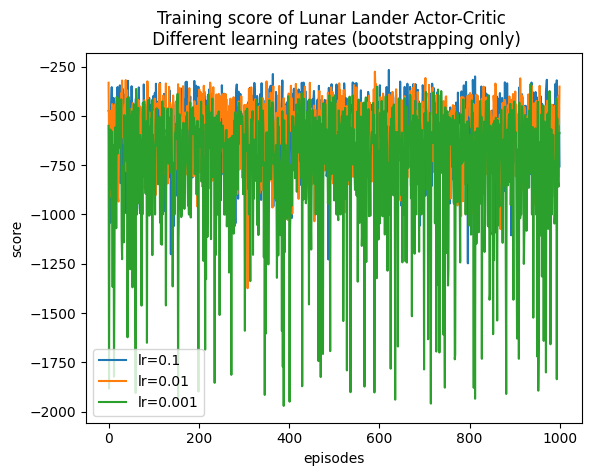

In [ ]:
plt.plot(episode_scores,label='lr=0.1')
plt.plot(episode_scores1_1_2,label='lr=0.01')
plt.plot(episode_scores1_1_3,label='lr=0.001')
plt.ylabel('score')
plt.xlabel('episodes')
plt.title('Training score of Lunar Lander Actor-Critic \n Different learning rates (bootstrapping only)')
plt.legend()
plt.show()

In [ ]:
for i in range(len(episode_scores2_2_3)):
    if episode_scores2_5_1[i] <= -1800:
       episode_scores2_5_1[i] = -500

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


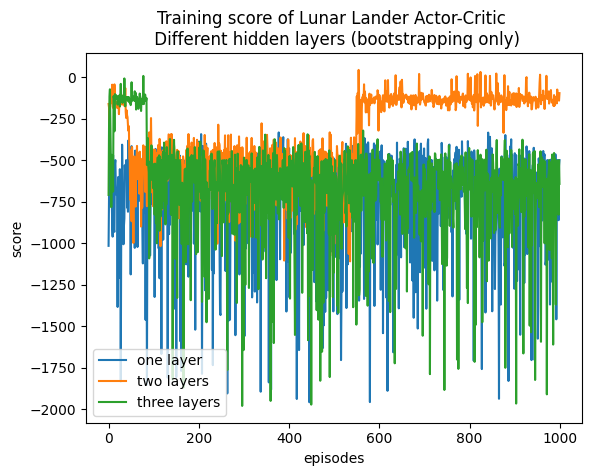

In [ ]:
plt.plot(episode_scores2_1_1,label='one layer')
plt.plot(episode_scores2_2_1,label='two layers')
plt.plot(episode_scores2_3_1,label='three layers')
plt.ylabel('score')
plt.xlabel('episodes')
plt.title('Training score of Lunar Lander Actor-Critic \n Different hidden layers (bootstrapping only)')
plt.legend()
plt.show()

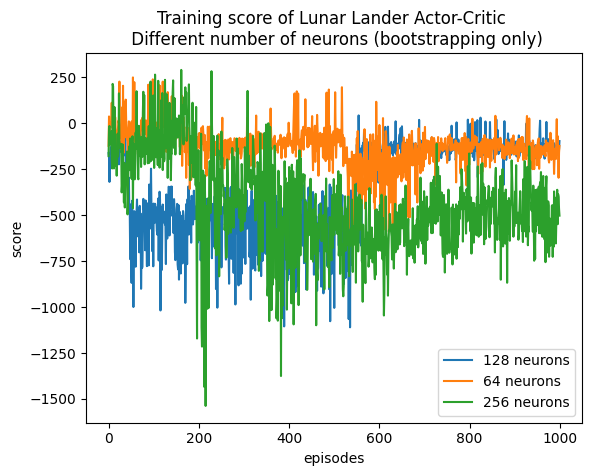

In [ ]:
plt.plot(episode_scores2_2_1,label='128 neurons')
plt.plot(episode_scores2_4_1,label='64 neurons')
plt.plot(episode_scores2_5_1,label='256 neurons')
plt.ylabel('score')
plt.xlabel('episodes')
plt.title('Training score of Lunar Lander Actor-Critic \n Different number of neurons (bootstrapping only)')
plt.legend()
plt.show()

In [ ]:
from google.colab import files
with open("base.txt", "w") as file:
    for item in episode_scores:
        file.write(str(item) + "\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from google.colab import files
with open("lr=0.05.txt", "w") as file:
    for item in episode_scores1_1_2:
        file.write(str(item) + "\n")

In [ ]:
from google.colab import files
with open("lr=0.001.txt", "w") as file:
    for item in episode_scores1_1_3:
        file.write(str(item) + "\n")

In [ ]:
with open("two layers.txt", "w") as file:
    for item in episode_scores1_2_1:
        file.write(str(item) + "\n")

In [ ]:
with open("three layers.txt", "w") as file:
    for item in episode_scores1_3_1:
        file.write(str(item) + "\n")

In [ ]:
with open("64 neurons.txt", "w") as file:
    for item in episode_scores1_4_1:
        file.write(str(item) + "\n")

In [ ]:
with open("256 neurons.txt", "w") as file:
    for item in episode_scores1_5_1:
        file.write(str(item) + "\n")

In [ ]:
with open("base(2).txt", "w") as file:
    for item in episode_scores2_1_1:
        file.write(str(item) + "\n")

In [ ]:
with open("two layers(2).txt", "w") as file:
    for item in episode_scores2_2_1:
        file.write(str(item) + "\n")

In [ ]:
with open("lr=0.05(2).txt", "w") as file:
    for item in episode_scores2_2_2:
        file.write(str(item) + "\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
with open("lr=0.001(2).txt", "w") as file:
    for item in episode_scores2_2_3:
        file.write(str(item) + "\n")

In [ ]:
with open("64 neurons(2).txt", "w") as file:
    for item in episode_scores2_4_1:
        file.write(str(item) + "\n")

In [ ]:
with open("256 neurons(2).txt", "w") as file:
    for item in episode_scores2_5_1:
        file.write(str(item) + "\n")

In [ ]:
#filename = 'two layers.txt'
def load(filename):
    float_numbers = []
    with open(filename, 'r') as file:
          for line in file:
              float_num = float(line.strip())
              float_numbers.append(float_num)
    print(float_numbers)
    return float_numbers

#episode_scores = load('base.txt')
#episode_scores1_2_1 = load('two layers.txt')
#episode_scores1_3_1 = load('three layers.txt')

episode_scores2_1_1 = load('base(2).txt')



[-1016.4054370094235, -720.8496326956866, -566.615892176683, -447.59863582549286, -700.1693171117943, -563.3131591091571, -466.9354022393204, -727.1271376388789, -872.7174078824909, -961.0433304756747, -469.7212206391571, -821.5822709947398, -923.4633187880082, -931.8868611310917, -524.526218743199, -2258.812447070911, -645.8670856658555, -707.2094510883587, -683.2682451190894, -667.9752024627002, -1384.6267186956488, -602.7843536673759, -778.5959844669648, -1210.4831752475964, -729.6042412245433, -554.7022889026255, -698.6582766349725, -1833.497666280581, -950.9990572752292, -1001.6789421524492, -407.01441248116, -630.4512254533636, -779.3033231232577, -1006.7763658178108, -897.3381261299759, -850.6294151701728, -530.7407555344521, -593.654916916893, -566.067450028479, -2951.4175010816025, -510.71494168258107, -786.3436876398981, -703.0532645323183, -811.0067364679232, -381.39604236768156, -671.5666284608889, -721.411701497554, -2668.641224687933, -583.9660702416852, -1188.32216463271